# @Tim

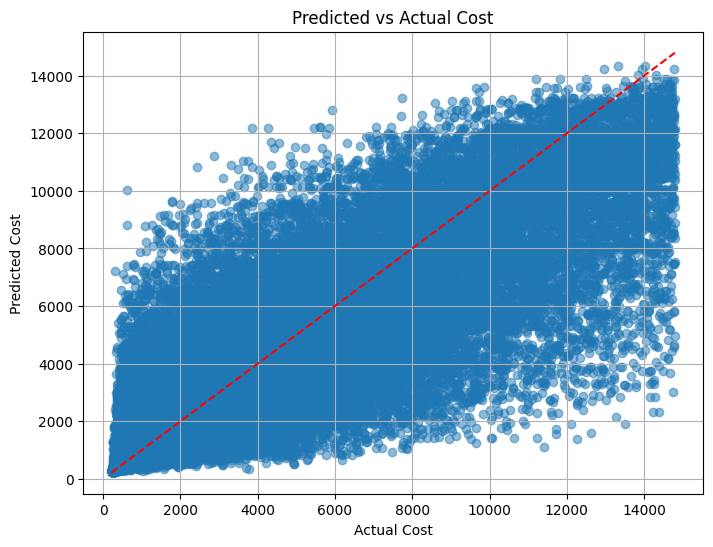

In [53]:
# predicted vs. actual cost

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, bayes_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Predicted vs Actual Cost")
plt.grid(True)
plt.show()


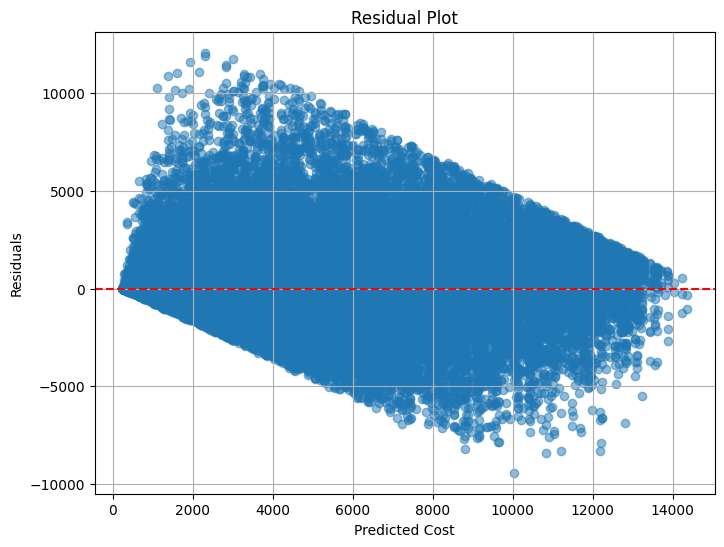

In [55]:
#residual plot

residuals = y_test - bayes_preds
plt.figure(figsize=(8,6))
plt.scatter(bayes_preds, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Cost")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()



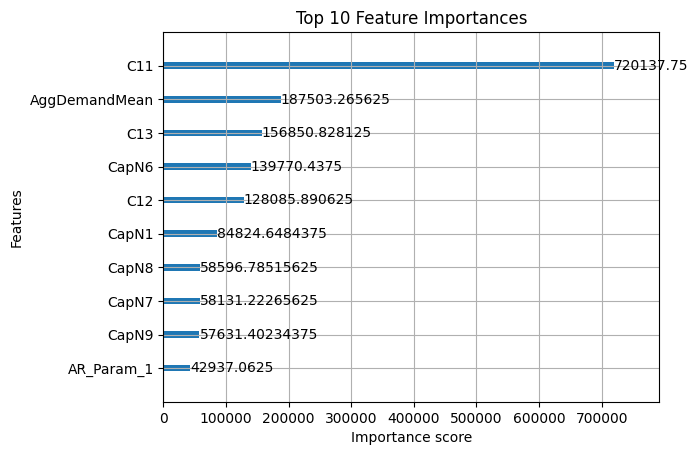

In [56]:
# Feature Importance: 

xgb.plot_importance(bayes_best, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.show()


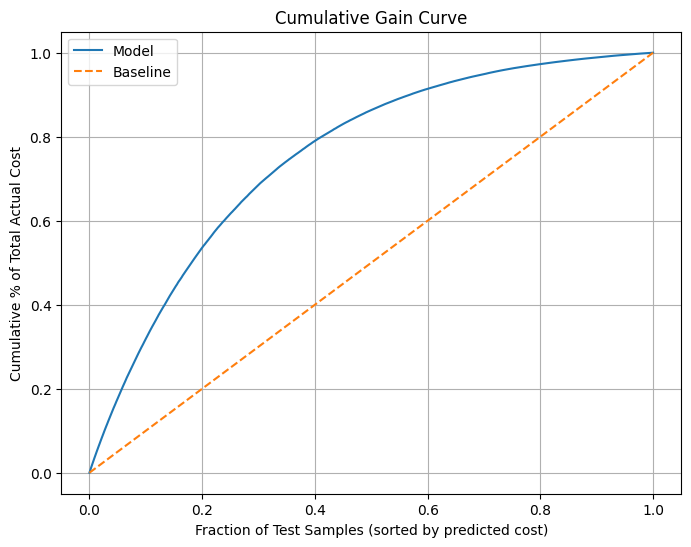

In [58]:
sorted_idx = np.argsort(bayes_preds)[::-1]
sorted_actual = np.array(y_test)[sorted_idx]
cumulative_actual = np.cumsum(sorted_actual) / np.sum(sorted_actual)

plt.figure(figsize=(8,6))
plt.plot(np.linspace(0, 1, len(cumulative_actual)), cumulative_actual, label="Model")
plt.plot([0,1], [0,1], '--', label="Baseline")
plt.title("Cumulative Gain Curve")
plt.xlabel("Fraction of Test Samples (sorted by predicted cost)")
plt.ylabel("Cumulative % of Total Actual Cost")
plt.legend()
plt.grid(True)
plt.show()


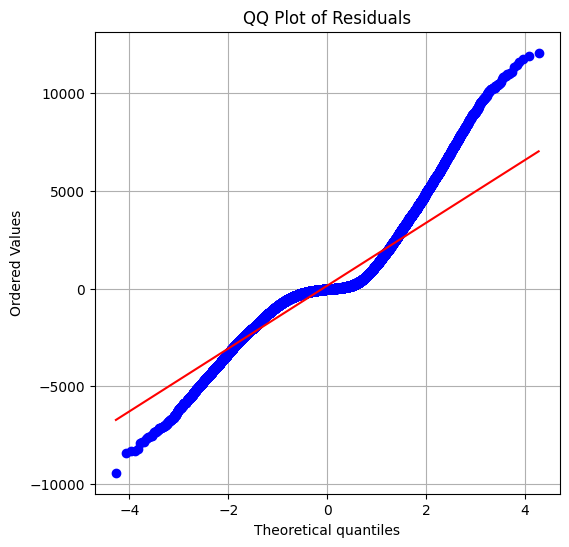

In [65]:
import scipy.stats as stats

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.grid(True)
plt.show()


# exploration

In [7]:
import pandas as pd
df = pd.read_excel("./combined_randomconfig100,100,2.xlsx")
print(df.shape)
df.info()
df.describe()

(312000, 77)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312000 entries, 0 to 311999
Data columns (total 77 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Config_ID       312000 non-null  int64  
 1   demand_pattern  312000 non-null  int64  
 2   policy_id       312000 non-null  object 
 3   C1              312000 non-null  int64  
 4   C2              312000 non-null  int64  
 5   C3              312000 non-null  int64  
 6   C4              312000 non-null  int64  
 7   C5              312000 non-null  int64  
 8   C6              312000 non-null  int64  
 9   C7              312000 non-null  int64  
 10  C8              312000 non-null  int64  
 11  C9              312000 non-null  int64  
 12  C10             312000 non-null  int64  
 13  C11             312000 non-null  int64  
 14  C12             312000 non-null  int64  
 15  C13             312000 non-null  int64  
 16  C14             312000 non-null  int64  
 1

,Config_ID,demand_pattern,C1,C2,C3,C4,C5,C6,C7,C8,...,AggDemandMean,MeanDemand_C12,MeanDemand_C13,MeanDemand_C14,Kappa_P1,Kappa_P2,Kappa_P3,Theta_P1,Theta_P2,Theta_P3
count,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,...,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000
mean,519.500000,49.500000,245.052564,321.676603,267.718269,289.823077,311.362179,79.909295,68.587179,68.209295,...,15.037730,7.022622,4.997788,3.017320,11.638172,8.391357,5.016435,0.599961,0.596641,0.595725
std,300.222482,28.866116,29.693834,44.718983,33.340928,35.960909,38.175268,30.874440,38.135432,55.028363,...,1.365755,1.075130,0.724411,0.457745,1.763261,1.316503,0.766259,0.090089,0.086302,0.087507
min,0.000000,0.000000,165.000000,202.000000,181.000000,193.000000,210.000000,29.000000,21.000000,16.000000,...,11.412864,3.406285,2.418254,1.728238,5.988344,4.664366,2.485527,0.291673,0.238777,0.292314
25%,259.750000,24.750000,223.000000,290.000000,244.000000,264.000000,285.000000,56.000000,40.000000,28.000000,...,14.122070,6.260068,4.519769,2.684800,10.416718,7.548134,4.513833,0.540293,0.540092,0.537444
50%,519.500000,49.500000,243.000000,315.500000,265.500000,287.000000,309.000000,66.000000,47.000000,33.000000,...,15.055078,7.017706,4.978137,3.014923,11.630376,8.384395,5.026097,0.594760,0.594510,0.595404
75%,779.250000,74.250000,263.000000,350.000000,289.000000,312.000000,337.000000,113.000000,113.000000,133.000000,...,15.903015,7.770616,5.487574,3.347080,12.777511,9.286958,5.495795,0.660202,0.652735,0.655914
max,1039.000000,99.000000,379.000000,543.000000,391.000000,443.000000,446.000000,169.000000,175.000000,217.000000,...,19.604209,11.402584,7.009452,4.556437,17.619204,12.302352,7.897999,0.899862,0.889994,0.841975


In [8]:
df = df.drop_duplicates()
print(f"Remaining rows after deduplication: {len(df)}")


Remaining rows after deduplication: 312000


In [9]:
nunique = df.nunique()
print("Constant columns:", nunique[nunique == 1])

Constant columns: Series([], dtype: int64)


In [10]:
df['policy_id'].isin(["policy_random", "policy_echelon", "policy_shortfall"])
Check = df['policy_id'].isin(["policy_random", "policy_echelon", "policy_shortfall"]).count()
print(Check)
df['policy_id'].value_counts()

312000


policy_id
policy_random       104000
policy_echelon      104000
policy_shortfall    104000
Name: count, dtype: int64

In [11]:
cols_with_missing_values = df.columns[df.isna().sum() > 0]
print(f"Columns with missing values: {cols_with_missing_values.tolist()}")

Columns with missing values: []


In [12]:
df = df.drop(columns=["Config_ID", "demand_pattern"])
df = df.drop_duplicates()
print(df.shape)

(312000, 75)


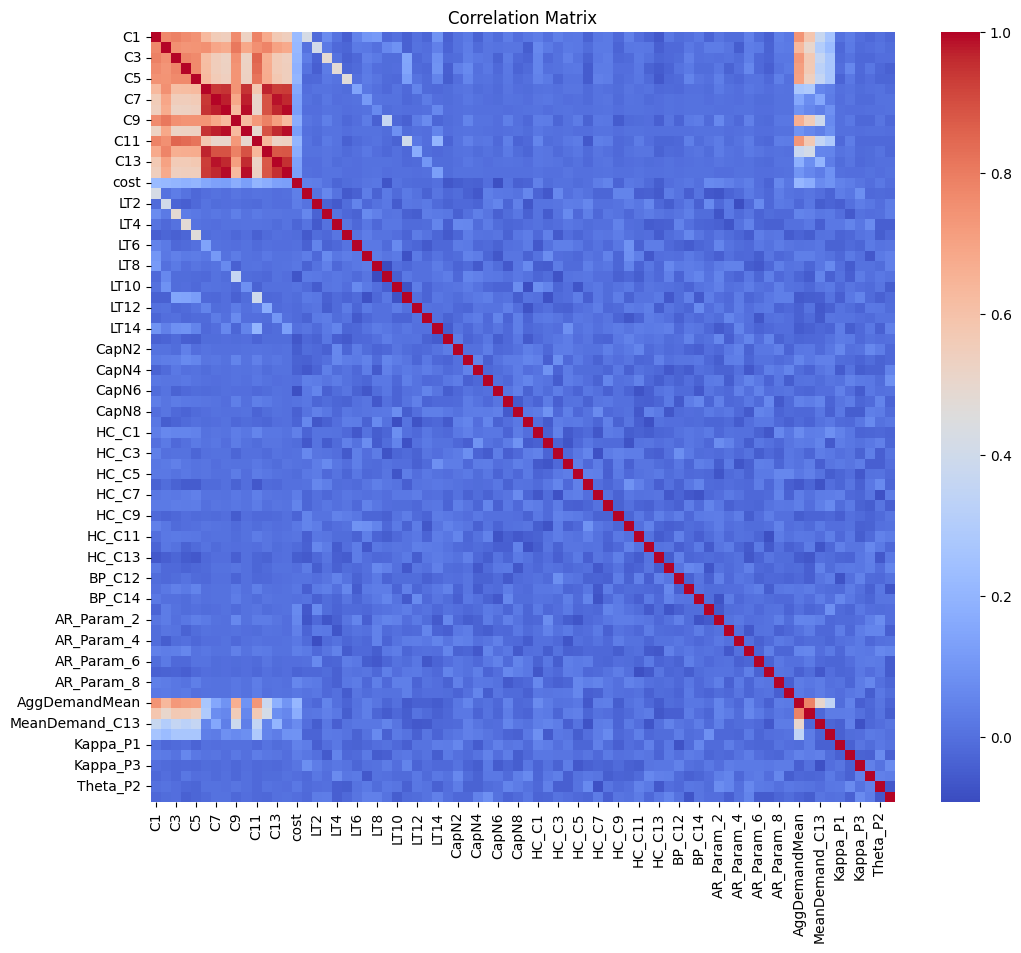

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


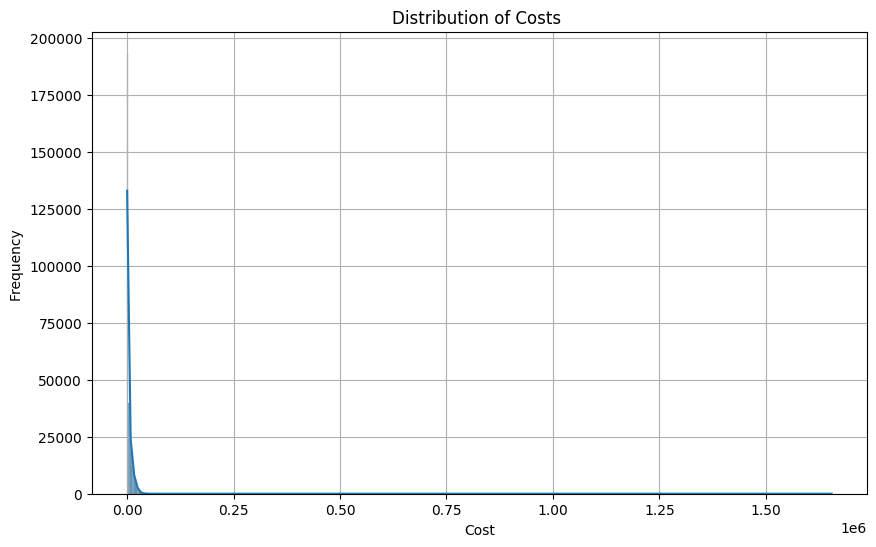

(312000, 75)


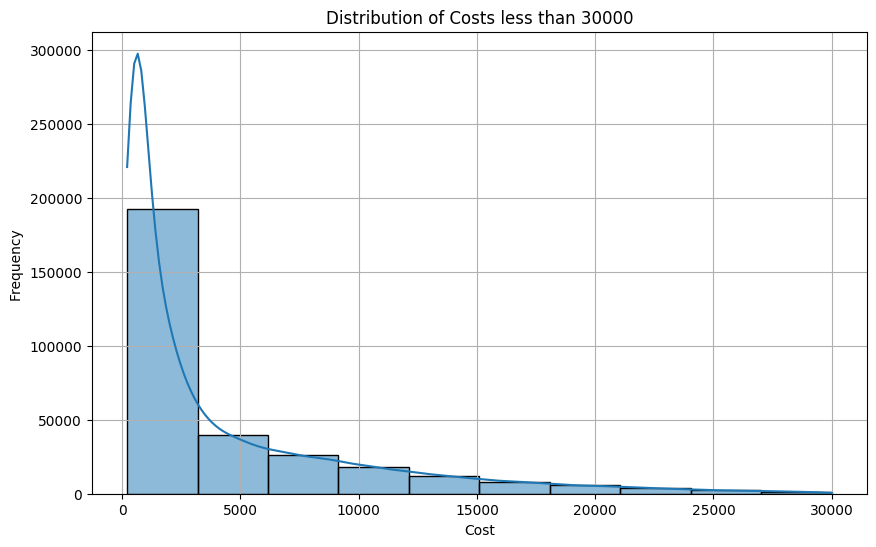

(310018, 75)


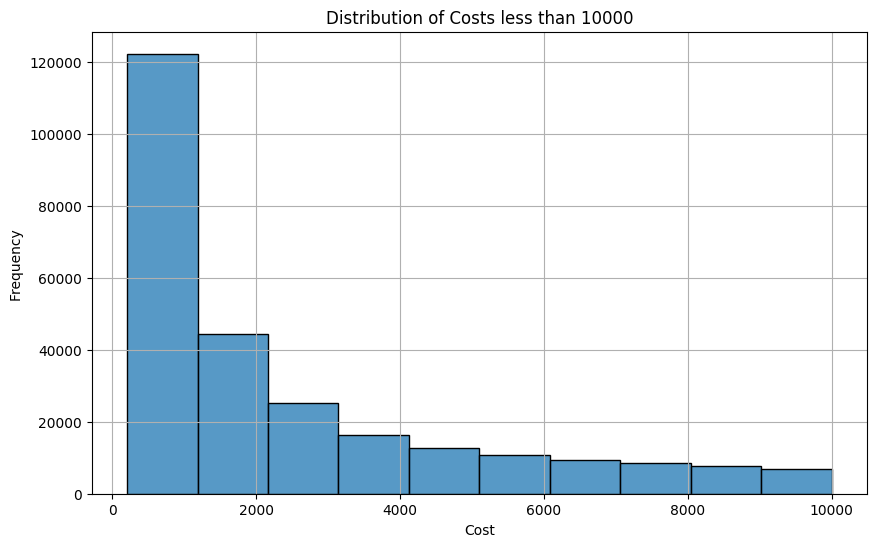

(264393, 75)


In [14]:
# Highly right skewed data, in model fitting use sqrt or log transformation on cost to reduce skewness and improve model performance

plt.figure(figsize=(10, 6))
sns.histplot(df['cost'], binwidth=3000, kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()
print(df.shape)

df1 = df[df['cost'] < 30000]  # Filter out extreme values for better visualization
plt.figure(figsize=(10, 6))
sns.histplot(df1['cost'], binwidth=3000, kde=True)
plt.title("Distribution of Costs less than 30000")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()
print(df1.shape)

df2 = df[df['cost'] < 10000]  # Filter out extreme values for better visualization
plt.figure(figsize=(10, 6))
sns.histplot(df2['cost'], binwidth=1000)
plt.title("Distribution of Costs less than 10000")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()
print(df2.shape) 



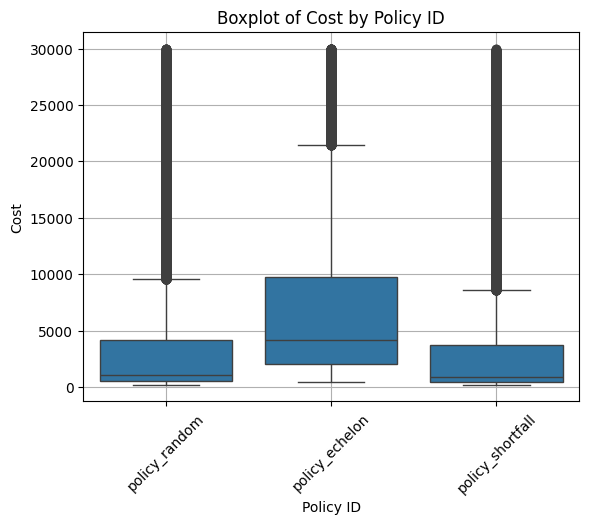

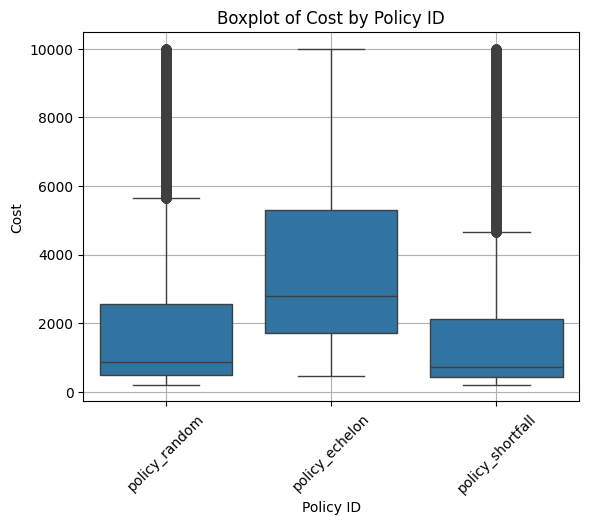

In [15]:
sns.boxplot(data=df1, y="cost", x="policy_id")
plt.title("Boxplot of Cost by Policy ID")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

sns.boxplot(data=df2, y="cost", x="policy_id")
plt.title("Boxplot of Cost by Policy ID")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 


In [16]:
print(df.groupby("policy_id").agg({"cost": ["mean", "median", "std", "min", "max"]}))
print(df1.groupby("policy_id").agg({"cost": ["mean", "median", "std", "min", "max"]}))
print(df2.groupby("policy_id").agg({"cost": ["mean", "median", "std", "min", "max"]}))

                         cost                                         \
                         mean       median           std         min   
policy_id                                                              
policy_echelon    7365.608343  4221.076826  16706.609651  463.554798   
policy_random     3783.082866  1053.443155  16154.196749  207.164745   
policy_shortfall  3660.994098   865.595275  16143.332141  211.102672   

                                
                           max  
policy_id                       
policy_echelon    1.654558e+06  
policy_random     1.654234e+06  
policy_shortfall  1.650855e+06  
                         cost                                        \
                         mean       median          std         min   
policy_id                                                             
policy_echelon    6712.932021  4130.944119  6212.220452  463.554798   
policy_random     3356.556438  1046.085947  4835.212239  207.164745   
policy_shortfa

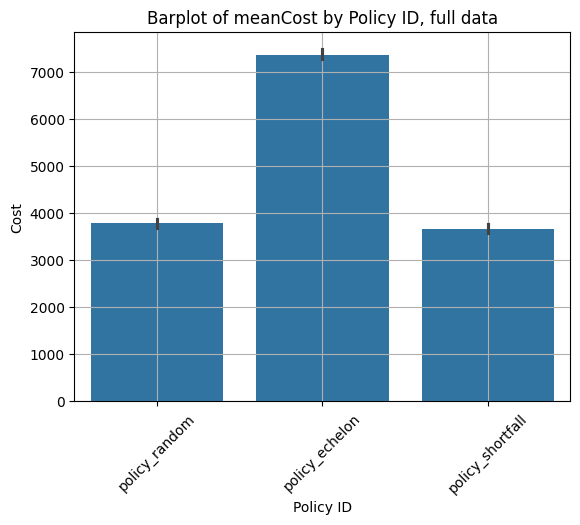

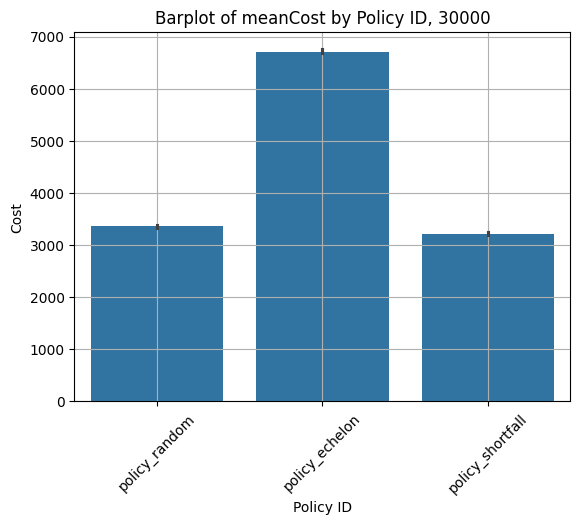

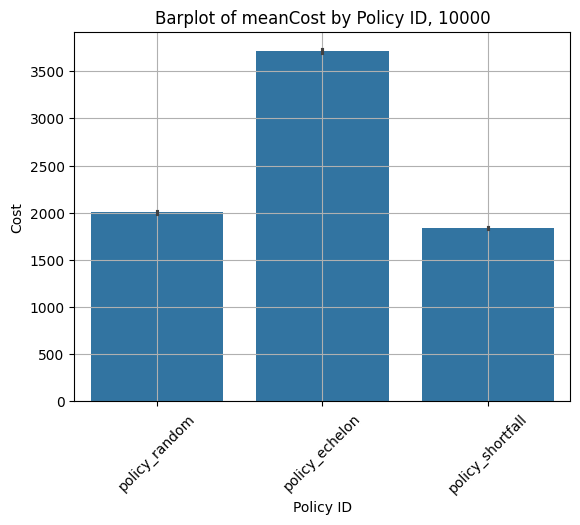

In [17]:
import numpy as np
sns.barplot(data=df, x="policy_id", y="cost")
plt.title("Barplot of meanCost by Policy ID, full data")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

sns.barplot(data=df1, x="policy_id", y="cost")
plt.title("Barplot of meanCost by Policy ID, 30000")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

sns.barplot(data=df2, x="policy_id", y="cost")
plt.title("Barplot of meanCost by Policy ID, 10000")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [18]:
# Very high range of cost value + lot of outliers, so we will remove outliers using IQR method
# This way we can focus on more realitic combinations of parameters and their effect on cost

from scipy.stats import iqr
print(df.shape)
iqr = iqr(df["cost"]) 
lower_treshold = np.quantile(df["cost"], 0.25) - 1.5*iqr 
upper_treshold = np.quantile(df["cost"], 0.75) + 1.5*iqr
print(f"Lower treshold: {lower_treshold}, Upper treshold: {upper_treshold}")
# Identify outliers 
outliers = df[(df["cost"]<lower_treshold) | (df["cost"] > upper_treshold)]
df_no_outliers = df[((df["cost"]>lower_treshold) & (df["cost"] < upper_treshold))]
print(f"Remaining rows after outlier removal: {len(df_no_outliers)}")

(312000, 75)
Lower treshold: -7843.655310292378, Upper treshold: 14800.713789763027
Remaining rows after outlier removal: 287893


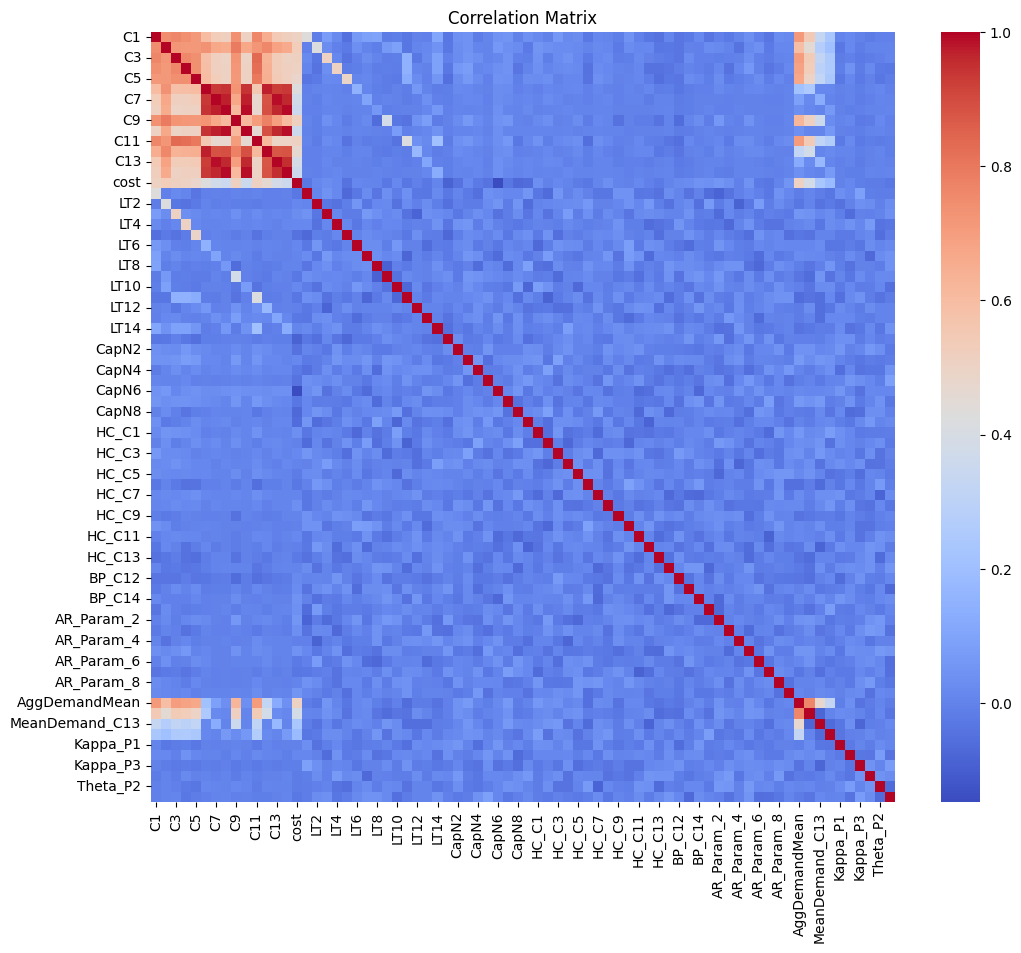

In [19]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
corr = df_no_outliers.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


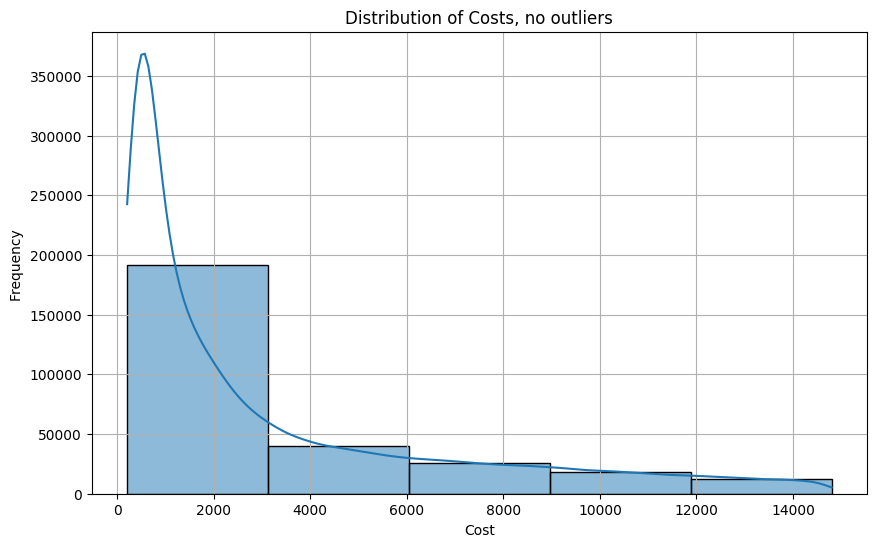

(287893, 75)


In [20]:
# Highly right skewed data, in model fitting use sqrt or log transformation on cost to reduce skewness and improve model performance

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['cost'], binwidth=3000, kde=True)
plt.title("Distribution of Costs, no outliers")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()
print(df_no_outliers.shape)





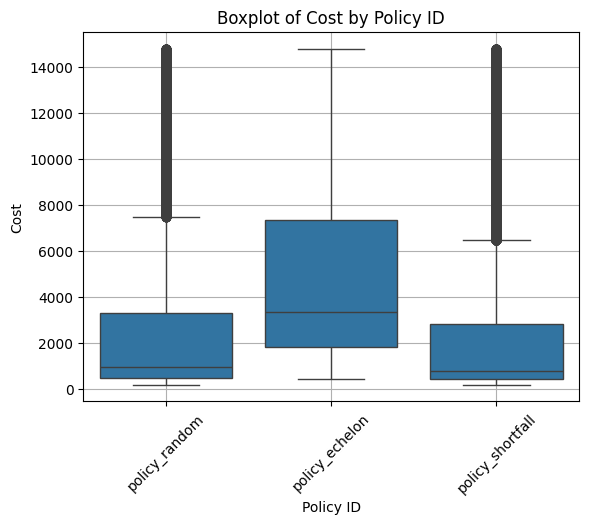

In [21]:
sns.boxplot(data=df_no_outliers, y="cost", x="policy_id")
plt.title("Boxplot of Cost by Policy ID")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 



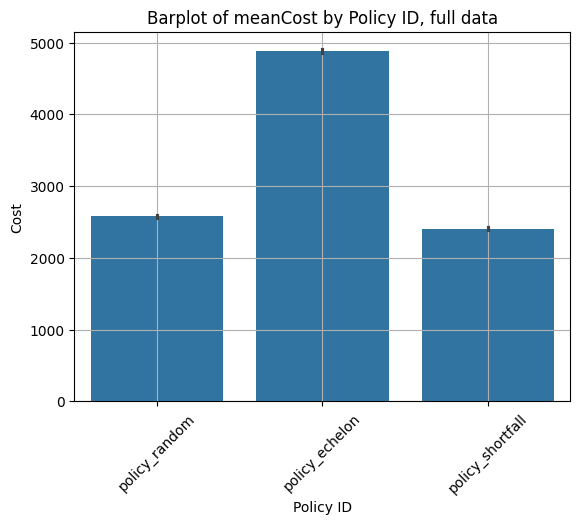

In [22]:
import numpy as np
sns.barplot(data=df_no_outliers, x="policy_id", y="cost")
plt.title("Barplot of meanCost by Policy ID, full data")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

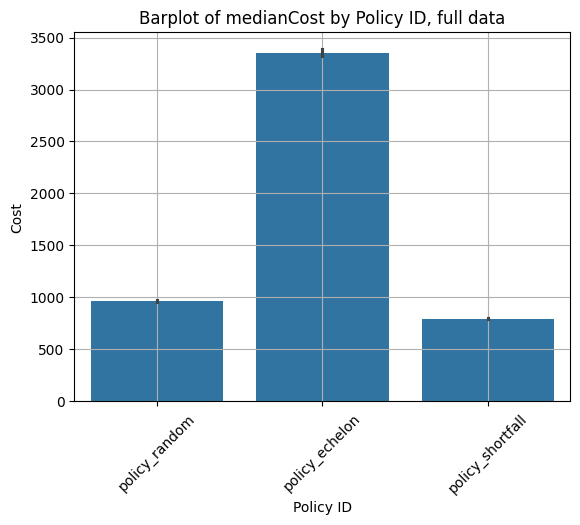

In [23]:
import numpy as np
sns.barplot(data=df_no_outliers, x="policy_id", y="cost", estimator=np.median)
plt.title("Barplot of medianCost by Policy ID, full data")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [24]:
print(df_no_outliers.groupby("policy_id").agg({"cost": ["mean", "median", "std", "min", "max"]}))


                         cost                                        \
                         mean       median          std         min   
policy_id                                                             
policy_echelon    4880.248072  3350.715994  3764.608461  463.554798   
policy_random     2579.226552   964.180485  3276.622055  207.164745   
policy_shortfall  2405.170602   795.550067  3250.499397  211.102672   

                                
                           max  
policy_id                       
policy_echelon    14800.640407  
policy_random     14799.033461  
policy_shortfall  14800.418411  


# Initial Attempt

In [25]:
# Best model in terms of MAE, used sqrt(cost) as y bcs of highly right skewd data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer


df_cleaned = df_no_outliers.dropna(subset=['cost']).copy()
rows_after_dropping_cost_nan = len(df_cleaned)
print(f"Remaining rows after dropping NaN in cost: {rows_after_dropping_cost_nan}")
df_encoded = pd.get_dummies(df_cleaned, columns=['policy_id'], prefix='policy', dtype=int)

X = df_encoded.drop(columns=["cost"])
y = df_encoded["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y_train_transformed = np.sqrt(y_train)
y_test_transformed = np.sqrt(y_test)

bayes_search = BayesSearchCV(
    xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    search_spaces={
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0.0, 0.5),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
    },
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes_search.fit(X_train, y_train_transformed)
bayes_best = bayes_search.best_estimator_

print("Random Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Random Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

bayes_preds_transformed = bayes_best.predict(X_test)
bayes_preds= bayes_preds_transformed ** 2

bayes_mae = mean_absolute_error(y_test, bayes_preds)
bayes_mse = mean_squared_error(y_test, bayes_preds) 
bayes_rmse = np.sqrt(bayes_mse) 


Remaining rows after dropping NaN in cost: 287893
Random Search Best CV score (neg_MSE): -158.7074582652767
Random Search Best CV score (RMSE): 12.597914837991114


In [26]:
print("MAE:", bayes_mae)
print("MSE:", bayes_mse)
print("RMSE:", bayes_rmse)
print("\nRandom Search Best parameters:", bayes_search.best_params_)

MAE: 1021.8445009174195
MSE: 3047780.7566720126
RMSE: 1745.7894365220602

Random Search Best parameters: OrderedDict({'colsample_bytree': 0.8983186405654537, 'gamma': 0.0, 'learning_rate': 0.08240307332639077, 'max_depth': 8, 'n_estimators': 201, 'reg_alpha': 0.11543993327298928, 'reg_lambda': 0.4499752657967414, 'subsample': 0.9698662803904836})


In [27]:
# Check for overfitting passed on the untransformed cost
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score


df_cleaned = df_no_outliers.dropna(subset=['cost']).copy()
df_encoded = pd.get_dummies(df_cleaned, columns=['policy_id'], prefix='policy', dtype=int)

X = df_encoded.drop(columns=["cost"])
y = df_encoded["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_bestmodel = xgb.XGBRegressor(random_state=42, objective='reg:squarederror', verbose=1, colsample_bytree=1.0, \
                            gamma=0.279820799667551, learning_rate=0.3815972175125088, max_depth=5, \
                            n_estimators=178, reg_alpha=1.0, reg_lambda=0.0, \
                            subsample=1.0)

xgb_bestmodel.fit(X_train, y_train)
best_preds = xgb_bestmodel.predict(X_test)

# Calculate the best CV score using cross-validation
cv_scores = cross_val_score(xgb_bestmodel, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
best_cv_score = -cv_scores.mean()
print("Best CV score (MSE):", best_cv_score)
print("Best CV score (RMSE):", np.sqrt(best_cv_score))

random_mae = mean_absolute_error(y_test, best_preds)
random_mse = mean_squared_error(y_test, best_preds)

print("\nRandom Search Best Model Evaluation on Test Set:")
print("MAE:", random_mae)
print("MSE:", random_mse)
print("RMSE:", np.sqrt(random_mse))

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

Best CV score (MSE): 2982412.8326068814
Best CV score (RMSE): 1726.9663669588015

Random Search Best Model Evaluation on Test Set:
MAE: 1042.051653505757
MSE: 2996187.0449189697
RMSE: 1730.9497522802242


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from scipy.stats import uniform, randint


df_cleaned = df_no_outliers.dropna(subset=['cost']).copy()
rows_after_dropping_cost_nan = len(df_cleaned)
print(f"Remaining rows after dropping NaN in cost: {rows_after_dropping_cost_nan}")
df_encoded = pd.get_dummies(df_cleaned, columns=['policy_id'], prefix='policy', dtype=int)

X = df_encoded.drop(columns=["cost"])
y = df_encoded["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror', verbose=1)

param_dist_wider = {
    # n_estimators: Steekproef integers over een breder bereik
    'n_estimators': randint(50, 301), # Van 50 tot 600 (randint is exclusief de bovengrens)

    # learning_rate: Steekproef floats uit een bereik (bv. tussen 0.005 en 0.5)
    'learning_rate': uniform(0.005, 0.495), # Van 0.005 tot 0.005+0.495 = 0.5

    # max_depth: Steekproef integers over een breder bereik
    'max_depth': randint(3, 11), # Van 3 tot 17 (randint is exclusief 18) 

    # subsample: Steekproef floats
    'subsample': uniform(0.6, 0.4), # Van 0.6 tot 0.6+0.4 = 1.0

    # colsample_bytree: Steekproef floats
    'colsample_bytree': uniform(0.6, 0.4), # Van 0.6 tot 1.0

    # Voeg regularization en gamma toe voor grondigere tuning
    'gamma': uniform(0, 0.5), # Minimum loss reduction om te splitten
    'reg_alpha': uniform(0, 1), # L1 regularization
    'reg_lambda': uniform(0, 1), # L2 regularization
}

n_iter_search = 200


random_search = RandomizedSearchCV(n_iter=n_iter_search, estimator=xgb_model, param_distributions=param_dist_wider,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2, random_state=42, return_train_score=False)

random_search.fit(X_train, y_train)

print("\nRandom Search Best parameters:", random_search.best_params_)
print("Random Search Best CV score (neg_MSE):", random_search.best_score_)
print("Random Search Best CV score (RMSE):", np.sqrt(-random_search.best_score_))

best_random_model = random_search.best_estimator_

random_preds = best_random_model.predict(X_test)
random_mae = mean_absolute_error(y_test, random_preds)
random_mse = mean_squared_error(y_test, random_preds)

print("\nRandom Search Best Model Evaluation on Test Set:")
print("MAE:", random_mae)
print("MSE:", random_mse)


Remaining rows after dropping NaN in cost: 287893
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.36733700119664553, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   5.8s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.36733700119664553, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   6.0s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.36733700119664553, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   6.0s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.36733700119664553, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   6.1s
[CV] END

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.3554959260090425, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   8.3s
[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.3554959260090425, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   8.5s
[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.3554959260090425, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   8.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.3554959260090425, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   8.7s
[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.3554959260090425, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   8.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.15559991026497116, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=  18.7s
[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.15559991026497116, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=  18.8s
[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.15559991026497116, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=  19.0s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.1202218135130006, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=  16.8s

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.15559991026497116, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=  19.1s
[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.15559991026497116, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=  19.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.1202218135130006, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=  16.0s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.1202218135130006, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=  16.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.341752231600951, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   8.3s
[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.341752231600951, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   8.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.341752231600951, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   8.7s
[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.341752231600951, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   8.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:13:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.341752231600951, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   8.5s
[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.11929244368296375, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=  10.2s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.1202218135130006, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=  16.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.1202218135130006, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=  16.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.11929244368296375, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=  10.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.11929244368296375, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=  10.5s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.09520686345509086, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   5.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.09520686345509086, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   5.4s
[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.11929244368296375, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=  11.1s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.09520686345509086, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   5.5s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.09520686345509086, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   5.3s
[CV] E

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.09520686345509086, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   4.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.227628296018034, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=  11.0s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.227628296018034, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=  11.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.227628296018034, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=  10.9s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.227628296018034, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=  10.9s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.227628296018034, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=  11.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.4807801520529278, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=  15.6s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.4807801520529278, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=  15.4s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.4807801520529278, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=  15.2s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.14161959510115896, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   6.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.14161959510115896, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   6.4s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.14161959510115896, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   6.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.14161959510115896, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   6.5s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.14161959510115896, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   6.4s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.4807801520529278, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=  15.2s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.4807801520529278, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=  15.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.011969512243966807, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   7.6s
[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.011969512243966807, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   8.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.011969512243966807, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   8.3s
[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.011969512243966807, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   8.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.4579050393941715, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   6.0s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.4579050393941715, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   6.2s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.4579050393941715, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   6.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.011969512243966807, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   8.8s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.4579050393941715, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   6.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.4579050393941715, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   7.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.1218125352757331, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=  15.5s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.29769240491532495, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=  21.0s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.29769240491532495, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=  21.1s
[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.1218125352757331, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=  15.7s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.29769240491532495, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=  21.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.29769240491532495, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=  20.8s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.29769240491532495, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=  21.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:14:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.4484029798583921, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   5.4s
[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.4484029798583921, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   5.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.4484029798583921, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   5.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.4484029798583921, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   5.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.4484029798583921, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   6.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.1218125352757331, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=  14.4s
[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.1218125352757331, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=  14.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.05721965861598395, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   7.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.10551530624371086, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=  16.9s
[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.05721965861598395, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   7.3s
[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.05721965861598395, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   7.2s
[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.10551530624371086, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=  16.7s
[CV] END col

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.10551530624371086, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=  17.0s
[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.05721965861598395, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   7.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.10551530624371086, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=  16.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.05721965861598395, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   6.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.08650464730575616, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=  11.1s
[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.08650464730575616, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=  11.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.08650464730575616, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=  11.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.18136742984810258, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=  20.5s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.18136742984810258, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=  20.6s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.18136742984810258, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=  21.3s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.18136742984810258, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=  21.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.18136742984810258, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=  21.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.08650464730575616, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=  11.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.08650464730575616, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=  14.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6987504251354405, gamma=0.3481521364198942, learning_rate=0.3575739420125988, max_depth=7, n_estimators=162, reg_alpha=0.9977404850489419, reg_lambda=0.266781014275285, subsample=0.9906459823330611; total time=  14.6s
[CV] END colsample_bytree=0.6987504251354405, gamma=0.3481521364198942, learning_rate=0.3575739420125988, max_depth=7, n_estimators=162, reg_alpha=0.9977404850489419, reg_lambda=0.266781014275285, subsample=0.9906459823330611; total time=  15.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6987504251354405, gamma=0.3481521364198942, learning_rate=0.3575739420125988, max_depth=7, n_estimators=162, reg_alpha=0.9977404850489419, reg_lambda=0.266781014275285, subsample=0.9906459823330611; total time=  12.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:15:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6987504251354405, gamma=0.3481521364198942, learning_rate=0.3575739420125988, max_depth=7, n_estimators=162, reg_alpha=0.9977404850489419, reg_lambda=0.266781014275285, subsample=0.9906459823330611; total time=  12.7s
[CV] END colsample_bytree=0.7644148053272926, gamma=0.016525366450274193, learning_rate=0.17581026777320807, max_depth=3, n_estimators=196, reg_alpha=0.6807054515547668, reg_lambda=0.5309345833171364, subsample=0.7791132658292367; total time=   9.4s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.11328828868866977, max_depth=10, n_estimators=282, reg_alpha=0.4038361710580408, reg_lambda=0.06489224710898156, subsample=0.7015661655737379; total time=  33.8s
[CV] END colsample_bytree=0.6987504251354405, gamma=0.3481521364198942, learning_rate=0.3575739420125988, max_depth=7, n_estimators=162, reg_alpha=0.9977404850489419, reg_lambda=0.266781014275285, subsample=0.9906459823330611; total time=  12.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.11328828868866977, max_depth=10, n_estimators=282, reg_alpha=0.4038361710580408, reg_lambda=0.06489224710898156, subsample=0.7015661655737379; total time=  33.4s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.11328828868866977, max_depth=10, n_estimators=282, reg_alpha=0.4038361710580408, reg_lambda=0.06489224710898156, subsample=0.7015661655737379; total time=  33.6s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.11328828868866977, max_depth=10, n_estimators=282, reg_alpha=0.4038361710580408, reg_lambda=0.06489224710898156, subsample=0.7015661655737379; total time=  34.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.11328828868866977, max_depth=10, n_estimators=282, reg_alpha=0.4038361710580408, reg_lambda=0.06489224710898156, subsample=0.7015661655737379; total time=  33.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7644148053272926, gamma=0.016525366450274193, learning_rate=0.17581026777320807, max_depth=3, n_estimators=196, reg_alpha=0.6807054515547668, reg_lambda=0.5309345833171364, subsample=0.7791132658292367; total time=   8.9s
[CV] END colsample_bytree=0.7644148053272926, gamma=0.016525366450274193, learning_rate=0.17581026777320807, max_depth=3, n_estimators=196, reg_alpha=0.6807054515547668, reg_lambda=0.5309345833171364, subsample=0.7791132658292367; total time=   9.0s
[CV] END colsample_bytree=0.7644148053272926, gamma=0.016525366450274193, learning_rate=0.17581026777320807, max_depth=3, n_estimators=196, reg_alpha=0.6807054515547668, reg_lambda=0.5309345833171364, subsample=0.7791132658292367; total time=   9.4s
[CV] END colsample_bytree=0.7644148053272926, gamma=0.016525366450274193, learning_rate=0.17581026777320807, max_depth=3, n_estimators=196, reg_alpha=0.6807054515547668, reg_lambda=0.5309345833171364, subsample=0.7791132658292367; total time=   9.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9933692563579372, gamma=0.19941222122227653, learning_rate=0.40913377724359506, max_depth=10, n_estimators=146, reg_alpha=0.15071754396542947, reg_lambda=0.5081987767407187, subsample=0.8783251227163527; total time=  18.4s
[CV] END colsample_bytree=0.9933692563579372, gamma=0.19941222122227653, learning_rate=0.40913377724359506, max_depth=10, n_estimators=146, reg_alpha=0.15071754396542947, reg_lambda=0.5081987767407187, subsample=0.8783251227163527; total time=  18.2s
[CV] END colsample_bytree=0.9933692563579372, gamma=0.19941222122227653, learning_rate=0.40913377724359506, max_depth=10, n_estimators=146, reg_alpha=0.15071754396542947, reg_lambda=0.5081987767407187, subsample=0.8783251227163527; total time=  18.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8211572356285312, gamma=0.29634836193969677, learning_rate=0.045022396534694045, max_depth=10, n_estimators=172, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7881202537784153; total time=  28.9s
[CV] END colsample_bytree=0.8211572356285312, gamma=0.29634836193969677, learning_rate=0.045022396534694045, max_depth=10, n_estimators=172, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7881202537784153; total time=  29.2s
[CV] END colsample_bytree=0.8211572356285312, gamma=0.29634836193969677, learning_rate=0.045022396534694045, max_depth=10, n_estimators=172, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7881202537784153; total time=  29.3s
[CV] END colsample_bytree=0.8211572356285312, gamma=0.29634836193969677, learning_rate=0.045022396534694045, max_depth=10, n_estimators=172, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7881202537784153; total time=

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8211572356285312, gamma=0.29634836193969677, learning_rate=0.045022396534694045, max_depth=10, n_estimators=172, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7881202537784153; total time=  29.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.943343521925488, gamma=0.16297945260094238, learning_rate=0.11401931854494642, max_depth=4, n_estimators=244, reg_alpha=0.8095010461397154, reg_lambda=0.3486659872917294, subsample=0.6384706204365683; total time=  12.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.943343521925488, gamma=0.16297945260094238, learning_rate=0.11401931854494642, max_depth=4, n_estimators=244, reg_alpha=0.8095010461397154, reg_lambda=0.3486659872917294, subsample=0.6384706204365683; total time=  12.0s
[CV] END colsample_bytree=0.943343521925488, gamma=0.16297945260094238, learning_rate=0.11401931854494642, max_depth=4, n_estimators=244, reg_alpha=0.8095010461397154, reg_lambda=0.3486659872917294, subsample=0.6384706204365683; total time=  12.2s
[CV] END colsample_bytree=0.943343521925488, gamma=0.16297945260094238, learning_rate=0.11401931854494642, max_depth=4, n_estimators=244, reg_alpha=0.8095010461397154, reg_lambda=0.3486659872917294, subsample=0.6384706204365683; total time=  12.0s
[CV] END colsample_bytree=0.9933692563579372, gamma=0.19941222122227653, learning_rate=0.40913377724359506, max_depth=10, n_estimators=146, reg_alpha=0.15071754396542947, reg_lambda=0.5081987767407187, subsample=0.8783251227163527; total time=  17.5s
[CV] 

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9762093057958416, gamma=0.19878601054376116, learning_rate=0.26128691851110264, max_depth=10, n_estimators=178, reg_alpha=0.6756901170392807, reg_lambda=0.7352161192407721, subsample=0.6836286482950855; total time=  20.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9762093057958416, gamma=0.19878601054376116, learning_rate=0.26128691851110264, max_depth=10, n_estimators=178, reg_alpha=0.6756901170392807, reg_lambda=0.7352161192407721, subsample=0.6836286482950855; total time=  19.8s
[CV] END colsample_bytree=0.8165791895310264, gamma=0.3478921996725411, learning_rate=0.11813226078966334, max_depth=10, n_estimators=139, reg_alpha=0.9821683433294356, reg_lambda=0.5166358912710143, subsample=0.7043316699321636; total time=  18.4s
[CV] END colsample_bytree=0.8165791895310264, gamma=0.3478921996725411, learning_rate=0.11813226078966334, max_depth=10, n_estimators=139, reg_alpha=0.9821683433294356, reg_lambda=0.5166358912710143, subsample=0.7043316699321636; total time=  18.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9762093057958416, gamma=0.19878601054376116, learning_rate=0.26128691851110264, max_depth=10, n_estimators=178, reg_alpha=0.6756901170392807, reg_lambda=0.7352161192407721, subsample=0.6836286482950855; total time=  20.6s
[CV] END colsample_bytree=0.9762093057958416, gamma=0.19878601054376116, learning_rate=0.26128691851110264, max_depth=10, n_estimators=178, reg_alpha=0.6756901170392807, reg_lambda=0.7352161192407721, subsample=0.6836286482950855; total time=  20.3s
[CV] END colsample_bytree=0.8165791895310264, gamma=0.3478921996725411, learning_rate=0.11813226078966334, max_depth=10, n_estimators=139, reg_alpha=0.9821683433294356, reg_lambda=0.5166358912710143, subsample=0.7043316699321636; total time=  18.9s
[CV] END colsample_bytree=0.9762093057958416, gamma=0.19878601054376116, learning_rate=0.26128691851110264, max_depth=10, n_estimators=178, reg_alpha=0.6756901170392807, reg_lambda=0.7352161192407721, subsample=0.6836286482950855; total time=  20.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9386644568953224, gamma=0.4281621459390462, learning_rate=0.2052315229254841, max_depth=3, n_estimators=201, reg_alpha=0.8509284487675127, reg_lambda=0.9356349942209475, subsample=0.9141362604455774; total time=   9.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8165791895310264, gamma=0.3478921996725411, learning_rate=0.11813226078966334, max_depth=10, n_estimators=139, reg_alpha=0.9821683433294356, reg_lambda=0.5166358912710143, subsample=0.7043316699321636; total time=  18.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8165791895310264, gamma=0.3478921996725411, learning_rate=0.11813226078966334, max_depth=10, n_estimators=139, reg_alpha=0.9821683433294356, reg_lambda=0.5166358912710143, subsample=0.7043316699321636; total time=  18.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9386644568953224, gamma=0.4281621459390462, learning_rate=0.2052315229254841, max_depth=3, n_estimators=201, reg_alpha=0.8509284487675127, reg_lambda=0.9356349942209475, subsample=0.9141362604455774; total time=   9.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9386644568953224, gamma=0.4281621459390462, learning_rate=0.2052315229254841, max_depth=3, n_estimators=201, reg_alpha=0.8509284487675127, reg_lambda=0.9356349942209475, subsample=0.9141362604455774; total time=   9.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9386644568953224, gamma=0.4281621459390462, learning_rate=0.2052315229254841, max_depth=3, n_estimators=201, reg_alpha=0.8509284487675127, reg_lambda=0.9356349942209475, subsample=0.9141362604455774; total time=   8.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9386644568953224, gamma=0.4281621459390462, learning_rate=0.2052315229254841, max_depth=3, n_estimators=201, reg_alpha=0.8509284487675127, reg_lambda=0.9356349942209475, subsample=0.9141362604455774; total time=   9.0s
[CV] END colsample_bytree=0.8675953018856915, gamma=0.29034331071822733, learning_rate=0.18927996944806283, max_depth=3, n_estimators=148, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.7221455441377573; total time=   7.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9985014799031697, gamma=0.4827096756443968, learning_rate=0.2813552595355133, max_depth=10, n_estimators=300, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.8801431319891084; total time=  31.4s
[CV] END colsample_bytree=0.9985014799031697, gamma=0.4827096756443968, learning_rate=0.2813552595355133, max_depth=10, n_estimators=300, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.8801431319891084; total time=  30.6s
[CV] END colsample_bytree=0.9985014799031697, gamma=0.4827096756443968, learning_rate=0.2813552595355133, max_depth=10, n_estimators=300, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.8801431319891084; total time=  31.7s
[CV] END colsample_bytree=0.9985014799031697, gamma=0.4827096756443968, learning_rate=0.2813552595355133, max_depth=10, n_estimators=300, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.8801431319891084; total time=  30.7s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8675953018856915, gamma=0.29034331071822733, learning_rate=0.18927996944806283, max_depth=3, n_estimators=148, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.7221455441377573; total time=   6.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8675953018856915, gamma=0.29034331071822733, learning_rate=0.18927996944806283, max_depth=3, n_estimators=148, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.7221455441377573; total time=   7.7s
[CV] END colsample_bytree=0.8675953018856915, gamma=0.29034331071822733, learning_rate=0.18927996944806283, max_depth=3, n_estimators=148, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.7221455441377573; total time=   7.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8675953018856915, gamma=0.29034331071822733, learning_rate=0.18927996944806283, max_depth=3, n_estimators=148, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.7221455441377573; total time=   8.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7942455014344907, gamma=0.22421207149312367, learning_rate=0.49725644399235625, max_depth=6, n_estimators=210, reg_alpha=0.018075363615520867, reg_lambda=0.4938937151834346, subsample=0.6715290836885315; total time=  13.4s
[CV] END colsample_bytree=0.7942455014344907, gamma=0.22421207149312367, learning_rate=0.49725644399235625, max_depth=6, n_estimators=210, reg_alpha=0.018075363615520867, reg_lambda=0.4938937151834346, subsample=0.6715290836885315; total time=  13.0s
[CV] END colsample_bytree=0.7942455014344907, gamma=0.22421207149312367, learning_rate=0.49725644399235625, max_depth=6, n_estimators=210, reg_alpha=0.018075363615520867, reg_lambda=0.4938937151834346, subsample=0.6715290836885315; total time=  13.6s
[CV] END colsample_bytree=0.7942455014344907, gamma=0.22421207149312367, learning_rate=0.49725644399235625, max_depth=6, n_estimators=210, reg_alpha=0.018075363615520867, reg_lambda=0.4938937151834346, subsample=0.6715290836885315; total time=  13

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:17:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7465875138331439, gamma=0.37208526152828114, learning_rate=0.361865262504804, max_depth=10, n_estimators=82, reg_alpha=0.5425402305548993, reg_lambda=0.50881407683876, subsample=0.8545330472743582; total time=  10.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7465875138331439, gamma=0.37208526152828114, learning_rate=0.361865262504804, max_depth=10, n_estimators=82, reg_alpha=0.5425402305548993, reg_lambda=0.50881407683876, subsample=0.8545330472743582; total time=  10.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7465875138331439, gamma=0.37208526152828114, learning_rate=0.361865262504804, max_depth=10, n_estimators=82, reg_alpha=0.5425402305548993, reg_lambda=0.50881407683876, subsample=0.8545330472743582; total time=  10.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7465875138331439, gamma=0.37208526152828114, learning_rate=0.361865262504804, max_depth=10, n_estimators=82, reg_alpha=0.5425402305548993, reg_lambda=0.50881407683876, subsample=0.8545330472743582; total time=  10.0s
[CV] END colsample_bytree=0.7465875138331439, gamma=0.37208526152828114, learning_rate=0.361865262504804, max_depth=10, n_estimators=82, reg_alpha=0.5425402305548993, reg_lambda=0.50881407683876, subsample=0.8545330472743582; total time=  10.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7001847274422337, gamma=0.29493542378027193, learning_rate=0.4895519648461295, max_depth=5, n_estimators=231, reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, subsample=0.7400313630778703; total time=  12.1s
[CV] END colsample_bytree=0.7001847274422337, gamma=0.29493542378027193, learning_rate=0.4895519648461295, max_depth=5, n_estimators=231, reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, subsample=0.7400313630778703; total time=  12.2s
[CV] END colsample_bytree=0.7001847274422337, gamma=0.29493542378027193, learning_rate=0.4895519648461295, max_depth=5, n_estimators=231, reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, subsample=0.7400313630778703; total time=  12.2s
[CV] END colsample_bytree=0.8580413448122259, gamma=0.3344620298315498, learning_rate=0.432762944710592, max_depth=6, n_estimators=110, reg_alpha=0.4991933798847523, reg_lambda=0.5720041992091831, subsample=0.9074216057225236; total time=   8.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7001847274422337, gamma=0.29493542378027193, learning_rate=0.4895519648461295, max_depth=5, n_estimators=231, reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, subsample=0.7400313630778703; total time=  12.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7001847274422337, gamma=0.29493542378027193, learning_rate=0.4895519648461295, max_depth=5, n_estimators=231, reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, subsample=0.7400313630778703; total time=  12.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8580413448122259, gamma=0.3344620298315498, learning_rate=0.432762944710592, max_depth=6, n_estimators=110, reg_alpha=0.4991933798847523, reg_lambda=0.5720041992091831, subsample=0.9074216057225236; total time=   8.3s
[CV] END colsample_bytree=0.8580413448122259, gamma=0.3344620298315498, learning_rate=0.432762944710592, max_depth=6, n_estimators=110, reg_alpha=0.4991933798847523, reg_lambda=0.5720041992091831, subsample=0.9074216057225236; total time=   8.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8580413448122259, gamma=0.3344620298315498, learning_rate=0.432762944710592, max_depth=6, n_estimators=110, reg_alpha=0.4991933798847523, reg_lambda=0.5720041992091831, subsample=0.9074216057225236; total time=   8.4s
[CV] END colsample_bytree=0.8580413448122259, gamma=0.3344620298315498, learning_rate=0.432762944710592, max_depth=6, n_estimators=110, reg_alpha=0.4991933798847523, reg_lambda=0.5720041992091831, subsample=0.9074216057225236; total time=   8.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6174415087017735, gamma=0.4972752553986705, learning_rate=0.23762253442551676, max_depth=8, n_estimators=166, reg_alpha=0.883494022266259, reg_lambda=0.7477187738974139, subsample=0.9812287388095813; total time=  13.9s
[CV] END colsample_bytree=0.6174415087017735, gamma=0.4972752553986705, learning_rate=0.23762253442551676, max_depth=8, n_estimators=166, reg_alpha=0.883494022266259, reg_lambda=0.7477187738974139, subsample=0.9812287388095813; total time=  14.0s
[CV] END colsample_bytree=0.6174415087017735, gamma=0.4972752553986705, learning_rate=0.23762253442551676, max_depth=8, n_estimators=166, reg_alpha=0.883494022266259, reg_lambda=0.7477187738974139, subsample=0.9812287388095813; total time=  13.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6174415087017735, gamma=0.4972752553986705, learning_rate=0.23762253442551676, max_depth=8, n_estimators=166, reg_alpha=0.883494022266259, reg_lambda=0.7477187738974139, subsample=0.9812287388095813; total time=  13.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6174415087017735, gamma=0.4972752553986705, learning_rate=0.23762253442551676, max_depth=8, n_estimators=166, reg_alpha=0.883494022266259, reg_lambda=0.7477187738974139, subsample=0.9812287388095813; total time=  13.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7323001218682055, gamma=0.27638248341774496, learning_rate=0.28828477223956495, max_depth=6, n_estimators=274, reg_alpha=0.07534625600612821, reg_lambda=0.30569701928718185, subsample=0.6763644124601385; total time=  15.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7323001218682055, gamma=0.27638248341774496, learning_rate=0.28828477223956495, max_depth=6, n_estimators=274, reg_alpha=0.07534625600612821, reg_lambda=0.30569701928718185, subsample=0.6763644124601385; total time=  15.9s
[CV] END colsample_bytree=0.7323001218682055, gamma=0.27638248341774496, learning_rate=0.28828477223956495, max_depth=6, n_estimators=274, reg_alpha=0.07534625600612821, reg_lambda=0.30569701928718185, subsample=0.6763644124601385; total time=  15.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7073899427560627, gamma=0.24263993713815785, learning_rate=0.1894799992115544, max_depth=4, n_estimators=272, reg_alpha=0.8442131407263114, reg_lambda=0.9300168348108319, subsample=0.6281664523398175; total time=  13.1s
[CV] END colsample_bytree=0.7073899427560627, gamma=0.24263993713815785, learning_rate=0.1894799992115544, max_depth=4, n_estimators=272, reg_alpha=0.8442131407263114, reg_lambda=0.9300168348108319, subsample=0.6281664523398175; total time=  13.0s
[CV] END colsample_bytree=0.7323001218682055, gamma=0.27638248341774496, learning_rate=0.28828477223956495, max_depth=6, n_estimators=274, reg_alpha=0.07534625600612821, reg_lambda=0.30569701928718185, subsample=0.6763644124601385; total time=  15.9s
[CV] END colsample_bytree=0.7323001218682055, gamma=0.27638248341774496, learning_rate=0.28828477223956495, max_depth=6, n_estimators=274, reg_alpha=0.07534625600612821, reg_lambda=0.30569701928718185, subsample=0.6763644124601385; total time=  15.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7073899427560627, gamma=0.24263993713815785, learning_rate=0.1894799992115544, max_depth=4, n_estimators=272, reg_alpha=0.8442131407263114, reg_lambda=0.9300168348108319, subsample=0.6281664523398175; total time=  13.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7073899427560627, gamma=0.24263993713815785, learning_rate=0.1894799992115544, max_depth=4, n_estimators=272, reg_alpha=0.8442131407263114, reg_lambda=0.9300168348108319, subsample=0.6281664523398175; total time=  13.4s
[CV] END colsample_bytree=0.7073899427560627, gamma=0.24263993713815785, learning_rate=0.1894799992115544, max_depth=4, n_estimators=272, reg_alpha=0.8442131407263114, reg_lambda=0.9300168348108319, subsample=0.6281664523398175; total time=  12.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6835674870461441, gamma=0.3355717584120253, learning_rate=0.18253015674160114, max_depth=9, n_estimators=204, reg_alpha=0.29529058841893874, reg_lambda=0.3225507642386005, subsample=0.9394679179698697; total time=  19.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6546485325768115, gamma=0.3544554984550593, learning_rate=0.27864588856941436, max_depth=4, n_estimators=296, reg_alpha=0.4197808564462765, reg_lambda=0.25620694359445806, subsample=0.8446054843462723; total time=  14.6s
[CV] END colsample_bytree=0.6835674870461441, gamma=0.3355717584120253, learning_rate=0.18253015674160114, max_depth=9, n_estimators=204, reg_alpha=0.29529058841893874, reg_lambda=0.3225507642386005, subsample=0.9394679179698697; total time=  18.6s
[CV] END colsample_bytree=0.6835674870461441, gamma=0.3355717584120253, learning_rate=0.18253015674160114, max_depth=9, n_estimators=204, reg_alpha=0.29529058841893874, reg_lambda=0.3225507642386005, subsample=0.9394679179698697; total time=  19.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:18:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6546485325768115, gamma=0.3544554984550593, learning_rate=0.27864588856941436, max_depth=4, n_estimators=296, reg_alpha=0.4197808564462765, reg_lambda=0.25620694359445806, subsample=0.8446054843462723; total time=  13.9s
[CV] END colsample_bytree=0.6835674870461441, gamma=0.3355717584120253, learning_rate=0.18253015674160114, max_depth=9, n_estimators=204, reg_alpha=0.29529058841893874, reg_lambda=0.3225507642386005, subsample=0.9394679179698697; total time=  18.9s
[CV] END colsample_bytree=0.6835674870461441, gamma=0.3355717584120253, learning_rate=0.18253015674160114, max_depth=9, n_estimators=204, reg_alpha=0.29529058841893874, reg_lambda=0.3225507642386005, subsample=0.9394679179698697; total time=  19.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6546485325768115, gamma=0.3544554984550593, learning_rate=0.27864588856941436, max_depth=4, n_estimators=296, reg_alpha=0.4197808564462765, reg_lambda=0.25620694359445806, subsample=0.8446054843462723; total time=  13.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6326376721600961, gamma=0.002592431386993388, learning_rate=0.31580773539957485, max_depth=6, n_estimators=114, reg_alpha=0.07094091699992766, reg_lambda=0.3967838272138884, subsample=0.6203074124157587; total time=   8.1s
[CV] END colsample_bytree=0.6326376721600961, gamma=0.002592431386993388, learning_rate=0.31580773539957485, max_depth=6, n_estimators=114, reg_alpha=0.07094091699992766, reg_lambda=0.3967838272138884, subsample=0.6203074124157587; total time=   8.1s
[CV] END colsample_bytree=0.6326376721600961, gamma=0.002592431386993388, learning_rate=0.31580773539957485, max_depth=6, n_estimators=114, reg_alpha=0.07094091699992766, reg_lambda=0.3967838272138884, subsample=0.6203074124157587; total time=   8.0s
[CV] END colsample_bytree=0.6326376721600961, gamma=0.002592431386993388, learning_rate=0.31580773539957485, max_depth=6, n_estimators=114, reg_alpha=0.07094091699992766, reg_lambda=0.3967838272138884, subsample=0.6203074124157587; total time=   7

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6546485325768115, gamma=0.3544554984550593, learning_rate=0.27864588856941436, max_depth=4, n_estimators=296, reg_alpha=0.4197808564462765, reg_lambda=0.25620694359445806, subsample=0.8446054843462723; total time=  13.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9927363553242124, gamma=0.4194667510346817, learning_rate=0.43090028606427927, max_depth=3, n_estimators=229, reg_alpha=0.0388347344294232, reg_lambda=0.3032655146732228, subsample=0.8148329708786621; total time=  10.6s
[CV] END colsample_bytree=0.9927363553242124, gamma=0.4194667510346817, learning_rate=0.43090028606427927, max_depth=3, n_estimators=229, reg_alpha=0.0388347344294232, reg_lambda=0.3032655146732228, subsample=0.8148329708786621; total time=  10.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9927363553242124, gamma=0.4194667510346817, learning_rate=0.43090028606427927, max_depth=3, n_estimators=229, reg_alpha=0.0388347344294232, reg_lambda=0.3032655146732228, subsample=0.8148329708786621; total time=  10.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7306604967184164, gamma=0.4139345018937943, learning_rate=0.13941374333077222, max_depth=6, n_estimators=54, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.6777520135979492; total time=   5.6s
[CV] END colsample_bytree=0.9927363553242124, gamma=0.4194667510346817, learning_rate=0.43090028606427927, max_depth=3, n_estimators=229, reg_alpha=0.0388347344294232, reg_lambda=0.3032655146732228, subsample=0.8148329708786621; total time=   9.9s
[CV] END colsample_bytree=0.9927363553242124, gamma=0.4194667510346817, learning_rate=0.43090028606427927, max_depth=3, n_estimators=229, reg_alpha=0.0388347344294232, reg_lambda=0.3032655146732228, subsample=0.8148329708786621; total time=  10.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.954646859580264, gamma=0.013808385936852352, learning_rate=0.29153812327624157, max_depth=10, n_estimators=264, reg_alpha=0.6720261352951994, reg_lambda=0.32815266747473193, subsample=0.6620166466910976; total time=  28.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7306604967184164, gamma=0.4139345018937943, learning_rate=0.13941374333077222, max_depth=6, n_estimators=54, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.6777520135979492; total time=   5.3s
[CV] END colsample_bytree=0.7306604967184164, gamma=0.4139345018937943, learning_rate=0.13941374333077222, max_depth=6, n_estimators=54, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.6777520135979492; total time=   5.4s
[CV] END colsample_bytree=0.7306604967184164, gamma=0.4139345018937943, learning_rate=0.13941374333077222, max_depth=6, n_estimators=54, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.6777520135979492; total time=   5.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7306604967184164, gamma=0.4139345018937943, learning_rate=0.13941374333077222, max_depth=6, n_estimators=54, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.6777520135979492; total time=   5.5s
[CV] END colsample_bytree=0.954646859580264, gamma=0.013808385936852352, learning_rate=0.29153812327624157, max_depth=10, n_estimators=264, reg_alpha=0.6720261352951994, reg_lambda=0.32815266747473193, subsample=0.6620166466910976; total time=  28.1s
[CV] END colsample_bytree=0.954646859580264, gamma=0.013808385936852352, learning_rate=0.29153812327624157, max_depth=10, n_estimators=264, reg_alpha=0.6720261352951994, reg_lambda=0.32815266747473193, subsample=0.6620166466910976; total time=  28.3s[CV] END colsample_bytree=0.954646859580264, gamma=0.013808385936852352, learning_rate=0.29153812327624157, max_depth=10, n_estimators=264, reg_alpha=0.6720261352951994, reg_lambda=0.32815266747473193, subsample=0.6620166466910976; total time=  28.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7645415620226714, gamma=0.3497561053835969, learning_rate=0.07348478074681168, max_depth=10, n_estimators=62, reg_alpha=0.969536867114159, reg_lambda=0.7145951041799521, subsample=0.6164270067071503; total time=  11.7s
[CV] END colsample_bytree=0.7645415620226714, gamma=0.3497561053835969, learning_rate=0.07348478074681168, max_depth=10, n_estimators=62, reg_alpha=0.969536867114159, reg_lambda=0.7145951041799521, subsample=0.6164270067071503; total time=  11.7s
[CV] END colsample_bytree=0.7645415620226714, gamma=0.3497561053835969, learning_rate=0.07348478074681168, max_depth=10, n_estimators=62, reg_alpha=0.969536867114159, reg_lambda=0.7145951041799521, subsample=0.6164270067071503; total time=  11.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7645415620226714, gamma=0.3497561053835969, learning_rate=0.07348478074681168, max_depth=10, n_estimators=62, reg_alpha=0.969536867114159, reg_lambda=0.7145951041799521, subsample=0.6164270067071503; total time=  11.7s
[CV] END colsample_bytree=0.7645415620226714, gamma=0.3497561053835969, learning_rate=0.07348478074681168, max_depth=10, n_estimators=62, reg_alpha=0.969536867114159, reg_lambda=0.7145951041799521, subsample=0.6164270067071503; total time=  11.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7595283605779178, gamma=0.21676036879037103, learning_rate=0.3733011082845621, max_depth=4, n_estimators=278, reg_alpha=0.18433367433137005, reg_lambda=0.08087296661719767, subsample=0.7713257899760431; total time=  12.9s
[CV] END colsample_bytree=0.7595283605779178, gamma=0.21676036879037103, learning_rate=0.3733011082845621, max_depth=4, n_estimators=278, reg_alpha=0.18433367433137005, reg_lambda=0.08087296661719767, subsample=0.7713257899760431; total time=  13.0s
[CV] END colsample_bytree=0.7595283605779178, gamma=0.21676036879037103, learning_rate=0.3733011082845621, max_depth=4, n_estimators=278, reg_alpha=0.18433367433137005, reg_lambda=0.08087296661719767, subsample=0.7713257899760431; total time=  12.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8753999603061465, gamma=0.029096797754221804, learning_rate=0.4580307951751078, max_depth=9, n_estimators=83, reg_alpha=0.23978735915740323, reg_lambda=0.09387329008129175, subsample=0.6731463988429229; total time=   9.4s
[CV] END colsample_bytree=0.8753999603061465, gamma=0.029096797754221804, learning_rate=0.4580307951751078, max_depth=9, n_estimators=83, reg_alpha=0.23978735915740323, reg_lambda=0.09387329008129175, subsample=0.6731463988429229; total time=   9.7s
[CV] END colsample_bytree=0.7595283605779178, gamma=0.21676036879037103, learning_rate=0.3733011082845621, max_depth=4, n_estimators=278, reg_alpha=0.18433367433137005, reg_lambda=0.08087296661719767, subsample=0.7713257899760431; total time=  13.0s
[CV] END colsample_bytree=0.8753999603061465, gamma=0.029096797754221804, learning_rate=0.4580307951751078, max_depth=9, n_estimators=83, reg_alpha=0.23978735915740323, reg_lambda=0.09387329008129175, subsample=0.6731463988429229; total time=   9.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8753999603061465, gamma=0.029096797754221804, learning_rate=0.4580307951751078, max_depth=9, n_estimators=83, reg_alpha=0.23978735915740323, reg_lambda=0.09387329008129175, subsample=0.6731463988429229; total time=   9.9s
[CV] END colsample_bytree=0.8753999603061465, gamma=0.029096797754221804, learning_rate=0.4580307951751078, max_depth=9, n_estimators=83, reg_alpha=0.23978735915740323, reg_lambda=0.09387329008129175, subsample=0.6731463988429229; total time=  10.0s
[CV] END colsample_bytree=0.7595283605779178, gamma=0.21676036879037103, learning_rate=0.3733011082845621, max_depth=4, n_estimators=278, reg_alpha=0.18433367433137005, reg_lambda=0.08087296661719767, subsample=0.7713257899760431; total time=  13.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:19:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9738455989358838, gamma=0.3191352969216752, learning_rate=0.2607646474261505, max_depth=10, n_estimators=240, reg_alpha=0.43567289867789105, reg_lambda=0.7300393165618185, subsample=0.6190864510766595; total time=  29.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8264148841976305, gamma=0.07932322382124551, learning_rate=0.06448150066379288, max_depth=7, n_estimators=255, reg_alpha=0.09179906581344188, reg_lambda=0.09415698826856012, subsample=0.7245653237565177; total time=  23.4s
[CV] END colsample_bytree=0.8264148841976305, gamma=0.07932322382124551, learning_rate=0.06448150066379288, max_depth=7, n_estimators=255, reg_alpha=0.09179906581344188, reg_lambda=0.09415698826856012, subsample=0.7245653237565177; total time=  23.9s
[CV] END colsample_bytree=0.8264148841976305, gamma=0.07932322382124551, learning_rate=0.06448150066379288, max_depth=7, n_estimators=255, reg_alpha=0.09179906581344188, reg_lambda=0.09415698826856012, subsample=0.7245653237565177; total time=  23.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9738455989358838, gamma=0.3191352969216752, learning_rate=0.2607646474261505, max_depth=10, n_estimators=240, reg_alpha=0.43567289867789105, reg_lambda=0.7300393165618185, subsample=0.6190864510766595; total time=  28.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9738455989358838, gamma=0.3191352969216752, learning_rate=0.2607646474261505, max_depth=10, n_estimators=240, reg_alpha=0.43567289867789105, reg_lambda=0.7300393165618185, subsample=0.6190864510766595; total time=  28.7s
[CV] END colsample_bytree=0.9738455989358838, gamma=0.3191352969216752, learning_rate=0.2607646474261505, max_depth=10, n_estimators=240, reg_alpha=0.43567289867789105, reg_lambda=0.7300393165618185, subsample=0.6190864510766595; total time=  29.4s
[CV] END colsample_bytree=0.9738455989358838, gamma=0.3191352969216752, learning_rate=0.2607646474261505, max_depth=10, n_estimators=240, reg_alpha=0.43567289867789105, reg_lambda=0.7300393165618185, subsample=0.6190864510766595; total time=  29.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8599094730571053, gamma=0.024029462098516863, learning_rate=0.47482713713773606, max_depth=6, n_estimators=83, reg_alpha=0.26089362334171395, reg_lambda=0.01530454029038475, subsample=0.9733745232317932; total time=   7.7s
[CV] END colsample_bytree=0.9918042114486034, gamma=0.08766513494466927, learning_rate=0.013494745406716368, max_depth=4, n_estimators=225, reg_alpha=0.8069129770507795, reg_lambda=0.3463043210894008, subsample=0.7858695251758445; total time=  13.4s
[CV] END colsample_bytree=0.9918042114486034, gamma=0.08766513494466927, learning_rate=0.013494745406716368, max_depth=4, n_estimators=225, reg_alpha=0.8069129770507795, reg_lambda=0.3463043210894008, subsample=0.7858695251758445; total time=  13.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9918042114486034, gamma=0.08766513494466927, learning_rate=0.013494745406716368, max_depth=4, n_estimators=225, reg_alpha=0.8069129770507795, reg_lambda=0.3463043210894008, subsample=0.7858695251758445; total time=  14.2s
[CV] END colsample_bytree=0.9918042114486034, gamma=0.08766513494466927, learning_rate=0.013494745406716368, max_depth=4, n_estimators=225, reg_alpha=0.8069129770507795, reg_lambda=0.3463043210894008, subsample=0.7858695251758445; total time=  14.3s
[CV] END colsample_bytree=0.9918042114486034, gamma=0.08766513494466927, learning_rate=0.013494745406716368, max_depth=4, n_estimators=225, reg_alpha=0.8069129770507795, reg_lambda=0.3463043210894008, subsample=0.7858695251758445; total time=  14.1s
[CV] END colsample_bytree=0.8264148841976305, gamma=0.07932322382124551, learning_rate=0.06448150066379288, max_depth=7, n_estimators=255, reg_alpha=0.09179906581344188, reg_lambda=0.09415698826856012, subsample=0.7245653237565177; total time=  22.0s

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8599094730571053, gamma=0.024029462098516863, learning_rate=0.47482713713773606, max_depth=6, n_estimators=83, reg_alpha=0.26089362334171395, reg_lambda=0.01530454029038475, subsample=0.9733745232317932; total time=   7.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8599094730571053, gamma=0.024029462098516863, learning_rate=0.47482713713773606, max_depth=6, n_estimators=83, reg_alpha=0.26089362334171395, reg_lambda=0.01530454029038475, subsample=0.9733745232317932; total time=   7.5s
[CV] END colsample_bytree=0.8599094730571053, gamma=0.024029462098516863, learning_rate=0.47482713713773606, max_depth=6, n_estimators=83, reg_alpha=0.26089362334171395, reg_lambda=0.01530454029038475, subsample=0.9733745232317932; total time=   7.4s
[CV] END colsample_bytree=0.8264148841976305, gamma=0.07932322382124551, learning_rate=0.06448150066379288, max_depth=7, n_estimators=255, reg_alpha=0.09179906581344188, reg_lambda=0.09415698826856012, subsample=0.7245653237565177; total time=  22.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8599094730571053, gamma=0.024029462098516863, learning_rate=0.47482713713773606, max_depth=6, n_estimators=83, reg_alpha=0.26089362334171395, reg_lambda=0.01530454029038475, subsample=0.9733745232317932; total time=   7.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8004159535661037, gamma=0.26968872420003126, learning_rate=0.3435620658520798, max_depth=10, n_estimators=73, reg_alpha=0.9438916045607572, reg_lambda=0.9442515971251674, subsample=0.9468795734220015; total time=  10.9s
[CV] END colsample_bytree=0.8004159535661037, gamma=0.26968872420003126, learning_rate=0.3435620658520798, max_depth=10, n_estimators=73, reg_alpha=0.9438916045607572, reg_lambda=0.9442515971251674, subsample=0.9468795734220015; total time=  11.2s
[CV] END colsample_bytree=0.8004159535661037, gamma=0.26968872420003126, learning_rate=0.3435620658520798, max_depth=10, n_estimators=73, reg_alpha=0.9438916045607572, reg_lambda=0.9442515971251674, subsample=0.9468795734220015; total time=  10.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8004159535661037, gamma=0.26968872420003126, learning_rate=0.3435620658520798, max_depth=10, n_estimators=73, reg_alpha=0.9438916045607572, reg_lambda=0.9442515971251674, subsample=0.9468795734220015; total time=  10.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8004159535661037, gamma=0.26968872420003126, learning_rate=0.3435620658520798, max_depth=10, n_estimators=73, reg_alpha=0.9438916045607572, reg_lambda=0.9442515971251674, subsample=0.9468795734220015; total time=  10.9s
[CV] END colsample_bytree=0.8545614389784044, gamma=0.40047464734119986, learning_rate=0.34019832947957596, max_depth=5, n_estimators=173, reg_alpha=0.12850035323391018, reg_lambda=0.811204176736003, subsample=0.9282557902975821; total time=  10.7s
[CV] END colsample_bytree=0.8545614389784044, gamma=0.40047464734119986, learning_rate=0.34019832947957596, max_depth=5, n_estimators=173, reg_alpha=0.12850035323391018, reg_lambda=0.811204176736003, subsample=0.9282557902975821; total time=  11.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8545614389784044, gamma=0.40047464734119986, learning_rate=0.34019832947957596, max_depth=5, n_estimators=173, reg_alpha=0.12850035323391018, reg_lambda=0.811204176736003, subsample=0.9282557902975821; total time=  10.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:20:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.850375868040629, gamma=0.41021342188563403, learning_rate=0.32748496206960503, max_depth=5, n_estimators=93, reg_alpha=0.27396112732113376, reg_lambda=0.21458911970837413, subsample=0.7509036332911904; total time=   7.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.850375868040629, gamma=0.41021342188563403, learning_rate=0.32748496206960503, max_depth=5, n_estimators=93, reg_alpha=0.27396112732113376, reg_lambda=0.21458911970837413, subsample=0.7509036332911904; total time=   7.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.850375868040629, gamma=0.41021342188563403, learning_rate=0.32748496206960503, max_depth=5, n_estimators=93, reg_alpha=0.27396112732113376, reg_lambda=0.21458911970837413, subsample=0.7509036332911904; total time=   7.0s
[CV] END colsample_bytree=0.850375868040629, gamma=0.41021342188563403, learning_rate=0.32748496206960503, max_depth=5, n_estimators=93, reg_alpha=0.27396112732113376, reg_lambda=0.21458911970837413, subsample=0.7509036332911904; total time=   7.3s
[CV] END colsample_bytree=0.8545614389784044, gamma=0.40047464734119986, learning_rate=0.34019832947957596, max_depth=5, n_estimators=173, reg_alpha=0.12850035323391018, reg_lambda=0.811204176736003, subsample=0.9282557902975821; total time=  11.0s
[CV] END colsample_bytree=0.6155852529240934, gamma=0.30912694216894643, learning_rate=0.1715943363699196, max_depth=4, n_estimators=57, reg_alpha=0.38539662096556504, reg_lambda=0.6816136689727897, subsample=0.736249827785696; total time=   5.0s
[CV] E

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6155852529240934, gamma=0.30912694216894643, learning_rate=0.1715943363699196, max_depth=4, n_estimators=57, reg_alpha=0.38539662096556504, reg_lambda=0.6816136689727897, subsample=0.736249827785696; total time=   4.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6155852529240934, gamma=0.30912694216894643, learning_rate=0.1715943363699196, max_depth=4, n_estimators=57, reg_alpha=0.38539662096556504, reg_lambda=0.6816136689727897, subsample=0.736249827785696; total time=   4.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6155852529240934, gamma=0.30912694216894643, learning_rate=0.1715943363699196, max_depth=4, n_estimators=57, reg_alpha=0.38539662096556504, reg_lambda=0.6816136689727897, subsample=0.736249827785696; total time=   4.6s
[CV] END colsample_bytree=0.6155852529240934, gamma=0.30912694216894643, learning_rate=0.1715943363699196, max_depth=4, n_estimators=57, reg_alpha=0.38539662096556504, reg_lambda=0.6816136689727897, subsample=0.736249827785696; total time=   4.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7042778112943613, gamma=0.2480187271467031, learning_rate=0.34798072755250997, max_depth=4, n_estimators=286, reg_alpha=0.9366481518557073, reg_lambda=0.039186326675646255, subsample=0.7671784126862315; total time=  12.9s
[CV] END colsample_bytree=0.7042778112943613, gamma=0.2480187271467031, learning_rate=0.34798072755250997, max_depth=4, n_estimators=286, reg_alpha=0.9366481518557073, reg_lambda=0.039186326675646255, subsample=0.7671784126862315; total time=  13.0s
[CV] END colsample_bytree=0.7042778112943613, gamma=0.2480187271467031, learning_rate=0.34798072755250997, max_depth=4, n_estimators=286, reg_alpha=0.9366481518557073, reg_lambda=0.039186326675646255, subsample=0.7671784126862315; total time=  12.9s
[CV] END colsample_bytree=0.7042778112943613, gamma=0.2480187271467031, learning_rate=0.34798072755250997, max_depth=4, n_estimators=286, reg_alpha=0.9366481518557073, reg_lambda=0.039186326675646255, subsample=0.7671784126862315; total time=  12.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7000065796864419, gamma=0.2902720061719549, learning_rate=0.4342227205688124, max_depth=10, n_estimators=86, reg_alpha=0.23859685979034018, reg_lambda=0.6798447799002458, subsample=0.8959635041789498; total time=  10.6s
[CV] END colsample_bytree=0.7000065796864419, gamma=0.2902720061719549, learning_rate=0.4342227205688124, max_depth=10, n_estimators=86, reg_alpha=0.23859685979034018, reg_lambda=0.6798447799002458, subsample=0.8959635041789498; total time=  10.6s
[CV] END colsample_bytree=0.7000065796864419, gamma=0.2902720061719549, learning_rate=0.4342227205688124, max_depth=10, n_estimators=86, reg_alpha=0.23859685979034018, reg_lambda=0.6798447799002458, subsample=0.8959635041789498; total time=  10.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.987032220608099, gamma=0.27398594162404366, learning_rate=0.21461811644251869, max_depth=10, n_estimators=241, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.6510758917689862; total time=  26.4s
[CV] END colsample_bytree=0.987032220608099, gamma=0.27398594162404366, learning_rate=0.21461811644251869, max_depth=10, n_estimators=241, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.6510758917689862; total time=  26.0s
[CV] END colsample_bytree=0.987032220608099, gamma=0.27398594162404366, learning_rate=0.21461811644251869, max_depth=10, n_estimators=241, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.6510758917689862; total time=  26.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7000065796864419, gamma=0.2902720061719549, learning_rate=0.4342227205688124, max_depth=10, n_estimators=86, reg_alpha=0.23859685979034018, reg_lambda=0.6798447799002458, subsample=0.8959635041789498; total time=  11.0s
[CV] END colsample_bytree=0.7000065796864419, gamma=0.2902720061719549, learning_rate=0.4342227205688124, max_depth=10, n_estimators=86, reg_alpha=0.23859685979034018, reg_lambda=0.6798447799002458, subsample=0.8959635041789498; total time=  10.6s
[CV] END colsample_bytree=0.6952944609615918, gamma=0.18886444308814743, learning_rate=0.2694920993976289, max_depth=6, n_estimators=161, reg_alpha=0.38961808621920346, reg_lambda=0.2976351745093109, subsample=0.6399939548647453; total time=  11.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.987032220608099, gamma=0.27398594162404366, learning_rate=0.21461811644251869, max_depth=10, n_estimators=241, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.6510758917689862; total time=  27.1s
[CV] END colsample_bytree=0.987032220608099, gamma=0.27398594162404366, learning_rate=0.21461811644251869, max_depth=10, n_estimators=241, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.6510758917689862; total time=  27.2s
[CV] END colsample_bytree=0.6952944609615918, gamma=0.18886444308814743, learning_rate=0.2694920993976289, max_depth=6, n_estimators=161, reg_alpha=0.38961808621920346, reg_lambda=0.2976351745093109, subsample=0.6399939548647453; total time=  11.4s
[CV] END colsample_bytree=0.6952944609615918, gamma=0.18886444308814743, learning_rate=0.2694920993976289, max_depth=6, n_estimators=161, reg_alpha=0.38961808621920346, reg_lambda=0.2976351745093109, subsample=0.6399939548647453; total time=  11.1s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6952944609615918, gamma=0.18886444308814743, learning_rate=0.2694920993976289, max_depth=6, n_estimators=161, reg_alpha=0.38961808621920346, reg_lambda=0.2976351745093109, subsample=0.6399939548647453; total time=  10.6s
[CV] END colsample_bytree=0.6213941186989476, gamma=0.47927074844159917, learning_rate=0.42433585632731696, max_depth=3, n_estimators=248, reg_alpha=0.9568008851264563, reg_lambda=0.6767699044243033, subsample=0.793008379857057; total time=  10.6s
[CV] END colsample_bytree=0.6213941186989476, gamma=0.47927074844159917, learning_rate=0.42433585632731696, max_depth=3, n_estimators=248, reg_alpha=0.9568008851264563, reg_lambda=0.6767699044243033, subsample=0.793008379857057; total time=  10.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.797210263108722, gamma=0.04164220559762982, learning_rate=0.05039355289294813, max_depth=6, n_estimators=74, reg_alpha=0.5537030523458008, reg_lambda=0.21272789502422895, subsample=0.9784778171526761; total time=   6.4s
[CV] END colsample_bytree=0.797210263108722, gamma=0.04164220559762982, learning_rate=0.05039355289294813, max_depth=6, n_estimators=74, reg_alpha=0.5537030523458008, reg_lambda=0.21272789502422895, subsample=0.9784778171526761; total time=   6.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6213941186989476, gamma=0.47927074844159917, learning_rate=0.42433585632731696, max_depth=3, n_estimators=248, reg_alpha=0.9568008851264563, reg_lambda=0.6767699044243033, subsample=0.793008379857057; total time=  10.3s
[CV] END colsample_bytree=0.6213941186989476, gamma=0.47927074844159917, learning_rate=0.42433585632731696, max_depth=3, n_estimators=248, reg_alpha=0.9568008851264563, reg_lambda=0.6767699044243033, subsample=0.793008379857057; total time=  10.4s
[CV] END colsample_bytree=0.6213941186989476, gamma=0.47927074844159917, learning_rate=0.42433585632731696, max_depth=3, n_estimators=248, reg_alpha=0.9568008851264563, reg_lambda=0.6767699044243033, subsample=0.793008379857057; total time=  10.5s
[CV] END colsample_bytree=0.797210263108722, gamma=0.04164220559762982, learning_rate=0.05039355289294813, max_depth=6, n_estimators=74, reg_alpha=0.5537030523458008, reg_lambda=0.21272789502422895, subsample=0.9784778171526761; total time=   6.7s
[CV] END

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.797210263108722, gamma=0.04164220559762982, learning_rate=0.05039355289294813, max_depth=6, n_estimators=74, reg_alpha=0.5537030523458008, reg_lambda=0.21272789502422895, subsample=0.9784778171526761; total time=   6.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:21:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9125184201884811, gamma=0.056732301008724006, learning_rate=0.4658099073152098, max_depth=4, n_estimators=216, reg_alpha=0.9959312420303291, reg_lambda=0.05587115467735004, subsample=0.8948142227164035; total time=  10.5s
[CV] END colsample_bytree=0.8183663080659955, gamma=0.35291574193934727, learning_rate=0.4844827122671968, max_depth=3, n_estimators=123, reg_alpha=0.8369638742373738, reg_lambda=0.8668687053108414, subsample=0.935392305505594; total time=   6.5s
[CV] END colsample_bytree=0.8183663080659955, gamma=0.35291574193934727, learning_rate=0.4844827122671968, max_depth=3, n_estimators=123, reg_alpha=0.8369638742373738, reg_lambda=0.8668687053108414, subsample=0.935392305505594; total time=   6.8s
[CV] END colsample_bytree=0.9125184201884811, gamma=0.056732301008724006, learning_rate=0.4658099073152098, max_depth=4, n_estimators=216, reg_alpha=0.9959312420303291, reg_lambda=0.05587115467735004, subsample=0.8948142227164035; total time=  11.2s
[CV] E

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9125184201884811, gamma=0.056732301008724006, learning_rate=0.4658099073152098, max_depth=4, n_estimators=216, reg_alpha=0.9959312420303291, reg_lambda=0.05587115467735004, subsample=0.8948142227164035; total time=  10.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9125184201884811, gamma=0.056732301008724006, learning_rate=0.4658099073152098, max_depth=4, n_estimators=216, reg_alpha=0.9959312420303291, reg_lambda=0.05587115467735004, subsample=0.8948142227164035; total time=  10.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9125184201884811, gamma=0.056732301008724006, learning_rate=0.4658099073152098, max_depth=4, n_estimators=216, reg_alpha=0.9959312420303291, reg_lambda=0.05587115467735004, subsample=0.8948142227164035; total time=  10.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8183663080659955, gamma=0.35291574193934727, learning_rate=0.4844827122671968, max_depth=3, n_estimators=123, reg_alpha=0.8369638742373738, reg_lambda=0.8668687053108414, subsample=0.935392305505594; total time=   6.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8183663080659955, gamma=0.35291574193934727, learning_rate=0.4844827122671968, max_depth=3, n_estimators=123, reg_alpha=0.8369638742373738, reg_lambda=0.8668687053108414, subsample=0.935392305505594; total time=   5.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8325221668907129, gamma=0.43156926099450194, learning_rate=0.4407781844760163, max_depth=3, n_estimators=120, reg_alpha=0.9860010638228709, reg_lambda=0.7533781852589416, subsample=0.7505038342123663; total time=   6.8s
[CV] END colsample_bytree=0.7704365900187764, gamma=0.11128820878551526, learning_rate=0.20134254296735468, max_depth=5, n_estimators=171, reg_alpha=0.1466048216920255, reg_lambda=0.5133261686923929, subsample=0.6932912289698111; total time=  10.8s
[CV] END colsample_bytree=0.7704365900187764, gamma=0.11128820878551526, learning_rate=0.20134254296735468, max_depth=5, n_estimators=171, reg_alpha=0.1466048216920255, reg_lambda=0.5133261686923929, subsample=0.6932912289698111; total time=  11.1s
[CV] END colsample_bytree=0.7704365900187764, gamma=0.11128820878551526, learning_rate=0.20134254296735468, max_depth=5, n_estimators=171, reg_alpha=0.1466048216920255, reg_lambda=0.5133261686923929, subsample=0.6932912289698111; total time=  10.7s
[CV] 

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8325221668907129, gamma=0.43156926099450194, learning_rate=0.4407781844760163, max_depth=3, n_estimators=120, reg_alpha=0.9860010638228709, reg_lambda=0.7533781852589416, subsample=0.7505038342123663; total time=   6.5s
[CV] END colsample_bytree=0.8325221668907129, gamma=0.43156926099450194, learning_rate=0.4407781844760163, max_depth=3, n_estimators=120, reg_alpha=0.9860010638228709, reg_lambda=0.7533781852589416, subsample=0.7505038342123663; total time=   6.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6334002866794675, gamma=0.3885734579637184, learning_rate=0.2814101036192235, max_depth=5, n_estimators=251, reg_alpha=0.906354385094736, reg_lambda=0.11119748230615134, subsample=0.7970500417163436; total time=  12.9s
[CV] END colsample_bytree=0.6334002866794675, gamma=0.3885734579637184, learning_rate=0.2814101036192235, max_depth=5, n_estimators=251, reg_alpha=0.906354385094736, reg_lambda=0.11119748230615134, subsample=0.7970500417163436; total time=  12.9s
[CV] END colsample_bytree=0.6334002866794675, gamma=0.3885734579637184, learning_rate=0.2814101036192235, max_depth=5, n_estimators=251, reg_alpha=0.906354385094736, reg_lambda=0.11119748230615134, subsample=0.7970500417163436; total time=  12.9s
[CV] END colsample_bytree=0.6334002866794675, gamma=0.3885734579637184, learning_rate=0.2814101036192235, max_depth=5, n_estimators=251, reg_alpha=0.906354385094736, reg_lambda=0.11119748230615134, subsample=0.7970500417163436; total time=  13.0s
[CV] END col

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6045414579069676, gamma=0.23433032099706314, learning_rate=0.032870121462509484, max_depth=6, n_estimators=249, reg_alpha=0.11752624677710488, reg_lambda=0.6492103021160636, subsample=0.8984179517061692; total time=  16.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6045414579069676, gamma=0.23433032099706314, learning_rate=0.032870121462509484, max_depth=6, n_estimators=249, reg_alpha=0.11752624677710488, reg_lambda=0.6492103021160636, subsample=0.8984179517061692; total time=  16.4s
[CV] END colsample_bytree=0.6045414579069676, gamma=0.23433032099706314, learning_rate=0.032870121462509484, max_depth=6, n_estimators=249, reg_alpha=0.11752624677710488, reg_lambda=0.6492103021160636, subsample=0.8984179517061692; total time=  17.1s
[CV] END colsample_bytree=0.8333475060388639, gamma=0.48108627423727096, learning_rate=0.1905609368642335, max_depth=3, n_estimators=202, reg_alpha=0.8685991281894603, reg_lambda=0.22359583851945264, subsample=0.9852890157762445; total time=   9.1s
[CV] END colsample_bytree=0.8333475060388639, gamma=0.48108627423727096, learning_rate=0.1905609368642335, max_depth=3, n_estimators=202, reg_alpha=0.8685991281894603, reg_lambda=0.22359583851945264, subsample=0.9852890157762445; total time=   9.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8333475060388639, gamma=0.48108627423727096, learning_rate=0.1905609368642335, max_depth=3, n_estimators=202, reg_alpha=0.8685991281894603, reg_lambda=0.22359583851945264, subsample=0.9852890157762445; total time=   9.3s
[CV] END colsample_bytree=0.6045414579069676, gamma=0.23433032099706314, learning_rate=0.032870121462509484, max_depth=6, n_estimators=249, reg_alpha=0.11752624677710488, reg_lambda=0.6492103021160636, subsample=0.8984179517061692; total time=  16.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6045414579069676, gamma=0.23433032099706314, learning_rate=0.032870121462509484, max_depth=6, n_estimators=249, reg_alpha=0.11752624677710488, reg_lambda=0.6492103021160636, subsample=0.8984179517061692; total time=  16.8s
[CV] END colsample_bytree=0.8333475060388639, gamma=0.48108627423727096, learning_rate=0.1905609368642335, max_depth=3, n_estimators=202, reg_alpha=0.8685991281894603, reg_lambda=0.22359583851945264, subsample=0.9852890157762445; total time=   9.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6048617898759265, gamma=0.4849394133538195, learning_rate=0.026364156415535175, max_depth=7, n_estimators=129, reg_alpha=0.5277011090862999, reg_lambda=0.9929647961193003, subsample=0.6295186258941595; total time=  12.0s
[CV] END colsample_bytree=0.8215417137605283, gamma=0.4846512678095495, learning_rate=0.26393343286422366, max_depth=3, n_estimators=98, reg_alpha=0.6957486889846172, reg_lambda=0.45454106476777323, subsample=0.8510232320336253; total time=   5.9s
[CV] END colsample_bytree=0.6048617898759265, gamma=0.4849394133538195, learning_rate=0.026364156415535175, max_depth=7, n_estimators=129, reg_alpha=0.5277011090862999, reg_lambda=0.9929647961193003, subsample=0.6295186258941595; total time=  11.9s
[CV] END colsample_bytree=0.6048617898759265, gamma=0.4849394133538195, learning_rate=0.026364156415535175, max_depth=7, n_estimators=129, reg_alpha=0.5277011090862999, reg_lambda=0.9929647961193003, subsample=0.6295186258941595; total time=  12.2s
[CV] 

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6048617898759265, gamma=0.4849394133538195, learning_rate=0.026364156415535175, max_depth=7, n_estimators=129, reg_alpha=0.5277011090862999, reg_lambda=0.9929647961193003, subsample=0.6295186258941595; total time=  11.6s
[CV] END colsample_bytree=0.8215417137605283, gamma=0.4846512678095495, learning_rate=0.26393343286422366, max_depth=3, n_estimators=98, reg_alpha=0.6957486889846172, reg_lambda=0.45454106476777323, subsample=0.8510232320336253; total time=   6.0s
[CV] END colsample_bytree=0.8215417137605283, gamma=0.4846512678095495, learning_rate=0.26393343286422366, max_depth=3, n_estimators=98, reg_alpha=0.6957486889846172, reg_lambda=0.45454106476777323, subsample=0.8510232320336253; total time=   5.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:22:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8337257247692401, gamma=0.4505790052454945, learning_rate=0.027495958269021646, max_depth=6, n_estimators=123, reg_alpha=0.9504114840765587, reg_lambda=0.8902637838909163, subsample=0.7822627011142852; total time=  10.8s
[CV] END colsample_bytree=0.8337257247692401, gamma=0.4505790052454945, learning_rate=0.027495958269021646, max_depth=6, n_estimators=123, reg_alpha=0.9504114840765587, reg_lambda=0.8902637838909163, subsample=0.7822627011142852; total time=  10.9s
[CV] END colsample_bytree=0.8337257247692401, gamma=0.4505790052454945, learning_rate=0.027495958269021646, max_depth=6, n_estimators=123, reg_alpha=0.9504114840765587, reg_lambda=0.8902637838909163, subsample=0.7822627011142852; total time=  11.3s
[CV] END colsample_bytree=0.8337257247692401, gamma=0.4505790052454945, learning_rate=0.027495958269021646, max_depth=6, n_estimators=123, reg_alpha=0.9504114840765587, reg_lambda=0.8902637838909163, subsample=0.7822627011142852; total time=  11.3s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8480530391206147, gamma=0.13869059149056634, learning_rate=0.09811997406326185, max_depth=4, n_estimators=185, reg_alpha=0.3533522280260528, reg_lambda=0.5836561118508721, subsample=0.6310938547859939; total time=  11.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8480530391206147, gamma=0.13869059149056634, learning_rate=0.09811997406326185, max_depth=4, n_estimators=185, reg_alpha=0.3533522280260528, reg_lambda=0.5836561118508721, subsample=0.6310938547859939; total time=  12.1s
[CV] END colsample_bytree=0.8480530391206147, gamma=0.13869059149056634, learning_rate=0.09811997406326185, max_depth=4, n_estimators=185, reg_alpha=0.3533522280260528, reg_lambda=0.5836561118508721, subsample=0.6310938547859939; total time=  12.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8480530391206147, gamma=0.13869059149056634, learning_rate=0.09811997406326185, max_depth=4, n_estimators=185, reg_alpha=0.3533522280260528, reg_lambda=0.5836561118508721, subsample=0.6310938547859939; total time=  11.3s
[CV] END colsample_bytree=0.8480530391206147, gamma=0.13869059149056634, learning_rate=0.09811997406326185, max_depth=4, n_estimators=185, reg_alpha=0.3533522280260528, reg_lambda=0.5836561118508721, subsample=0.6310938547859939; total time=  11.7s
[CV] END colsample_bytree=0.9897579230664666, gamma=0.49310537223980144, learning_rate=0.35059004843977387, max_depth=3, n_estimators=250, reg_alpha=0.30952761628632774, reg_lambda=0.8137950197069487, subsample=0.8738924690215517; total time=  11.8s
[CV] END colsample_bytree=0.9897579230664666, gamma=0.49310537223980144, learning_rate=0.35059004843977387, max_depth=3, n_estimators=250, reg_alpha=0.30952761628632774, reg_lambda=0.8137950197069487, subsample=0.8738924690215517; total time=  12.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9897579230664666, gamma=0.49310537223980144, learning_rate=0.35059004843977387, max_depth=3, n_estimators=250, reg_alpha=0.30952761628632774, reg_lambda=0.8137950197069487, subsample=0.8738924690215517; total time=  11.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6650467757379565, gamma=0.45546359224692123, learning_rate=0.41215593524696864, max_depth=4, n_estimators=164, reg_alpha=0.72571950838836, reg_lambda=0.6134151959357899, subsample=0.7672972145162475; total time=  10.5s
[CV] END colsample_bytree=0.9897579230664666, gamma=0.49310537223980144, learning_rate=0.35059004843977387, max_depth=3, n_estimators=250, reg_alpha=0.30952761628632774, reg_lambda=0.8137950197069487, subsample=0.8738924690215517; total time=  12.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9897579230664666, gamma=0.49310537223980144, learning_rate=0.35059004843977387, max_depth=3, n_estimators=250, reg_alpha=0.30952761628632774, reg_lambda=0.8137950197069487, subsample=0.8738924690215517; total time=  13.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6650467757379565, gamma=0.45546359224692123, learning_rate=0.41215593524696864, max_depth=4, n_estimators=164, reg_alpha=0.72571950838836, reg_lambda=0.6134151959357899, subsample=0.7672972145162475; total time=  10.9s
[CV] END colsample_bytree=0.6650467757379565, gamma=0.45546359224692123, learning_rate=0.41215593524696864, max_depth=4, n_estimators=164, reg_alpha=0.72571950838836, reg_lambda=0.6134151959357899, subsample=0.7672972145162475; total time=  10.8s
[CV] END colsample_bytree=0.6650467757379565, gamma=0.45546359224692123, learning_rate=0.41215593524696864, max_depth=4, n_estimators=164, reg_alpha=0.72571950838836, reg_lambda=0.6134151959357899, subsample=0.7672972145162475; total time=  10.7s
[CV] END colsample_bytree=0.6650467757379565, gamma=0.45546359224692123, learning_rate=0.41215593524696864, max_depth=4, n_estimators=164, reg_alpha=0.72571950838836, reg_lambda=0.6134151959357899, subsample=0.7672972145162475; total time=  11.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6601667564414112, gamma=0.29706535767606757, learning_rate=0.19354097403235565, max_depth=8, n_estimators=108, reg_alpha=0.8421189231357087, reg_lambda=0.8383287047111379, subsample=0.7874772639179881; total time=  10.6s
[CV] END colsample_bytree=0.6601667564414112, gamma=0.29706535767606757, learning_rate=0.19354097403235565, max_depth=8, n_estimators=108, reg_alpha=0.8421189231357087, reg_lambda=0.8383287047111379, subsample=0.7874772639179881; total time=  10.5s
[CV] END colsample_bytree=0.6601667564414112, gamma=0.29706535767606757, learning_rate=0.19354097403235565, max_depth=8, n_estimators=108, reg_alpha=0.8421189231357087, reg_lambda=0.8383287047111379, subsample=0.7874772639179881; total time=  10.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6601667564414112, gamma=0.29706535767606757, learning_rate=0.19354097403235565, max_depth=8, n_estimators=108, reg_alpha=0.8421189231357087, reg_lambda=0.8383287047111379, subsample=0.7874772639179881; total time=  11.1s
[CV] END colsample_bytree=0.6601667564414112, gamma=0.29706535767606757, learning_rate=0.19354097403235565, max_depth=8, n_estimators=108, reg_alpha=0.8421189231357087, reg_lambda=0.8383287047111379, subsample=0.7874772639179881; total time=  11.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:23:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9730913933416053, gamma=0.4330319447502042, learning_rate=0.027383241702563756, max_depth=9, n_estimators=297, reg_alpha=0.3764633668780496, reg_lambda=0.8105533307818329, subsample=0.9949104517259778; total time=  47.5s
[CV] END colsample_bytree=0.9730913933416053, gamma=0.4330319447502042, learning_rate=0.027383241702563756, max_depth=9, n_estimators=297, reg_alpha=0.3764633668780496, reg_lambda=0.8105533307818329, subsample=0.9949104517259778; total time=  45.7s
[CV] END colsample_bytree=0.9730913933416053, gamma=0.4330319447502042, learning_rate=0.027383241702563756, max_depth=9, n_estimators=297, reg_alpha=0.3764633668780496, reg_lambda=0.8105533307818329, subsample=0.9949104517259778; total time=  46.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9730913933416053, gamma=0.4330319447502042, learning_rate=0.027383241702563756, max_depth=9, n_estimators=297, reg_alpha=0.3764633668780496, reg_lambda=0.8105533307818329, subsample=0.9949104517259778; total time=  45.0s
[CV] END colsample_bytree=0.7659278009350661, gamma=0.13670353596535312, learning_rate=0.03290587084220892, max_depth=8, n_estimators=269, reg_alpha=0.8129010091300776, reg_lambda=0.9997176732861306, subsample=0.9986547348295621; total time=  30.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9730913933416053, gamma=0.4330319447502042, learning_rate=0.027383241702563756, max_depth=9, n_estimators=297, reg_alpha=0.3764633668780496, reg_lambda=0.8105533307818329, subsample=0.9949104517259778; total time=  44.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.822172682241051, gamma=0.38449370759025525, learning_rate=0.4726590362918019, max_depth=4, n_estimators=132, reg_alpha=0.24734810174319766, reg_lambda=0.4505441353100935, subsample=0.651663766060598; total time=   7.4s
[CV] END colsample_bytree=0.822172682241051, gamma=0.38449370759025525, learning_rate=0.4726590362918019, max_depth=4, n_estimators=132, reg_alpha=0.24734810174319766, reg_lambda=0.4505441353100935, subsample=0.651663766060598; total time=   7.6s
[CV] END colsample_bytree=0.822172682241051, gamma=0.38449370759025525, learning_rate=0.4726590362918019, max_depth=4, n_estimators=132, reg_alpha=0.24734810174319766, reg_lambda=0.4505441353100935, subsample=0.651663766060598; total time=   7.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.822172682241051, gamma=0.38449370759025525, learning_rate=0.4726590362918019, max_depth=4, n_estimators=132, reg_alpha=0.24734810174319766, reg_lambda=0.4505441353100935, subsample=0.651663766060598; total time=   7.7s
[CV] END colsample_bytree=0.7659278009350661, gamma=0.13670353596535312, learning_rate=0.03290587084220892, max_depth=8, n_estimators=269, reg_alpha=0.8129010091300776, reg_lambda=0.9997176732861306, subsample=0.9986547348295621; total time=  29.7s
[CV] END colsample_bytree=0.7659278009350661, gamma=0.13670353596535312, learning_rate=0.03290587084220892, max_depth=8, n_estimators=269, reg_alpha=0.8129010091300776, reg_lambda=0.9997176732861306, subsample=0.9986547348295621; total time=  29.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.822172682241051, gamma=0.38449370759025525, learning_rate=0.4726590362918019, max_depth=4, n_estimators=132, reg_alpha=0.24734810174319766, reg_lambda=0.4505441353100935, subsample=0.651663766060598; total time=   7.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.981620410903489, gamma=0.30308731722544, learning_rate=0.11817818872421405, max_depth=3, n_estimators=281, reg_alpha=0.6181282404578958, reg_lambda=0.3581627180328405, subsample=0.6454230368798516; total time=  12.1s
[CV] END colsample_bytree=0.981620410903489, gamma=0.30308731722544, learning_rate=0.11817818872421405, max_depth=3, n_estimators=281, reg_alpha=0.6181282404578958, reg_lambda=0.3581627180328405, subsample=0.6454230368798516; total time=  12.2s
[CV] END colsample_bytree=0.8686292782371199, gamma=0.26015385045189665, learning_rate=0.3872976039091415, max_depth=5, n_estimators=99, reg_alpha=0.8521815003185401, reg_lambda=0.5519068387744855, subsample=0.8243751886141545; total time=   7.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.981620410903489, gamma=0.30308731722544, learning_rate=0.11817818872421405, max_depth=3, n_estimators=281, reg_alpha=0.6181282404578958, reg_lambda=0.3581627180328405, subsample=0.6454230368798516; total time=  12.4s
[CV] END colsample_bytree=0.981620410903489, gamma=0.30308731722544, learning_rate=0.11817818872421405, max_depth=3, n_estimators=281, reg_alpha=0.6181282404578958, reg_lambda=0.3581627180328405, subsample=0.6454230368798516; total time=  12.3s
[CV] END colsample_bytree=0.981620410903489, gamma=0.30308731722544, learning_rate=0.11817818872421405, max_depth=3, n_estimators=281, reg_alpha=0.6181282404578958, reg_lambda=0.3581627180328405, subsample=0.6454230368798516; total time=  12.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7659278009350661, gamma=0.13670353596535312, learning_rate=0.03290587084220892, max_depth=8, n_estimators=269, reg_alpha=0.8129010091300776, reg_lambda=0.9997176732861306, subsample=0.9986547348295621; total time=  27.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7659278009350661, gamma=0.13670353596535312, learning_rate=0.03290587084220892, max_depth=8, n_estimators=269, reg_alpha=0.8129010091300776, reg_lambda=0.9997176732861306, subsample=0.9986547348295621; total time=  28.2s
[CV] END colsample_bytree=0.8686292782371199, gamma=0.26015385045189665, learning_rate=0.3872976039091415, max_depth=5, n_estimators=99, reg_alpha=0.8521815003185401, reg_lambda=0.5519068387744855, subsample=0.8243751886141545; total time=   7.0s
[CV] END colsample_bytree=0.8686292782371199, gamma=0.26015385045189665, learning_rate=0.3872976039091415, max_depth=5, n_estimators=99, reg_alpha=0.8521815003185401, reg_lambda=0.5519068387744855, subsample=0.8243751886141545; total time=   6.8s
[CV] END colsample_bytree=0.8686292782371199, gamma=0.26015385045189665, learning_rate=0.3872976039091415, max_depth=5, n_estimators=99, reg_alpha=0.8521815003185401, reg_lambda=0.5519068387744855, subsample=0.8243751886141545; total time=   7.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8686292782371199, gamma=0.26015385045189665, learning_rate=0.3872976039091415, max_depth=5, n_estimators=99, reg_alpha=0.8521815003185401, reg_lambda=0.5519068387744855, subsample=0.8243751886141545; total time=   6.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6851856646035643, gamma=0.06818573779338488, learning_rate=0.012199609505601554, max_depth=8, n_estimators=99, reg_alpha=0.5899176868546331, reg_lambda=0.3922440450997323, subsample=0.7749899688094917; total time=  15.4s
[CV] END colsample_bytree=0.6851856646035643, gamma=0.06818573779338488, learning_rate=0.012199609505601554, max_depth=8, n_estimators=99, reg_alpha=0.5899176868546331, reg_lambda=0.3922440450997323, subsample=0.7749899688094917; total time=  14.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6851856646035643, gamma=0.06818573779338488, learning_rate=0.012199609505601554, max_depth=8, n_estimators=99, reg_alpha=0.5899176868546331, reg_lambda=0.3922440450997323, subsample=0.7749899688094917; total time=  15.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.950661441063338, gamma=0.20174143310619852, learning_rate=0.07133753808306717, max_depth=9, n_estimators=200, reg_alpha=0.755137255673619, reg_lambda=0.6203095513534647, subsample=0.8816319072396894; total time=  27.3s
[CV] END colsample_bytree=0.950661441063338, gamma=0.20174143310619852, learning_rate=0.07133753808306717, max_depth=9, n_estimators=200, reg_alpha=0.755137255673619, reg_lambda=0.6203095513534647, subsample=0.8816319072396894; total time=  28.0s
[CV] END colsample_bytree=0.950661441063338, gamma=0.20174143310619852, learning_rate=0.07133753808306717, max_depth=9, n_estimators=200, reg_alpha=0.755137255673619, reg_lambda=0.6203095513534647, subsample=0.8816319072396894; total time=  27.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:24:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.950661441063338, gamma=0.20174143310619852, learning_rate=0.07133753808306717, max_depth=9, n_estimators=200, reg_alpha=0.755137255673619, reg_lambda=0.6203095513534647, subsample=0.8816319072396894; total time=  28.5s
[CV] END colsample_bytree=0.6851856646035643, gamma=0.06818573779338488, learning_rate=0.012199609505601554, max_depth=8, n_estimators=99, reg_alpha=0.5899176868546331, reg_lambda=0.3922440450997323, subsample=0.7749899688094917; total time=  12.2s
[CV] END colsample_bytree=0.6851856646035643, gamma=0.06818573779338488, learning_rate=0.012199609505601554, max_depth=8, n_estimators=99, reg_alpha=0.5899176868546331, reg_lambda=0.3922440450997323, subsample=0.7749899688094917; total time=  12.3s
[CV] END colsample_bytree=0.950661441063338, gamma=0.20174143310619852, learning_rate=0.07133753808306717, max_depth=9, n_estimators=200, reg_alpha=0.755137255673619, reg_lambda=0.6203095513534647, subsample=0.8816319072396894; total time=  28.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9798082494630569, gamma=0.07353674046451897, learning_rate=0.46366087445493975, max_depth=4, n_estimators=66, reg_alpha=0.25824438829895835, reg_lambda=0.4591357562382613, subsample=0.9920130301141908; total time=   5.0s
[CV] END colsample_bytree=0.9798082494630569, gamma=0.07353674046451897, learning_rate=0.46366087445493975, max_depth=4, n_estimators=66, reg_alpha=0.25824438829895835, reg_lambda=0.4591357562382613, subsample=0.9920130301141908; total time=   5.5s
[CV] END colsample_bytree=0.9798082494630569, gamma=0.07353674046451897, learning_rate=0.46366087445493975, max_depth=4, n_estimators=66, reg_alpha=0.25824438829895835, reg_lambda=0.4591357562382613, subsample=0.9920130301141908; total time=   5.0s
[CV] END colsample_bytree=0.9616634777974994, gamma=0.17412773351165017, learning_rate=0.2594247971341063, max_depth=10, n_estimators=128, reg_alpha=0.39654278232127016, reg_lambda=0.6220867002278735, subsample=0.9449454834986981; total time=  16.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9798082494630569, gamma=0.07353674046451897, learning_rate=0.46366087445493975, max_depth=4, n_estimators=66, reg_alpha=0.25824438829895835, reg_lambda=0.4591357562382613, subsample=0.9920130301141908; total time=   4.7s
[CV] END colsample_bytree=0.9798082494630569, gamma=0.07353674046451897, learning_rate=0.46366087445493975, max_depth=4, n_estimators=66, reg_alpha=0.25824438829895835, reg_lambda=0.4591357562382613, subsample=0.9920130301141908; total time=   4.8s
[CV] END colsample_bytree=0.9616634777974994, gamma=0.17412773351165017, learning_rate=0.2594247971341063, max_depth=10, n_estimators=128, reg_alpha=0.39654278232127016, reg_lambda=0.6220867002278735, subsample=0.9449454834986981; total time=  16.9s
[CV] END colsample_bytree=0.9616634777974994, gamma=0.17412773351165017, learning_rate=0.2594247971341063, max_depth=10, n_estimators=128, reg_alpha=0.39654278232127016, reg_lambda=0.6220867002278735, subsample=0.9449454834986981; total time=  16.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9616634777974994, gamma=0.17412773351165017, learning_rate=0.2594247971341063, max_depth=10, n_estimators=128, reg_alpha=0.39654278232127016, reg_lambda=0.6220867002278735, subsample=0.9449454834986981; total time=  16.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9616634777974994, gamma=0.17412773351165017, learning_rate=0.2594247971341063, max_depth=10, n_estimators=128, reg_alpha=0.39654278232127016, reg_lambda=0.6220867002278735, subsample=0.9449454834986981; total time=  16.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6607610774049177, gamma=0.06941358632470507, learning_rate=0.32223299867759125, max_depth=10, n_estimators=181, reg_alpha=0.3456672833238632, reg_lambda=0.8967884099060118, subsample=0.7895846561051489; total time=  18.6s
[CV] END colsample_bytree=0.7970472375971478, gamma=0.1643758051437541, learning_rate=0.31853342288677927, max_depth=10, n_estimators=252, reg_alpha=0.07586332810866392, reg_lambda=0.12887972191064923, subsample=0.6512183355831089; total time=  26.0s
[CV] END colsample_bytree=0.6607610774049177, gamma=0.06941358632470507, learning_rate=0.32223299867759125, max_depth=10, n_estimators=181, reg_alpha=0.3456672833238632, reg_lambda=0.8967884099060118, subsample=0.7895846561051489; total time=  18.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7970472375971478, gamma=0.1643758051437541, learning_rate=0.31853342288677927, max_depth=10, n_estimators=252, reg_alpha=0.07586332810866392, reg_lambda=0.12887972191064923, subsample=0.6512183355831089; total time=  26.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6607610774049177, gamma=0.06941358632470507, learning_rate=0.32223299867759125, max_depth=10, n_estimators=181, reg_alpha=0.3456672833238632, reg_lambda=0.8967884099060118, subsample=0.7895846561051489; total time=  18.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7970472375971478, gamma=0.1643758051437541, learning_rate=0.31853342288677927, max_depth=10, n_estimators=252, reg_alpha=0.07586332810866392, reg_lambda=0.12887972191064923, subsample=0.6512183355831089; total time=  25.7s
[CV] END colsample_bytree=0.7970472375971478, gamma=0.1643758051437541, learning_rate=0.31853342288677927, max_depth=10, n_estimators=252, reg_alpha=0.07586332810866392, reg_lambda=0.12887972191064923, subsample=0.6512183355831089; total time=  26.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8670230954084108, gamma=0.08615993560081492, learning_rate=0.10018306431029203, max_depth=5, n_estimators=70, reg_alpha=0.16893506307216455, reg_lambda=0.2785903390319586, subsample=0.6708041937106987; total time=   5.9s
[CV] END colsample_bytree=0.7970472375971478, gamma=0.1643758051437541, learning_rate=0.31853342288677927, max_depth=10, n_estimators=252, reg_alpha=0.07586332810866392, reg_lambda=0.12887972191064923, subsample=0.6512183355831089; total time=  26.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8670230954084108, gamma=0.08615993560081492, learning_rate=0.10018306431029203, max_depth=5, n_estimators=70, reg_alpha=0.16893506307216455, reg_lambda=0.2785903390319586, subsample=0.6708041937106987; total time=   6.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8670230954084108, gamma=0.08615993560081492, learning_rate=0.10018306431029203, max_depth=5, n_estimators=70, reg_alpha=0.16893506307216455, reg_lambda=0.2785903390319586, subsample=0.6708041937106987; total time=   6.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8670230954084108, gamma=0.08615993560081492, learning_rate=0.10018306431029203, max_depth=5, n_estimators=70, reg_alpha=0.16893506307216455, reg_lambda=0.2785903390319586, subsample=0.6708041937106987; total time=   6.2s
[CV] END colsample_bytree=0.8670230954084108, gamma=0.08615993560081492, learning_rate=0.10018306431029203, max_depth=5, n_estimators=70, reg_alpha=0.16893506307216455, reg_lambda=0.2785903390319586, subsample=0.6708041937106987; total time=   6.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6354810135028223, gamma=0.060317935550300406, learning_rate=0.23308549017619926, max_depth=4, n_estimators=95, reg_alpha=0.36426986104807546, reg_lambda=0.5034172708548569, subsample=0.876157931451746; total time=   6.4s
[CV] END colsample_bytree=0.6354810135028223, gamma=0.060317935550300406, learning_rate=0.23308549017619926, max_depth=4, n_estimators=95, reg_alpha=0.36426986104807546, reg_lambda=0.5034172708548569, subsample=0.876157931451746; total time=   6.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6354810135028223, gamma=0.060317935550300406, learning_rate=0.23308549017619926, max_depth=4, n_estimators=95, reg_alpha=0.36426986104807546, reg_lambda=0.5034172708548569, subsample=0.876157931451746; total time=   6.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6354810135028223, gamma=0.060317935550300406, learning_rate=0.23308549017619926, max_depth=4, n_estimators=95, reg_alpha=0.36426986104807546, reg_lambda=0.5034172708548569, subsample=0.876157931451746; total time=   5.9s
[CV] END colsample_bytree=0.6354810135028223, gamma=0.060317935550300406, learning_rate=0.23308549017619926, max_depth=4, n_estimators=95, reg_alpha=0.36426986104807546, reg_lambda=0.5034172708548569, subsample=0.876157931451746; total time=   6.1s
[CV] END colsample_bytree=0.6607610774049177, gamma=0.06941358632470507, learning_rate=0.32223299867759125, max_depth=10, n_estimators=181, reg_alpha=0.3456672833238632, reg_lambda=0.8967884099060118, subsample=0.7895846561051489; total time=  18.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6607610774049177, gamma=0.06941358632470507, learning_rate=0.32223299867759125, max_depth=10, n_estimators=181, reg_alpha=0.3456672833238632, reg_lambda=0.8967884099060118, subsample=0.7895846561051489; total time=  19.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6157248559364396, gamma=0.3997051994545213, learning_rate=0.31581069279799934, max_depth=9, n_estimators=105, reg_alpha=0.8735786241067772, reg_lambda=0.9208724005318132, subsample=0.6244311839419455; total time=  10.8s
[CV] END colsample_bytree=0.6157248559364396, gamma=0.3997051994545213, learning_rate=0.31581069279799934, max_depth=9, n_estimators=105, reg_alpha=0.8735786241067772, reg_lambda=0.9208724005318132, subsample=0.6244311839419455; total time=  10.8s
[CV] END colsample_bytree=0.6157248559364396, gamma=0.3997051994545213, learning_rate=0.31581069279799934, max_depth=9, n_estimators=105, reg_alpha=0.8735786241067772, reg_lambda=0.9208724005318132, subsample=0.6244311839419455; total time=  11.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6157248559364396, gamma=0.3997051994545213, learning_rate=0.31581069279799934, max_depth=9, n_estimators=105, reg_alpha=0.8735786241067772, reg_lambda=0.9208724005318132, subsample=0.6244311839419455; total time=  10.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:25:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6157248559364396, gamma=0.3997051994545213, learning_rate=0.31581069279799934, max_depth=9, n_estimators=105, reg_alpha=0.8735786241067772, reg_lambda=0.9208724005318132, subsample=0.6244311839419455; total time=  11.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7107510592588815, gamma=0.40310063989653067, learning_rate=0.3753885467399109, max_depth=7, n_estimators=229, reg_alpha=0.2093493233367103, reg_lambda=0.370472102791382, subsample=0.7938091940764085; total time=  16.0s
[CV] END colsample_bytree=0.7107510592588815, gamma=0.40310063989653067, learning_rate=0.3753885467399109, max_depth=7, n_estimators=229, reg_alpha=0.2093493233367103, reg_lambda=0.370472102791382, subsample=0.7938091940764085; total time=  16.2s
[CV] END colsample_bytree=0.7107510592588815, gamma=0.40310063989653067, learning_rate=0.3753885467399109, max_depth=7, n_estimators=229, reg_alpha=0.2093493233367103, reg_lambda=0.370472102791382, subsample=0.7938091940764085; total time=  15.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7107510592588815, gamma=0.40310063989653067, learning_rate=0.3753885467399109, max_depth=7, n_estimators=229, reg_alpha=0.2093493233367103, reg_lambda=0.370472102791382, subsample=0.7938091940764085; total time=  15.6s
[CV] END colsample_bytree=0.8473019086121184, gamma=0.1844568197848862, learning_rate=0.2339546844859082, max_depth=7, n_estimators=203, reg_alpha=0.0366832028905979, reg_lambda=0.25243694434402075, subsample=0.885339834353821; total time=  15.0s
[CV] END colsample_bytree=0.7107510592588815, gamma=0.40310063989653067, learning_rate=0.3753885467399109, max_depth=7, n_estimators=229, reg_alpha=0.2093493233367103, reg_lambda=0.370472102791382, subsample=0.7938091940764085; total time=  15.8s
[CV] END colsample_bytree=0.8473019086121184, gamma=0.1844568197848862, learning_rate=0.2339546844859082, max_depth=7, n_estimators=203, reg_alpha=0.0366832028905979, reg_lambda=0.25243694434402075, subsample=0.885339834353821; total time=  15.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9580827350748797, gamma=0.25583872105783306, learning_rate=0.26839617520633124, max_depth=7, n_estimators=67, reg_alpha=0.44741236682345464, reg_lambda=0.5326172664550232, subsample=0.6969882014538918; total time=   6.9s
[CV] END colsample_bytree=0.8473019086121184, gamma=0.1844568197848862, learning_rate=0.2339546844859082, max_depth=7, n_estimators=203, reg_alpha=0.0366832028905979, reg_lambda=0.25243694434402075, subsample=0.885339834353821; total time=  14.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9580827350748797, gamma=0.25583872105783306, learning_rate=0.26839617520633124, max_depth=7, n_estimators=67, reg_alpha=0.44741236682345464, reg_lambda=0.5326172664550232, subsample=0.6969882014538918; total time=   6.7s
[CV] END colsample_bytree=0.9580827350748797, gamma=0.25583872105783306, learning_rate=0.26839617520633124, max_depth=7, n_estimators=67, reg_alpha=0.44741236682345464, reg_lambda=0.5326172664550232, subsample=0.6969882014538918; total time=   7.1s
[CV] END colsample_bytree=0.9580827350748797, gamma=0.25583872105783306, learning_rate=0.26839617520633124, max_depth=7, n_estimators=67, reg_alpha=0.44741236682345464, reg_lambda=0.5326172664550232, subsample=0.6969882014538918; total time=   7.4s
[CV] END colsample_bytree=0.7076972923797524, gamma=0.18864208155231132, learning_rate=0.014935242899974551, max_depth=3, n_estimators=66, reg_alpha=0.21144800699654465, reg_lambda=0.32749735217791465, subsample=0.6479048527277005; total time=   5.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9580827350748797, gamma=0.25583872105783306, learning_rate=0.26839617520633124, max_depth=7, n_estimators=67, reg_alpha=0.44741236682345464, reg_lambda=0.5326172664550232, subsample=0.6969882014538918; total time=   7.5s
[CV] END colsample_bytree=0.7076972923797524, gamma=0.18864208155231132, learning_rate=0.014935242899974551, max_depth=3, n_estimators=66, reg_alpha=0.21144800699654465, reg_lambda=0.32749735217791465, subsample=0.6479048527277005; total time=   5.4s
[CV] END colsample_bytree=0.8473019086121184, gamma=0.1844568197848862, learning_rate=0.2339546844859082, max_depth=7, n_estimators=203, reg_alpha=0.0366832028905979, reg_lambda=0.25243694434402075, subsample=0.885339834353821; total time=  14.5s
[CV] END colsample_bytree=0.8473019086121184, gamma=0.1844568197848862, learning_rate=0.2339546844859082, max_depth=7, n_estimators=203, reg_alpha=0.0366832028905979, reg_lambda=0.25243694434402075, subsample=0.885339834353821; total time=  14.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7076972923797524, gamma=0.18864208155231132, learning_rate=0.014935242899974551, max_depth=3, n_estimators=66, reg_alpha=0.21144800699654465, reg_lambda=0.32749735217791465, subsample=0.6479048527277005; total time=   5.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7076972923797524, gamma=0.18864208155231132, learning_rate=0.014935242899974551, max_depth=3, n_estimators=66, reg_alpha=0.21144800699654465, reg_lambda=0.32749735217791465, subsample=0.6479048527277005; total time=   5.0s
[CV] END colsample_bytree=0.7076972923797524, gamma=0.18864208155231132, learning_rate=0.014935242899974551, max_depth=3, n_estimators=66, reg_alpha=0.21144800699654465, reg_lambda=0.32749735217791465, subsample=0.6479048527277005; total time=   4.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8347364472083516, gamma=0.372719737092165, learning_rate=0.2186714753836913, max_depth=5, n_estimators=91, reg_alpha=0.28377590579872447, reg_lambda=0.3630822963986351, subsample=0.8583668965326405; total time=   6.8s
[CV] END colsample_bytree=0.8347364472083516, gamma=0.372719737092165, learning_rate=0.2186714753836913, max_depth=5, n_estimators=91, reg_alpha=0.28377590579872447, reg_lambda=0.3630822963986351, subsample=0.8583668965326405; total time=   6.4s
[CV] END colsample_bytree=0.8347364472083516, gamma=0.372719737092165, learning_rate=0.2186714753836913, max_depth=5, n_estimators=91, reg_alpha=0.28377590579872447, reg_lambda=0.3630822963986351, subsample=0.8583668965326405; total time=   6.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.956210912295958, gamma=0.29679622677702433, learning_rate=0.34115564797652237, max_depth=5, n_estimators=282, reg_alpha=0.4984421989290573, reg_lambda=0.08692028808742369, subsample=0.8148426167274191; total time=  14.5s
[CV] END colsample_bytree=0.956210912295958, gamma=0.29679622677702433, learning_rate=0.34115564797652237, max_depth=5, n_estimators=282, reg_alpha=0.4984421989290573, reg_lambda=0.08692028808742369, subsample=0.8148426167274191; total time=  14.8s
[CV] END colsample_bytree=0.956210912295958, gamma=0.29679622677702433, learning_rate=0.34115564797652237, max_depth=5, n_estimators=282, reg_alpha=0.4984421989290573, reg_lambda=0.08692028808742369, subsample=0.8148426167274191; total time=  14.4s
[CV] END colsample_bytree=0.956210912295958, gamma=0.29679622677702433, learning_rate=0.34115564797652237, max_depth=5, n_estimators=282, reg_alpha=0.4984421989290573, reg_lambda=0.08692028808742369, subsample=0.8148426167274191; total time=  14.4s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8283113218675647, gamma=0.17804836294892312, learning_rate=0.4933250481525249, max_depth=7, n_estimators=170, reg_alpha=0.23722679173599448, reg_lambda=0.10178247262040374, subsample=0.6611436556737328; total time=  11.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8283113218675647, gamma=0.17804836294892312, learning_rate=0.4933250481525249, max_depth=7, n_estimators=170, reg_alpha=0.23722679173599448, reg_lambda=0.10178247262040374, subsample=0.6611436556737328; total time=  12.0s
[CV] END colsample_bytree=0.8283113218675647, gamma=0.17804836294892312, learning_rate=0.4933250481525249, max_depth=7, n_estimators=170, reg_alpha=0.23722679173599448, reg_lambda=0.10178247262040374, subsample=0.6611436556737328; total time=  12.4s
[CV] END colsample_bytree=0.8283113218675647, gamma=0.17804836294892312, learning_rate=0.4933250481525249, max_depth=7, n_estimators=170, reg_alpha=0.23722679173599448, reg_lambda=0.10178247262040374, subsample=0.6611436556737328; total time=  12.3s
[CV] END colsample_bytree=0.8283113218675647, gamma=0.17804836294892312, learning_rate=0.4933250481525249, max_depth=7, n_estimators=170, reg_alpha=0.23722679173599448, reg_lambda=0.10178247262040374, subsample=0.6611436556737328; total time=  12.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6983830913538033, gamma=0.08034068662977784, learning_rate=0.09735067690539635, max_depth=8, n_estimators=143, reg_alpha=0.17337359529475482, reg_lambda=0.8967654246264252, subsample=0.6320934982646569; total time=  13.7s
[CV] END colsample_bytree=0.6983830913538033, gamma=0.08034068662977784, learning_rate=0.09735067690539635, max_depth=8, n_estimators=143, reg_alpha=0.17337359529475482, reg_lambda=0.8967654246264252, subsample=0.6320934982646569; total time=  14.4s
[CV] END colsample_bytree=0.6983830913538033, gamma=0.08034068662977784, learning_rate=0.09735067690539635, max_depth=8, n_estimators=143, reg_alpha=0.17337359529475482, reg_lambda=0.8967654246264252, subsample=0.6320934982646569; total time=  14.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8098045558281018, gamma=0.20519841349483076, learning_rate=0.49127741536976016, max_depth=9, n_estimators=55, reg_alpha=0.39785559904574164, reg_lambda=0.9694704332753689, subsample=0.9462028503575921; total time=   6.5s
[CV] END colsample_bytree=0.8098045558281018, gamma=0.20519841349483076, learning_rate=0.49127741536976016, max_depth=9, n_estimators=55, reg_alpha=0.39785559904574164, reg_lambda=0.9694704332753689, subsample=0.9462028503575921; total time=   6.9s
[CV] END colsample_bytree=0.8098045558281018, gamma=0.20519841349483076, learning_rate=0.49127741536976016, max_depth=9, n_estimators=55, reg_alpha=0.39785559904574164, reg_lambda=0.9694704332753689, subsample=0.9462028503575921; total time=   7.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6983830913538033, gamma=0.08034068662977784, learning_rate=0.09735067690539635, max_depth=8, n_estimators=143, reg_alpha=0.17337359529475482, reg_lambda=0.8967654246264252, subsample=0.6320934982646569; total time=  13.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8098045558281018, gamma=0.20519841349483076, learning_rate=0.49127741536976016, max_depth=9, n_estimators=55, reg_alpha=0.39785559904574164, reg_lambda=0.9694704332753689, subsample=0.9462028503575921; total time=   7.3s
[CV] END colsample_bytree=0.8098045558281018, gamma=0.20519841349483076, learning_rate=0.49127741536976016, max_depth=9, n_estimators=55, reg_alpha=0.39785559904574164, reg_lambda=0.9694704332753689, subsample=0.9462028503575921; total time=   7.2s
[CV] END colsample_bytree=0.9268288283797119, gamma=0.12895141352246992, learning_rate=0.08958935575808258, max_depth=5, n_estimators=111, reg_alpha=0.9293759891275858, reg_lambda=0.5567628930139298, subsample=0.82864507578796; total time=   7.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:26:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6983830913538033, gamma=0.08034068662977784, learning_rate=0.09735067690539635, max_depth=8, n_estimators=143, reg_alpha=0.17337359529475482, reg_lambda=0.8967654246264252, subsample=0.6320934982646569; total time=  13.9s
[CV] END colsample_bytree=0.9268288283797119, gamma=0.12895141352246992, learning_rate=0.08958935575808258, max_depth=5, n_estimators=111, reg_alpha=0.9293759891275858, reg_lambda=0.5567628930139298, subsample=0.82864507578796; total time=   8.1s
[CV] END colsample_bytree=0.9268288283797119, gamma=0.12895141352246992, learning_rate=0.08958935575808258, max_depth=5, n_estimators=111, reg_alpha=0.9293759891275858, reg_lambda=0.5567628930139298, subsample=0.82864507578796; total time=   8.1s
[CV] END colsample_bytree=0.9268288283797119, gamma=0.12895141352246992, learning_rate=0.08958935575808258, max_depth=5, n_estimators=111, reg_alpha=0.9293759891275858, reg_lambda=0.5567628930139298, subsample=0.82864507578796; total time=   8.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9268288283797119, gamma=0.12895141352246992, learning_rate=0.08958935575808258, max_depth=5, n_estimators=111, reg_alpha=0.9293759891275858, reg_lambda=0.5567628930139298, subsample=0.82864507578796; total time=   7.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7119916374641136, gamma=0.38474646659596845, learning_rate=0.09758665553597408, max_depth=8, n_estimators=117, reg_alpha=0.4254364386164168, reg_lambda=0.507610378684455, subsample=0.6969638929660321; total time=  13.0s
[CV] END colsample_bytree=0.7119916374641136, gamma=0.38474646659596845, learning_rate=0.09758665553597408, max_depth=8, n_estimators=117, reg_alpha=0.4254364386164168, reg_lambda=0.507610378684455, subsample=0.6969638929660321; total time=  12.9s
[CV] END colsample_bytree=0.7119916374641136, gamma=0.38474646659596845, learning_rate=0.09758665553597408, max_depth=8, n_estimators=117, reg_alpha=0.4254364386164168, reg_lambda=0.507610378684455, subsample=0.6969638929660321; total time=  12.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7119916374641136, gamma=0.38474646659596845, learning_rate=0.09758665553597408, max_depth=8, n_estimators=117, reg_alpha=0.4254364386164168, reg_lambda=0.507610378684455, subsample=0.6969638929660321; total time=  12.4s
[CV] END colsample_bytree=0.7119916374641136, gamma=0.38474646659596845, learning_rate=0.09758665553597408, max_depth=8, n_estimators=117, reg_alpha=0.4254364386164168, reg_lambda=0.507610378684455, subsample=0.6969638929660321; total time=  12.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6459347298956813, gamma=0.3053100212208163, learning_rate=0.14787212385392662, max_depth=7, n_estimators=175, reg_alpha=0.1543627152742023, reg_lambda=0.4811401018548175, subsample=0.8130357730206343; total time=  13.3s
[CV] END colsample_bytree=0.6459347298956813, gamma=0.3053100212208163, learning_rate=0.14787212385392662, max_depth=7, n_estimators=175, reg_alpha=0.1543627152742023, reg_lambda=0.4811401018548175, subsample=0.8130357730206343; total time=  13.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6459347298956813, gamma=0.3053100212208163, learning_rate=0.14787212385392662, max_depth=7, n_estimators=175, reg_alpha=0.1543627152742023, reg_lambda=0.4811401018548175, subsample=0.8130357730206343; total time=  14.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6459347298956813, gamma=0.3053100212208163, learning_rate=0.14787212385392662, max_depth=7, n_estimators=175, reg_alpha=0.1543627152742023, reg_lambda=0.4811401018548175, subsample=0.8130357730206343; total time=  13.3s
[CV] END colsample_bytree=0.6459347298956813, gamma=0.3053100212208163, learning_rate=0.14787212385392662, max_depth=7, n_estimators=175, reg_alpha=0.1543627152742023, reg_lambda=0.4811401018548175, subsample=0.8130357730206343; total time=  13.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7018562619055055, gamma=0.34075136111196463, learning_rate=0.38131279064539486, max_depth=5, n_estimators=192, reg_alpha=0.47157618855015837, reg_lambda=0.41184091414726853, subsample=0.7395473066171981; total time=  10.6s
[CV] END colsample_bytree=0.6207294147289707, gamma=0.1683021390969603, learning_rate=0.07153526508479226, max_depth=9, n_estimators=187, reg_alpha=0.9899602323899452, reg_lambda=0.32235384497472297, subsample=0.923949778341854; total time=  20.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6207294147289707, gamma=0.1683021390969603, learning_rate=0.07153526508479226, max_depth=9, n_estimators=187, reg_alpha=0.9899602323899452, reg_lambda=0.32235384497472297, subsample=0.923949778341854; total time=  21.0s
[CV] END colsample_bytree=0.7018562619055055, gamma=0.34075136111196463, learning_rate=0.38131279064539486, max_depth=5, n_estimators=192, reg_alpha=0.47157618855015837, reg_lambda=0.41184091414726853, subsample=0.7395473066171981; total time=  11.1s
[CV] END colsample_bytree=0.7018562619055055, gamma=0.34075136111196463, learning_rate=0.38131279064539486, max_depth=5, n_estimators=192, reg_alpha=0.47157618855015837, reg_lambda=0.41184091414726853, subsample=0.7395473066171981; total time=  10.9s
[CV] END colsample_bytree=0.6207294147289707, gamma=0.1683021390969603, learning_rate=0.07153526508479226, max_depth=9, n_estimators=187, reg_alpha=0.9899602323899452, reg_lambda=0.32235384497472297, subsample=0.923949778341854; total time=  21.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6207294147289707, gamma=0.1683021390969603, learning_rate=0.07153526508479226, max_depth=9, n_estimators=187, reg_alpha=0.9899602323899452, reg_lambda=0.32235384497472297, subsample=0.923949778341854; total time=  21.1s
[CV] END colsample_bytree=0.6207294147289707, gamma=0.1683021390969603, learning_rate=0.07153526508479226, max_depth=9, n_estimators=187, reg_alpha=0.9899602323899452, reg_lambda=0.32235384497472297, subsample=0.923949778341854; total time=  21.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7018562619055055, gamma=0.34075136111196463, learning_rate=0.38131279064539486, max_depth=5, n_estimators=192, reg_alpha=0.47157618855015837, reg_lambda=0.41184091414726853, subsample=0.7395473066171981; total time=  10.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7018562619055055, gamma=0.34075136111196463, learning_rate=0.38131279064539486, max_depth=5, n_estimators=192, reg_alpha=0.47157618855015837, reg_lambda=0.41184091414726853, subsample=0.7395473066171981; total time=  10.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9718116576991304, gamma=0.41530970389386457, learning_rate=0.48268832077992374, max_depth=8, n_estimators=166, reg_alpha=0.7308674752036443, reg_lambda=0.9383404568210378, subsample=0.6724932264662641; total time=  13.5s
[CV] END colsample_bytree=0.9718116576991304, gamma=0.41530970389386457, learning_rate=0.48268832077992374, max_depth=8, n_estimators=166, reg_alpha=0.7308674752036443, reg_lambda=0.9383404568210378, subsample=0.6724932264662641; total time=  13.8s
[CV] END colsample_bytree=0.9718116576991304, gamma=0.41530970389386457, learning_rate=0.48268832077992374, max_depth=8, n_estimators=166, reg_alpha=0.7308674752036443, reg_lambda=0.9383404568210378, subsample=0.6724932264662641; total time=  14.0s
[CV] END colsample_bytree=0.9718116576991304, gamma=0.41530970389386457, learning_rate=0.48268832077992374, max_depth=8, n_estimators=166, reg_alpha=0.7308674752036443, reg_lambda=0.9383404568210378, subsample=0.6724932264662641; total time=  13.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9718116576991304, gamma=0.41530970389386457, learning_rate=0.48268832077992374, max_depth=8, n_estimators=166, reg_alpha=0.7308674752036443, reg_lambda=0.9383404568210378, subsample=0.6724932264662641; total time=  14.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6265985069467109, gamma=0.3705603246450295, learning_rate=0.2893641910240564, max_depth=10, n_estimators=142, reg_alpha=0.1397723766262895, reg_lambda=0.7952673118598902, subsample=0.6806509280190978; total time=  15.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6265985069467109, gamma=0.3705603246450295, learning_rate=0.2893641910240564, max_depth=10, n_estimators=142, reg_alpha=0.1397723766262895, reg_lambda=0.7952673118598902, subsample=0.6806509280190978; total time=  14.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6654623771462818, gamma=0.08213289896549647, learning_rate=0.4082144865145341, max_depth=5, n_estimators=127, reg_alpha=0.5230654247691193, reg_lambda=0.3588304841235025, subsample=0.9508802163252433; total time=   8.6s
[CV] END colsample_bytree=0.6265985069467109, gamma=0.3705603246450295, learning_rate=0.2893641910240564, max_depth=10, n_estimators=142, reg_alpha=0.1397723766262895, reg_lambda=0.7952673118598902, subsample=0.6806509280190978; total time=  15.0s
[CV] END colsample_bytree=0.6654623771462818, gamma=0.08213289896549647, learning_rate=0.4082144865145341, max_depth=5, n_estimators=127, reg_alpha=0.5230654247691193, reg_lambda=0.3588304841235025, subsample=0.9508802163252433; total time=   8.3s
[CV] END colsample_bytree=0.6654623771462818, gamma=0.08213289896549647, learning_rate=0.4082144865145341, max_depth=5, n_estimators=127, reg_alpha=0.5230654247691193, reg_lambda=0.3588304841235025, subsample=0.9508802163252433; total time=   8.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:27:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6654623771462818, gamma=0.08213289896549647, learning_rate=0.4082144865145341, max_depth=5, n_estimators=127, reg_alpha=0.5230654247691193, reg_lambda=0.3588304841235025, subsample=0.9508802163252433; total time=   7.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6265985069467109, gamma=0.3705603246450295, learning_rate=0.2893641910240564, max_depth=10, n_estimators=142, reg_alpha=0.1397723766262895, reg_lambda=0.7952673118598902, subsample=0.6806509280190978; total time=  15.2s
[CV] END colsample_bytree=0.6265985069467109, gamma=0.3705603246450295, learning_rate=0.2893641910240564, max_depth=10, n_estimators=142, reg_alpha=0.1397723766262895, reg_lambda=0.7952673118598902, subsample=0.6806509280190978; total time=  15.3s
[CV] END colsample_bytree=0.6654623771462818, gamma=0.08213289896549647, learning_rate=0.4082144865145341, max_depth=5, n_estimators=127, reg_alpha=0.5230654247691193, reg_lambda=0.3588304841235025, subsample=0.9508802163252433; total time=   8.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7569780429690541, gamma=0.40829971973578855, learning_rate=0.2223717797422581, max_depth=8, n_estimators=81, reg_alpha=0.46267978566960644, reg_lambda=0.3013778741641421, subsample=0.8990437520705004; total time=   8.6s
[CV] END colsample_bytree=0.7569780429690541, gamma=0.40829971973578855, learning_rate=0.2223717797422581, max_depth=8, n_estimators=81, reg_alpha=0.46267978566960644, reg_lambda=0.3013778741641421, subsample=0.8990437520705004; total time=   9.1s
[CV] END colsample_bytree=0.7569780429690541, gamma=0.40829971973578855, learning_rate=0.2223717797422581, max_depth=8, n_estimators=81, reg_alpha=0.46267978566960644, reg_lambda=0.3013778741641421, subsample=0.8990437520705004; total time=   9.0s
[CV] END colsample_bytree=0.7569780429690541, gamma=0.40829971973578855, learning_rate=0.2223717797422581, max_depth=8, n_estimators=81, reg_alpha=0.46267978566960644, reg_lambda=0.3013778741641421, subsample=0.8990437520705004; total time=   8.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7569780429690541, gamma=0.40829971973578855, learning_rate=0.2223717797422581, max_depth=8, n_estimators=81, reg_alpha=0.46267978566960644, reg_lambda=0.3013778741641421, subsample=0.8990437520705004; total time=   9.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6467592162833457, gamma=0.46991606180673756, learning_rate=0.31571548627035184, max_depth=10, n_estimators=91, reg_alpha=0.13927207266338726, reg_lambda=0.794025189270296, subsample=0.8480291023714054; total time=  11.4s
[CV] END colsample_bytree=0.6467592162833457, gamma=0.46991606180673756, learning_rate=0.31571548627035184, max_depth=10, n_estimators=91, reg_alpha=0.13927207266338726, reg_lambda=0.794025189270296, subsample=0.8480291023714054; total time=  11.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6467592162833457, gamma=0.46991606180673756, learning_rate=0.31571548627035184, max_depth=10, n_estimators=91, reg_alpha=0.13927207266338726, reg_lambda=0.794025189270296, subsample=0.8480291023714054; total time=  10.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8010881560369917, gamma=0.11610634757340865, learning_rate=0.4502894137709114, max_depth=9, n_estimators=243, reg_alpha=0.5435528611139886, reg_lambda=0.9064721109645469, subsample=0.8496951983655968; total time=  21.2s
[CV] END colsample_bytree=0.8010881560369917, gamma=0.11610634757340865, learning_rate=0.4502894137709114, max_depth=9, n_estimators=243, reg_alpha=0.5435528611139886, reg_lambda=0.9064721109645469, subsample=0.8496951983655968; total time=  21.1s
[CV] END colsample_bytree=0.8010881560369917, gamma=0.11610634757340865, learning_rate=0.4502894137709114, max_depth=9, n_estimators=243, reg_alpha=0.5435528611139886, reg_lambda=0.9064721109645469, subsample=0.8496951983655968; total time=  21.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8010881560369917, gamma=0.11610634757340865, learning_rate=0.4502894137709114, max_depth=9, n_estimators=243, reg_alpha=0.5435528611139886, reg_lambda=0.9064721109645469, subsample=0.8496951983655968; total time=  21.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8010881560369917, gamma=0.11610634757340865, learning_rate=0.4502894137709114, max_depth=9, n_estimators=243, reg_alpha=0.5435528611139886, reg_lambda=0.9064721109645469, subsample=0.8496951983655968; total time=  21.8s
[CV] END colsample_bytree=0.6467592162833457, gamma=0.46991606180673756, learning_rate=0.31571548627035184, max_depth=10, n_estimators=91, reg_alpha=0.13927207266338726, reg_lambda=0.794025189270296, subsample=0.8480291023714054; total time=  10.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6467592162833457, gamma=0.46991606180673756, learning_rate=0.31571548627035184, max_depth=10, n_estimators=91, reg_alpha=0.13927207266338726, reg_lambda=0.794025189270296, subsample=0.8480291023714054; total time=  11.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6134129738943117, gamma=0.28494484243565826, learning_rate=0.3824170494416418, max_depth=5, n_estimators=123, reg_alpha=0.34208174871590746, reg_lambda=0.8212573046720129, subsample=0.6442526947820829; total time=   8.4s
[CV] END colsample_bytree=0.6134129738943117, gamma=0.28494484243565826, learning_rate=0.3824170494416418, max_depth=5, n_estimators=123, reg_alpha=0.34208174871590746, reg_lambda=0.8212573046720129, subsample=0.6442526947820829; total time=   8.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6134129738943117, gamma=0.28494484243565826, learning_rate=0.3824170494416418, max_depth=5, n_estimators=123, reg_alpha=0.34208174871590746, reg_lambda=0.8212573046720129, subsample=0.6442526947820829; total time=   8.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8133844367905286, gamma=0.4469462915254788, learning_rate=0.39535561955614273, max_depth=8, n_estimators=234, reg_alpha=0.31172206779554823, reg_lambda=0.24848913981446574, subsample=0.8975785170290708; total time=  18.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8133844367905286, gamma=0.4469462915254788, learning_rate=0.39535561955614273, max_depth=8, n_estimators=234, reg_alpha=0.31172206779554823, reg_lambda=0.24848913981446574, subsample=0.8975785170290708; total time=  17.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8133844367905286, gamma=0.4469462915254788, learning_rate=0.39535561955614273, max_depth=8, n_estimators=234, reg_alpha=0.31172206779554823, reg_lambda=0.24848913981446574, subsample=0.8975785170290708; total time=  18.6s
[CV] END colsample_bytree=0.8133844367905286, gamma=0.4469462915254788, learning_rate=0.39535561955614273, max_depth=8, n_estimators=234, reg_alpha=0.31172206779554823, reg_lambda=0.24848913981446574, subsample=0.8975785170290708; total time=  18.2s
[CV] END colsample_bytree=0.6134129738943117, gamma=0.28494484243565826, learning_rate=0.3824170494416418, max_depth=5, n_estimators=123, reg_alpha=0.34208174871590746, reg_lambda=0.8212573046720129, subsample=0.6442526947820829; total time=   7.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6134129738943117, gamma=0.28494484243565826, learning_rate=0.3824170494416418, max_depth=5, n_estimators=123, reg_alpha=0.34208174871590746, reg_lambda=0.8212573046720129, subsample=0.6442526947820829; total time=   7.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8133844367905286, gamma=0.4469462915254788, learning_rate=0.39535561955614273, max_depth=8, n_estimators=234, reg_alpha=0.31172206779554823, reg_lambda=0.24848913981446574, subsample=0.8975785170290708; total time=  18.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8880146146184298, gamma=0.32057381644264865, learning_rate=0.34850448001121453, max_depth=6, n_estimators=75, reg_alpha=0.25179905890695276, reg_lambda=0.34569599350391944, subsample=0.6726390867205703; total time=   6.3s
[CV] END colsample_bytree=0.8880146146184298, gamma=0.32057381644264865, learning_rate=0.34850448001121453, max_depth=6, n_estimators=75, reg_alpha=0.25179905890695276, reg_lambda=0.34569599350391944, subsample=0.6726390867205703; total time=   5.6s
[CV] END colsample_bytree=0.8880146146184298, gamma=0.32057381644264865, learning_rate=0.34850448001121453, max_depth=6, n_estimators=75, reg_alpha=0.25179905890695276, reg_lambda=0.34569599350391944, subsample=0.6726390867205703; total time=   6.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9385809166938073, gamma=0.06374433116599121, learning_rate=0.2016572088273818, max_depth=7, n_estimators=185, reg_alpha=0.14991742734877378, reg_lambda=0.22925139523264149, subsample=0.8889010273572264; total time=  13.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9385809166938073, gamma=0.06374433116599121, learning_rate=0.2016572088273818, max_depth=7, n_estimators=185, reg_alpha=0.14991742734877378, reg_lambda=0.22925139523264149, subsample=0.8889010273572264; total time=  14.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9385809166938073, gamma=0.06374433116599121, learning_rate=0.2016572088273818, max_depth=7, n_estimators=185, reg_alpha=0.14991742734877378, reg_lambda=0.22925139523264149, subsample=0.8889010273572264; total time=  14.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9385809166938073, gamma=0.06374433116599121, learning_rate=0.2016572088273818, max_depth=7, n_estimators=185, reg_alpha=0.14991742734877378, reg_lambda=0.22925139523264149, subsample=0.8889010273572264; total time=  14.2s
[CV] END colsample_bytree=0.8880146146184298, gamma=0.32057381644264865, learning_rate=0.34850448001121453, max_depth=6, n_estimators=75, reg_alpha=0.25179905890695276, reg_lambda=0.34569599350391944, subsample=0.6726390867205703; total time=   6.4s
[CV] END colsample_bytree=0.8880146146184298, gamma=0.32057381644264865, learning_rate=0.34850448001121453, max_depth=6, n_estimators=75, reg_alpha=0.25179905890695276, reg_lambda=0.34569599350391944, subsample=0.6726390867205703; total time=   6.7s
[CV] END colsample_bytree=0.9385809166938073, gamma=0.06374433116599121, learning_rate=0.2016572088273818, max_depth=7, n_estimators=185, reg_alpha=0.14991742734877378, reg_lambda=0.22925139523264149, subsample=0.8889010273572264; total time=  14.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9633802245334513, gamma=0.29169589738306023, learning_rate=0.20342145129800174, max_depth=9, n_estimators=139, reg_alpha=0.9472833396118153, reg_lambda=0.1533514031160802, subsample=0.8344919328067189; total time=  15.0s
[CV] END colsample_bytree=0.9633802245334513, gamma=0.29169589738306023, learning_rate=0.20342145129800174, max_depth=9, n_estimators=139, reg_alpha=0.9472833396118153, reg_lambda=0.1533514031160802, subsample=0.8344919328067189; total time=  15.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9633802245334513, gamma=0.29169589738306023, learning_rate=0.20342145129800174, max_depth=9, n_estimators=139, reg_alpha=0.9472833396118153, reg_lambda=0.1533514031160802, subsample=0.8344919328067189; total time=  15.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9633802245334513, gamma=0.29169589738306023, learning_rate=0.20342145129800174, max_depth=9, n_estimators=139, reg_alpha=0.9472833396118153, reg_lambda=0.1533514031160802, subsample=0.8344919328067189; total time=  15.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9633802245334513, gamma=0.29169589738306023, learning_rate=0.20342145129800174, max_depth=9, n_estimators=139, reg_alpha=0.9472833396118153, reg_lambda=0.1533514031160802, subsample=0.8344919328067189; total time=  15.1s
[CV] END colsample_bytree=0.8023554715537864, gamma=0.3057271177173239, learning_rate=0.013964540991316051, max_depth=6, n_estimators=220, reg_alpha=0.9321182824836124, reg_lambda=0.5651331835892089, subsample=0.8786603295507569; total time=  16.1s
[CV] END colsample_bytree=0.8023554715537864, gamma=0.3057271177173239, learning_rate=0.013964540991316051, max_depth=6, n_estimators=220, reg_alpha=0.9321182824836124, reg_lambda=0.5651331835892089, subsample=0.8786603295507569; total time=  15.7s
[CV] END colsample_bytree=0.8023554715537864, gamma=0.3057271177173239, learning_rate=0.013964540991316051, max_depth=6, n_estimators=220, reg_alpha=0.9321182824836124, reg_lambda=0.5651331835892089, subsample=0.8786603295507569; total time=  15.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9689997524709183, gamma=0.3536193171566993, learning_rate=0.08050682624255937, max_depth=6, n_estimators=80, reg_alpha=0.6067150463828559, reg_lambda=0.424130671302386, subsample=0.8945776942498891; total time=   7.6s
[CV] END colsample_bytree=0.9689997524709183, gamma=0.3536193171566993, learning_rate=0.08050682624255937, max_depth=6, n_estimators=80, reg_alpha=0.6067150463828559, reg_lambda=0.424130671302386, subsample=0.8945776942498891; total time=   7.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9689997524709183, gamma=0.3536193171566993, learning_rate=0.08050682624255937, max_depth=6, n_estimators=80, reg_alpha=0.6067150463828559, reg_lambda=0.424130671302386, subsample=0.8945776942498891; total time=   7.6s
[CV] END colsample_bytree=0.9689997524709183, gamma=0.3536193171566993, learning_rate=0.08050682624255937, max_depth=6, n_estimators=80, reg_alpha=0.6067150463828559, reg_lambda=0.424130671302386, subsample=0.8945776942498891; total time=   7.3s
[CV] END colsample_bytree=0.9689997524709183, gamma=0.3536193171566993, learning_rate=0.08050682624255937, max_depth=6, n_estimators=80, reg_alpha=0.6067150463828559, reg_lambda=0.424130671302386, subsample=0.8945776942498891; total time=   7.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8023554715537864, gamma=0.3057271177173239, learning_rate=0.013964540991316051, max_depth=6, n_estimators=220, reg_alpha=0.9321182824836124, reg_lambda=0.5651331835892089, subsample=0.8786603295507569; total time=  16.1s
[CV] END colsample_bytree=0.8023554715537864, gamma=0.3057271177173239, learning_rate=0.013964540991316051, max_depth=6, n_estimators=220, reg_alpha=0.9321182824836124, reg_lambda=0.5651331835892089, subsample=0.8786603295507569; total time=  15.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.973746805907606, gamma=0.46278425645338817, learning_rate=0.2281654888450454, max_depth=8, n_estimators=150, reg_alpha=0.9848411989623346, reg_lambda=0.8388980864459341, subsample=0.6498650724813068; total time=  13.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.973746805907606, gamma=0.46278425645338817, learning_rate=0.2281654888450454, max_depth=8, n_estimators=150, reg_alpha=0.9848411989623346, reg_lambda=0.8388980864459341, subsample=0.6498650724813068; total time=  13.6s
[CV] END colsample_bytree=0.973746805907606, gamma=0.46278425645338817, learning_rate=0.2281654888450454, max_depth=8, n_estimators=150, reg_alpha=0.9848411989623346, reg_lambda=0.8388980864459341, subsample=0.6498650724813068; total time=  13.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.973746805907606, gamma=0.46278425645338817, learning_rate=0.2281654888450454, max_depth=8, n_estimators=150, reg_alpha=0.9848411989623346, reg_lambda=0.8388980864459341, subsample=0.6498650724813068; total time=  13.1s
[CV] END colsample_bytree=0.973746805907606, gamma=0.46278425645338817, learning_rate=0.2281654888450454, max_depth=8, n_estimators=150, reg_alpha=0.9848411989623346, reg_lambda=0.8388980864459341, subsample=0.6498650724813068; total time=  13.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9683367530469489, gamma=0.43494818103106414, learning_rate=0.2618248382774057, max_depth=10, n_estimators=192, reg_alpha=0.39900270387013026, reg_lambda=0.05476163882203133, subsample=0.7340788966583603; total time=  21.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9683367530469489, gamma=0.43494818103106414, learning_rate=0.2618248382774057, max_depth=10, n_estimators=192, reg_alpha=0.39900270387013026, reg_lambda=0.05476163882203133, subsample=0.7340788966583603; total time=  22.0s
[CV] END colsample_bytree=0.9683367530469489, gamma=0.43494818103106414, learning_rate=0.2618248382774057, max_depth=10, n_estimators=192, reg_alpha=0.39900270387013026, reg_lambda=0.05476163882203133, subsample=0.7340788966583603; total time=  21.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9683367530469489, gamma=0.43494818103106414, learning_rate=0.2618248382774057, max_depth=10, n_estimators=192, reg_alpha=0.39900270387013026, reg_lambda=0.05476163882203133, subsample=0.7340788966583603; total time=  22.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9683367530469489, gamma=0.43494818103106414, learning_rate=0.2618248382774057, max_depth=10, n_estimators=192, reg_alpha=0.39900270387013026, reg_lambda=0.05476163882203133, subsample=0.7340788966583603; total time=  21.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:29:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.738781280758491, gamma=0.3687506240548742, learning_rate=0.22884788074045453, max_depth=5, n_estimators=236, reg_alpha=0.4524395161326934, reg_lambda=0.14085702037979986, subsample=0.6705547946024893; total time=  13.0s
[CV] END colsample_bytree=0.9211413794392046, gamma=0.0023160115023014294, learning_rate=0.17008208998711638, max_depth=9, n_estimators=293, reg_alpha=0.5373956029379229, reg_lambda=0.9198556164127605, subsample=0.7385383977463845; total time=  27.3s
[CV] END colsample_bytree=0.9211413794392046, gamma=0.0023160115023014294, learning_rate=0.17008208998711638, max_depth=9, n_estimators=293, reg_alpha=0.5373956029379229, reg_lambda=0.9198556164127605, subsample=0.7385383977463845; total time=  27.1s
[CV] END colsample_bytree=0.9211413794392046, gamma=0.0023160115023014294, learning_rate=0.17008208998711638, max_depth=9, n_estimators=293, reg_alpha=0.5373956029379229, reg_lambda=0.9198556164127605, subsample=0.7385383977463845; total time=  27.0s

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.738781280758491, gamma=0.3687506240548742, learning_rate=0.22884788074045453, max_depth=5, n_estimators=236, reg_alpha=0.4524395161326934, reg_lambda=0.14085702037979986, subsample=0.6705547946024893; total time=  12.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7993471090957919, gamma=0.20946272475227395, learning_rate=0.45784872102870955, max_depth=3, n_estimators=78, reg_alpha=0.5805883502780435, reg_lambda=0.6322642879195304, subsample=0.6052377826353335; total time=   5.0s
[CV] END colsample_bytree=0.738781280758491, gamma=0.3687506240548742, learning_rate=0.22884788074045453, max_depth=5, n_estimators=236, reg_alpha=0.4524395161326934, reg_lambda=0.14085702037979986, subsample=0.6705547946024893; total time=  13.1s
[CV] END colsample_bytree=0.7993471090957919, gamma=0.20946272475227395, learning_rate=0.45784872102870955, max_depth=3, n_estimators=78, reg_alpha=0.5805883502780435, reg_lambda=0.6322642879195304, subsample=0.6052377826353335; total time=   5.0s
[CV] END colsample_bytree=0.7993471090957919, gamma=0.20946272475227395, learning_rate=0.45784872102870955, max_depth=3, n_estimators=78, reg_alpha=0.5805883502780435, reg_lambda=0.6322642879195304, subsample=0.6052377826353335; total time=   4.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9211413794392046, gamma=0.0023160115023014294, learning_rate=0.17008208998711638, max_depth=9, n_estimators=293, reg_alpha=0.5373956029379229, reg_lambda=0.9198556164127605, subsample=0.7385383977463845; total time=  26.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7993471090957919, gamma=0.20946272475227395, learning_rate=0.45784872102870955, max_depth=3, n_estimators=78, reg_alpha=0.5805883502780435, reg_lambda=0.6322642879195304, subsample=0.6052377826353335; total time=   4.8s
[CV] END colsample_bytree=0.7993471090957919, gamma=0.20946272475227395, learning_rate=0.45784872102870955, max_depth=3, n_estimators=78, reg_alpha=0.5805883502780435, reg_lambda=0.6322642879195304, subsample=0.6052377826353335; total time=   4.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9211413794392046, gamma=0.0023160115023014294, learning_rate=0.17008208998711638, max_depth=9, n_estimators=293, reg_alpha=0.5373956029379229, reg_lambda=0.9198556164127605, subsample=0.7385383977463845; total time=  26.3s
[CV] END colsample_bytree=0.738781280758491, gamma=0.3687506240548742, learning_rate=0.22884788074045453, max_depth=5, n_estimators=236, reg_alpha=0.4524395161326934, reg_lambda=0.14085702037979986, subsample=0.6705547946024893; total time=  12.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.738781280758491, gamma=0.3687506240548742, learning_rate=0.22884788074045453, max_depth=5, n_estimators=236, reg_alpha=0.4524395161326934, reg_lambda=0.14085702037979986, subsample=0.6705547946024893; total time=  12.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8654149488066842, gamma=0.08901798343487571, learning_rate=0.4807298071473803, max_depth=3, n_estimators=197, reg_alpha=0.41462412372702373, reg_lambda=0.08534966807864386, subsample=0.998749700738379; total time=   8.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8654149488066842, gamma=0.08901798343487571, learning_rate=0.4807298071473803, max_depth=3, n_estimators=197, reg_alpha=0.41462412372702373, reg_lambda=0.08534966807864386, subsample=0.998749700738379; total time=   8.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8654149488066842, gamma=0.08901798343487571, learning_rate=0.4807298071473803, max_depth=3, n_estimators=197, reg_alpha=0.41462412372702373, reg_lambda=0.08534966807864386, subsample=0.998749700738379; total time=   8.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8654149488066842, gamma=0.08901798343487571, learning_rate=0.4807298071473803, max_depth=3, n_estimators=197, reg_alpha=0.41462412372702373, reg_lambda=0.08534966807864386, subsample=0.998749700738379; total time=   8.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8654149488066842, gamma=0.08901798343487571, learning_rate=0.4807298071473803, max_depth=3, n_estimators=197, reg_alpha=0.41462412372702373, reg_lambda=0.08534966807864386, subsample=0.998749700738379; total time=   8.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6762750882654667, gamma=0.01827483392404744, learning_rate=0.23867313782944963, max_depth=10, n_estimators=68, reg_alpha=0.06570863942835237, reg_lambda=0.7755276166950106, subsample=0.781315533899211; total time=  10.0s
[CV] END colsample_bytree=0.6762750882654667, gamma=0.01827483392404744, learning_rate=0.23867313782944963, max_depth=10, n_estimators=68, reg_alpha=0.06570863942835237, reg_lambda=0.7755276166950106, subsample=0.781315533899211; total time=  10.1s
[CV] END colsample_bytree=0.6762750882654667, gamma=0.01827483392404744, learning_rate=0.23867313782944963, max_depth=10, n_estimators=68, reg_alpha=0.06570863942835237, reg_lambda=0.7755276166950106, subsample=0.781315533899211; total time=   9.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6762750882654667, gamma=0.01827483392404744, learning_rate=0.23867313782944963, max_depth=10, n_estimators=68, reg_alpha=0.06570863942835237, reg_lambda=0.7755276166950106, subsample=0.781315533899211; total time=  10.0s
[CV] END colsample_bytree=0.6762750882654667, gamma=0.01827483392404744, learning_rate=0.23867313782944963, max_depth=10, n_estimators=68, reg_alpha=0.06570863942835237, reg_lambda=0.7755276166950106, subsample=0.781315533899211; total time=  10.1s
[CV] END colsample_bytree=0.800878004132497, gamma=0.2976925086600219, learning_rate=0.0382028563072716, max_depth=9, n_estimators=228, reg_alpha=0.20990559309558576, reg_lambda=0.8980542894407137, subsample=0.6820558561928028; total time=  28.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.800878004132497, gamma=0.2976925086600219, learning_rate=0.0382028563072716, max_depth=9, n_estimators=228, reg_alpha=0.20990559309558576, reg_lambda=0.8980542894407137, subsample=0.6820558561928028; total time=  28.8s
[CV] END colsample_bytree=0.800878004132497, gamma=0.2976925086600219, learning_rate=0.0382028563072716, max_depth=9, n_estimators=228, reg_alpha=0.20990559309558576, reg_lambda=0.8980542894407137, subsample=0.6820558561928028; total time=  28.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.800878004132497, gamma=0.2976925086600219, learning_rate=0.0382028563072716, max_depth=9, n_estimators=228, reg_alpha=0.20990559309558576, reg_lambda=0.8980542894407137, subsample=0.6820558561928028; total time=  29.0s
[CV] END colsample_bytree=0.800878004132497, gamma=0.2976925086600219, learning_rate=0.0382028563072716, max_depth=9, n_estimators=228, reg_alpha=0.20990559309558576, reg_lambda=0.8980542894407137, subsample=0.6820558561928028; total time=  28.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.809756107731032, gamma=0.22038137346911407, learning_rate=0.20337771513328637, max_depth=8, n_estimators=228, reg_alpha=0.1552402459307125, reg_lambda=0.18192813049527112, subsample=0.944714248405407; total time=  19.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.809756107731032, gamma=0.22038137346911407, learning_rate=0.20337771513328637, max_depth=8, n_estimators=228, reg_alpha=0.1552402459307125, reg_lambda=0.18192813049527112, subsample=0.944714248405407; total time=  19.2s
[CV] END colsample_bytree=0.809756107731032, gamma=0.22038137346911407, learning_rate=0.20337771513328637, max_depth=8, n_estimators=228, reg_alpha=0.1552402459307125, reg_lambda=0.18192813049527112, subsample=0.944714248405407; total time=  18.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:30:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.809756107731032, gamma=0.22038137346911407, learning_rate=0.20337771513328637, max_depth=8, n_estimators=228, reg_alpha=0.1552402459307125, reg_lambda=0.18192813049527112, subsample=0.944714248405407; total time=  18.8s
[CV] END colsample_bytree=0.809756107731032, gamma=0.22038137346911407, learning_rate=0.20337771513328637, max_depth=8, n_estimators=228, reg_alpha=0.1552402459307125, reg_lambda=0.18192813049527112, subsample=0.944714248405407; total time=  18.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9784461848534531, gamma=0.18665465813987647, learning_rate=0.13901861320605913, max_depth=8, n_estimators=211, reg_alpha=0.4087341710980964, reg_lambda=0.02538635566034486, subsample=0.6624610389464761; total time=  19.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9784461848534531, gamma=0.18665465813987647, learning_rate=0.13901861320605913, max_depth=8, n_estimators=211, reg_alpha=0.4087341710980964, reg_lambda=0.02538635566034486, subsample=0.6624610389464761; total time=  18.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9784461848534531, gamma=0.18665465813987647, learning_rate=0.13901861320605913, max_depth=8, n_estimators=211, reg_alpha=0.4087341710980964, reg_lambda=0.02538635566034486, subsample=0.6624610389464761; total time=  18.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9784461848534531, gamma=0.18665465813987647, learning_rate=0.13901861320605913, max_depth=8, n_estimators=211, reg_alpha=0.4087341710980964, reg_lambda=0.02538635566034486, subsample=0.6624610389464761; total time=  18.8s
[CV] END colsample_bytree=0.6416434327938295, gamma=0.3999580426865947, learning_rate=0.09337960771689514, max_depth=3, n_estimators=141, reg_alpha=0.23818278104672652, reg_lambda=0.09944139275934516, subsample=0.6972688763997816; total time=   7.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8863888915389591, gamma=0.3294619709550757, learning_rate=0.01841251628922433, max_depth=9, n_estimators=116, reg_alpha=0.2310747965880714, reg_lambda=0.6718927435987284, subsample=0.6078842151017456; total time=  18.0s
[CV] END colsample_bytree=0.9784461848534531, gamma=0.18665465813987647, learning_rate=0.13901861320605913, max_depth=8, n_estimators=211, reg_alpha=0.4087341710980964, reg_lambda=0.02538635566034486, subsample=0.6624610389464761; total time=  19.2s
[CV] END colsample_bytree=0.6416434327938295, gamma=0.3999580426865947, learning_rate=0.09337960771689514, max_depth=3, n_estimators=141, reg_alpha=0.23818278104672652, reg_lambda=0.09944139275934516, subsample=0.6972688763997816; total time=   7.6s
[CV] END colsample_bytree=0.8863888915389591, gamma=0.3294619709550757, learning_rate=0.01841251628922433, max_depth=9, n_estimators=116, reg_alpha=0.2310747965880714, reg_lambda=0.6718927435987284, subsample=0.6078842151017456; total time=  17.6s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6416434327938295, gamma=0.3999580426865947, learning_rate=0.09337960771689514, max_depth=3, n_estimators=141, reg_alpha=0.23818278104672652, reg_lambda=0.09944139275934516, subsample=0.6972688763997816; total time=   7.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8863888915389591, gamma=0.3294619709550757, learning_rate=0.01841251628922433, max_depth=9, n_estimators=116, reg_alpha=0.2310747965880714, reg_lambda=0.6718927435987284, subsample=0.6078842151017456; total time=  17.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6416434327938295, gamma=0.3999580426865947, learning_rate=0.09337960771689514, max_depth=3, n_estimators=141, reg_alpha=0.23818278104672652, reg_lambda=0.09944139275934516, subsample=0.6972688763997816; total time=   7.1s
[CV] END colsample_bytree=0.6416434327938295, gamma=0.3999580426865947, learning_rate=0.09337960771689514, max_depth=3, n_estimators=141, reg_alpha=0.23818278104672652, reg_lambda=0.09944139275934516, subsample=0.6972688763997816; total time=   7.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8889067727422637, gamma=0.4278482340531429, learning_rate=0.41595883296066083, max_depth=6, n_estimators=293, reg_alpha=0.6680851365706462, reg_lambda=0.20498429541582097, subsample=0.7172590921044053; total time=  16.4s
[CV] END colsample_bytree=0.8889067727422637, gamma=0.4278482340531429, learning_rate=0.41595883296066083, max_depth=6, n_estimators=293, reg_alpha=0.6680851365706462, reg_lambda=0.20498429541582097, subsample=0.7172590921044053; total time=  16.7s
[CV] END colsample_bytree=0.8889067727422637, gamma=0.4278482340531429, learning_rate=0.41595883296066083, max_depth=6, n_estimators=293, reg_alpha=0.6680851365706462, reg_lambda=0.20498429541582097, subsample=0.7172590921044053; total time=  16.3s
[CV] END colsample_bytree=0.8889067727422637, gamma=0.4278482340531429, learning_rate=0.41595883296066083, max_depth=6, n_estimators=293, reg_alpha=0.6680851365706462, reg_lambda=0.20498429541582097, subsample=0.7172590921044053; total time=  16.6s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7685698202369992, gamma=0.4463358555384874, learning_rate=0.40963456306052826, max_depth=6, n_estimators=60, reg_alpha=0.2594234334312925, reg_lambda=0.3796924081672669, subsample=0.836117977005923; total time=   5.8s
[CV] END colsample_bytree=0.7685698202369992, gamma=0.4463358555384874, learning_rate=0.40963456306052826, max_depth=6, n_estimators=60, reg_alpha=0.2594234334312925, reg_lambda=0.3796924081672669, subsample=0.836117977005923; total time=   5.8s
[CV] END colsample_bytree=0.9585343274084479, gamma=0.006500961755368018, learning_rate=0.047326722772961696, max_depth=9, n_estimators=134, reg_alpha=0.026532203873819715, reg_lambda=0.18143543508979731, subsample=0.8332166243878769; total time=  20.7s
[CV] END colsample_bytree=0.7685698202369992, gamma=0.4463358555384874, learning_rate=0.40963456306052826, max_depth=6, n_estimators=60, reg_alpha=0.2594234334312925, reg_lambda=0.3796924081672669, subsample=0.836117977005923; total time=   5.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9585343274084479, gamma=0.006500961755368018, learning_rate=0.047326722772961696, max_depth=9, n_estimators=134, reg_alpha=0.026532203873819715, reg_lambda=0.18143543508979731, subsample=0.8332166243878769; total time=  19.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9585343274084479, gamma=0.006500961755368018, learning_rate=0.047326722772961696, max_depth=9, n_estimators=134, reg_alpha=0.026532203873819715, reg_lambda=0.18143543508979731, subsample=0.8332166243878769; total time=  20.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7685698202369992, gamma=0.4463358555384874, learning_rate=0.40963456306052826, max_depth=6, n_estimators=60, reg_alpha=0.2594234334312925, reg_lambda=0.3796924081672669, subsample=0.836117977005923; total time=   5.0s
[CV] END colsample_bytree=0.7685698202369992, gamma=0.4463358555384874, learning_rate=0.40963456306052826, max_depth=6, n_estimators=60, reg_alpha=0.2594234334312925, reg_lambda=0.3796924081672669, subsample=0.836117977005923; total time=   5.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9585343274084479, gamma=0.006500961755368018, learning_rate=0.047326722772961696, max_depth=9, n_estimators=134, reg_alpha=0.026532203873819715, reg_lambda=0.18143543508979731, subsample=0.8332166243878769; total time=  20.5s
[CV] END colsample_bytree=0.9585343274084479, gamma=0.006500961755368018, learning_rate=0.047326722772961696, max_depth=9, n_estimators=134, reg_alpha=0.026532203873819715, reg_lambda=0.18143543508979731, subsample=0.8332166243878769; total time=  20.6s
[CV] END colsample_bytree=0.7072254563291505, gamma=0.312074453924567, learning_rate=0.20765876783466403, max_depth=8, n_estimators=186, reg_alpha=0.4361265291353167, reg_lambda=0.29446575954191767, subsample=0.9793813227848627; total time=  15.1s
[CV] END colsample_bytree=0.7072254563291505, gamma=0.312074453924567, learning_rate=0.20765876783466403, max_depth=8, n_estimators=186, reg_alpha=0.4361265291353167, reg_lambda=0.29446575954191767, subsample=0.9793813227848627; total time=  15

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7072254563291505, gamma=0.312074453924567, learning_rate=0.20765876783466403, max_depth=8, n_estimators=186, reg_alpha=0.4361265291353167, reg_lambda=0.29446575954191767, subsample=0.9793813227848627; total time=  15.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:31:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9054423176639044, gamma=0.07005658788322627, learning_rate=0.43489164806946684, max_depth=10, n_estimators=108, reg_alpha=0.8945522268940914, reg_lambda=0.7998552559473152, subsample=0.7700854017876934; total time=  12.9s
[CV] END colsample_bytree=0.7072254563291505, gamma=0.312074453924567, learning_rate=0.20765876783466403, max_depth=8, n_estimators=186, reg_alpha=0.4361265291353167, reg_lambda=0.29446575954191767, subsample=0.9793813227848627; total time=  15.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7072254563291505, gamma=0.312074453924567, learning_rate=0.20765876783466403, max_depth=8, n_estimators=186, reg_alpha=0.4361265291353167, reg_lambda=0.29446575954191767, subsample=0.9793813227848627; total time=  15.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.608987723328047, gamma=0.13433867969247304, learning_rate=0.2731089362571291, max_depth=7, n_estimators=74, reg_alpha=0.2578876854332023, reg_lambda=0.13935607407282413, subsample=0.9339720947197196; total time=   7.1s
[CV] END colsample_bytree=0.608987723328047, gamma=0.13433867969247304, learning_rate=0.2731089362571291, max_depth=7, n_estimators=74, reg_alpha=0.2578876854332023, reg_lambda=0.13935607407282413, subsample=0.9339720947197196; total time=   6.8s
[CV] END colsample_bytree=0.608987723328047, gamma=0.13433867969247304, learning_rate=0.2731089362571291, max_depth=7, n_estimators=74, reg_alpha=0.2578876854332023, reg_lambda=0.13935607407282413, subsample=0.9339720947197196; total time=   6.6s
[CV] END colsample_bytree=0.9054423176639044, gamma=0.07005658788322627, learning_rate=0.43489164806946684, max_depth=10, n_estimators=108, reg_alpha=0.8945522268940914, reg_lambda=0.7998552559473152, subsample=0.7700854017876934; total time=  12.7s
[CV] END 

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.608987723328047, gamma=0.13433867969247304, learning_rate=0.2731089362571291, max_depth=7, n_estimators=74, reg_alpha=0.2578876854332023, reg_lambda=0.13935607407282413, subsample=0.9339720947197196; total time=   6.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9054423176639044, gamma=0.07005658788322627, learning_rate=0.43489164806946684, max_depth=10, n_estimators=108, reg_alpha=0.8945522268940914, reg_lambda=0.7998552559473152, subsample=0.7700854017876934; total time=  13.3s
[CV] END colsample_bytree=0.9054423176639044, gamma=0.07005658788322627, learning_rate=0.43489164806946684, max_depth=10, n_estimators=108, reg_alpha=0.8945522268940914, reg_lambda=0.7998552559473152, subsample=0.7700854017876934; total time=  13.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.608987723328047, gamma=0.13433867969247304, learning_rate=0.2731089362571291, max_depth=7, n_estimators=74, reg_alpha=0.2578876854332023, reg_lambda=0.13935607407282413, subsample=0.9339720947197196; total time=   6.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9937608722814208, gamma=0.2628450911513429, learning_rate=0.08998124649491024, max_depth=9, n_estimators=86, reg_alpha=0.018390676547466733, reg_lambda=0.914298806560499, subsample=0.6471004331560565; total time=  12.9s
[CV] END colsample_bytree=0.9937608722814208, gamma=0.2628450911513429, learning_rate=0.08998124649491024, max_depth=9, n_estimators=86, reg_alpha=0.018390676547466733, reg_lambda=0.914298806560499, subsample=0.6471004331560565; total time=  13.4s
[CV] END colsample_bytree=0.9937608722814208, gamma=0.2628450911513429, learning_rate=0.08998124649491024, max_depth=9, n_estimators=86, reg_alpha=0.018390676547466733, reg_lambda=0.914298806560499, subsample=0.6471004331560565; total time=  13.4s
[CV] END colsample_bytree=0.9937608722814208, gamma=0.2628450911513429, learning_rate=0.08998124649491024, max_depth=9, n_estimators=86, reg_alpha=0.018390676547466733, reg_lambda=0.914298806560499, subsample=0.6471004331560565; total time=  13.2s
[CV] END

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8306065902057014, gamma=0.137027610343603, learning_rate=0.27931811124531775, max_depth=3, n_estimators=279, reg_alpha=0.8297418037072016, reg_lambda=0.2064212717606032, subsample=0.6043983314633922; total time=  12.2s
[CV] END colsample_bytree=0.8306065902057014, gamma=0.137027610343603, learning_rate=0.27931811124531775, max_depth=3, n_estimators=279, reg_alpha=0.8297418037072016, reg_lambda=0.2064212717606032, subsample=0.6043983314633922; total time=  12.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8306065902057014, gamma=0.137027610343603, learning_rate=0.27931811124531775, max_depth=3, n_estimators=279, reg_alpha=0.8297418037072016, reg_lambda=0.2064212717606032, subsample=0.6043983314633922; total time=  11.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9657647783699839, gamma=0.20938526244603656, learning_rate=0.19465357148350124, max_depth=4, n_estimators=95, reg_alpha=0.046965966775055046, reg_lambda=0.1662833687560794, subsample=0.8952134465705481; total time=   6.3s
[CV] END colsample_bytree=0.8306065902057014, gamma=0.137027610343603, learning_rate=0.27931811124531775, max_depth=3, n_estimators=279, reg_alpha=0.8297418037072016, reg_lambda=0.2064212717606032, subsample=0.6043983314633922; total time=  11.2s
[CV] END colsample_bytree=0.8306065902057014, gamma=0.137027610343603, learning_rate=0.27931811124531775, max_depth=3, n_estimators=279, reg_alpha=0.8297418037072016, reg_lambda=0.2064212717606032, subsample=0.6043983314633922; total time=  12.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6547542520275229, gamma=0.45000932092405255, learning_rate=0.43757558839344507, max_depth=10, n_estimators=147, reg_alpha=0.6005168604336534, reg_lambda=0.6650366745462555, subsample=0.6701485114493798; total time=  14.6s
[CV] END colsample_bytree=0.6547542520275229, gamma=0.45000932092405255, learning_rate=0.43757558839344507, max_depth=10, n_estimators=147, reg_alpha=0.6005168604336534, reg_lambda=0.6650366745462555, subsample=0.6701485114493798; total time=  14.7s
[CV] END colsample_bytree=0.6547542520275229, gamma=0.45000932092405255, learning_rate=0.43757558839344507, max_depth=10, n_estimators=147, reg_alpha=0.6005168604336534, reg_lambda=0.6650366745462555, subsample=0.6701485114493798; total time=  14.8s
[CV] END colsample_bytree=0.9657647783699839, gamma=0.20938526244603656, learning_rate=0.19465357148350124, max_depth=4, n_estimators=95, reg_alpha=0.046965966775055046, reg_lambda=0.1662833687560794, subsample=0.8952134465705481; total time=   5.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9657647783699839, gamma=0.20938526244603656, learning_rate=0.19465357148350124, max_depth=4, n_estimators=95, reg_alpha=0.046965966775055046, reg_lambda=0.1662833687560794, subsample=0.8952134465705481; total time=   5.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9657647783699839, gamma=0.20938526244603656, learning_rate=0.19465357148350124, max_depth=4, n_estimators=95, reg_alpha=0.046965966775055046, reg_lambda=0.1662833687560794, subsample=0.8952134465705481; total time=   6.3s
[CV] END colsample_bytree=0.6331194671700505, gamma=0.3015760547331941, learning_rate=0.12644780929225388, max_depth=7, n_estimators=60, reg_alpha=0.28869373677069987, reg_lambda=0.35567271646494913, subsample=0.8876183620736982; total time=   6.7s
[CV] END colsample_bytree=0.6331194671700505, gamma=0.3015760547331941, learning_rate=0.12644780929225388, max_depth=7, n_estimators=60, reg_alpha=0.28869373677069987, reg_lambda=0.35567271646494913, subsample=0.8876183620736982; total time=   6.6s
[CV] END colsample_bytree=0.6331194671700505, gamma=0.3015760547331941, learning_rate=0.12644780929225388, max_depth=7, n_estimators=60, reg_alpha=0.28869373677069987, reg_lambda=0.35567271646494913, subsample=0.8876183620736982; total time=   6.7s
[CV

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6124732540245138, gamma=0.13113202214991254, learning_rate=0.2995635756966261, max_depth=5, n_estimators=130, reg_alpha=0.49636624720123634, reg_lambda=0.5968428489168892, subsample=0.7336975563267844; total time=   7.8s
[CV] END colsample_bytree=0.6124732540245138, gamma=0.13113202214991254, learning_rate=0.2995635756966261, max_depth=5, n_estimators=130, reg_alpha=0.49636624720123634, reg_lambda=0.5968428489168892, subsample=0.7336975563267844; total time=   7.9s
[CV] END colsample_bytree=0.6124732540245138, gamma=0.13113202214991254, learning_rate=0.2995635756966261, max_depth=5, n_estimators=130, reg_alpha=0.49636624720123634, reg_lambda=0.5968428489168892, subsample=0.7336975563267844; total time=   8.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.71884868624927, gamma=0.2832023201484486, learning_rate=0.24064494908855433, max_depth=9, n_estimators=201, reg_alpha=0.936829739324758, reg_lambda=0.7325720972102503, subsample=0.6859761514363028; total time=  18.2s
[CV] END colsample_bytree=0.71884868624927, gamma=0.2832023201484486, learning_rate=0.24064494908855433, max_depth=9, n_estimators=201, reg_alpha=0.936829739324758, reg_lambda=0.7325720972102503, subsample=0.6859761514363028; total time=  18.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6124732540245138, gamma=0.13113202214991254, learning_rate=0.2995635756966261, max_depth=5, n_estimators=130, reg_alpha=0.49636624720123634, reg_lambda=0.5968428489168892, subsample=0.7336975563267844; total time=   8.1s
[CV] END colsample_bytree=0.6124732540245138, gamma=0.13113202214991254, learning_rate=0.2995635756966261, max_depth=5, n_estimators=130, reg_alpha=0.49636624720123634, reg_lambda=0.5968428489168892, subsample=0.7336975563267844; total time=   8.3s
[CV] END colsample_bytree=0.71884868624927, gamma=0.2832023201484486, learning_rate=0.24064494908855433, max_depth=9, n_estimators=201, reg_alpha=0.936829739324758, reg_lambda=0.7325720972102503, subsample=0.6859761514363028; total time=  18.2s
[CV] END colsample_bytree=0.71884868624927, gamma=0.2832023201484486, learning_rate=0.24064494908855433, max_depth=9, n_estimators=201, reg_alpha=0.936829739324758, reg_lambda=0.7325720972102503, subsample=0.6859761514363028; total time=  18.1s
[CV] END col

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9083648814983287, gamma=0.0532991265668859, learning_rate=0.04219320195922534, max_depth=3, n_estimators=178, reg_alpha=0.49549131620619846, reg_lambda=0.688402396427736, subsample=0.7739309354414985; total time=   8.6s
[CV] END colsample_bytree=0.9083648814983287, gamma=0.0532991265668859, learning_rate=0.04219320195922534, max_depth=3, n_estimators=178, reg_alpha=0.49549131620619846, reg_lambda=0.688402396427736, subsample=0.7739309354414985; total time=   8.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9083648814983287, gamma=0.0532991265668859, learning_rate=0.04219320195922534, max_depth=3, n_estimators=178, reg_alpha=0.49549131620619846, reg_lambda=0.688402396427736, subsample=0.7739309354414985; total time=   9.1s
[CV] END colsample_bytree=0.9083648814983287, gamma=0.0532991265668859, learning_rate=0.04219320195922534, max_depth=3, n_estimators=178, reg_alpha=0.49549131620619846, reg_lambda=0.688402396427736, subsample=0.7739309354414985; total time=   9.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6366328293306537, gamma=0.4586567877311214, learning_rate=0.0727252223048859, max_depth=4, n_estimators=106, reg_alpha=0.44600577295795574, reg_lambda=0.18513292883861965, subsample=0.8167603789513432; total time=   7.2s
[CV] END colsample_bytree=0.6985608132956427, gamma=0.40955115883709986, learning_rate=0.40071086008964474, max_depth=6, n_estimators=228, reg_alpha=0.2721451372299627, reg_lambda=0.5902306668690871, subsample=0.7443895587760108; total time=  13.9s
[CV] END colsample_bytree=0.6985608132956427, gamma=0.40955115883709986, learning_rate=0.40071086008964474, max_depth=6, n_estimators=228, reg_alpha=0.2721451372299627, reg_lambda=0.5902306668690871, subsample=0.7443895587760108; total time=  14.4s
[CV] END colsample_bytree=0.6985608132956427, gamma=0.40955115883709986, learning_rate=0.40071086008964474, max_depth=6, n_estimators=228, reg_alpha=0.2721451372299627, reg_lambda=0.5902306668690871, subsample=0.7443895587760108; total time=  14.2s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6366328293306537, gamma=0.4586567877311214, learning_rate=0.0727252223048859, max_depth=4, n_estimators=106, reg_alpha=0.44600577295795574, reg_lambda=0.18513292883861965, subsample=0.8167603789513432; total time=   6.7s
[CV] END colsample_bytree=0.6366328293306537, gamma=0.4586567877311214, learning_rate=0.0727252223048859, max_depth=4, n_estimators=106, reg_alpha=0.44600577295795574, reg_lambda=0.18513292883861965, subsample=0.8167603789513432; total time=   6.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6985608132956427, gamma=0.40955115883709986, learning_rate=0.40071086008964474, max_depth=6, n_estimators=228, reg_alpha=0.2721451372299627, reg_lambda=0.5902306668690871, subsample=0.7443895587760108; total time=  13.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6366328293306537, gamma=0.4586567877311214, learning_rate=0.0727252223048859, max_depth=4, n_estimators=106, reg_alpha=0.44600577295795574, reg_lambda=0.18513292883861965, subsample=0.8167603789513432; total time=   6.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6366328293306537, gamma=0.4586567877311214, learning_rate=0.0727252223048859, max_depth=4, n_estimators=106, reg_alpha=0.44600577295795574, reg_lambda=0.18513292883861965, subsample=0.8167603789513432; total time=   6.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7957699854572562, gamma=0.11060472090980111, learning_rate=0.4938956639583403, max_depth=7, n_estimators=75, reg_alpha=0.0394268113685059, reg_lambda=0.7055751725156885, subsample=0.9700993269662663; total time=   7.3s
[CV] END colsample_bytree=0.7957699854572562, gamma=0.11060472090980111, learning_rate=0.4938956639583403, max_depth=7, n_estimators=75, reg_alpha=0.0394268113685059, reg_lambda=0.7055751725156885, subsample=0.9700993269662663; total time=   7.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7957699854572562, gamma=0.11060472090980111, learning_rate=0.4938956639583403, max_depth=7, n_estimators=75, reg_alpha=0.0394268113685059, reg_lambda=0.7055751725156885, subsample=0.9700993269662663; total time=   7.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7957699854572562, gamma=0.11060472090980111, learning_rate=0.4938956639583403, max_depth=7, n_estimators=75, reg_alpha=0.0394268113685059, reg_lambda=0.7055751725156885, subsample=0.9700993269662663; total time=   7.0s
[CV] END colsample_bytree=0.7957699854572562, gamma=0.11060472090980111, learning_rate=0.4938956639583403, max_depth=7, n_estimators=75, reg_alpha=0.0394268113685059, reg_lambda=0.7055751725156885, subsample=0.9700993269662663; total time=   7.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6722301380509333, gamma=0.28397261527631473, learning_rate=0.4581667073060807, max_depth=8, n_estimators=128, reg_alpha=0.6974202672468399, reg_lambda=0.29734900737255077, subsample=0.9697584781506121; total time=  11.5s
[CV] END colsample_bytree=0.9491783343505633, gamma=0.3661124432047806, learning_rate=0.4042477681914176, max_depth=9, n_estimators=278, reg_alpha=0.6922765645178525, reg_lambda=0.8491956515653193, subsample=0.6998672035436744; total time=  24.7s
[CV] END colsample_bytree=0.9491783343505633, gamma=0.3661124432047806, learning_rate=0.4042477681914176, max_depth=9, n_estimators=278, reg_alpha=0.6922765645178525, reg_lambda=0.8491956515653193, subsample=0.6998672035436744; total time=  25.0s
[CV] END colsample_bytree=0.9491783343505633, gamma=0.3661124432047806, learning_rate=0.4042477681914176, max_depth=9, n_estimators=278, reg_alpha=0.6922765645178525, reg_lambda=0.8491956515653193, subsample=0.6998672035436744; total time=  25.4s
[CV] END c

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6722301380509333, gamma=0.28397261527631473, learning_rate=0.4581667073060807, max_depth=8, n_estimators=128, reg_alpha=0.6974202672468399, reg_lambda=0.29734900737255077, subsample=0.9697584781506121; total time=  11.2s
[CV] END colsample_bytree=0.6722301380509333, gamma=0.28397261527631473, learning_rate=0.4581667073060807, max_depth=8, n_estimators=128, reg_alpha=0.6974202672468399, reg_lambda=0.29734900737255077, subsample=0.9697584781506121; total time=  11.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6722301380509333, gamma=0.28397261527631473, learning_rate=0.4581667073060807, max_depth=8, n_estimators=128, reg_alpha=0.6974202672468399, reg_lambda=0.29734900737255077, subsample=0.9697584781506121; total time=  10.7s
[CV] END colsample_bytree=0.6722301380509333, gamma=0.28397261527631473, learning_rate=0.4581667073060807, max_depth=8, n_estimators=128, reg_alpha=0.6974202672468399, reg_lambda=0.29734900737255077, subsample=0.9697584781506121; total time=  11.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.614803053886197, gamma=0.2981349392410265, learning_rate=0.11885437445741301, max_depth=6, n_estimators=94, reg_alpha=0.07695320162920916, reg_lambda=0.6962887758781398, subsample=0.7359499855072265; total time=   8.0s
[CV] END colsample_bytree=0.9884232980661471, gamma=0.47213324455671696, learning_rate=0.23973603724544457, max_depth=8, n_estimators=165, reg_alpha=0.8445493985350704, reg_lambda=0.31910047324325563, subsample=0.9315661896602709; total time=  15.1s
[CV] END colsample_bytree=0.9884232980661471, gamma=0.47213324455671696, learning_rate=0.23973603724544457, max_depth=8, n_estimators=165, reg_alpha=0.8445493985350704, reg_lambda=0.31910047324325563, subsample=0.9315661896602709; total time=  15.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9884232980661471, gamma=0.47213324455671696, learning_rate=0.23973603724544457, max_depth=8, n_estimators=165, reg_alpha=0.8445493985350704, reg_lambda=0.31910047324325563, subsample=0.9315661896602709; total time=  14.8s
[CV] END colsample_bytree=0.9884232980661471, gamma=0.47213324455671696, learning_rate=0.23973603724544457, max_depth=8, n_estimators=165, reg_alpha=0.8445493985350704, reg_lambda=0.31910047324325563, subsample=0.9315661896602709; total time=  14.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.614803053886197, gamma=0.2981349392410265, learning_rate=0.11885437445741301, max_depth=6, n_estimators=94, reg_alpha=0.07695320162920916, reg_lambda=0.6962887758781398, subsample=0.7359499855072265; total time=   7.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.614803053886197, gamma=0.2981349392410265, learning_rate=0.11885437445741301, max_depth=6, n_estimators=94, reg_alpha=0.07695320162920916, reg_lambda=0.6962887758781398, subsample=0.7359499855072265; total time=   7.6s
[CV] END colsample_bytree=0.8899067086115046, gamma=0.032678170399471185, learning_rate=0.16106871722615212, max_depth=3, n_estimators=53, reg_alpha=0.7907231648389635, reg_lambda=0.3187525029320699, subsample=0.8503565505748036; total time=   3.9s
[CV] END colsample_bytree=0.9884232980661471, gamma=0.47213324455671696, learning_rate=0.23973603724544457, max_depth=8, n_estimators=165, reg_alpha=0.8445493985350704, reg_lambda=0.31910047324325563, subsample=0.9315661896602709; total time=  15.4s
[CV] END colsample_bytree=0.8899067086115046, gamma=0.032678170399471185, learning_rate=0.16106871722615212, max_depth=3, n_estimators=53, reg_alpha=0.7907231648389635, reg_lambda=0.3187525029320699, subsample=0.8503565505748036; total time=   3.9s
[CV] 

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.614803053886197, gamma=0.2981349392410265, learning_rate=0.11885437445741301, max_depth=6, n_estimators=94, reg_alpha=0.07695320162920916, reg_lambda=0.6962887758781398, subsample=0.7359499855072265; total time=   7.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8899067086115046, gamma=0.032678170399471185, learning_rate=0.16106871722615212, max_depth=3, n_estimators=53, reg_alpha=0.7907231648389635, reg_lambda=0.3187525029320699, subsample=0.8503565505748036; total time=   3.9s
[CV] END colsample_bytree=0.614803053886197, gamma=0.2981349392410265, learning_rate=0.11885437445741301, max_depth=6, n_estimators=94, reg_alpha=0.07695320162920916, reg_lambda=0.6962887758781398, subsample=0.7359499855072265; total time=   7.2s
[CV] END colsample_bytree=0.8899067086115046, gamma=0.032678170399471185, learning_rate=0.16106871722615212, max_depth=3, n_estimators=53, reg_alpha=0.7907231648389635, reg_lambda=0.3187525029320699, subsample=0.8503565505748036; total time=   4.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8115748536108848, gamma=0.4695338492564481, learning_rate=0.40039770170796435, max_depth=9, n_estimators=95, reg_alpha=0.35071181545171015, reg_lambda=0.7671882889311269, subsample=0.7607723654436969; total time=  10.2s
[CV] END colsample_bytree=0.8115748536108848, gamma=0.4695338492564481, learning_rate=0.40039770170796435, max_depth=9, n_estimators=95, reg_alpha=0.35071181545171015, reg_lambda=0.7671882889311269, subsample=0.7607723654436969; total time=  10.2s
[CV] END colsample_bytree=0.8115748536108848, gamma=0.4695338492564481, learning_rate=0.40039770170796435, max_depth=9, n_estimators=95, reg_alpha=0.35071181545171015, reg_lambda=0.7671882889311269, subsample=0.7607723654436969; total time=  10.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8115748536108848, gamma=0.4695338492564481, learning_rate=0.40039770170796435, max_depth=9, n_estimators=95, reg_alpha=0.35071181545171015, reg_lambda=0.7671882889311269, subsample=0.7607723654436969; total time=  11.1s
[CV] END colsample_bytree=0.8115748536108848, gamma=0.4695338492564481, learning_rate=0.40039770170796435, max_depth=9, n_estimators=95, reg_alpha=0.35071181545171015, reg_lambda=0.7671882889311269, subsample=0.7607723654436969; total time=  11.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9543910992944749, gamma=0.3079315940911523, learning_rate=0.12031494000304872, max_depth=9, n_estimators=276, reg_alpha=0.8700988739009299, reg_lambda=0.021269410850387138, subsample=0.9498806690736797; total time=  27.7s
[CV] END colsample_bytree=0.9543910992944749, gamma=0.3079315940911523, learning_rate=0.12031494000304872, max_depth=9, n_estimators=276, reg_alpha=0.8700988739009299, reg_lambda=0.021269410850387138, subsample=0.9498806690736797; total time=  28.1s
[CV] END colsample_bytree=0.9543910992944749, gamma=0.3079315940911523, learning_rate=0.12031494000304872, max_depth=9, n_estimators=276, reg_alpha=0.8700988739009299, reg_lambda=0.021269410850387138, subsample=0.9498806690736797; total time=  28.4s
[CV] END colsample_bytree=0.9543910992944749, gamma=0.3079315940911523, learning_rate=0.12031494000304872, max_depth=9, n_estimators=276, reg_alpha=0.8700988739009299, reg_lambda=0.021269410850387138, subsample=0.9498806690736797; total time=  28.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7919502481215636, gamma=0.31375273160918504, learning_rate=0.43747017152223766, max_depth=9, n_estimators=170, reg_alpha=0.7682734138645182, reg_lambda=0.41776678216733376, subsample=0.768542800910828; total time=  16.4s
[CV] END colsample_bytree=0.7919502481215636, gamma=0.31375273160918504, learning_rate=0.43747017152223766, max_depth=9, n_estimators=170, reg_alpha=0.7682734138645182, reg_lambda=0.41776678216733376, subsample=0.768542800910828; total time=  16.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7919502481215636, gamma=0.31375273160918504, learning_rate=0.43747017152223766, max_depth=9, n_estimators=170, reg_alpha=0.7682734138645182, reg_lambda=0.41776678216733376, subsample=0.768542800910828; total time=  16.4s
[CV] END colsample_bytree=0.7919502481215636, gamma=0.31375273160918504, learning_rate=0.43747017152223766, max_depth=9, n_estimators=170, reg_alpha=0.7682734138645182, reg_lambda=0.41776678216733376, subsample=0.768542800910828; total time=  16.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8950329206355565, gamma=0.11938857288415117, learning_rate=0.05968468600004035, max_depth=8, n_estimators=169, reg_alpha=0.28723899165408173, reg_lambda=0.2963081204559901, subsample=0.6934431004199639; total time=  19.2s
[CV] END colsample_bytree=0.8950329206355565, gamma=0.11938857288415117, learning_rate=0.05968468600004035, max_depth=8, n_estimators=169, reg_alpha=0.28723899165408173, reg_lambda=0.2963081204559901, subsample=0.6934431004199639; total time=  18.9s
[CV] END colsample_bytree=0.8950329206355565, gamma=0.11938857288415117, learning_rate=0.05968468600004035, max_depth=8, n_estimators=169, reg_alpha=0.28723899165408173, reg_lambda=0.2963081204559901, subsample=0.6934431004199639; total time=  19.1s
[CV] END colsample_bytree=0.8950329206355565, gamma=0.11938857288415117, learning_rate=0.05968468600004035, max_depth=8, n_estimators=169, reg_alpha=0.28723899165408173, reg_lambda=0.2963081204559901, subsample=0.6934431004199639; total time=  18.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6168372758545447, gamma=0.008936967366706905, learning_rate=0.4939225829193356, max_depth=3, n_estimators=192, reg_alpha=0.3843266471596817, reg_lambda=0.6796472826930698, subsample=0.6873015551460256; total time=   9.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6168372758545447, gamma=0.008936967366706905, learning_rate=0.4939225829193356, max_depth=3, n_estimators=192, reg_alpha=0.3843266471596817, reg_lambda=0.6796472826930698, subsample=0.6873015551460256; total time=   9.1s
[CV] END colsample_bytree=0.6168372758545447, gamma=0.008936967366706905, learning_rate=0.4939225829193356, max_depth=3, n_estimators=192, reg_alpha=0.3843266471596817, reg_lambda=0.6796472826930698, subsample=0.6873015551460256; total time=   9.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6168372758545447, gamma=0.008936967366706905, learning_rate=0.4939225829193356, max_depth=3, n_estimators=192, reg_alpha=0.3843266471596817, reg_lambda=0.6796472826930698, subsample=0.6873015551460256; total time=   9.0s
[CV] END colsample_bytree=0.6168372758545447, gamma=0.008936967366706905, learning_rate=0.4939225829193356, max_depth=3, n_estimators=192, reg_alpha=0.3843266471596817, reg_lambda=0.6796472826930698, subsample=0.6873015551460256; total time=   9.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8950329206355565, gamma=0.11938857288415117, learning_rate=0.05968468600004035, max_depth=8, n_estimators=169, reg_alpha=0.28723899165408173, reg_lambda=0.2963081204559901, subsample=0.6934431004199639; total time=  19.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:34:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9799844735800901, gamma=0.393172507207776, learning_rate=0.04925844614456846, max_depth=8, n_estimators=88, reg_alpha=0.8791183075621647, reg_lambda=0.9447320222914103, subsample=0.7869606044999479; total time=  11.7s
[CV] END colsample_bytree=0.9799844735800901, gamma=0.393172507207776, learning_rate=0.04925844614456846, max_depth=8, n_estimators=88, reg_alpha=0.8791183075621647, reg_lambda=0.9447320222914103, subsample=0.7869606044999479; total time=  12.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9799844735800901, gamma=0.393172507207776, learning_rate=0.04925844614456846, max_depth=8, n_estimators=88, reg_alpha=0.8791183075621647, reg_lambda=0.9447320222914103, subsample=0.7869606044999479; total time=  11.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.845364555684283, gamma=0.08351697304603761, learning_rate=0.4956284699378034, max_depth=5, n_estimators=121, reg_alpha=0.9427317741351257, reg_lambda=0.6496466489923685, subsample=0.8430947179515437; total time=   8.2s
[CV] END colsample_bytree=0.9799844735800901, gamma=0.393172507207776, learning_rate=0.04925844614456846, max_depth=8, n_estimators=88, reg_alpha=0.8791183075621647, reg_lambda=0.9447320222914103, subsample=0.7869606044999479; total time=  12.0s
[CV] END colsample_bytree=0.845364555684283, gamma=0.08351697304603761, learning_rate=0.4956284699378034, max_depth=5, n_estimators=121, reg_alpha=0.9427317741351257, reg_lambda=0.6496466489923685, subsample=0.8430947179515437; total time=   8.1s
[CV] END colsample_bytree=0.9799844735800901, gamma=0.393172507207776, learning_rate=0.04925844614456846, max_depth=8, n_estimators=88, reg_alpha=0.8791183075621647, reg_lambda=0.9447320222914103, subsample=0.7869606044999479; total time=  12.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.845364555684283, gamma=0.08351697304603761, learning_rate=0.4956284699378034, max_depth=5, n_estimators=121, reg_alpha=0.9427317741351257, reg_lambda=0.6496466489923685, subsample=0.8430947179515437; total time=   8.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.845364555684283, gamma=0.08351697304603761, learning_rate=0.4956284699378034, max_depth=5, n_estimators=121, reg_alpha=0.9427317741351257, reg_lambda=0.6496466489923685, subsample=0.8430947179515437; total time=   8.0s
[CV] END colsample_bytree=0.845364555684283, gamma=0.08351697304603761, learning_rate=0.4956284699378034, max_depth=5, n_estimators=121, reg_alpha=0.9427317741351257, reg_lambda=0.6496466489923685, subsample=0.8430947179515437; total time=   7.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8050754044066034, gamma=0.11533490585887934, learning_rate=0.0923813758427266, max_depth=4, n_estimators=218, reg_alpha=0.18643826214425452, reg_lambda=0.7795844735667533, subsample=0.740050103666692; total time=  11.0s
[CV] END colsample_bytree=0.6231370706253585, gamma=0.48455131507040566, learning_rate=0.4424740130568957, max_depth=5, n_estimators=69, reg_alpha=0.9949078226464353, reg_lambda=0.1738952492194873, subsample=0.7584968075610635; total time=   5.8s
[CV] END colsample_bytree=0.6231370706253585, gamma=0.48455131507040566, learning_rate=0.4424740130568957, max_depth=5, n_estimators=69, reg_alpha=0.9949078226464353, reg_lambda=0.1738952492194873, subsample=0.7584968075610635; total time=   5.6s
[CV] END colsample_bytree=0.6231370706253585, gamma=0.48455131507040566, learning_rate=0.4424740130568957, max_depth=5, n_estimators=69, reg_alpha=0.9949078226464353, reg_lambda=0.1738952492194873, subsample=0.7584968075610635; total time=   5.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8050754044066034, gamma=0.11533490585887934, learning_rate=0.0923813758427266, max_depth=4, n_estimators=218, reg_alpha=0.18643826214425452, reg_lambda=0.7795844735667533, subsample=0.740050103666692; total time=  11.4s
[CV] END colsample_bytree=0.8050754044066034, gamma=0.11533490585887934, learning_rate=0.0923813758427266, max_depth=4, n_estimators=218, reg_alpha=0.18643826214425452, reg_lambda=0.7795844735667533, subsample=0.740050103666692; total time=  10.8s
[CV] END colsample_bytree=0.8050754044066034, gamma=0.11533490585887934, learning_rate=0.0923813758427266, max_depth=4, n_estimators=218, reg_alpha=0.18643826214425452, reg_lambda=0.7795844735667533, subsample=0.740050103666692; total time=  11.2s
[CV] END colsample_bytree=0.8050754044066034, gamma=0.11533490585887934, learning_rate=0.0923813758427266, max_depth=4, n_estimators=218, reg_alpha=0.18643826214425452, reg_lambda=0.7795844735667533, subsample=0.740050103666692; total time=  10.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6231370706253585, gamma=0.48455131507040566, learning_rate=0.4424740130568957, max_depth=5, n_estimators=69, reg_alpha=0.9949078226464353, reg_lambda=0.1738952492194873, subsample=0.7584968075610635; total time=   5.2s
[CV] END colsample_bytree=0.6231370706253585, gamma=0.48455131507040566, learning_rate=0.4424740130568957, max_depth=5, n_estimators=69, reg_alpha=0.9949078226464353, reg_lambda=0.1738952492194873, subsample=0.7584968075610635; total time=   5.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8371759739366813, gamma=0.2900431039189056, learning_rate=0.05028598451188866, max_depth=3, n_estimators=233, reg_alpha=0.26560004258870606, reg_lambda=0.12951492128280417, subsample=0.9554992319475909; total time=  11.1s
[CV] END colsample_bytree=0.8371759739366813, gamma=0.2900431039189056, learning_rate=0.05028598451188866, max_depth=3, n_estimators=233, reg_alpha=0.26560004258870606, reg_lambda=0.12951492128280417, subsample=0.9554992319475909; total time=  11.7s
[CV] END colsample_bytree=0.8371759739366813, gamma=0.2900431039189056, learning_rate=0.05028598451188866, max_depth=3, n_estimators=233, reg_alpha=0.26560004258870606, reg_lambda=0.12951492128280417, subsample=0.9554992319475909; total time=  11.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8371759739366813, gamma=0.2900431039189056, learning_rate=0.05028598451188866, max_depth=3, n_estimators=233, reg_alpha=0.26560004258870606, reg_lambda=0.12951492128280417, subsample=0.9554992319475909; total time=  10.6s
[CV] END colsample_bytree=0.8371759739366813, gamma=0.2900431039189056, learning_rate=0.05028598451188866, max_depth=3, n_estimators=233, reg_alpha=0.26560004258870606, reg_lambda=0.12951492128280417, subsample=0.9554992319475909; total time=  11.0s
[CV] END colsample_bytree=0.9822605992919013, gamma=0.4310638086327253, learning_rate=0.40571045698881464, max_depth=10, n_estimators=74, reg_alpha=0.5508573706091393, reg_lambda=0.08698675991141014, subsample=0.7633812852282795; total time=  10.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9032953902816365, gamma=0.3480103090268961, learning_rate=0.08117847363822826, max_depth=10, n_estimators=276, reg_alpha=0.22444057183666066, reg_lambda=0.22381761482262308, subsample=0.8147897691573655; total time=  37.4s
[CV] END colsample_bytree=0.9822605992919013, gamma=0.4310638086327253, learning_rate=0.40571045698881464, max_depth=10, n_estimators=74, reg_alpha=0.5508573706091393, reg_lambda=0.08698675991141014, subsample=0.7633812852282795; total time=  12.6s
[CV] END colsample_bytree=0.9032953902816365, gamma=0.3480103090268961, learning_rate=0.08117847363822826, max_depth=10, n_estimators=276, reg_alpha=0.22444057183666066, reg_lambda=0.22381761482262308, subsample=0.8147897691573655; total time=  39.0s
[CV] END colsample_bytree=0.9822605992919013, gamma=0.4310638086327253, learning_rate=0.40571045698881464, max_depth=10, n_estimators=74, reg_alpha=0.5508573706091393, reg_lambda=0.08698675991141014, subsample=0.7633812852282795; total time=  11.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9032953902816365, gamma=0.3480103090268961, learning_rate=0.08117847363822826, max_depth=10, n_estimators=276, reg_alpha=0.22444057183666066, reg_lambda=0.22381761482262308, subsample=0.8147897691573655; total time=  37.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9032953902816365, gamma=0.3480103090268961, learning_rate=0.08117847363822826, max_depth=10, n_estimators=276, reg_alpha=0.22444057183666066, reg_lambda=0.22381761482262308, subsample=0.8147897691573655; total time=  38.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:35:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9822605992919013, gamma=0.4310638086327253, learning_rate=0.40571045698881464, max_depth=10, n_estimators=74, reg_alpha=0.5508573706091393, reg_lambda=0.08698675991141014, subsample=0.7633812852282795; total time=  11.4s
[CV] END colsample_bytree=0.7490754068049256, gamma=0.1298768918801631, learning_rate=0.36309295627584953, max_depth=4, n_estimators=195, reg_alpha=0.08104621590764793, reg_lambda=0.22018320194981134, subsample=0.8733035054638383; total time=  11.1s
[CV] END colsample_bytree=0.7490754068049256, gamma=0.1298768918801631, learning_rate=0.36309295627584953, max_depth=4, n_estimators=195, reg_alpha=0.08104621590764793, reg_lambda=0.22018320194981134, subsample=0.8733035054638383; total time=  11.1s
[CV] END colsample_bytree=0.7490754068049256, gamma=0.1298768918801631, learning_rate=0.36309295627584953, max_depth=4, n_estimators=195, reg_alpha=0.08104621590764793, reg_lambda=0.22018320194981134, subsample=0.8733035054638383; total time=  11.1s
[

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.63045234379612, gamma=0.42560345702438435, learning_rate=0.2500975308719173, max_depth=10, n_estimators=111, reg_alpha=0.5924077846595176, reg_lambda=0.8246809659251492, subsample=0.7391236831608772; total time=  13.8s
[CV] END colsample_bytree=0.63045234379612, gamma=0.42560345702438435, learning_rate=0.2500975308719173, max_depth=10, n_estimators=111, reg_alpha=0.5924077846595176, reg_lambda=0.8246809659251492, subsample=0.7391236831608772; total time=  14.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.63045234379612, gamma=0.42560345702438435, learning_rate=0.2500975308719173, max_depth=10, n_estimators=111, reg_alpha=0.5924077846595176, reg_lambda=0.8246809659251492, subsample=0.7391236831608772; total time=  13.5s
[CV] END colsample_bytree=0.63045234379612, gamma=0.42560345702438435, learning_rate=0.2500975308719173, max_depth=10, n_estimators=111, reg_alpha=0.5924077846595176, reg_lambda=0.8246809659251492, subsample=0.7391236831608772; total time=  13.6s
[CV] END colsample_bytree=0.63045234379612, gamma=0.42560345702438435, learning_rate=0.2500975308719173, max_depth=10, n_estimators=111, reg_alpha=0.5924077846595176, reg_lambda=0.8246809659251492, subsample=0.7391236831608772; total time=  13.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8712064610236254, gamma=0.28286598199789553, learning_rate=0.13717899373386355, max_depth=8, n_estimators=265, reg_alpha=0.7974260216069281, reg_lambda=0.6584518346584255, subsample=0.9402326916376967; total time=  22.9s
[CV] END colsample_bytree=0.946917680383921, gamma=0.3541814883575174, learning_rate=0.41932159754001763, max_depth=3, n_estimators=230, reg_alpha=0.6801407717603004, reg_lambda=0.6186113782151843, subsample=0.9010866558230565; total time=  10.7s
[CV] END colsample_bytree=0.946917680383921, gamma=0.3541814883575174, learning_rate=0.41932159754001763, max_depth=3, n_estimators=230, reg_alpha=0.6801407717603004, reg_lambda=0.6186113782151843, subsample=0.9010866558230565; total time=  10.8s
[CV] END colsample_bytree=0.8712064610236254, gamma=0.28286598199789553, learning_rate=0.13717899373386355, max_depth=8, n_estimators=265, reg_alpha=0.7974260216069281, reg_lambda=0.6584518346584255, subsample=0.9402326916376967; total time=  23.3s
[CV] END

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8712064610236254, gamma=0.28286598199789553, learning_rate=0.13717899373386355, max_depth=8, n_estimators=265, reg_alpha=0.7974260216069281, reg_lambda=0.6584518346584255, subsample=0.9402326916376967; total time=  22.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8712064610236254, gamma=0.28286598199789553, learning_rate=0.13717899373386355, max_depth=8, n_estimators=265, reg_alpha=0.7974260216069281, reg_lambda=0.6584518346584255, subsample=0.9402326916376967; total time=  22.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6634420421172295, gamma=0.4404353795994642, learning_rate=0.43656254623388985, max_depth=5, n_estimators=80, reg_alpha=0.8258167505647627, reg_lambda=0.1288698674734452, subsample=0.7340475417036567; total time=   6.1s
[CV] END colsample_bytree=0.6634420421172295, gamma=0.4404353795994642, learning_rate=0.43656254623388985, max_depth=5, n_estimators=80, reg_alpha=0.8258167505647627, reg_lambda=0.1288698674734452, subsample=0.7340475417036567; total time=   5.9s
[CV] END colsample_bytree=0.6634420421172295, gamma=0.4404353795994642, learning_rate=0.43656254623388985, max_depth=5, n_estimators=80, reg_alpha=0.8258167505647627, reg_lambda=0.1288698674734452, subsample=0.7340475417036567; total time=   6.0s
[CV] END colsample_bytree=0.6634420421172295, gamma=0.4404353795994642, learning_rate=0.43656254623388985, max_depth=5, n_estimators=80, reg_alpha=0.8258167505647627, reg_lambda=0.1288698674734452, subsample=0.7340475417036567; total time=   6.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6634420421172295, gamma=0.4404353795994642, learning_rate=0.43656254623388985, max_depth=5, n_estimators=80, reg_alpha=0.8258167505647627, reg_lambda=0.1288698674734452, subsample=0.7340475417036567; total time=   5.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.946917680383921, gamma=0.3541814883575174, learning_rate=0.41932159754001763, max_depth=3, n_estimators=230, reg_alpha=0.6801407717603004, reg_lambda=0.6186113782151843, subsample=0.9010866558230565; total time=  10.4s
[CV] END colsample_bytree=0.946917680383921, gamma=0.3541814883575174, learning_rate=0.41932159754001763, max_depth=3, n_estimators=230, reg_alpha=0.6801407717603004, reg_lambda=0.6186113782151843, subsample=0.9010866558230565; total time=  10.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.897403302516643, gamma=0.0803799480241541, learning_rate=0.4098936769389358, max_depth=8, n_estimators=126, reg_alpha=0.5074677337608362, reg_lambda=0.00638587171683358, subsample=0.7148152532699651; total time=  12.3s
[CV] END colsample_bytree=0.897403302516643, gamma=0.0803799480241541, learning_rate=0.4098936769389358, max_depth=8, n_estimators=126, reg_alpha=0.5074677337608362, reg_lambda=0.00638587171683358, subsample=0.7148152532699651; total time=  12.4s
[CV] END colsample_bytree=0.897403302516643, gamma=0.0803799480241541, learning_rate=0.4098936769389358, max_depth=8, n_estimators=126, reg_alpha=0.5074677337608362, reg_lambda=0.00638587171683358, subsample=0.7148152532699651; total time=  12.0s
[CV] END colsample_bytree=0.897403302516643, gamma=0.0803799480241541, learning_rate=0.4098936769389358, max_depth=8, n_estimators=126, reg_alpha=0.5074677337608362, reg_lambda=0.00638587171683358, subsample=0.7148152532699651; total time=  12.6s
[CV] END col

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8467707673502969, gamma=0.49059308901371174, learning_rate=0.31774769587325086, max_depth=9, n_estimators=147, reg_alpha=0.6340057030996114, reg_lambda=0.5399853797158555, subsample=0.9119381580604574; total time=  16.2s
[CV] END colsample_bytree=0.8467707673502969, gamma=0.49059308901371174, learning_rate=0.31774769587325086, max_depth=9, n_estimators=147, reg_alpha=0.6340057030996114, reg_lambda=0.5399853797158555, subsample=0.9119381580604574; total time=  17.6s
[CV] END colsample_bytree=0.8467707673502969, gamma=0.49059308901371174, learning_rate=0.31774769587325086, max_depth=9, n_estimators=147, reg_alpha=0.6340057030996114, reg_lambda=0.5399853797158555, subsample=0.9119381580604574; total time=  17.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8467707673502969, gamma=0.49059308901371174, learning_rate=0.31774769587325086, max_depth=9, n_estimators=147, reg_alpha=0.6340057030996114, reg_lambda=0.5399853797158555, subsample=0.9119381580604574; total time=  18.1s
[CV] END colsample_bytree=0.6410038911962717, gamma=0.46861424361822557, learning_rate=0.3455034325389026, max_depth=4, n_estimators=117, reg_alpha=0.30096356694681625, reg_lambda=0.7081720886452816, subsample=0.6269402405875086; total time=   8.3s
[CV] END colsample_bytree=0.8467707673502969, gamma=0.49059308901371174, learning_rate=0.31774769587325086, max_depth=9, n_estimators=147, reg_alpha=0.6340057030996114, reg_lambda=0.5399853797158555, subsample=0.9119381580604574; total time=  18.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6410038911962717, gamma=0.46861424361822557, learning_rate=0.3455034325389026, max_depth=4, n_estimators=117, reg_alpha=0.30096356694681625, reg_lambda=0.7081720886452816, subsample=0.6269402405875086; total time=   7.7s
[CV] END colsample_bytree=0.6410038911962717, gamma=0.46861424361822557, learning_rate=0.3455034325389026, max_depth=4, n_estimators=117, reg_alpha=0.30096356694681625, reg_lambda=0.7081720886452816, subsample=0.6269402405875086; total time=   8.6s
[CV] END colsample_bytree=0.6410038911962717, gamma=0.46861424361822557, learning_rate=0.3455034325389026, max_depth=4, n_estimators=117, reg_alpha=0.30096356694681625, reg_lambda=0.7081720886452816, subsample=0.6269402405875086; total time=   8.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6427922555307833, gamma=0.380513951251014, learning_rate=0.2729269564446746, max_depth=10, n_estimators=275, reg_alpha=0.3418721660386861, reg_lambda=0.6326218931339481, subsample=0.9728112422040069; total time=  30.8s
[CV] END colsample_bytree=0.6427922555307833, gamma=0.380513951251014, learning_rate=0.2729269564446746, max_depth=10, n_estimators=275, reg_alpha=0.3418721660386861, reg_lambda=0.6326218931339481, subsample=0.9728112422040069; total time=  30.3s
[CV] END colsample_bytree=0.6427922555307833, gamma=0.380513951251014, learning_rate=0.2729269564446746, max_depth=10, n_estimators=275, reg_alpha=0.3418721660386861, reg_lambda=0.6326218931339481, subsample=0.9728112422040069; total time=  31.1s
[CV] END colsample_bytree=0.6410038911962717, gamma=0.46861424361822557, learning_rate=0.3455034325389026, max_depth=4, n_estimators=117, reg_alpha=0.30096356694681625, reg_lambda=0.7081720886452816, subsample=0.6269402405875086; total time=   8.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6427922555307833, gamma=0.380513951251014, learning_rate=0.2729269564446746, max_depth=10, n_estimators=275, reg_alpha=0.3418721660386861, reg_lambda=0.6326218931339481, subsample=0.9728112422040069; total time=  29.4s
[CV] END colsample_bytree=0.6427922555307833, gamma=0.380513951251014, learning_rate=0.2729269564446746, max_depth=10, n_estimators=275, reg_alpha=0.3418721660386861, reg_lambda=0.6326218931339481, subsample=0.9728112422040069; total time=  29.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8328681840705093, gamma=0.17294152847647837, learning_rate=0.3123531812949012, max_depth=5, n_estimators=259, reg_alpha=0.8715368061523763, reg_lambda=0.9734889691773969, subsample=0.9875511421142766; total time=  15.2s
[CV] END colsample_bytree=0.8328681840705093, gamma=0.17294152847647837, learning_rate=0.3123531812949012, max_depth=5, n_estimators=259, reg_alpha=0.8715368061523763, reg_lambda=0.9734889691773969, subsample=0.9875511421142766; total time=  15.3s
[CV] END colsample_bytree=0.8998607326971699, gamma=0.06504312006531598, learning_rate=0.3803402819848662, max_depth=9, n_estimators=78, reg_alpha=0.022123551528997254, reg_lambda=0.32361021914954125, subsample=0.7954572761618663; total time=  10.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8328681840705093, gamma=0.17294152847647837, learning_rate=0.3123531812949012, max_depth=5, n_estimators=259, reg_alpha=0.8715368061523763, reg_lambda=0.9734889691773969, subsample=0.9875511421142766; total time=  15.1s
[CV] END colsample_bytree=0.8328681840705093, gamma=0.17294152847647837, learning_rate=0.3123531812949012, max_depth=5, n_estimators=259, reg_alpha=0.8715368061523763, reg_lambda=0.9734889691773969, subsample=0.9875511421142766; total time=  15.5s
[CV] END colsample_bytree=0.8328681840705093, gamma=0.17294152847647837, learning_rate=0.3123531812949012, max_depth=5, n_estimators=259, reg_alpha=0.8715368061523763, reg_lambda=0.9734889691773969, subsample=0.9875511421142766; total time=  15.2s
[CV] END colsample_bytree=0.8998607326971699, gamma=0.06504312006531598, learning_rate=0.3803402819848662, max_depth=9, n_estimators=78, reg_alpha=0.022123551528997254, reg_lambda=0.32361021914954125, subsample=0.7954572761618663; total time=  10.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8998607326971699, gamma=0.06504312006531598, learning_rate=0.3803402819848662, max_depth=9, n_estimators=78, reg_alpha=0.022123551528997254, reg_lambda=0.32361021914954125, subsample=0.7954572761618663; total time=   9.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8998607326971699, gamma=0.06504312006531598, learning_rate=0.3803402819848662, max_depth=9, n_estimators=78, reg_alpha=0.022123551528997254, reg_lambda=0.32361021914954125, subsample=0.7954572761618663; total time=   9.8s
[CV] END colsample_bytree=0.8998607326971699, gamma=0.06504312006531598, learning_rate=0.3803402819848662, max_depth=9, n_estimators=78, reg_alpha=0.022123551528997254, reg_lambda=0.32361021914954125, subsample=0.7954572761618663; total time=  10.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6654495284766676, gamma=0.3974047743749647, learning_rate=0.3483727017618369, max_depth=6, n_estimators=81, reg_alpha=0.0823810456158427, reg_lambda=0.6804993020747131, subsample=0.861804485712454; total time=   7.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6654495284766676, gamma=0.3974047743749647, learning_rate=0.3483727017618369, max_depth=6, n_estimators=81, reg_alpha=0.0823810456158427, reg_lambda=0.6804993020747131, subsample=0.861804485712454; total time=   8.0s
[CV] END colsample_bytree=0.6654495284766676, gamma=0.3974047743749647, learning_rate=0.3483727017618369, max_depth=6, n_estimators=81, reg_alpha=0.0823810456158427, reg_lambda=0.6804993020747131, subsample=0.861804485712454; total time=   7.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6654495284766676, gamma=0.3974047743749647, learning_rate=0.3483727017618369, max_depth=6, n_estimators=81, reg_alpha=0.0823810456158427, reg_lambda=0.6804993020747131, subsample=0.861804485712454; total time=   7.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6654495284766676, gamma=0.3974047743749647, learning_rate=0.3483727017618369, max_depth=6, n_estimators=81, reg_alpha=0.0823810456158427, reg_lambda=0.6804993020747131, subsample=0.861804485712454; total time=   7.2s
[CV] END colsample_bytree=0.9081629671231173, gamma=0.3416476883032526, learning_rate=0.22572183965649043, max_depth=8, n_estimators=275, reg_alpha=0.9971245001577111, reg_lambda=0.42618130223597295, subsample=0.7805548097318702; total time=  24.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9081629671231173, gamma=0.3416476883032526, learning_rate=0.22572183965649043, max_depth=8, n_estimators=275, reg_alpha=0.9971245001577111, reg_lambda=0.42618130223597295, subsample=0.7805548097318702; total time=  23.5s
[CV] END colsample_bytree=0.9081629671231173, gamma=0.3416476883032526, learning_rate=0.22572183965649043, max_depth=8, n_estimators=275, reg_alpha=0.9971245001577111, reg_lambda=0.42618130223597295, subsample=0.7805548097318702; total time=  24.5s
[CV] END colsample_bytree=0.9081629671231173, gamma=0.3416476883032526, learning_rate=0.22572183965649043, max_depth=8, n_estimators=275, reg_alpha=0.9971245001577111, reg_lambda=0.42618130223597295, subsample=0.7805548097318702; total time=  24.1s
[CV] END colsample_bytree=0.9081629671231173, gamma=0.3416476883032526, learning_rate=0.22572183965649043, max_depth=8, n_estimators=275, reg_alpha=0.9971245001577111, reg_lambda=0.42618130223597295, subsample=0.7805548097318702; total time=  24.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7590377591851177, gamma=0.13710760117433501, learning_rate=0.49206893574011495, max_depth=3, n_estimators=107, reg_alpha=0.8940992036791344, reg_lambda=0.22995460589108618, subsample=0.6852418816100333; total time=   6.4s
[CV] END colsample_bytree=0.7590377591851177, gamma=0.13710760117433501, learning_rate=0.49206893574011495, max_depth=3, n_estimators=107, reg_alpha=0.8940992036791344, reg_lambda=0.22995460589108618, subsample=0.6852418816100333; total time=   6.3s
[CV] END colsample_bytree=0.7590377591851177, gamma=0.13710760117433501, learning_rate=0.49206893574011495, max_depth=3, n_estimators=107, reg_alpha=0.8940992036791344, reg_lambda=0.22995460589108618, subsample=0.6852418816100333; total time=   6.4s
[CV] END colsample_bytree=0.7093038107992837, gamma=0.4754317811252052, learning_rate=0.07977365643154562, max_depth=6, n_estimators=270, reg_alpha=0.9436159201675989, reg_lambda=0.4197273169261223, subsample=0.8554103790656342; total time=  18.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7093038107992837, gamma=0.4754317811252052, learning_rate=0.07977365643154562, max_depth=6, n_estimators=270, reg_alpha=0.9436159201675989, reg_lambda=0.4197273169261223, subsample=0.8554103790656342; total time=  19.1s
[CV] END colsample_bytree=0.7590377591851177, gamma=0.13710760117433501, learning_rate=0.49206893574011495, max_depth=3, n_estimators=107, reg_alpha=0.8940992036791344, reg_lambda=0.22995460589108618, subsample=0.6852418816100333; total time=   6.5s
[CV] END colsample_bytree=0.7590377591851177, gamma=0.13710760117433501, learning_rate=0.49206893574011495, max_depth=3, n_estimators=107, reg_alpha=0.8940992036791344, reg_lambda=0.22995460589108618, subsample=0.6852418816100333; total time=   7.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7093038107992837, gamma=0.4754317811252052, learning_rate=0.07977365643154562, max_depth=6, n_estimators=270, reg_alpha=0.9436159201675989, reg_lambda=0.4197273169261223, subsample=0.8554103790656342; total time=  19.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7093038107992837, gamma=0.4754317811252052, learning_rate=0.07977365643154562, max_depth=6, n_estimators=270, reg_alpha=0.9436159201675989, reg_lambda=0.4197273169261223, subsample=0.8554103790656342; total time=  19.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7093038107992837, gamma=0.4754317811252052, learning_rate=0.07977365643154562, max_depth=6, n_estimators=270, reg_alpha=0.9436159201675989, reg_lambda=0.4197273169261223, subsample=0.8554103790656342; total time=  19.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9474492671822443, gamma=0.38829842639587087, learning_rate=0.3866063130988057, max_depth=8, n_estimators=99, reg_alpha=0.7610239909429989, reg_lambda=0.6262203216314154, subsample=0.652497951072955; total time=  10.6s
[CV] END colsample_bytree=0.9474492671822443, gamma=0.38829842639587087, learning_rate=0.3866063130988057, max_depth=8, n_estimators=99, reg_alpha=0.7610239909429989, reg_lambda=0.6262203216314154, subsample=0.652497951072955; total time=  10.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9474492671822443, gamma=0.38829842639587087, learning_rate=0.3866063130988057, max_depth=8, n_estimators=99, reg_alpha=0.7610239909429989, reg_lambda=0.6262203216314154, subsample=0.652497951072955; total time=  10.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6124536331538045, gamma=0.3258334126879425, learning_rate=0.18742054014326176, max_depth=9, n_estimators=285, reg_alpha=0.47320990669155716, reg_lambda=0.9681934279147217, subsample=0.6742102062812484; total time=  26.7s
[CV] END colsample_bytree=0.6124536331538045, gamma=0.3258334126879425, learning_rate=0.18742054014326176, max_depth=9, n_estimators=285, reg_alpha=0.47320990669155716, reg_lambda=0.9681934279147217, subsample=0.6742102062812484; total time=  27.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6130104717965007, gamma=0.4604239239078434, learning_rate=0.31024190568776533, max_depth=8, n_estimators=64, reg_alpha=0.4815223515125501, reg_lambda=0.11730818896239448, subsample=0.6500743168810201; total time=   7.8s
[CV] END colsample_bytree=0.9474492671822443, gamma=0.38829842639587087, learning_rate=0.3866063130988057, max_depth=8, n_estimators=99, reg_alpha=0.7610239909429989, reg_lambda=0.6262203216314154, subsample=0.652497951072955; total time=  10.7s
[CV] END colsample_bytree=0.9474492671822443, gamma=0.38829842639587087, learning_rate=0.3866063130988057, max_depth=8, n_estimators=99, reg_alpha=0.7610239909429989, reg_lambda=0.6262203216314154, subsample=0.652497951072955; total time=  10.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6124536331538045, gamma=0.3258334126879425, learning_rate=0.18742054014326176, max_depth=9, n_estimators=285, reg_alpha=0.47320990669155716, reg_lambda=0.9681934279147217, subsample=0.6742102062812484; total time=  27.2s
[CV] END colsample_bytree=0.6124536331538045, gamma=0.3258334126879425, learning_rate=0.18742054014326176, max_depth=9, n_estimators=285, reg_alpha=0.47320990669155716, reg_lambda=0.9681934279147217, subsample=0.6742102062812484; total time=  26.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6124536331538045, gamma=0.3258334126879425, learning_rate=0.18742054014326176, max_depth=9, n_estimators=285, reg_alpha=0.47320990669155716, reg_lambda=0.9681934279147217, subsample=0.6742102062812484; total time=  28.1s
[CV] END colsample_bytree=0.6130104717965007, gamma=0.4604239239078434, learning_rate=0.31024190568776533, max_depth=8, n_estimators=64, reg_alpha=0.4815223515125501, reg_lambda=0.11730818896239448, subsample=0.6500743168810201; total time=   8.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6130104717965007, gamma=0.4604239239078434, learning_rate=0.31024190568776533, max_depth=8, n_estimators=64, reg_alpha=0.4815223515125501, reg_lambda=0.11730818896239448, subsample=0.6500743168810201; total time=   8.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6130104717965007, gamma=0.4604239239078434, learning_rate=0.31024190568776533, max_depth=8, n_estimators=64, reg_alpha=0.4815223515125501, reg_lambda=0.11730818896239448, subsample=0.6500743168810201; total time=   8.5s
[CV] END colsample_bytree=0.6130104717965007, gamma=0.4604239239078434, learning_rate=0.31024190568776533, max_depth=8, n_estimators=64, reg_alpha=0.4815223515125501, reg_lambda=0.11730818896239448, subsample=0.6500743168810201; total time=   8.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8742261148915885, gamma=0.21515294744973135, learning_rate=0.10425973971666667, max_depth=3, n_estimators=237, reg_alpha=0.06420893707513409, reg_lambda=0.5819714019143988, subsample=0.7075973617740391; total time=  13.7s
[CV] END colsample_bytree=0.8742261148915885, gamma=0.21515294744973135, learning_rate=0.10425973971666667, max_depth=3, n_estimators=237, reg_alpha=0.06420893707513409, reg_lambda=0.5819714019143988, subsample=0.7075973617740391; total time=  13.1s
[CV] END colsample_bytree=0.8742261148915885, gamma=0.21515294744973135, learning_rate=0.10425973971666667, max_depth=3, n_estimators=237, reg_alpha=0.06420893707513409, reg_lambda=0.5819714019143988, subsample=0.7075973617740391; total time=  13.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8742261148915885, gamma=0.21515294744973135, learning_rate=0.10425973971666667, max_depth=3, n_estimators=237, reg_alpha=0.06420893707513409, reg_lambda=0.5819714019143988, subsample=0.7075973617740391; total time=  12.0s
[CV] END colsample_bytree=0.8742261148915885, gamma=0.21515294744973135, learning_rate=0.10425973971666667, max_depth=3, n_estimators=237, reg_alpha=0.06420893707513409, reg_lambda=0.5819714019143988, subsample=0.7075973617740391; total time=  12.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9190236402548753, gamma=0.15518097946178688, learning_rate=0.2303339737954916, max_depth=10, n_estimators=70, reg_alpha=0.07244688779455888, reg_lambda=0.3924935564066848, subsample=0.7919755338868494; total time=  11.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9190236402548753, gamma=0.15518097946178688, learning_rate=0.2303339737954916, max_depth=10, n_estimators=70, reg_alpha=0.07244688779455888, reg_lambda=0.3924935564066848, subsample=0.7919755338868494; total time=  11.7s
[CV] END colsample_bytree=0.9190236402548753, gamma=0.15518097946178688, learning_rate=0.2303339737954916, max_depth=10, n_estimators=70, reg_alpha=0.07244688779455888, reg_lambda=0.3924935564066848, subsample=0.7919755338868494; total time=  11.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:38:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8400082192477215, gamma=0.14583128935465162, learning_rate=0.34901603363263856, max_depth=3, n_estimators=151, reg_alpha=0.9078186529846402, reg_lambda=0.7242853081264119, subsample=0.8996646556405132; total time=   8.0s
[CV] END colsample_bytree=0.8400082192477215, gamma=0.14583128935465162, learning_rate=0.34901603363263856, max_depth=3, n_estimators=151, reg_alpha=0.9078186529846402, reg_lambda=0.7242853081264119, subsample=0.8996646556405132; total time=   7.7s
[CV] END colsample_bytree=0.8400082192477215, gamma=0.14583128935465162, learning_rate=0.34901603363263856, max_depth=3, n_estimators=151, reg_alpha=0.9078186529846402, reg_lambda=0.7242853081264119, subsample=0.8996646556405132; total time=   8.0s
[CV] END colsample_bytree=0.9190236402548753, gamma=0.15518097946178688, learning_rate=0.2303339737954916, max_depth=10, n_estimators=70, reg_alpha=0.07244688779455888, reg_lambda=0.3924935564066848, subsample=0.7919755338868494; total time=  11.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8400082192477215, gamma=0.14583128935465162, learning_rate=0.34901603363263856, max_depth=3, n_estimators=151, reg_alpha=0.9078186529846402, reg_lambda=0.7242853081264119, subsample=0.8996646556405132; total time=   7.8s
[CV] END colsample_bytree=0.9190236402548753, gamma=0.15518097946178688, learning_rate=0.2303339737954916, max_depth=10, n_estimators=70, reg_alpha=0.07244688779455888, reg_lambda=0.3924935564066848, subsample=0.7919755338868494; total time=  11.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8400082192477215, gamma=0.14583128935465162, learning_rate=0.34901603363263856, max_depth=3, n_estimators=151, reg_alpha=0.9078186529846402, reg_lambda=0.7242853081264119, subsample=0.8996646556405132; total time=   7.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9103218943171825, gamma=0.47061875211619325, learning_rate=0.04084605471243904, max_depth=3, n_estimators=82, reg_alpha=0.8825334858196, reg_lambda=0.08250853444042128, subsample=0.9298056187587336; total time=   5.3s
[CV] END colsample_bytree=0.9103218943171825, gamma=0.47061875211619325, learning_rate=0.04084605471243904, max_depth=3, n_estimators=82, reg_alpha=0.8825334858196, reg_lambda=0.08250853444042128, subsample=0.9298056187587336; total time=   5.5s
[CV] END colsample_bytree=0.9103218943171825, gamma=0.47061875211619325, learning_rate=0.04084605471243904, max_depth=3, n_estimators=82, reg_alpha=0.8825334858196, reg_lambda=0.08250853444042128, subsample=0.9298056187587336; total time=   5.6s
[CV] END colsample_bytree=0.6583688296140582, gamma=0.051396202246332845, learning_rate=0.28759772841286135, max_depth=9, n_estimators=129, reg_alpha=0.48235638155159155, reg_lambda=0.2103495799188686, subsample=0.7384066270579358; total time=  13.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6583688296140582, gamma=0.051396202246332845, learning_rate=0.28759772841286135, max_depth=9, n_estimators=129, reg_alpha=0.48235638155159155, reg_lambda=0.2103495799188686, subsample=0.7384066270579358; total time=  12.9s
[CV] END colsample_bytree=0.9103218943171825, gamma=0.47061875211619325, learning_rate=0.04084605471243904, max_depth=3, n_estimators=82, reg_alpha=0.8825334858196, reg_lambda=0.08250853444042128, subsample=0.9298056187587336; total time=   5.1s
[CV] END colsample_bytree=0.6583688296140582, gamma=0.051396202246332845, learning_rate=0.28759772841286135, max_depth=9, n_estimators=129, reg_alpha=0.48235638155159155, reg_lambda=0.2103495799188686, subsample=0.7384066270579358; total time=  12.7s
[CV] END colsample_bytree=0.9103218943171825, gamma=0.47061875211619325, learning_rate=0.04084605471243904, max_depth=3, n_estimators=82, reg_alpha=0.8825334858196, reg_lambda=0.08250853444042128, subsample=0.9298056187587336; total time=   5.4s
[CV] E

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7431205403713086, gamma=0.16104735110966767, learning_rate=0.48884586122581897, max_depth=4, n_estimators=223, reg_alpha=0.6931939408226809, reg_lambda=0.8214407280098664, subsample=0.6164733981117086; total time=  11.6s
[CV] END colsample_bytree=0.7431205403713086, gamma=0.16104735110966767, learning_rate=0.48884586122581897, max_depth=4, n_estimators=223, reg_alpha=0.6931939408226809, reg_lambda=0.8214407280098664, subsample=0.6164733981117086; total time=  11.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7431205403713086, gamma=0.16104735110966767, learning_rate=0.48884586122581897, max_depth=4, n_estimators=223, reg_alpha=0.6931939408226809, reg_lambda=0.8214407280098664, subsample=0.6164733981117086; total time=  12.2s
[CV] END colsample_bytree=0.7431205403713086, gamma=0.16104735110966767, learning_rate=0.48884586122581897, max_depth=4, n_estimators=223, reg_alpha=0.6931939408226809, reg_lambda=0.8214407280098664, subsample=0.6164733981117086; total time=  12.4s
[CV] END colsample_bytree=0.8681541833417649, gamma=0.4757749871776635, learning_rate=0.06648888353038938, max_depth=5, n_estimators=183, reg_alpha=0.5947766373769361, reg_lambda=0.616604581862474, subsample=0.8451776699462423; total time=  12.0s
[CV] END colsample_bytree=0.8681541833417649, gamma=0.4757749871776635, learning_rate=0.06648888353038938, max_depth=5, n_estimators=183, reg_alpha=0.5947766373769361, reg_lambda=0.616604581862474, subsample=0.8451776699462423; total time=  12.1s
[CV] END

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8681541833417649, gamma=0.4757749871776635, learning_rate=0.06648888353038938, max_depth=5, n_estimators=183, reg_alpha=0.5947766373769361, reg_lambda=0.616604581862474, subsample=0.8451776699462423; total time=  11.8s
[CV] END colsample_bytree=0.8681541833417649, gamma=0.4757749871776635, learning_rate=0.06648888353038938, max_depth=5, n_estimators=183, reg_alpha=0.5947766373769361, reg_lambda=0.616604581862474, subsample=0.8451776699462423; total time=  11.6s
[CV] END colsample_bytree=0.7195343545349255, gamma=0.46760090764972984, learning_rate=0.4739384790023642, max_depth=6, n_estimators=111, reg_alpha=0.7834227259416147, reg_lambda=0.612257985881158, subsample=0.7937593790296162; total time=   7.9s
[CV] END colsample_bytree=0.7195343545349255, gamma=0.46760090764972984, learning_rate=0.4739384790023642, max_depth=6, n_estimators=111, reg_alpha=0.7834227259416147, reg_lambda=0.612257985881158, subsample=0.7937593790296162; total time=   8.0s
[CV] END col

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8643280473197003, gamma=0.2765007262959792, learning_rate=0.30075055200280537, max_depth=8, n_estimators=203, reg_alpha=0.48090383144898485, reg_lambda=0.040754106092472764, subsample=0.6655997923957989; total time=  16.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7754428865958154, gamma=0.36241327993702915, learning_rate=0.29867293091353847, max_depth=6, n_estimators=190, reg_alpha=0.4792789285762873, reg_lambda=0.6157420219422428, subsample=0.7316069751258649; total time=  12.4s
[CV] END colsample_bytree=0.7754428865958154, gamma=0.36241327993702915, learning_rate=0.29867293091353847, max_depth=6, n_estimators=190, reg_alpha=0.4792789285762873, reg_lambda=0.6157420219422428, subsample=0.7316069751258649; total time=  12.9s
[CV] END colsample_bytree=0.7754428865958154, gamma=0.36241327993702915, learning_rate=0.29867293091353847, max_depth=6, n_estimators=190, reg_alpha=0.4792789285762873, reg_lambda=0.6157420219422428, subsample=0.7316069751258649; total time=  12.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8643280473197003, gamma=0.2765007262959792, learning_rate=0.30075055200280537, max_depth=8, n_estimators=203, reg_alpha=0.48090383144898485, reg_lambda=0.040754106092472764, subsample=0.6655997923957989; total time=  16.7s
[CV] END colsample_bytree=0.8643280473197003, gamma=0.2765007262959792, learning_rate=0.30075055200280537, max_depth=8, n_estimators=203, reg_alpha=0.48090383144898485, reg_lambda=0.040754106092472764, subsample=0.6655997923957989; total time=  16.8s
[CV] END colsample_bytree=0.8643280473197003, gamma=0.2765007262959792, learning_rate=0.30075055200280537, max_depth=8, n_estimators=203, reg_alpha=0.48090383144898485, reg_lambda=0.040754106092472764, subsample=0.6655997923957989; total time=  17.6s
[CV] END colsample_bytree=0.8643280473197003, gamma=0.2765007262959792, learning_rate=0.30075055200280537, max_depth=8, n_estimators=203, reg_alpha=0.48090383144898485, reg_lambda=0.040754106092472764, subsample=0.6655997923957989; total time=  17

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7754428865958154, gamma=0.36241327993702915, learning_rate=0.29867293091353847, max_depth=6, n_estimators=190, reg_alpha=0.4792789285762873, reg_lambda=0.6157420219422428, subsample=0.7316069751258649; total time=  12.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7754428865958154, gamma=0.36241327993702915, learning_rate=0.29867293091353847, max_depth=6, n_estimators=190, reg_alpha=0.4792789285762873, reg_lambda=0.6157420219422428, subsample=0.7316069751258649; total time=  12.8s
[CV] END colsample_bytree=0.861305207694932, gamma=0.16615731267755446, learning_rate=0.2735269246810869, max_depth=5, n_estimators=180, reg_alpha=0.0815264895524267, reg_lambda=0.4032613611238318, subsample=0.6882244499689293; total time=  11.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.788073037078666, gamma=0.3721395327974778, learning_rate=0.43655722559169496, max_depth=7, n_estimators=232, reg_alpha=0.04366165770736119, reg_lambda=0.16167254414680265, subsample=0.6083444557166152; total time=  15.7s
[CV] END colsample_bytree=0.788073037078666, gamma=0.3721395327974778, learning_rate=0.43655722559169496, max_depth=7, n_estimators=232, reg_alpha=0.04366165770736119, reg_lambda=0.16167254414680265, subsample=0.6083444557166152; total time=  16.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.788073037078666, gamma=0.3721395327974778, learning_rate=0.43655722559169496, max_depth=7, n_estimators=232, reg_alpha=0.04366165770736119, reg_lambda=0.16167254414680265, subsample=0.6083444557166152; total time=  16.1s
[CV] END colsample_bytree=0.788073037078666, gamma=0.3721395327974778, learning_rate=0.43655722559169496, max_depth=7, n_estimators=232, reg_alpha=0.04366165770736119, reg_lambda=0.16167254414680265, subsample=0.6083444557166152; total time=  15.7s
[CV] END colsample_bytree=0.788073037078666, gamma=0.3721395327974778, learning_rate=0.43655722559169496, max_depth=7, n_estimators=232, reg_alpha=0.04366165770736119, reg_lambda=0.16167254414680265, subsample=0.6083444557166152; total time=  16.1s
[CV] END colsample_bytree=0.861305207694932, gamma=0.16615731267755446, learning_rate=0.2735269246810869, max_depth=5, n_estimators=180, reg_alpha=0.0815264895524267, reg_lambda=0.4032613611238318, subsample=0.6882244499689293; total time=  10.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7673599154670611, gamma=0.10178914017112134, learning_rate=0.4210239411070821, max_depth=3, n_estimators=143, reg_alpha=0.9607805514869769, reg_lambda=0.4159073661469408, subsample=0.9384981168076197; total time=   7.2s
[CV] END colsample_bytree=0.861305207694932, gamma=0.16615731267755446, learning_rate=0.2735269246810869, max_depth=5, n_estimators=180, reg_alpha=0.0815264895524267, reg_lambda=0.4032613611238318, subsample=0.6882244499689293; total time=  11.0s
[CV] END colsample_bytree=0.861305207694932, gamma=0.16615731267755446, learning_rate=0.2735269246810869, max_depth=5, n_estimators=180, reg_alpha=0.0815264895524267, reg_lambda=0.4032613611238318, subsample=0.6882244499689293; total time=  10.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7673599154670611, gamma=0.10178914017112134, learning_rate=0.4210239411070821, max_depth=3, n_estimators=143, reg_alpha=0.9607805514869769, reg_lambda=0.4159073661469408, subsample=0.9384981168076197; total time=   7.3s
[CV] END colsample_bytree=0.7673599154670611, gamma=0.10178914017112134, learning_rate=0.4210239411070821, max_depth=3, n_estimators=143, reg_alpha=0.9607805514869769, reg_lambda=0.4159073661469408, subsample=0.9384981168076197; total time=   7.4s
[CV] END colsample_bytree=0.861305207694932, gamma=0.16615731267755446, learning_rate=0.2735269246810869, max_depth=5, n_estimators=180, reg_alpha=0.0815264895524267, reg_lambda=0.4032613611238318, subsample=0.6882244499689293; total time=  10.8s
[CV] END colsample_bytree=0.7673599154670611, gamma=0.10178914017112134, learning_rate=0.4210239411070821, max_depth=3, n_estimators=143, reg_alpha=0.9607805514869769, reg_lambda=0.4159073661469408, subsample=0.9384981168076197; total time=   7.2s
[CV] END 

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.851505927282378, gamma=0.3676751493328763, learning_rate=0.3850233245930562, max_depth=6, n_estimators=201, reg_alpha=0.5433005233632884, reg_lambda=0.513995867808725, subsample=0.8352233512360316; total time=  12.6s
[CV] END colsample_bytree=0.851505927282378, gamma=0.3676751493328763, learning_rate=0.3850233245930562, max_depth=6, n_estimators=201, reg_alpha=0.5433005233632884, reg_lambda=0.513995867808725, subsample=0.8352233512360316; total time=  12.9s
[CV] END colsample_bytree=0.851505927282378, gamma=0.3676751493328763, learning_rate=0.3850233245930562, max_depth=6, n_estimators=201, reg_alpha=0.5433005233632884, reg_lambda=0.513995867808725, subsample=0.8352233512360316; total time=  12.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.851505927282378, gamma=0.3676751493328763, learning_rate=0.3850233245930562, max_depth=6, n_estimators=201, reg_alpha=0.5433005233632884, reg_lambda=0.513995867808725, subsample=0.8352233512360316; total time=  13.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.851505927282378, gamma=0.3676751493328763, learning_rate=0.3850233245930562, max_depth=6, n_estimators=201, reg_alpha=0.5433005233632884, reg_lambda=0.513995867808725, subsample=0.8352233512360316; total time=  13.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.713541811443458, gamma=0.17957551483311573, learning_rate=0.19500434017455917, max_depth=4, n_estimators=89, reg_alpha=0.8359980637812094, reg_lambda=0.23579209395920986, subsample=0.9104000828141718; total time=   7.1s
[CV] END colsample_bytree=0.6117577783026029, gamma=0.19775758492450762, learning_rate=0.3050634132127799, max_depth=9, n_estimators=211, reg_alpha=0.7929560946056315, reg_lambda=0.6550093388321085, subsample=0.9968533265362689; total time=  19.3s
[CV] END colsample_bytree=0.6117577783026029, gamma=0.19775758492450762, learning_rate=0.3050634132127799, max_depth=9, n_estimators=211, reg_alpha=0.7929560946056315, reg_lambda=0.6550093388321085, subsample=0.9968533265362689; total time=  19.5s
[CV] END colsample_bytree=0.713541811443458, gamma=0.17957551483311573, learning_rate=0.19500434017455917, max_depth=4, n_estimators=89, reg_alpha=0.8359980637812094, reg_lambda=0.23579209395920986, subsample=0.9104000828141718; total time=   7.3s
[CV] END

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.713541811443458, gamma=0.17957551483311573, learning_rate=0.19500434017455917, max_depth=4, n_estimators=89, reg_alpha=0.8359980637812094, reg_lambda=0.23579209395920986, subsample=0.9104000828141718; total time=   6.1s
[CV] END colsample_bytree=0.713541811443458, gamma=0.17957551483311573, learning_rate=0.19500434017455917, max_depth=4, n_estimators=89, reg_alpha=0.8359980637812094, reg_lambda=0.23579209395920986, subsample=0.9104000828141718; total time=   6.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6117577783026029, gamma=0.19775758492450762, learning_rate=0.3050634132127799, max_depth=9, n_estimators=211, reg_alpha=0.7929560946056315, reg_lambda=0.6550093388321085, subsample=0.9968533265362689; total time=  19.9s
[CV] END colsample_bytree=0.6117577783026029, gamma=0.19775758492450762, learning_rate=0.3050634132127799, max_depth=9, n_estimators=211, reg_alpha=0.7929560946056315, reg_lambda=0.6550093388321085, subsample=0.9968533265362689; total time=  20.3s
[CV] END colsample_bytree=0.7621240732342973, gamma=0.30092769183100426, learning_rate=0.3181075639470215, max_depth=8, n_estimators=127, reg_alpha=0.5126152052058052, reg_lambda=0.413031174647697, subsample=0.6276531144746478; total time=  11.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7621240732342973, gamma=0.30092769183100426, learning_rate=0.3181075639470215, max_depth=8, n_estimators=127, reg_alpha=0.5126152052058052, reg_lambda=0.413031174647697, subsample=0.6276531144746478; total time=  11.9s
[CV] END colsample_bytree=0.7621240732342973, gamma=0.30092769183100426, learning_rate=0.3181075639470215, max_depth=8, n_estimators=127, reg_alpha=0.5126152052058052, reg_lambda=0.413031174647697, subsample=0.6276531144746478; total time=  12.2s
[CV] END colsample_bytree=0.7621240732342973, gamma=0.30092769183100426, learning_rate=0.3181075639470215, max_depth=8, n_estimators=127, reg_alpha=0.5126152052058052, reg_lambda=0.413031174647697, subsample=0.6276531144746478; total time=  11.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7621240732342973, gamma=0.30092769183100426, learning_rate=0.3181075639470215, max_depth=8, n_estimators=127, reg_alpha=0.5126152052058052, reg_lambda=0.413031174647697, subsample=0.6276531144746478; total time=  11.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8608492982121752, gamma=0.15607402834822354, learning_rate=0.20252774333787, max_depth=5, n_estimators=278, reg_alpha=0.009030404129550251, reg_lambda=0.5884126333406055, subsample=0.839485592040043; total time=  16.6s
[CV] END colsample_bytree=0.8608492982121752, gamma=0.15607402834822354, learning_rate=0.20252774333787, max_depth=5, n_estimators=278, reg_alpha=0.009030404129550251, reg_lambda=0.5884126333406055, subsample=0.839485592040043; total time=  16.7s
[CV] END colsample_bytree=0.7748661555267307, gamma=0.048696696276776086, learning_rate=0.20548529554475914, max_depth=8, n_estimators=297, reg_alpha=0.5794148993435008, reg_lambda=0.6626212790083204, subsample=0.6381046031818505; total time=  24.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8608492982121752, gamma=0.15607402834822354, learning_rate=0.20252774333787, max_depth=5, n_estimators=278, reg_alpha=0.009030404129550251, reg_lambda=0.5884126333406055, subsample=0.839485592040043; total time=  16.9s
[CV] END colsample_bytree=0.7748661555267307, gamma=0.048696696276776086, learning_rate=0.20548529554475914, max_depth=8, n_estimators=297, reg_alpha=0.5794148993435008, reg_lambda=0.6626212790083204, subsample=0.6381046031818505; total time=  24.6s
[CV] END colsample_bytree=0.7748661555267307, gamma=0.048696696276776086, learning_rate=0.20548529554475914, max_depth=8, n_estimators=297, reg_alpha=0.5794148993435008, reg_lambda=0.6626212790083204, subsample=0.6381046031818505; total time=  24.7s
[CV] END colsample_bytree=0.7748661555267307, gamma=0.048696696276776086, learning_rate=0.20548529554475914, max_depth=8, n_estimators=297, reg_alpha=0.5794148993435008, reg_lambda=0.6626212790083204, subsample=0.6381046031818505; total time=  24.1s
[CV

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7586639105374248, gamma=0.11851392855416809, learning_rate=0.1211636489394678, max_depth=4, n_estimators=244, reg_alpha=0.4420243737828575, reg_lambda=0.33088936298917193, subsample=0.7795110295325612; total time=  13.0s
[CV] END colsample_bytree=0.8608492982121752, gamma=0.15607402834822354, learning_rate=0.20252774333787, max_depth=5, n_estimators=278, reg_alpha=0.009030404129550251, reg_lambda=0.5884126333406055, subsample=0.839485592040043; total time=  15.8s
[CV] END colsample_bytree=0.8608492982121752, gamma=0.15607402834822354, learning_rate=0.20252774333787, max_depth=5, n_estimators=278, reg_alpha=0.009030404129550251, reg_lambda=0.5884126333406055, subsample=0.839485592040043; total time=  16.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7586639105374248, gamma=0.11851392855416809, learning_rate=0.1211636489394678, max_depth=4, n_estimators=244, reg_alpha=0.4420243737828575, reg_lambda=0.33088936298917193, subsample=0.7795110295325612; total time=  12.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7586639105374248, gamma=0.11851392855416809, learning_rate=0.1211636489394678, max_depth=4, n_estimators=244, reg_alpha=0.4420243737828575, reg_lambda=0.33088936298917193, subsample=0.7795110295325612; total time=  13.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7586639105374248, gamma=0.11851392855416809, learning_rate=0.1211636489394678, max_depth=4, n_estimators=244, reg_alpha=0.4420243737828575, reg_lambda=0.33088936298917193, subsample=0.7795110295325612; total time=  13.1s
[CV] END colsample_bytree=0.7586639105374248, gamma=0.11851392855416809, learning_rate=0.1211636489394678, max_depth=4, n_estimators=244, reg_alpha=0.4420243737828575, reg_lambda=0.33088936298917193, subsample=0.7795110295325612; total time=  12.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8677561605837445, gamma=0.07287828412237585, learning_rate=0.22746974843080017, max_depth=10, n_estimators=220, reg_alpha=0.9485833548514337, reg_lambda=0.25252778207541926, subsample=0.7437002991664983; total time=  21.6s
[CV] END colsample_bytree=0.8677561605837445, gamma=0.07287828412237585, learning_rate=0.22746974843080017, max_depth=10, n_estimators=220, reg_alpha=0.9485833548514337, reg_lambda=0.25252778207541926, subsample=0.7437002991664983; total time=  19.4s
[CV] END colsample_bytree=0.8677561605837445, gamma=0.07287828412237585, learning_rate=0.22746974843080017, max_depth=10, n_estimators=220, reg_alpha=0.9485833548514337, reg_lambda=0.25252778207541926, subsample=0.7437002991664983; total time=  18.9s
[CV] END colsample_bytree=0.8677561605837445, gamma=0.07287828412237585, learning_rate=0.22746974843080017, max_depth=10, n_estimators=220, reg_alpha=0.9485833548514337, reg_lambda=0.25252778207541926, subsample=0.7437002991664983; total time=  18

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Random Search Best parameters: {'colsample_bytree': np.float64(0.8417669517111269), 'gamma': np.float64(0.26992054565083656), 'learning_rate': np.float64(0.10551530624371086), 'max_depth': 7, 'n_estimators': 209, 'reg_alpha': np.float64(0.598865466488536), 'reg_lambda': np.float64(0.6947849330397046), 'subsample': np.float64(0.9521871356061031)}
Random Search Best CV score (neg_MSE): -2983356.132793321
Random Search Best CV score (RMSE): 1727.2394543876424

Random Search Best Model Evaluation on Test Set:
MAE: 1042.8901458400724
MSE: 2997799.084804067


In [29]:
# Cell without hyperparameter tuning, taking previous best model to not have to run hypertuning again
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from scipy.stats import uniform, randint


df_cleaned = df_no_outliers.dropna(subset=['cost']).copy()
df_encoded = pd.get_dummies(df_cleaned, columns=['policy_id'], prefix='policy', dtype=int)

X = df_encoded.drop(columns=["cost"])
y = df_encoded["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_bestmodel = xgb.XGBRegressor(random_state=42, objective='reg:squarederror', verbose=1, colsample_bytree = 0.9798082494630569, \
                            gamma = 0.07353674046451897, learning_rate = np.float64(0.46366087445493975), max_depth = 4,\
                            n_estimators = 66, reg_alpha = np.float64(0.25824438829895835), reg_lambda = np.float64(0.4591357562382613),\
                            subsample = np.float64(0.9920130301141908))

xgb_bestmodel.fit(X_train, y_train)
best_preds = xgb_bestmodel.predict(X_test)

random_mae = mean_absolute_error(y_test, best_preds)
random_mse = mean_squared_error(y_test, best_preds)

print("\nRandom Search Best Model Evaluation on Test Set:")
print("MAE:", random_mae)
print("MSE:", random_mse)
df_encoded["cost"].describe()

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Random Search Best Model Evaluation on Test Set:
MAE: 1117.7914304213134
MSE: 3118015.5391569287


count    287893.000000
mean       3241.179749
std        3603.891804
min         207.164745
25%         603.397408
50%        1600.287403
75%        4695.617048
max       14800.640407
Name: cost, dtype: float64

In [30]:
# Do xgboost with transformed y_train and y_test to reduce skewness (now sqrt transformed, can be log transformed, box-cox as well)
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from scipy.stats import uniform, randint
import numpy as np

df_cleaned = df_no_outliers.dropna(subset=['cost']).copy()
rows_after_dropping_cost_nan = len(df_cleaned)
print(f"Remaining rows after dropping NaN in cost: {rows_after_dropping_cost_nan}")
df_encoded = pd.get_dummies(df_cleaned, columns=['policy_id'], prefix='policy', dtype=int)
# Remove the predicted_cost column if it exists
if "predicted_cost" in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=["predicted_cost"])

X = df_encoded.drop(columns=["cost"])
y = df_encoded["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train_transformed = np.sqrt(y_train)
y_test_transformed = np.sqrt(y_test)

xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror', verbose=1)

param_dist_wider = {
    # n_estimators: Steekproef integers over een breder bereik
    'n_estimators': randint(50, 301), # Van 50 tot 600 (randint is exclusief de bovengrens)

    # learning_rate: Steekproef floats uit een bereik (bv. tussen 0.005 en 0.5)
    'learning_rate': uniform(0.005, 0.495), # Van 0.005 tot 0.005+0.495 = 0.5

    # max_depth: Steekproef integers over een breder bereik
    'max_depth': randint(3, 11), # Van 3 tot 17 (randint is exclusief 18) 

    # subsample: Steekproef floats
    'subsample': uniform(0.6, 0.4), # Van 0.6 tot 0.6+0.4 = 1.0

    # colsample_bytree: Steekproef floats
    'colsample_bytree': uniform(0.6, 0.4), # Van 0.6 tot 1.0

    # Voeg regularization en gamma toe voor grondigere tuning
    'gamma': uniform(0, 0.5), # Minimum loss reduction om te splitten
    'reg_alpha': uniform(0, 1), # L1 regularization
    'reg_lambda': uniform(0, 1), # L2 regularization
}

n_iter_search = 200


random_search = RandomizedSearchCV(n_iter=n_iter_search, estimator=xgb_model, param_distributions=param_dist_wider,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2, random_state=42, return_train_score=False)

random_search.fit(X_train, y_train_transformed)

print("\nRandom Search Best parameters:", random_search.best_params_)
print("Random Search Best CV score (neg_MSE):", random_search.best_score_)
print("Random Search Best CV score (RMSE):", np.sqrt(-random_search.best_score_))

best_random_model = random_search.best_estimator_

random_preds_transformed = best_random_model.predict(X_test)
preds_original_scale = random_preds_transformed ** 2

random_mae = mean_absolute_error(y_test, preds_original_scale)
random_mse = mean_squared_error(y_test, preds_original_scale)
random_rmse = np.sqrt(random_mse)

print("\nRandom Search Best Model Evaluation on Test Set:")
print("MAE:", random_mae)
print("MSE:", random_mse)
print("RMSE:", random_rmse)


Remaining rows after dropping NaN in cost: 287893
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.36733700119664553, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   7.4s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.36733700119664553, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   7.4s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.36733700119664553, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   7.5s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.36733700119664553, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   7.6s
[CV] END

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.3554959260090425, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=  11.2s
[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.3554959260090425, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=  11.3s
[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.3554959260090425, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=  11.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.3554959260090425, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=  11.5s
[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.3554959260090425, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=  11.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.15559991026497116, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=  24.9s
[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.15559991026497116, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=  24.8s
[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.15559991026497116, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=  24.9s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.1202218135130006, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=  21.3s

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.15559991026497116, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=  24.5s
[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.15559991026497116, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=  24.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.1202218135130006, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=  20.2s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.1202218135130006, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=  20.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.341752231600951, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   9.3s
[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.341752231600951, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   9.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.341752231600951, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=  10.1s
[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.341752231600951, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=  10.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.341752231600951, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=  10.6s
[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.11929244368296375, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=  12.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.1202218135130006, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=  20.4s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.1202218135130006, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=  20.7s
[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.11929244368296375, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=  12.1s
[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.11929244368296375, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=  12.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.09520686345509086, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   5.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.09520686345509086, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   5.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.11929244368296375, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=  11.8s
[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.11929244368296375, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=  12.0s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.09520686345509086, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   5.5s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.09520686345509086, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   5.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.09520686345509086, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   5.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.227628296018034, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=  11.8s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.227628296018034, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=  11.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.227628296018034, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=  12.0s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.227628296018034, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=  12.3s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.227628296018034, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=  12.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.4807801520529278, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=  18.3s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.4807801520529278, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=  18.6s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.14161959510115896, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   7.5s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.14161959510115896, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   7.7s
[CV] E

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.14161959510115896, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   7.9s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.14161959510115896, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   7.7s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.4807801520529278, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=  18.8s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.4807801520529278, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=  18.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.011969512243966807, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   9.8s
[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.011969512243966807, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   9.9s
[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.011969512243966807, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=  10.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.011969512243966807, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=  10.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.4579050393941715, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   6.4s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.4579050393941715, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   6.3s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.4579050393941715, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   6.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.4579050393941715, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   6.5s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.4579050393941715, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   6.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.011969512243966807, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   9.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.29769240491532495, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=  22.2s
[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.1218125352757331, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=  16.8s
[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.1218125352757331, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=  16.7s
[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.1218125352757331, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=  16.8s
[CV] E

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.29769240491532495, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=  21.9s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.29769240491532495, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=  21.2s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.29769240491532495, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=  22.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.4484029798583921, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   5.7s
[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.4484029798583921, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   6.1s
[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.4484029798583921, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   6.0s
[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.4484029798583921, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   5.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.4484029798583921, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   6.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.1218125352757331, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=  15.9s
[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.1218125352757331, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=  15.7s
[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.05721965861598395, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   7.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:43:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.10551530624371086, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=  17.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.05721965861598395, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   8.0s
[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.05721965861598395, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   7.9s
[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.10551530624371086, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=  17.8s
[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.05721965861598395, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   7.9s
[CV] END colsa

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.10551530624371086, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=  17.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.05721965861598395, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   7.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.08650464730575616, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=  12.0s
[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.08650464730575616, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=  12.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.08650464730575616, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=  12.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.18136742984810258, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=  23.4s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.18136742984810258, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=  23.9s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.18136742984810258, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=  23.4s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.18136742984810258, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=  23.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.08650464730575616, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=  12.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.08650464730575616, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=  12.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6987504251354405, gamma=0.3481521364198942, learning_rate=0.3575739420125988, max_depth=7, n_estimators=162, reg_alpha=0.9977404850489419, reg_lambda=0.266781014275285, subsample=0.9906459823330611; total time=  12.8s
[CV] END colsample_bytree=0.6987504251354405, gamma=0.3481521364198942, learning_rate=0.3575739420125988, max_depth=7, n_estimators=162, reg_alpha=0.9977404850489419, reg_lambda=0.266781014275285, subsample=0.9906459823330611; total time=  13.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6987504251354405, gamma=0.3481521364198942, learning_rate=0.3575739420125988, max_depth=7, n_estimators=162, reg_alpha=0.9977404850489419, reg_lambda=0.266781014275285, subsample=0.9906459823330611; total time=  13.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7644148053272926, gamma=0.016525366450274193, learning_rate=0.17581026777320807, max_depth=3, n_estimators=196, reg_alpha=0.6807054515547668, reg_lambda=0.5309345833171364, subsample=0.7791132658292367; total time=  10.1s
[CV] END colsample_bytree=0.6987504251354405, gamma=0.3481521364198942, learning_rate=0.3575739420125988, max_depth=7, n_estimators=162, reg_alpha=0.9977404850489419, reg_lambda=0.266781014275285, subsample=0.9906459823330611; total time=  14.0s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.11328828868866977, max_depth=10, n_estimators=282, reg_alpha=0.4038361710580408, reg_lambda=0.06489224710898156, subsample=0.7015661655737379; total time=  35.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6987504251354405, gamma=0.3481521364198942, learning_rate=0.3575739420125988, max_depth=7, n_estimators=162, reg_alpha=0.9977404850489419, reg_lambda=0.266781014275285, subsample=0.9906459823330611; total time=  13.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.11328828868866977, max_depth=10, n_estimators=282, reg_alpha=0.4038361710580408, reg_lambda=0.06489224710898156, subsample=0.7015661655737379; total time=  35.4s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.11328828868866977, max_depth=10, n_estimators=282, reg_alpha=0.4038361710580408, reg_lambda=0.06489224710898156, subsample=0.7015661655737379; total time=  34.8s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.11328828868866977, max_depth=10, n_estimators=282, reg_alpha=0.4038361710580408, reg_lambda=0.06489224710898156, subsample=0.7015661655737379; total time=  35.4s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.11328828868866977, max_depth=10, n_estimators=282, reg_alpha=0.4038361710580408, reg_lambda=0.06489224710898156, subsample=0.7015661655737379; total time=  35

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7644148053272926, gamma=0.016525366450274193, learning_rate=0.17581026777320807, max_depth=3, n_estimators=196, reg_alpha=0.6807054515547668, reg_lambda=0.5309345833171364, subsample=0.7791132658292367; total time=   9.3s
[CV] END colsample_bytree=0.7644148053272926, gamma=0.016525366450274193, learning_rate=0.17581026777320807, max_depth=3, n_estimators=196, reg_alpha=0.6807054515547668, reg_lambda=0.5309345833171364, subsample=0.7791132658292367; total time=   9.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9933692563579372, gamma=0.19941222122227653, learning_rate=0.40913377724359506, max_depth=10, n_estimators=146, reg_alpha=0.15071754396542947, reg_lambda=0.5081987767407187, subsample=0.8783251227163527; total time=  21.6s
[CV] END colsample_bytree=0.9933692563579372, gamma=0.19941222122227653, learning_rate=0.40913377724359506, max_depth=10, n_estimators=146, reg_alpha=0.15071754396542947, reg_lambda=0.5081987767407187, subsample=0.8783251227163527; total time=  21.5s
[CV] END colsample_bytree=0.9933692563579372, gamma=0.19941222122227653, learning_rate=0.40913377724359506, max_depth=10, n_estimators=146, reg_alpha=0.15071754396542947, reg_lambda=0.5081987767407187, subsample=0.8783251227163527; total time=  22.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8211572356285312, gamma=0.29634836193969677, learning_rate=0.045022396534694045, max_depth=10, n_estimators=172, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7881202537784153; total time=  32.7s
[CV] END colsample_bytree=0.8211572356285312, gamma=0.29634836193969677, learning_rate=0.045022396534694045, max_depth=10, n_estimators=172, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7881202537784153; total time=  32.7s
[CV] END colsample_bytree=0.8211572356285312, gamma=0.29634836193969677, learning_rate=0.045022396534694045, max_depth=10, n_estimators=172, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7881202537784153; total time=  32.8s
[CV] END colsample_bytree=0.8211572356285312, gamma=0.29634836193969677, learning_rate=0.045022396534694045, max_depth=10, n_estimators=172, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7881202537784153; total time=

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.943343521925488, gamma=0.16297945260094238, learning_rate=0.11401931854494642, max_depth=4, n_estimators=244, reg_alpha=0.8095010461397154, reg_lambda=0.3486659872917294, subsample=0.6384706204365683; total time=  14.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9933692563579372, gamma=0.19941222122227653, learning_rate=0.40913377724359506, max_depth=10, n_estimators=146, reg_alpha=0.15071754396542947, reg_lambda=0.5081987767407187, subsample=0.8783251227163527; total time=  20.7s
[CV] END colsample_bytree=0.9933692563579372, gamma=0.19941222122227653, learning_rate=0.40913377724359506, max_depth=10, n_estimators=146, reg_alpha=0.15071754396542947, reg_lambda=0.5081987767407187, subsample=0.8783251227163527; total time=  20.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.943343521925488, gamma=0.16297945260094238, learning_rate=0.11401931854494642, max_depth=4, n_estimators=244, reg_alpha=0.8095010461397154, reg_lambda=0.3486659872917294, subsample=0.6384706204365683; total time=  13.4s
[CV] END colsample_bytree=0.943343521925488, gamma=0.16297945260094238, learning_rate=0.11401931854494642, max_depth=4, n_estimators=244, reg_alpha=0.8095010461397154, reg_lambda=0.3486659872917294, subsample=0.6384706204365683; total time=  14.0s
[CV] END colsample_bytree=0.943343521925488, gamma=0.16297945260094238, learning_rate=0.11401931854494642, max_depth=4, n_estimators=244, reg_alpha=0.8095010461397154, reg_lambda=0.3486659872917294, subsample=0.6384706204365683; total time=  13.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.943343521925488, gamma=0.16297945260094238, learning_rate=0.11401931854494642, max_depth=4, n_estimators=244, reg_alpha=0.8095010461397154, reg_lambda=0.3486659872917294, subsample=0.6384706204365683; total time=  14.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:45:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9762093057958416, gamma=0.19878601054376116, learning_rate=0.26128691851110264, max_depth=10, n_estimators=178, reg_alpha=0.6756901170392807, reg_lambda=0.7352161192407721, subsample=0.6836286482950855; total time=  24.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9762093057958416, gamma=0.19878601054376116, learning_rate=0.26128691851110264, max_depth=10, n_estimators=178, reg_alpha=0.6756901170392807, reg_lambda=0.7352161192407721, subsample=0.6836286482950855; total time=  24.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8165791895310264, gamma=0.3478921996725411, learning_rate=0.11813226078966334, max_depth=10, n_estimators=139, reg_alpha=0.9821683433294356, reg_lambda=0.5166358912710143, subsample=0.7043316699321636; total time=  21.9s
[CV] END colsample_bytree=0.8165791895310264, gamma=0.3478921996725411, learning_rate=0.11813226078966334, max_depth=10, n_estimators=139, reg_alpha=0.9821683433294356, reg_lambda=0.5166358912710143, subsample=0.7043316699321636; total time=  21.5s
[CV] END colsample_bytree=0.9762093057958416, gamma=0.19878601054376116, learning_rate=0.26128691851110264, max_depth=10, n_estimators=178, reg_alpha=0.6756901170392807, reg_lambda=0.7352161192407721, subsample=0.6836286482950855; total time=  24.9s
[CV] END colsample_bytree=0.8165791895310264, gamma=0.3478921996725411, learning_rate=0.11813226078966334, max_depth=10, n_estimators=139, reg_alpha=0.9821683433294356, reg_lambda=0.5166358912710143, subsample=0.7043316699321636; total time=  22.3s
[CV

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9762093057958416, gamma=0.19878601054376116, learning_rate=0.26128691851110264, max_depth=10, n_estimators=178, reg_alpha=0.6756901170392807, reg_lambda=0.7352161192407721, subsample=0.6836286482950855; total time=  25.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8165791895310264, gamma=0.3478921996725411, learning_rate=0.11813226078966334, max_depth=10, n_estimators=139, reg_alpha=0.9821683433294356, reg_lambda=0.5166358912710143, subsample=0.7043316699321636; total time=  21.8s
[CV] END colsample_bytree=0.9386644568953224, gamma=0.4281621459390462, learning_rate=0.2052315229254841, max_depth=3, n_estimators=201, reg_alpha=0.8509284487675127, reg_lambda=0.9356349942209475, subsample=0.9141362604455774; total time=  10.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8165791895310264, gamma=0.3478921996725411, learning_rate=0.11813226078966334, max_depth=10, n_estimators=139, reg_alpha=0.9821683433294356, reg_lambda=0.5166358912710143, subsample=0.7043316699321636; total time=  22.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9386644568953224, gamma=0.4281621459390462, learning_rate=0.2052315229254841, max_depth=3, n_estimators=201, reg_alpha=0.8509284487675127, reg_lambda=0.9356349942209475, subsample=0.9141362604455774; total time=   9.7s
[CV] END colsample_bytree=0.9386644568953224, gamma=0.4281621459390462, learning_rate=0.2052315229254841, max_depth=3, n_estimators=201, reg_alpha=0.8509284487675127, reg_lambda=0.9356349942209475, subsample=0.9141362604455774; total time=   9.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9386644568953224, gamma=0.4281621459390462, learning_rate=0.2052315229254841, max_depth=3, n_estimators=201, reg_alpha=0.8509284487675127, reg_lambda=0.9356349942209475, subsample=0.9141362604455774; total time=   9.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8675953018856915, gamma=0.29034331071822733, learning_rate=0.18927996944806283, max_depth=3, n_estimators=148, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.7221455441377573; total time=   8.0s
[CV] END colsample_bytree=0.9386644568953224, gamma=0.4281621459390462, learning_rate=0.2052315229254841, max_depth=3, n_estimators=201, reg_alpha=0.8509284487675127, reg_lambda=0.9356349942209475, subsample=0.9141362604455774; total time=   9.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8675953018856915, gamma=0.29034331071822733, learning_rate=0.18927996944806283, max_depth=3, n_estimators=148, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.7221455441377573; total time=   8.4s
[CV] END colsample_bytree=0.9985014799031697, gamma=0.4827096756443968, learning_rate=0.2813552595355133, max_depth=10, n_estimators=300, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.8801431319891084; total time=  37.9s
[CV] END colsample_bytree=0.9985014799031697, gamma=0.4827096756443968, learning_rate=0.2813552595355133, max_depth=10, n_estimators=300, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.8801431319891084; total time=  38.1s
[CV] END colsample_bytree=0.9985014799031697, gamma=0.4827096756443968, learning_rate=0.2813552595355133, max_depth=10, n_estimators=300, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.8801431319891084; total time=  38.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9985014799031697, gamma=0.4827096756443968, learning_rate=0.2813552595355133, max_depth=10, n_estimators=300, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.8801431319891084; total time=  37.5s
[CV] END colsample_bytree=0.9985014799031697, gamma=0.4827096756443968, learning_rate=0.2813552595355133, max_depth=10, n_estimators=300, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.8801431319891084; total time=  37.8s
[CV] END colsample_bytree=0.8675953018856915, gamma=0.29034331071822733, learning_rate=0.18927996944806283, max_depth=3, n_estimators=148, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.7221455441377573; total time=   8.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8675953018856915, gamma=0.29034331071822733, learning_rate=0.18927996944806283, max_depth=3, n_estimators=148, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.7221455441377573; total time=   8.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8675953018856915, gamma=0.29034331071822733, learning_rate=0.18927996944806283, max_depth=3, n_estimators=148, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.7221455441377573; total time=   7.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:46:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7465875138331439, gamma=0.37208526152828114, learning_rate=0.361865262504804, max_depth=10, n_estimators=82, reg_alpha=0.5425402305548993, reg_lambda=0.50881407683876, subsample=0.8545330472743582; total time=  11.5s
[CV] END colsample_bytree=0.7942455014344907, gamma=0.22421207149312367, learning_rate=0.49725644399235625, max_depth=6, n_estimators=210, reg_alpha=0.018075363615520867, reg_lambda=0.4938937151834346, subsample=0.6715290836885315; total time=  13.9s
[CV] END colsample_bytree=0.7942455014344907, gamma=0.22421207149312367, learning_rate=0.49725644399235625, max_depth=6, n_estimators=210, reg_alpha=0.018075363615520867, reg_lambda=0.4938937151834346, subsample=0.6715290836885315; total time=  14.0s
[CV] END colsample_bytree=0.7942455014344907, gamma=0.22421207149312367, learning_rate=0.49725644399235625, max_depth=6, n_estimators=210, reg_alpha=0.018075363615520867, reg_lambda=0.4938937151834346, subsample=0.6715290836885315; total time=  14.0s
[C

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7465875138331439, gamma=0.37208526152828114, learning_rate=0.361865262504804, max_depth=10, n_estimators=82, reg_alpha=0.5425402305548993, reg_lambda=0.50881407683876, subsample=0.8545330472743582; total time=  11.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7465875138331439, gamma=0.37208526152828114, learning_rate=0.361865262504804, max_depth=10, n_estimators=82, reg_alpha=0.5425402305548993, reg_lambda=0.50881407683876, subsample=0.8545330472743582; total time=  13.3s
[CV] END colsample_bytree=0.7465875138331439, gamma=0.37208526152828114, learning_rate=0.361865262504804, max_depth=10, n_estimators=82, reg_alpha=0.5425402305548993, reg_lambda=0.50881407683876, subsample=0.8545330472743582; total time=  13.1s
[CV] END colsample_bytree=0.8580413448122259, gamma=0.3344620298315498, learning_rate=0.432762944710592, max_depth=6, n_estimators=110, reg_alpha=0.4991933798847523, reg_lambda=0.5720041992091831, subsample=0.9074216057225236; total time=  10.7s
[CV] END colsample_bytree=0.7001847274422337, gamma=0.29493542378027193, learning_rate=0.4895519648461295, max_depth=5, n_estimators=231, reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, subsample=0.7400313630778703; total time=  14.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7001847274422337, gamma=0.29493542378027193, learning_rate=0.4895519648461295, max_depth=5, n_estimators=231, reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, subsample=0.7400313630778703; total time=  15.4s
[CV] END colsample_bytree=0.7001847274422337, gamma=0.29493542378027193, learning_rate=0.4895519648461295, max_depth=5, n_estimators=231, reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, subsample=0.7400313630778703; total time=  14.9s
[CV] END colsample_bytree=0.7001847274422337, gamma=0.29493542378027193, learning_rate=0.4895519648461295, max_depth=5, n_estimators=231, reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, subsample=0.7400313630778703; total time=  14.9s
[CV] END colsample_bytree=0.7001847274422337, gamma=0.29493542378027193, learning_rate=0.4895519648461295, max_depth=5, n_estimators=231, reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, subsample=0.7400313630778703; total time=  15.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8580413448122259, gamma=0.3344620298315498, learning_rate=0.432762944710592, max_depth=6, n_estimators=110, reg_alpha=0.4991933798847523, reg_lambda=0.5720041992091831, subsample=0.9074216057225236; total time=   8.7s
[CV] END colsample_bytree=0.8580413448122259, gamma=0.3344620298315498, learning_rate=0.432762944710592, max_depth=6, n_estimators=110, reg_alpha=0.4991933798847523, reg_lambda=0.5720041992091831, subsample=0.9074216057225236; total time=   8.7s
[CV] END colsample_bytree=0.8580413448122259, gamma=0.3344620298315498, learning_rate=0.432762944710592, max_depth=6, n_estimators=110, reg_alpha=0.4991933798847523, reg_lambda=0.5720041992091831, subsample=0.9074216057225236; total time=   8.6s
[CV] END colsample_bytree=0.8580413448122259, gamma=0.3344620298315498, learning_rate=0.432762944710592, max_depth=6, n_estimators=110, reg_alpha=0.4991933798847523, reg_lambda=0.5720041992091831, subsample=0.9074216057225236; total time=   8.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6174415087017735, gamma=0.4972752553986705, learning_rate=0.23762253442551676, max_depth=8, n_estimators=166, reg_alpha=0.883494022266259, reg_lambda=0.7477187738974139, subsample=0.9812287388095813; total time=  15.1s
[CV] END colsample_bytree=0.6174415087017735, gamma=0.4972752553986705, learning_rate=0.23762253442551676, max_depth=8, n_estimators=166, reg_alpha=0.883494022266259, reg_lambda=0.7477187738974139, subsample=0.9812287388095813; total time=  15.8s
[CV] END colsample_bytree=0.6174415087017735, gamma=0.4972752553986705, learning_rate=0.23762253442551676, max_depth=8, n_estimators=166, reg_alpha=0.883494022266259, reg_lambda=0.7477187738974139, subsample=0.9812287388095813; total time=  15.2s
[CV] END colsample_bytree=0.6174415087017735, gamma=0.4972752553986705, learning_rate=0.23762253442551676, max_depth=8, n_estimators=166, reg_alpha=0.883494022266259, reg_lambda=0.7477187738974139, subsample=0.9812287388095813; total time=  15.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6174415087017735, gamma=0.4972752553986705, learning_rate=0.23762253442551676, max_depth=8, n_estimators=166, reg_alpha=0.883494022266259, reg_lambda=0.7477187738974139, subsample=0.9812287388095813; total time=  15.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7323001218682055, gamma=0.27638248341774496, learning_rate=0.28828477223956495, max_depth=6, n_estimators=274, reg_alpha=0.07534625600612821, reg_lambda=0.30569701928718185, subsample=0.6763644124601385; total time=  17.9s
[CV] END colsample_bytree=0.7323001218682055, gamma=0.27638248341774496, learning_rate=0.28828477223956495, max_depth=6, n_estimators=274, reg_alpha=0.07534625600612821, reg_lambda=0.30569701928718185, subsample=0.6763644124601385; total time=  18.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7323001218682055, gamma=0.27638248341774496, learning_rate=0.28828477223956495, max_depth=6, n_estimators=274, reg_alpha=0.07534625600612821, reg_lambda=0.30569701928718185, subsample=0.6763644124601385; total time=  18.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7073899427560627, gamma=0.24263993713815785, learning_rate=0.1894799992115544, max_depth=4, n_estimators=272, reg_alpha=0.8442131407263114, reg_lambda=0.9300168348108319, subsample=0.6281664523398175; total time=  14.7s
[CV] END colsample_bytree=0.7073899427560627, gamma=0.24263993713815785, learning_rate=0.1894799992115544, max_depth=4, n_estimators=272, reg_alpha=0.8442131407263114, reg_lambda=0.9300168348108319, subsample=0.6281664523398175; total time=  14.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7323001218682055, gamma=0.27638248341774496, learning_rate=0.28828477223956495, max_depth=6, n_estimators=274, reg_alpha=0.07534625600612821, reg_lambda=0.30569701928718185, subsample=0.6763644124601385; total time=  17.6s
[CV] END colsample_bytree=0.7323001218682055, gamma=0.27638248341774496, learning_rate=0.28828477223956495, max_depth=6, n_estimators=274, reg_alpha=0.07534625600612821, reg_lambda=0.30569701928718185, subsample=0.6763644124601385; total time=  18.2s
[CV] END colsample_bytree=0.7073899427560627, gamma=0.24263993713815785, learning_rate=0.1894799992115544, max_depth=4, n_estimators=272, reg_alpha=0.8442131407263114, reg_lambda=0.9300168348108319, subsample=0.6281664523398175; total time=  14.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7073899427560627, gamma=0.24263993713815785, learning_rate=0.1894799992115544, max_depth=4, n_estimators=272, reg_alpha=0.8442131407263114, reg_lambda=0.9300168348108319, subsample=0.6281664523398175; total time=  13.9s
[CV] END colsample_bytree=0.7073899427560627, gamma=0.24263993713815785, learning_rate=0.1894799992115544, max_depth=4, n_estimators=272, reg_alpha=0.8442131407263114, reg_lambda=0.9300168348108319, subsample=0.6281664523398175; total time=  13.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6835674870461441, gamma=0.3355717584120253, learning_rate=0.18253015674160114, max_depth=9, n_estimators=204, reg_alpha=0.29529058841893874, reg_lambda=0.3225507642386005, subsample=0.9394679179698697; total time=  21.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6546485325768115, gamma=0.3544554984550593, learning_rate=0.27864588856941436, max_depth=4, n_estimators=296, reg_alpha=0.4197808564462765, reg_lambda=0.25620694359445806, subsample=0.8446054843462723; total time=  15.4s
[CV] END colsample_bytree=0.6835674870461441, gamma=0.3355717584120253, learning_rate=0.18253015674160114, max_depth=9, n_estimators=204, reg_alpha=0.29529058841893874, reg_lambda=0.3225507642386005, subsample=0.9394679179698697; total time=  21.6s
[CV] END colsample_bytree=0.6835674870461441, gamma=0.3355717584120253, learning_rate=0.18253015674160114, max_depth=9, n_estimators=204, reg_alpha=0.29529058841893874, reg_lambda=0.3225507642386005, subsample=0.9394679179698697; total time=  21.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6546485325768115, gamma=0.3544554984550593, learning_rate=0.27864588856941436, max_depth=4, n_estimators=296, reg_alpha=0.4197808564462765, reg_lambda=0.25620694359445806, subsample=0.8446054843462723; total time=  15.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6835674870461441, gamma=0.3355717584120253, learning_rate=0.18253015674160114, max_depth=9, n_estimators=204, reg_alpha=0.29529058841893874, reg_lambda=0.3225507642386005, subsample=0.9394679179698697; total time=  22.2s
[CV] END colsample_bytree=0.6835674870461441, gamma=0.3355717584120253, learning_rate=0.18253015674160114, max_depth=9, n_estimators=204, reg_alpha=0.29529058841893874, reg_lambda=0.3225507642386005, subsample=0.9394679179698697; total time=  22.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6546485325768115, gamma=0.3544554984550593, learning_rate=0.27864588856941436, max_depth=4, n_estimators=296, reg_alpha=0.4197808564462765, reg_lambda=0.25620694359445806, subsample=0.8446054843462723; total time=  16.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6326376721600961, gamma=0.002592431386993388, learning_rate=0.31580773539957485, max_depth=6, n_estimators=114, reg_alpha=0.07094091699992766, reg_lambda=0.3967838272138884, subsample=0.6203074124157587; total time=   9.2s
[CV] END colsample_bytree=0.6326376721600961, gamma=0.002592431386993388, learning_rate=0.31580773539957485, max_depth=6, n_estimators=114, reg_alpha=0.07094091699992766, reg_lambda=0.3967838272138884, subsample=0.6203074124157587; total time=   9.4s
[CV] END colsample_bytree=0.6326376721600961, gamma=0.002592431386993388, learning_rate=0.31580773539957485, max_depth=6, n_estimators=114, reg_alpha=0.07094091699992766, reg_lambda=0.3967838272138884, subsample=0.6203074124157587; total time=   9.4s
[CV] END colsample_bytree=0.6546485325768115, gamma=0.3544554984550593, learning_rate=0.27864588856941436, max_depth=4, n_estimators=296, reg_alpha=0.4197808564462765, reg_lambda=0.25620694359445806, subsample=0.8446054843462723; total time=  15.1

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6326376721600961, gamma=0.002592431386993388, learning_rate=0.31580773539957485, max_depth=6, n_estimators=114, reg_alpha=0.07094091699992766, reg_lambda=0.3967838272138884, subsample=0.6203074124157587; total time=   9.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6326376721600961, gamma=0.002592431386993388, learning_rate=0.31580773539957485, max_depth=6, n_estimators=114, reg_alpha=0.07094091699992766, reg_lambda=0.3967838272138884, subsample=0.6203074124157587; total time=   9.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6546485325768115, gamma=0.3544554984550593, learning_rate=0.27864588856941436, max_depth=4, n_estimators=296, reg_alpha=0.4197808564462765, reg_lambda=0.25620694359445806, subsample=0.8446054843462723; total time=  15.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9927363553242124, gamma=0.4194667510346817, learning_rate=0.43090028606427927, max_depth=3, n_estimators=229, reg_alpha=0.0388347344294232, reg_lambda=0.3032655146732228, subsample=0.8148329708786621; total time=  11.3s
[CV] END colsample_bytree=0.9927363553242124, gamma=0.4194667510346817, learning_rate=0.43090028606427927, max_depth=3, n_estimators=229, reg_alpha=0.0388347344294232, reg_lambda=0.3032655146732228, subsample=0.8148329708786621; total time=  11.1s
[CV] END colsample_bytree=0.9927363553242124, gamma=0.4194667510346817, learning_rate=0.43090028606427927, max_depth=3, n_estimators=229, reg_alpha=0.0388347344294232, reg_lambda=0.3032655146732228, subsample=0.8148329708786621; total time=  11.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7306604967184164, gamma=0.4139345018937943, learning_rate=0.13941374333077222, max_depth=6, n_estimators=54, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.6777520135979492; total time=   6.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9927363553242124, gamma=0.4194667510346817, learning_rate=0.43090028606427927, max_depth=3, n_estimators=229, reg_alpha=0.0388347344294232, reg_lambda=0.3032655146732228, subsample=0.8148329708786621; total time=  11.4s
[CV] END colsample_bytree=0.9927363553242124, gamma=0.4194667510346817, learning_rate=0.43090028606427927, max_depth=3, n_estimators=229, reg_alpha=0.0388347344294232, reg_lambda=0.3032655146732228, subsample=0.8148329708786621; total time=  11.6s
[CV] END colsample_bytree=0.954646859580264, gamma=0.013808385936852352, learning_rate=0.29153812327624157, max_depth=10, n_estimators=264, reg_alpha=0.6720261352951994, reg_lambda=0.32815266747473193, subsample=0.6620166466910976; total time=  32.9s
[CV] END colsample_bytree=0.7306604967184164, gamma=0.4139345018937943, learning_rate=0.13941374333077222, max_depth=6, n_estimators=54, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.6777520135979492; total time=   5.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7306604967184164, gamma=0.4139345018937943, learning_rate=0.13941374333077222, max_depth=6, n_estimators=54, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.6777520135979492; total time=   6.0s
[CV] END colsample_bytree=0.7306604967184164, gamma=0.4139345018937943, learning_rate=0.13941374333077222, max_depth=6, n_estimators=54, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.6777520135979492; total time=   5.9s
[CV] END colsample_bytree=0.954646859580264, gamma=0.013808385936852352, learning_rate=0.29153812327624157, max_depth=10, n_estimators=264, reg_alpha=0.6720261352951994, reg_lambda=0.32815266747473193, subsample=0.6620166466910976; total time=  32.9s
[CV] END colsample_bytree=0.7306604967184164, gamma=0.4139345018937943, learning_rate=0.13941374333077222, max_depth=6, n_estimators=54, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.6777520135979492; total time=   6.0s
[CV] 

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.954646859580264, gamma=0.013808385936852352, learning_rate=0.29153812327624157, max_depth=10, n_estimators=264, reg_alpha=0.6720261352951994, reg_lambda=0.32815266747473193, subsample=0.6620166466910976; total time=  33.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:48:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7645415620226714, gamma=0.3497561053835969, learning_rate=0.07348478074681168, max_depth=10, n_estimators=62, reg_alpha=0.969536867114159, reg_lambda=0.7145951041799521, subsample=0.6164270067071503; total time=  13.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7645415620226714, gamma=0.3497561053835969, learning_rate=0.07348478074681168, max_depth=10, n_estimators=62, reg_alpha=0.969536867114159, reg_lambda=0.7145951041799521, subsample=0.6164270067071503; total time=  13.6s
[CV] END colsample_bytree=0.7645415620226714, gamma=0.3497561053835969, learning_rate=0.07348478074681168, max_depth=10, n_estimators=62, reg_alpha=0.969536867114159, reg_lambda=0.7145951041799521, subsample=0.6164270067071503; total time=  13.9s
[CV] END colsample_bytree=0.7645415620226714, gamma=0.3497561053835969, learning_rate=0.07348478074681168, max_depth=10, n_estimators=62, reg_alpha=0.969536867114159, reg_lambda=0.7145951041799521, subsample=0.6164270067071503; total time=  13.5s
[CV] END colsample_bytree=0.7645415620226714, gamma=0.3497561053835969, learning_rate=0.07348478074681168, max_depth=10, n_estimators=62, reg_alpha=0.969536867114159, reg_lambda=0.7145951041799521, subsample=0.6164270067071503; total time=  13.2s
[CV] END col

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7595283605779178, gamma=0.21676036879037103, learning_rate=0.3733011082845621, max_depth=4, n_estimators=278, reg_alpha=0.18433367433137005, reg_lambda=0.08087296661719767, subsample=0.7713257899760431; total time=  14.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7595283605779178, gamma=0.21676036879037103, learning_rate=0.3733011082845621, max_depth=4, n_estimators=278, reg_alpha=0.18433367433137005, reg_lambda=0.08087296661719767, subsample=0.7713257899760431; total time=  14.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7595283605779178, gamma=0.21676036879037103, learning_rate=0.3733011082845621, max_depth=4, n_estimators=278, reg_alpha=0.18433367433137005, reg_lambda=0.08087296661719767, subsample=0.7713257899760431; total time=  14.7s
[CV] END colsample_bytree=0.8753999603061465, gamma=0.029096797754221804, learning_rate=0.4580307951751078, max_depth=9, n_estimators=83, reg_alpha=0.23978735915740323, reg_lambda=0.09387329008129175, subsample=0.6731463988429229; total time=  10.6s
[CV] END colsample_bytree=0.8753999603061465, gamma=0.029096797754221804, learning_rate=0.4580307951751078, max_depth=9, n_estimators=83, reg_alpha=0.23978735915740323, reg_lambda=0.09387329008129175, subsample=0.6731463988429229; total time=  10.7s
[CV] END colsample_bytree=0.8753999603061465, gamma=0.029096797754221804, learning_rate=0.4580307951751078, max_depth=9, n_estimators=83, reg_alpha=0.23978735915740323, reg_lambda=0.09387329008129175, subsample=0.6731463988429229; total time=  11.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8753999603061465, gamma=0.029096797754221804, learning_rate=0.4580307951751078, max_depth=9, n_estimators=83, reg_alpha=0.23978735915740323, reg_lambda=0.09387329008129175, subsample=0.6731463988429229; total time=  11.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8753999603061465, gamma=0.029096797754221804, learning_rate=0.4580307951751078, max_depth=9, n_estimators=83, reg_alpha=0.23978735915740323, reg_lambda=0.09387329008129175, subsample=0.6731463988429229; total time=  11.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7595283605779178, gamma=0.21676036879037103, learning_rate=0.3733011082845621, max_depth=4, n_estimators=278, reg_alpha=0.18433367433137005, reg_lambda=0.08087296661719767, subsample=0.7713257899760431; total time=  14.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9738455989358838, gamma=0.3191352969216752, learning_rate=0.2607646474261505, max_depth=10, n_estimators=240, reg_alpha=0.43567289867789105, reg_lambda=0.7300393165618185, subsample=0.6190864510766595; total time=  31.9s
[CV] END colsample_bytree=0.8264148841976305, gamma=0.07932322382124551, learning_rate=0.06448150066379288, max_depth=7, n_estimators=255, reg_alpha=0.09179906581344188, reg_lambda=0.09415698826856012, subsample=0.7245653237565177; total time=  23.4s
[CV] END colsample_bytree=0.8264148841976305, gamma=0.07932322382124551, learning_rate=0.06448150066379288, max_depth=7, n_estimators=255, reg_alpha=0.09179906581344188, reg_lambda=0.09415698826856012, subsample=0.7245653237565177; total time=  23.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8264148841976305, gamma=0.07932322382124551, learning_rate=0.06448150066379288, max_depth=7, n_estimators=255, reg_alpha=0.09179906581344188, reg_lambda=0.09415698826856012, subsample=0.7245653237565177; total time=  23.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9738455989358838, gamma=0.3191352969216752, learning_rate=0.2607646474261505, max_depth=10, n_estimators=240, reg_alpha=0.43567289867789105, reg_lambda=0.7300393165618185, subsample=0.6190864510766595; total time=  31.4s
[CV] END colsample_bytree=0.9738455989358838, gamma=0.3191352969216752, learning_rate=0.2607646474261505, max_depth=10, n_estimators=240, reg_alpha=0.43567289867789105, reg_lambda=0.7300393165618185, subsample=0.6190864510766595; total time=  31.1s
[CV] END colsample_bytree=0.9738455989358838, gamma=0.3191352969216752, learning_rate=0.2607646474261505, max_depth=10, n_estimators=240, reg_alpha=0.43567289867789105, reg_lambda=0.7300393165618185, subsample=0.6190864510766595; total time=  31.3s
[CV] END colsample_bytree=0.9738455989358838, gamma=0.3191352969216752, learning_rate=0.2607646474261505, max_depth=10, n_estimators=240, reg_alpha=0.43567289867789105, reg_lambda=0.7300393165618185, subsample=0.6190864510766595; total time=  31.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8599094730571053, gamma=0.024029462098516863, learning_rate=0.47482713713773606, max_depth=6, n_estimators=83, reg_alpha=0.26089362334171395, reg_lambda=0.01530454029038475, subsample=0.9733745232317932; total time=   7.5s
[CV] END colsample_bytree=0.9918042114486034, gamma=0.08766513494466927, learning_rate=0.013494745406716368, max_depth=4, n_estimators=225, reg_alpha=0.8069129770507795, reg_lambda=0.3463043210894008, subsample=0.7858695251758445; total time=  14.5s
[CV] END colsample_bytree=0.9918042114486034, gamma=0.08766513494466927, learning_rate=0.013494745406716368, max_depth=4, n_estimators=225, reg_alpha=0.8069129770507795, reg_lambda=0.3463043210894008, subsample=0.7858695251758445; total time=  14.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:49:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9918042114486034, gamma=0.08766513494466927, learning_rate=0.013494745406716368, max_depth=4, n_estimators=225, reg_alpha=0.8069129770507795, reg_lambda=0.3463043210894008, subsample=0.7858695251758445; total time=  14.3s
[CV] END colsample_bytree=0.9918042114486034, gamma=0.08766513494466927, learning_rate=0.013494745406716368, max_depth=4, n_estimators=225, reg_alpha=0.8069129770507795, reg_lambda=0.3463043210894008, subsample=0.7858695251758445; total time=  14.6s
[CV] END colsample_bytree=0.9918042114486034, gamma=0.08766513494466927, learning_rate=0.013494745406716368, max_depth=4, n_estimators=225, reg_alpha=0.8069129770507795, reg_lambda=0.3463043210894008, subsample=0.7858695251758445; total time=  14.5s
[CV] END colsample_bytree=0.8264148841976305, gamma=0.07932322382124551, learning_rate=0.06448150066379288, max_depth=7, n_estimators=255, reg_alpha=0.09179906581344188, reg_lambda=0.09415698826856012, subsample=0.7245653237565177; total time=  23.0s

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8599094730571053, gamma=0.024029462098516863, learning_rate=0.47482713713773606, max_depth=6, n_estimators=83, reg_alpha=0.26089362334171395, reg_lambda=0.01530454029038475, subsample=0.9733745232317932; total time=   7.3s
[CV] END colsample_bytree=0.8264148841976305, gamma=0.07932322382124551, learning_rate=0.06448150066379288, max_depth=7, n_estimators=255, reg_alpha=0.09179906581344188, reg_lambda=0.09415698826856012, subsample=0.7245653237565177; total time=  22.6s
[CV] END colsample_bytree=0.8599094730571053, gamma=0.024029462098516863, learning_rate=0.47482713713773606, max_depth=6, n_estimators=83, reg_alpha=0.26089362334171395, reg_lambda=0.01530454029038475, subsample=0.9733745232317932; total time=   7.7s
[CV] END colsample_bytree=0.8599094730571053, gamma=0.024029462098516863, learning_rate=0.47482713713773606, max_depth=6, n_estimators=83, reg_alpha=0.26089362334171395, reg_lambda=0.01530454029038475, subsample=0.9733745232317932; total time=   7

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8599094730571053, gamma=0.024029462098516863, learning_rate=0.47482713713773606, max_depth=6, n_estimators=83, reg_alpha=0.26089362334171395, reg_lambda=0.01530454029038475, subsample=0.9733745232317932; total time=   7.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8004159535661037, gamma=0.26968872420003126, learning_rate=0.3435620658520798, max_depth=10, n_estimators=73, reg_alpha=0.9438916045607572, reg_lambda=0.9442515971251674, subsample=0.9468795734220015; total time=  11.3s
[CV] END colsample_bytree=0.8004159535661037, gamma=0.26968872420003126, learning_rate=0.3435620658520798, max_depth=10, n_estimators=73, reg_alpha=0.9438916045607572, reg_lambda=0.9442515971251674, subsample=0.9468795734220015; total time=  11.7s
[CV] END colsample_bytree=0.8004159535661037, gamma=0.26968872420003126, learning_rate=0.3435620658520798, max_depth=10, n_estimators=73, reg_alpha=0.9438916045607572, reg_lambda=0.9442515971251674, subsample=0.9468795734220015; total time=  11.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8004159535661037, gamma=0.26968872420003126, learning_rate=0.3435620658520798, max_depth=10, n_estimators=73, reg_alpha=0.9438916045607572, reg_lambda=0.9442515971251674, subsample=0.9468795734220015; total time=  11.1s
[CV] END colsample_bytree=0.8004159535661037, gamma=0.26968872420003126, learning_rate=0.3435620658520798, max_depth=10, n_estimators=73, reg_alpha=0.9438916045607572, reg_lambda=0.9442515971251674, subsample=0.9468795734220015; total time=  11.2s
[CV] END colsample_bytree=0.8545614389784044, gamma=0.40047464734119986, learning_rate=0.34019832947957596, max_depth=5, n_estimators=173, reg_alpha=0.12850035323391018, reg_lambda=0.811204176736003, subsample=0.9282557902975821; total time=  11.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8545614389784044, gamma=0.40047464734119986, learning_rate=0.34019832947957596, max_depth=5, n_estimators=173, reg_alpha=0.12850035323391018, reg_lambda=0.811204176736003, subsample=0.9282557902975821; total time=  11.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8545614389784044, gamma=0.40047464734119986, learning_rate=0.34019832947957596, max_depth=5, n_estimators=173, reg_alpha=0.12850035323391018, reg_lambda=0.811204176736003, subsample=0.9282557902975821; total time=  10.8s
[CV] END colsample_bytree=0.850375868040629, gamma=0.41021342188563403, learning_rate=0.32748496206960503, max_depth=5, n_estimators=93, reg_alpha=0.27396112732113376, reg_lambda=0.21458911970837413, subsample=0.7509036332911904; total time=   7.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.850375868040629, gamma=0.41021342188563403, learning_rate=0.32748496206960503, max_depth=5, n_estimators=93, reg_alpha=0.27396112732113376, reg_lambda=0.21458911970837413, subsample=0.7509036332911904; total time=   7.9s
[CV] END colsample_bytree=0.850375868040629, gamma=0.41021342188563403, learning_rate=0.32748496206960503, max_depth=5, n_estimators=93, reg_alpha=0.27396112732113376, reg_lambda=0.21458911970837413, subsample=0.7509036332911904; total time=   8.4s
[CV] END colsample_bytree=0.850375868040629, gamma=0.41021342188563403, learning_rate=0.32748496206960503, max_depth=5, n_estimators=93, reg_alpha=0.27396112732113376, reg_lambda=0.21458911970837413, subsample=0.7509036332911904; total time=   8.6s
[CV] END colsample_bytree=0.850375868040629, gamma=0.41021342188563403, learning_rate=0.32748496206960503, max_depth=5, n_estimators=93, reg_alpha=0.27396112732113376, reg_lambda=0.21458911970837413, subsample=0.7509036332911904; total time=   8.4s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6155852529240934, gamma=0.30912694216894643, learning_rate=0.1715943363699196, max_depth=4, n_estimators=57, reg_alpha=0.38539662096556504, reg_lambda=0.6816136689727897, subsample=0.736249827785696; total time=   6.1s
[CV] END colsample_bytree=0.8545614389784044, gamma=0.40047464734119986, learning_rate=0.34019832947957596, max_depth=5, n_estimators=173, reg_alpha=0.12850035323391018, reg_lambda=0.811204176736003, subsample=0.9282557902975821; total time=  12.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6155852529240934, gamma=0.30912694216894643, learning_rate=0.1715943363699196, max_depth=4, n_estimators=57, reg_alpha=0.38539662096556504, reg_lambda=0.6816136689727897, subsample=0.736249827785696; total time=   4.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6155852529240934, gamma=0.30912694216894643, learning_rate=0.1715943363699196, max_depth=4, n_estimators=57, reg_alpha=0.38539662096556504, reg_lambda=0.6816136689727897, subsample=0.736249827785696; total time=   4.6s
[CV] END colsample_bytree=0.6155852529240934, gamma=0.30912694216894643, learning_rate=0.1715943363699196, max_depth=4, n_estimators=57, reg_alpha=0.38539662096556504, reg_lambda=0.6816136689727897, subsample=0.736249827785696; total time=   4.6s
[CV] END colsample_bytree=0.6155852529240934, gamma=0.30912694216894643, learning_rate=0.1715943363699196, max_depth=4, n_estimators=57, reg_alpha=0.38539662096556504, reg_lambda=0.6816136689727897, subsample=0.736249827785696; total time=   5.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7042778112943613, gamma=0.2480187271467031, learning_rate=0.34798072755250997, max_depth=4, n_estimators=286, reg_alpha=0.9366481518557073, reg_lambda=0.039186326675646255, subsample=0.7671784126862315; total time=  14.6s
[CV] END colsample_bytree=0.7042778112943613, gamma=0.2480187271467031, learning_rate=0.34798072755250997, max_depth=4, n_estimators=286, reg_alpha=0.9366481518557073, reg_lambda=0.039186326675646255, subsample=0.7671784126862315; total time=  14.2s
[CV] END colsample_bytree=0.7042778112943613, gamma=0.2480187271467031, learning_rate=0.34798072755250997, max_depth=4, n_estimators=286, reg_alpha=0.9366481518557073, reg_lambda=0.039186326675646255, subsample=0.7671784126862315; total time=  15.0s
[CV] END colsample_bytree=0.7042778112943613, gamma=0.2480187271467031, learning_rate=0.34798072755250997, max_depth=4, n_estimators=286, reg_alpha=0.9366481518557073, reg_lambda=0.039186326675646255, subsample=0.7671784126862315; total time=  14.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7042778112943613, gamma=0.2480187271467031, learning_rate=0.34798072755250997, max_depth=4, n_estimators=286, reg_alpha=0.9366481518557073, reg_lambda=0.039186326675646255, subsample=0.7671784126862315; total time=  14.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7000065796864419, gamma=0.2902720061719549, learning_rate=0.4342227205688124, max_depth=10, n_estimators=86, reg_alpha=0.23859685979034018, reg_lambda=0.6798447799002458, subsample=0.8959635041789498; total time=  12.1s
[CV] END colsample_bytree=0.7000065796864419, gamma=0.2902720061719549, learning_rate=0.4342227205688124, max_depth=10, n_estimators=86, reg_alpha=0.23859685979034018, reg_lambda=0.6798447799002458, subsample=0.8959635041789498; total time=  13.2s
[CV] END colsample_bytree=0.7000065796864419, gamma=0.2902720061719549, learning_rate=0.4342227205688124, max_depth=10, n_estimators=86, reg_alpha=0.23859685979034018, reg_lambda=0.6798447799002458, subsample=0.8959635041789498; total time=  12.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.987032220608099, gamma=0.27398594162404366, learning_rate=0.21461811644251869, max_depth=10, n_estimators=241, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.6510758917689862; total time=  32.0s
[CV] END colsample_bytree=0.987032220608099, gamma=0.27398594162404366, learning_rate=0.21461811644251869, max_depth=10, n_estimators=241, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.6510758917689862; total time=  32.4s
[CV] END colsample_bytree=0.987032220608099, gamma=0.27398594162404366, learning_rate=0.21461811644251869, max_depth=10, n_estimators=241, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.6510758917689862; total time=  32.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7000065796864419, gamma=0.2902720061719549, learning_rate=0.4342227205688124, max_depth=10, n_estimators=86, reg_alpha=0.23859685979034018, reg_lambda=0.6798447799002458, subsample=0.8959635041789498; total time=  12.3s
[CV] END colsample_bytree=0.7000065796864419, gamma=0.2902720061719549, learning_rate=0.4342227205688124, max_depth=10, n_estimators=86, reg_alpha=0.23859685979034018, reg_lambda=0.6798447799002458, subsample=0.8959635041789498; total time=  11.8s
[CV] END colsample_bytree=0.6952944609615918, gamma=0.18886444308814743, learning_rate=0.2694920993976289, max_depth=6, n_estimators=161, reg_alpha=0.38961808621920346, reg_lambda=0.2976351745093109, subsample=0.6399939548647453; total time=  12.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.987032220608099, gamma=0.27398594162404366, learning_rate=0.21461811644251869, max_depth=10, n_estimators=241, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.6510758917689862; total time=  32.9s
[CV] END colsample_bytree=0.987032220608099, gamma=0.27398594162404366, learning_rate=0.21461811644251869, max_depth=10, n_estimators=241, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.6510758917689862; total time=  32.9s
[CV] END colsample_bytree=0.6952944609615918, gamma=0.18886444308814743, learning_rate=0.2694920993976289, max_depth=6, n_estimators=161, reg_alpha=0.38961808621920346, reg_lambda=0.2976351745093109, subsample=0.6399939548647453; total time=  12.3s
[CV] END colsample_bytree=0.6952944609615918, gamma=0.18886444308814743, learning_rate=0.2694920993976289, max_depth=6, n_estimators=161, reg_alpha=0.38961808621920346, reg_lambda=0.2976351745093109, subsample=0.6399939548647453; total time=  12.6s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6213941186989476, gamma=0.47927074844159917, learning_rate=0.42433585632731696, max_depth=3, n_estimators=248, reg_alpha=0.9568008851264563, reg_lambda=0.6767699044243033, subsample=0.793008379857057; total time=  11.4s
[CV] END colsample_bytree=0.6952944609615918, gamma=0.18886444308814743, learning_rate=0.2694920993976289, max_depth=6, n_estimators=161, reg_alpha=0.38961808621920346, reg_lambda=0.2976351745093109, subsample=0.6399939548647453; total time=  12.3s
[CV] END colsample_bytree=0.6213941186989476, gamma=0.47927074844159917, learning_rate=0.42433585632731696, max_depth=3, n_estimators=248, reg_alpha=0.9568008851264563, reg_lambda=0.6767699044243033, subsample=0.793008379857057; total time=  11.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.797210263108722, gamma=0.04164220559762982, learning_rate=0.05039355289294813, max_depth=6, n_estimators=74, reg_alpha=0.5537030523458008, reg_lambda=0.21272789502422895, subsample=0.9784778171526761; total time=   7.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.797210263108722, gamma=0.04164220559762982, learning_rate=0.05039355289294813, max_depth=6, n_estimators=74, reg_alpha=0.5537030523458008, reg_lambda=0.21272789502422895, subsample=0.9784778171526761; total time=   7.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6213941186989476, gamma=0.47927074844159917, learning_rate=0.42433585632731696, max_depth=3, n_estimators=248, reg_alpha=0.9568008851264563, reg_lambda=0.6767699044243033, subsample=0.793008379857057; total time=  12.1s
[CV] END colsample_bytree=0.797210263108722, gamma=0.04164220559762982, learning_rate=0.05039355289294813, max_depth=6, n_estimators=74, reg_alpha=0.5537030523458008, reg_lambda=0.21272789502422895, subsample=0.9784778171526761; total time=   7.6s
[CV] END colsample_bytree=0.797210263108722, gamma=0.04164220559762982, learning_rate=0.05039355289294813, max_depth=6, n_estimators=74, reg_alpha=0.5537030523458008, reg_lambda=0.21272789502422895, subsample=0.9784778171526761; total time=   7.6s
[CV] END colsample_bytree=0.6213941186989476, gamma=0.47927074844159917, learning_rate=0.42433585632731696, max_depth=3, n_estimators=248, reg_alpha=0.9568008851264563, reg_lambda=0.6767699044243033, subsample=0.793008379857057; total time=  12.5s
[CV] END

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.797210263108722, gamma=0.04164220559762982, learning_rate=0.05039355289294813, max_depth=6, n_estimators=74, reg_alpha=0.5537030523458008, reg_lambda=0.21272789502422895, subsample=0.9784778171526761; total time=   7.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8183663080659955, gamma=0.35291574193934727, learning_rate=0.4844827122671968, max_depth=3, n_estimators=123, reg_alpha=0.8369638742373738, reg_lambda=0.8668687053108414, subsample=0.935392305505594; total time=   7.0s
[CV] END colsample_bytree=0.8183663080659955, gamma=0.35291574193934727, learning_rate=0.4844827122671968, max_depth=3, n_estimators=123, reg_alpha=0.8369638742373738, reg_lambda=0.8668687053108414, subsample=0.935392305505594; total time=   6.8s
[CV] END colsample_bytree=0.9125184201884811, gamma=0.056732301008724006, learning_rate=0.4658099073152098, max_depth=4, n_estimators=216, reg_alpha=0.9959312420303291, reg_lambda=0.05587115467735004, subsample=0.8948142227164035; total time=  12.0s
[CV] END colsample_bytree=0.9125184201884811, gamma=0.056732301008724006, learning_rate=0.4658099073152098, max_depth=4, n_estimators=216, reg_alpha=0.9959312420303291, reg_lambda=0.05587115467735004, subsample=0.8948142227164035; total time=  11.8s
[CV] E

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9125184201884811, gamma=0.056732301008724006, learning_rate=0.4658099073152098, max_depth=4, n_estimators=216, reg_alpha=0.9959312420303291, reg_lambda=0.05587115467735004, subsample=0.8948142227164035; total time=  11.7s
[CV] END colsample_bytree=0.9125184201884811, gamma=0.056732301008724006, learning_rate=0.4658099073152098, max_depth=4, n_estimators=216, reg_alpha=0.9959312420303291, reg_lambda=0.05587115467735004, subsample=0.8948142227164035; total time=  11.5s
[CV] END colsample_bytree=0.9125184201884811, gamma=0.056732301008724006, learning_rate=0.4658099073152098, max_depth=4, n_estimators=216, reg_alpha=0.9959312420303291, reg_lambda=0.05587115467735004, subsample=0.8948142227164035; total time=  12.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8183663080659955, gamma=0.35291574193934727, learning_rate=0.4844827122671968, max_depth=3, n_estimators=123, reg_alpha=0.8369638742373738, reg_lambda=0.8668687053108414, subsample=0.935392305505594; total time=   6.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8183663080659955, gamma=0.35291574193934727, learning_rate=0.4844827122671968, max_depth=3, n_estimators=123, reg_alpha=0.8369638742373738, reg_lambda=0.8668687053108414, subsample=0.935392305505594; total time=   7.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8325221668907129, gamma=0.43156926099450194, learning_rate=0.4407781844760163, max_depth=3, n_estimators=120, reg_alpha=0.9860010638228709, reg_lambda=0.7533781852589416, subsample=0.7505038342123663; total time=   7.3s
[CV] END colsample_bytree=0.7704365900187764, gamma=0.11128820878551526, learning_rate=0.20134254296735468, max_depth=5, n_estimators=171, reg_alpha=0.1466048216920255, reg_lambda=0.5133261686923929, subsample=0.6932912289698111; total time=  11.4s
[CV] END colsample_bytree=0.7704365900187764, gamma=0.11128820878551526, learning_rate=0.20134254296735468, max_depth=5, n_estimators=171, reg_alpha=0.1466048216920255, reg_lambda=0.5133261686923929, subsample=0.6932912289698111; total time=  11.5s
[CV] END colsample_bytree=0.7704365900187764, gamma=0.11128820878551526, learning_rate=0.20134254296735468, max_depth=5, n_estimators=171, reg_alpha=0.1466048216920255, reg_lambda=0.5133261686923929, subsample=0.6932912289698111; total time=  11.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8325221668907129, gamma=0.43156926099450194, learning_rate=0.4407781844760163, max_depth=3, n_estimators=120, reg_alpha=0.9860010638228709, reg_lambda=0.7533781852589416, subsample=0.7505038342123663; total time=   6.8s
[CV] END colsample_bytree=0.8325221668907129, gamma=0.43156926099450194, learning_rate=0.4407781844760163, max_depth=3, n_estimators=120, reg_alpha=0.9860010638228709, reg_lambda=0.7533781852589416, subsample=0.7505038342123663; total time=   7.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7704365900187764, gamma=0.11128820878551526, learning_rate=0.20134254296735468, max_depth=5, n_estimators=171, reg_alpha=0.1466048216920255, reg_lambda=0.5133261686923929, subsample=0.6932912289698111; total time=  11.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7704365900187764, gamma=0.11128820878551526, learning_rate=0.20134254296735468, max_depth=5, n_estimators=171, reg_alpha=0.1466048216920255, reg_lambda=0.5133261686923929, subsample=0.6932912289698111; total time=  12.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8325221668907129, gamma=0.43156926099450194, learning_rate=0.4407781844760163, max_depth=3, n_estimators=120, reg_alpha=0.9860010638228709, reg_lambda=0.7533781852589416, subsample=0.7505038342123663; total time=   6.9s
[CV] END colsample_bytree=0.8325221668907129, gamma=0.43156926099450194, learning_rate=0.4407781844760163, max_depth=3, n_estimators=120, reg_alpha=0.9860010638228709, reg_lambda=0.7533781852589416, subsample=0.7505038342123663; total time=   7.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:51:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6334002866794675, gamma=0.3885734579637184, learning_rate=0.2814101036192235, max_depth=5, n_estimators=251, reg_alpha=0.906354385094736, reg_lambda=0.11119748230615134, subsample=0.7970500417163436; total time=  15.1s
[CV] END colsample_bytree=0.6334002866794675, gamma=0.3885734579637184, learning_rate=0.2814101036192235, max_depth=5, n_estimators=251, reg_alpha=0.906354385094736, reg_lambda=0.11119748230615134, subsample=0.7970500417163436; total time=  15.1s
[CV] END colsample_bytree=0.6334002866794675, gamma=0.3885734579637184, learning_rate=0.2814101036192235, max_depth=5, n_estimators=251, reg_alpha=0.906354385094736, reg_lambda=0.11119748230615134, subsample=0.7970500417163436; total time=  14.7s
[CV] END colsample_bytree=0.6334002866794675, gamma=0.3885734579637184, learning_rate=0.2814101036192235, max_depth=5, n_estimators=251, reg_alpha=0.906354385094736, reg_lambda=0.11119748230615134, subsample=0.7970500417163436; total time=  14.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6334002866794675, gamma=0.3885734579637184, learning_rate=0.2814101036192235, max_depth=5, n_estimators=251, reg_alpha=0.906354385094736, reg_lambda=0.11119748230615134, subsample=0.7970500417163436; total time=  15.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6045414579069676, gamma=0.23433032099706314, learning_rate=0.032870121462509484, max_depth=6, n_estimators=249, reg_alpha=0.11752624677710488, reg_lambda=0.6492103021160636, subsample=0.8984179517061692; total time=  19.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6045414579069676, gamma=0.23433032099706314, learning_rate=0.032870121462509484, max_depth=6, n_estimators=249, reg_alpha=0.11752624677710488, reg_lambda=0.6492103021160636, subsample=0.8984179517061692; total time=  19.6s
[CV] END colsample_bytree=0.6045414579069676, gamma=0.23433032099706314, learning_rate=0.032870121462509484, max_depth=6, n_estimators=249, reg_alpha=0.11752624677710488, reg_lambda=0.6492103021160636, subsample=0.8984179517061692; total time=  19.8s
[CV] END colsample_bytree=0.8333475060388639, gamma=0.48108627423727096, learning_rate=0.1905609368642335, max_depth=3, n_estimators=202, reg_alpha=0.8685991281894603, reg_lambda=0.22359583851945264, subsample=0.9852890157762445; total time=  10.5s
[CV] END colsample_bytree=0.8333475060388639, gamma=0.48108627423727096, learning_rate=0.1905609368642335, max_depth=3, n_estimators=202, reg_alpha=0.8685991281894603, reg_lambda=0.22359583851945264, subsample=0.9852890157762445; total time=  10.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8333475060388639, gamma=0.48108627423727096, learning_rate=0.1905609368642335, max_depth=3, n_estimators=202, reg_alpha=0.8685991281894603, reg_lambda=0.22359583851945264, subsample=0.9852890157762445; total time=  10.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8333475060388639, gamma=0.48108627423727096, learning_rate=0.1905609368642335, max_depth=3, n_estimators=202, reg_alpha=0.8685991281894603, reg_lambda=0.22359583851945264, subsample=0.9852890157762445; total time=  11.0s
[CV] END colsample_bytree=0.6045414579069676, gamma=0.23433032099706314, learning_rate=0.032870121462509484, max_depth=6, n_estimators=249, reg_alpha=0.11752624677710488, reg_lambda=0.6492103021160636, subsample=0.8984179517061692; total time=  19.6s
[CV] END colsample_bytree=0.6045414579069676, gamma=0.23433032099706314, learning_rate=0.032870121462509484, max_depth=6, n_estimators=249, reg_alpha=0.11752624677710488, reg_lambda=0.6492103021160636, subsample=0.8984179517061692; total time=  19.9s
[CV] END colsample_bytree=0.8333475060388639, gamma=0.48108627423727096, learning_rate=0.1905609368642335, max_depth=3, n_estimators=202, reg_alpha=0.8685991281894603, reg_lambda=0.22359583851945264, subsample=0.9852890157762445; total time=  10.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6048617898759265, gamma=0.4849394133538195, learning_rate=0.026364156415535175, max_depth=7, n_estimators=129, reg_alpha=0.5277011090862999, reg_lambda=0.9929647961193003, subsample=0.6295186258941595; total time=  15.6s
[CV] END colsample_bytree=0.6048617898759265, gamma=0.4849394133538195, learning_rate=0.026364156415535175, max_depth=7, n_estimators=129, reg_alpha=0.5277011090862999, reg_lambda=0.9929647961193003, subsample=0.6295186258941595; total time=  15.9s
[CV] END colsample_bytree=0.8215417137605283, gamma=0.4846512678095495, learning_rate=0.26393343286422366, max_depth=3, n_estimators=98, reg_alpha=0.6957486889846172, reg_lambda=0.45454106476777323, subsample=0.8510232320336253; total time=   8.3s
[CV] END colsample_bytree=0.6048617898759265, gamma=0.4849394133538195, learning_rate=0.026364156415535175, max_depth=7, n_estimators=129, reg_alpha=0.5277011090862999, reg_lambda=0.9929647961193003, subsample=0.6295186258941595; total time=  15.9s
[CV] 

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8215417137605283, gamma=0.4846512678095495, learning_rate=0.26393343286422366, max_depth=3, n_estimators=98, reg_alpha=0.6957486889846172, reg_lambda=0.45454106476777323, subsample=0.8510232320336253; total time=   6.1s
[CV] END colsample_bytree=0.6048617898759265, gamma=0.4849394133538195, learning_rate=0.026364156415535175, max_depth=7, n_estimators=129, reg_alpha=0.5277011090862999, reg_lambda=0.9929647961193003, subsample=0.6295186258941595; total time=  15.9s
[CV] END colsample_bytree=0.8215417137605283, gamma=0.4846512678095495, learning_rate=0.26393343286422366, max_depth=3, n_estimators=98, reg_alpha=0.6957486889846172, reg_lambda=0.45454106476777323, subsample=0.8510232320336253; total time=   6.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8337257247692401, gamma=0.4505790052454945, learning_rate=0.027495958269021646, max_depth=6, n_estimators=123, reg_alpha=0.9504114840765587, reg_lambda=0.8902637838909163, subsample=0.7822627011142852; total time=  12.4s
[CV] END colsample_bytree=0.8337257247692401, gamma=0.4505790052454945, learning_rate=0.027495958269021646, max_depth=6, n_estimators=123, reg_alpha=0.9504114840765587, reg_lambda=0.8902637838909163, subsample=0.7822627011142852; total time=  12.3s
[CV] END colsample_bytree=0.8337257247692401, gamma=0.4505790052454945, learning_rate=0.027495958269021646, max_depth=6, n_estimators=123, reg_alpha=0.9504114840765587, reg_lambda=0.8902637838909163, subsample=0.7822627011142852; total time=  12.0s
[CV] END colsample_bytree=0.8337257247692401, gamma=0.4505790052454945, learning_rate=0.027495958269021646, max_depth=6, n_estimators=123, reg_alpha=0.9504114840765587, reg_lambda=0.8902637838909163, subsample=0.7822627011142852; total time=  12.3s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8480530391206147, gamma=0.13869059149056634, learning_rate=0.09811997406326185, max_depth=4, n_estimators=185, reg_alpha=0.3533522280260528, reg_lambda=0.5836561118508721, subsample=0.6310938547859939; total time=  11.4s
[CV] END colsample_bytree=0.8480530391206147, gamma=0.13869059149056634, learning_rate=0.09811997406326185, max_depth=4, n_estimators=185, reg_alpha=0.3533522280260528, reg_lambda=0.5836561118508721, subsample=0.6310938547859939; total time=  11.4s
[CV] END colsample_bytree=0.8480530391206147, gamma=0.13869059149056634, learning_rate=0.09811997406326185, max_depth=4, n_estimators=185, reg_alpha=0.3533522280260528, reg_lambda=0.5836561118508721, subsample=0.6310938547859939; total time=  11.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8480530391206147, gamma=0.13869059149056634, learning_rate=0.09811997406326185, max_depth=4, n_estimators=185, reg_alpha=0.3533522280260528, reg_lambda=0.5836561118508721, subsample=0.6310938547859939; total time=  11.3s
[CV] END colsample_bytree=0.8480530391206147, gamma=0.13869059149056634, learning_rate=0.09811997406326185, max_depth=4, n_estimators=185, reg_alpha=0.3533522280260528, reg_lambda=0.5836561118508721, subsample=0.6310938547859939; total time=  11.6s
[CV] END colsample_bytree=0.9897579230664666, gamma=0.49310537223980144, learning_rate=0.35059004843977387, max_depth=3, n_estimators=250, reg_alpha=0.30952761628632774, reg_lambda=0.8137950197069487, subsample=0.8738924690215517; total time=  12.7s
[CV] END colsample_bytree=0.9897579230664666, gamma=0.49310537223980144, learning_rate=0.35059004843977387, max_depth=3, n_estimators=250, reg_alpha=0.30952761628632774, reg_lambda=0.8137950197069487, subsample=0.8738924690215517; total time=  12.7s
[C

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6650467757379565, gamma=0.45546359224692123, learning_rate=0.41215593524696864, max_depth=4, n_estimators=164, reg_alpha=0.72571950838836, reg_lambda=0.6134151959357899, subsample=0.7672972145162475; total time=  10.3s
[CV] END colsample_bytree=0.9897579230664666, gamma=0.49310537223980144, learning_rate=0.35059004843977387, max_depth=3, n_estimators=250, reg_alpha=0.30952761628632774, reg_lambda=0.8137950197069487, subsample=0.8738924690215517; total time=  13.2s
[CV] END colsample_bytree=0.9897579230664666, gamma=0.49310537223980144, learning_rate=0.35059004843977387, max_depth=3, n_estimators=250, reg_alpha=0.30952761628632774, reg_lambda=0.8137950197069487, subsample=0.8738924690215517; total time=  12.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6650467757379565, gamma=0.45546359224692123, learning_rate=0.41215593524696864, max_depth=4, n_estimators=164, reg_alpha=0.72571950838836, reg_lambda=0.6134151959357899, subsample=0.7672972145162475; total time=  11.6s
[CV] END colsample_bytree=0.6650467757379565, gamma=0.45546359224692123, learning_rate=0.41215593524696864, max_depth=4, n_estimators=164, reg_alpha=0.72571950838836, reg_lambda=0.6134151959357899, subsample=0.7672972145162475; total time=  11.9s
[CV] END colsample_bytree=0.6650467757379565, gamma=0.45546359224692123, learning_rate=0.41215593524696864, max_depth=4, n_estimators=164, reg_alpha=0.72571950838836, reg_lambda=0.6134151959357899, subsample=0.7672972145162475; total time=  13.0s
[CV] END colsample_bytree=0.6650467757379565, gamma=0.45546359224692123, learning_rate=0.41215593524696864, max_depth=4, n_estimators=164, reg_alpha=0.72571950838836, reg_lambda=0.6134151959357899, subsample=0.7672972145162475; total time=  13.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6601667564414112, gamma=0.29706535767606757, learning_rate=0.19354097403235565, max_depth=8, n_estimators=108, reg_alpha=0.8421189231357087, reg_lambda=0.8383287047111379, subsample=0.7874772639179881; total time=  15.2s
[CV] END colsample_bytree=0.6601667564414112, gamma=0.29706535767606757, learning_rate=0.19354097403235565, max_depth=8, n_estimators=108, reg_alpha=0.8421189231357087, reg_lambda=0.8383287047111379, subsample=0.7874772639179881; total time=  15.0s
[CV] END colsample_bytree=0.6601667564414112, gamma=0.29706535767606757, learning_rate=0.19354097403235565, max_depth=8, n_estimators=108, reg_alpha=0.8421189231357087, reg_lambda=0.8383287047111379, subsample=0.7874772639179881; total time=  15.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6601667564414112, gamma=0.29706535767606757, learning_rate=0.19354097403235565, max_depth=8, n_estimators=108, reg_alpha=0.8421189231357087, reg_lambda=0.8383287047111379, subsample=0.7874772639179881; total time=  13.8s
[CV] END colsample_bytree=0.6601667564414112, gamma=0.29706535767606757, learning_rate=0.19354097403235565, max_depth=8, n_estimators=108, reg_alpha=0.8421189231357087, reg_lambda=0.8383287047111379, subsample=0.7874772639179881; total time=  12.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9730913933416053, gamma=0.4330319447502042, learning_rate=0.027383241702563756, max_depth=9, n_estimators=297, reg_alpha=0.3764633668780496, reg_lambda=0.8105533307818329, subsample=0.9949104517259778; total time=  54.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9730913933416053, gamma=0.4330319447502042, learning_rate=0.027383241702563756, max_depth=9, n_estimators=297, reg_alpha=0.3764633668780496, reg_lambda=0.8105533307818329, subsample=0.9949104517259778; total time=  54.9s
[CV] END colsample_bytree=0.9730913933416053, gamma=0.4330319447502042, learning_rate=0.027383241702563756, max_depth=9, n_estimators=297, reg_alpha=0.3764633668780496, reg_lambda=0.8105533307818329, subsample=0.9949104517259778; total time=  54.8s
[CV] END colsample_bytree=0.9730913933416053, gamma=0.4330319447502042, learning_rate=0.027383241702563756, max_depth=9, n_estimators=297, reg_alpha=0.3764633668780496, reg_lambda=0.8105533307818329, subsample=0.9949104517259778; total time=  54.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7659278009350661, gamma=0.13670353596535312, learning_rate=0.03290587084220892, max_depth=8, n_estimators=269, reg_alpha=0.8129010091300776, reg_lambda=0.9997176732861306, subsample=0.9986547348295621; total time=  33.2s
[CV] END colsample_bytree=0.9730913933416053, gamma=0.4330319447502042, learning_rate=0.027383241702563756, max_depth=9, n_estimators=297, reg_alpha=0.3764633668780496, reg_lambda=0.8105533307818329, subsample=0.9949104517259778; total time=  52.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:53:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.822172682241051, gamma=0.38449370759025525, learning_rate=0.4726590362918019, max_depth=4, n_estimators=132, reg_alpha=0.24734810174319766, reg_lambda=0.4505441353100935, subsample=0.651663766060598; total time=   8.5s
[CV] END colsample_bytree=0.822172682241051, gamma=0.38449370759025525, learning_rate=0.4726590362918019, max_depth=4, n_estimators=132, reg_alpha=0.24734810174319766, reg_lambda=0.4505441353100935, subsample=0.651663766060598; total time=   9.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.822172682241051, gamma=0.38449370759025525, learning_rate=0.4726590362918019, max_depth=4, n_estimators=132, reg_alpha=0.24734810174319766, reg_lambda=0.4505441353100935, subsample=0.651663766060598; total time=   8.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.822172682241051, gamma=0.38449370759025525, learning_rate=0.4726590362918019, max_depth=4, n_estimators=132, reg_alpha=0.24734810174319766, reg_lambda=0.4505441353100935, subsample=0.651663766060598; total time=   8.5s
[CV] END colsample_bytree=0.7659278009350661, gamma=0.13670353596535312, learning_rate=0.03290587084220892, max_depth=8, n_estimators=269, reg_alpha=0.8129010091300776, reg_lambda=0.9997176732861306, subsample=0.9986547348295621; total time=  32.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7659278009350661, gamma=0.13670353596535312, learning_rate=0.03290587084220892, max_depth=8, n_estimators=269, reg_alpha=0.8129010091300776, reg_lambda=0.9997176732861306, subsample=0.9986547348295621; total time=  32.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.822172682241051, gamma=0.38449370759025525, learning_rate=0.4726590362918019, max_depth=4, n_estimators=132, reg_alpha=0.24734810174319766, reg_lambda=0.4505441353100935, subsample=0.651663766060598; total time=   8.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.981620410903489, gamma=0.30308731722544, learning_rate=0.11817818872421405, max_depth=3, n_estimators=281, reg_alpha=0.6181282404578958, reg_lambda=0.3581627180328405, subsample=0.6454230368798516; total time=  13.5s
[CV] END colsample_bytree=0.8686292782371199, gamma=0.26015385045189665, learning_rate=0.3872976039091415, max_depth=5, n_estimators=99, reg_alpha=0.8521815003185401, reg_lambda=0.5519068387744855, subsample=0.8243751886141545; total time=   7.5s
[CV] END colsample_bytree=0.981620410903489, gamma=0.30308731722544, learning_rate=0.11817818872421405, max_depth=3, n_estimators=281, reg_alpha=0.6181282404578958, reg_lambda=0.3581627180328405, subsample=0.6454230368798516; total time=  13.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.981620410903489, gamma=0.30308731722544, learning_rate=0.11817818872421405, max_depth=3, n_estimators=281, reg_alpha=0.6181282404578958, reg_lambda=0.3581627180328405, subsample=0.6454230368798516; total time=  13.5s
[CV] END colsample_bytree=0.981620410903489, gamma=0.30308731722544, learning_rate=0.11817818872421405, max_depth=3, n_estimators=281, reg_alpha=0.6181282404578958, reg_lambda=0.3581627180328405, subsample=0.6454230368798516; total time=  13.5s
[CV] END colsample_bytree=0.7659278009350661, gamma=0.13670353596535312, learning_rate=0.03290587084220892, max_depth=8, n_estimators=269, reg_alpha=0.8129010091300776, reg_lambda=0.9997176732861306, subsample=0.9986547348295621; total time=  31.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.981620410903489, gamma=0.30308731722544, learning_rate=0.11817818872421405, max_depth=3, n_estimators=281, reg_alpha=0.6181282404578958, reg_lambda=0.3581627180328405, subsample=0.6454230368798516; total time=  13.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7659278009350661, gamma=0.13670353596535312, learning_rate=0.03290587084220892, max_depth=8, n_estimators=269, reg_alpha=0.8129010091300776, reg_lambda=0.9997176732861306, subsample=0.9986547348295621; total time=  30.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8686292782371199, gamma=0.26015385045189665, learning_rate=0.3872976039091415, max_depth=5, n_estimators=99, reg_alpha=0.8521815003185401, reg_lambda=0.5519068387744855, subsample=0.8243751886141545; total time=   8.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8686292782371199, gamma=0.26015385045189665, learning_rate=0.3872976039091415, max_depth=5, n_estimators=99, reg_alpha=0.8521815003185401, reg_lambda=0.5519068387744855, subsample=0.8243751886141545; total time=   8.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8686292782371199, gamma=0.26015385045189665, learning_rate=0.3872976039091415, max_depth=5, n_estimators=99, reg_alpha=0.8521815003185401, reg_lambda=0.5519068387744855, subsample=0.8243751886141545; total time=   8.4s
[CV] END colsample_bytree=0.8686292782371199, gamma=0.26015385045189665, learning_rate=0.3872976039091415, max_depth=5, n_estimators=99, reg_alpha=0.8521815003185401, reg_lambda=0.5519068387744855, subsample=0.8243751886141545; total time=   8.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6851856646035643, gamma=0.06818573779338488, learning_rate=0.012199609505601554, max_depth=8, n_estimators=99, reg_alpha=0.5899176868546331, reg_lambda=0.3922440450997323, subsample=0.7749899688094917; total time=  13.4s
[CV] END colsample_bytree=0.6851856646035643, gamma=0.06818573779338488, learning_rate=0.012199609505601554, max_depth=8, n_estimators=99, reg_alpha=0.5899176868546331, reg_lambda=0.3922440450997323, subsample=0.7749899688094917; total time=  13.0s
[CV] END colsample_bytree=0.6851856646035643, gamma=0.06818573779338488, learning_rate=0.012199609505601554, max_depth=8, n_estimators=99, reg_alpha=0.5899176868546331, reg_lambda=0.3922440450997323, subsample=0.7749899688094917; total time=  13.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.950661441063338, gamma=0.20174143310619852, learning_rate=0.07133753808306717, max_depth=9, n_estimators=200, reg_alpha=0.755137255673619, reg_lambda=0.6203095513534647, subsample=0.8816319072396894; total time=  28.3s
[CV] END colsample_bytree=0.950661441063338, gamma=0.20174143310619852, learning_rate=0.07133753808306717, max_depth=9, n_estimators=200, reg_alpha=0.755137255673619, reg_lambda=0.6203095513534647, subsample=0.8816319072396894; total time=  28.5s
[CV] END colsample_bytree=0.950661441063338, gamma=0.20174143310619852, learning_rate=0.07133753808306717, max_depth=9, n_estimators=200, reg_alpha=0.755137255673619, reg_lambda=0.6203095513534647, subsample=0.8816319072396894; total time=  28.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.950661441063338, gamma=0.20174143310619852, learning_rate=0.07133753808306717, max_depth=9, n_estimators=200, reg_alpha=0.755137255673619, reg_lambda=0.6203095513534647, subsample=0.8816319072396894; total time=  28.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.950661441063338, gamma=0.20174143310619852, learning_rate=0.07133753808306717, max_depth=9, n_estimators=200, reg_alpha=0.755137255673619, reg_lambda=0.6203095513534647, subsample=0.8816319072396894; total time=  28.2s
[CV] END colsample_bytree=0.6851856646035643, gamma=0.06818573779338488, learning_rate=0.012199609505601554, max_depth=8, n_estimators=99, reg_alpha=0.5899176868546331, reg_lambda=0.3922440450997323, subsample=0.7749899688094917; total time=  13.5s
[CV] END colsample_bytree=0.6851856646035643, gamma=0.06818573779338488, learning_rate=0.012199609505601554, max_depth=8, n_estimators=99, reg_alpha=0.5899176868546331, reg_lambda=0.3922440450997323, subsample=0.7749899688094917; total time=  13.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:54:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9798082494630569, gamma=0.07353674046451897, learning_rate=0.46366087445493975, max_depth=4, n_estimators=66, reg_alpha=0.25824438829895835, reg_lambda=0.4591357562382613, subsample=0.9920130301141908; total time=   5.7s
[CV] END colsample_bytree=0.9798082494630569, gamma=0.07353674046451897, learning_rate=0.46366087445493975, max_depth=4, n_estimators=66, reg_alpha=0.25824438829895835, reg_lambda=0.4591357562382613, subsample=0.9920130301141908; total time=   5.0s
[CV] END colsample_bytree=0.9798082494630569, gamma=0.07353674046451897, learning_rate=0.46366087445493975, max_depth=4, n_estimators=66, reg_alpha=0.25824438829895835, reg_lambda=0.4591357562382613, subsample=0.9920130301141908; total time=   5.3s
[CV] END colsample_bytree=0.9616634777974994, gamma=0.17412773351165017, learning_rate=0.2594247971341063, max_depth=10, n_estimators=128, reg_alpha=0.39654278232127016, reg_lambda=0.6220867002278735, subsample=0.9449454834986981; total time=  18.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9798082494630569, gamma=0.07353674046451897, learning_rate=0.46366087445493975, max_depth=4, n_estimators=66, reg_alpha=0.25824438829895835, reg_lambda=0.4591357562382613, subsample=0.9920130301141908; total time=   5.0s
[CV] END colsample_bytree=0.9798082494630569, gamma=0.07353674046451897, learning_rate=0.46366087445493975, max_depth=4, n_estimators=66, reg_alpha=0.25824438829895835, reg_lambda=0.4591357562382613, subsample=0.9920130301141908; total time=   4.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9616634777974994, gamma=0.17412773351165017, learning_rate=0.2594247971341063, max_depth=10, n_estimators=128, reg_alpha=0.39654278232127016, reg_lambda=0.6220867002278735, subsample=0.9449454834986981; total time=  18.3s
[CV] END colsample_bytree=0.9616634777974994, gamma=0.17412773351165017, learning_rate=0.2594247971341063, max_depth=10, n_estimators=128, reg_alpha=0.39654278232127016, reg_lambda=0.6220867002278735, subsample=0.9449454834986981; total time=  18.2s
[CV] END colsample_bytree=0.9616634777974994, gamma=0.17412773351165017, learning_rate=0.2594247971341063, max_depth=10, n_estimators=128, reg_alpha=0.39654278232127016, reg_lambda=0.6220867002278735, subsample=0.9449454834986981; total time=  19.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9616634777974994, gamma=0.17412773351165017, learning_rate=0.2594247971341063, max_depth=10, n_estimators=128, reg_alpha=0.39654278232127016, reg_lambda=0.6220867002278735, subsample=0.9449454834986981; total time=  18.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6607610774049177, gamma=0.06941358632470507, learning_rate=0.32223299867759125, max_depth=10, n_estimators=181, reg_alpha=0.3456672833238632, reg_lambda=0.8967884099060118, subsample=0.7895846561051489; total time=  23.2s
[CV] END colsample_bytree=0.6607610774049177, gamma=0.06941358632470507, learning_rate=0.32223299867759125, max_depth=10, n_estimators=181, reg_alpha=0.3456672833238632, reg_lambda=0.8967884099060118, subsample=0.7895846561051489; total time=  24.1s
[CV] END colsample_bytree=0.7970472375971478, gamma=0.1643758051437541, learning_rate=0.31853342288677927, max_depth=10, n_estimators=252, reg_alpha=0.07586332810866392, reg_lambda=0.12887972191064923, subsample=0.6512183355831089; total time=  32.6s
[CV] END colsample_bytree=0.7970472375971478, gamma=0.1643758051437541, learning_rate=0.31853342288677927, max_depth=10, n_estimators=252, reg_alpha=0.07586332810866392, reg_lambda=0.12887972191064923, subsample=0.6512183355831089; total time=  32.1

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6607610774049177, gamma=0.06941358632470507, learning_rate=0.32223299867759125, max_depth=10, n_estimators=181, reg_alpha=0.3456672833238632, reg_lambda=0.8967884099060118, subsample=0.7895846561051489; total time=  24.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7970472375971478, gamma=0.1643758051437541, learning_rate=0.31853342288677927, max_depth=10, n_estimators=252, reg_alpha=0.07586332810866392, reg_lambda=0.12887972191064923, subsample=0.6512183355831089; total time=  32.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7970472375971478, gamma=0.1643758051437541, learning_rate=0.31853342288677927, max_depth=10, n_estimators=252, reg_alpha=0.07586332810866392, reg_lambda=0.12887972191064923, subsample=0.6512183355831089; total time=  33.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8670230954084108, gamma=0.08615993560081492, learning_rate=0.10018306431029203, max_depth=5, n_estimators=70, reg_alpha=0.16893506307216455, reg_lambda=0.2785903390319586, subsample=0.6708041937106987; total time=   6.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7970472375971478, gamma=0.1643758051437541, learning_rate=0.31853342288677927, max_depth=10, n_estimators=252, reg_alpha=0.07586332810866392, reg_lambda=0.12887972191064923, subsample=0.6512183355831089; total time=  33.0s
[CV] END colsample_bytree=0.8670230954084108, gamma=0.08615993560081492, learning_rate=0.10018306431029203, max_depth=5, n_estimators=70, reg_alpha=0.16893506307216455, reg_lambda=0.2785903390319586, subsample=0.6708041937106987; total time=   7.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8670230954084108, gamma=0.08615993560081492, learning_rate=0.10018306431029203, max_depth=5, n_estimators=70, reg_alpha=0.16893506307216455, reg_lambda=0.2785903390319586, subsample=0.6708041937106987; total time=   6.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8670230954084108, gamma=0.08615993560081492, learning_rate=0.10018306431029203, max_depth=5, n_estimators=70, reg_alpha=0.16893506307216455, reg_lambda=0.2785903390319586, subsample=0.6708041937106987; total time=   6.8s
[CV] END colsample_bytree=0.8670230954084108, gamma=0.08615993560081492, learning_rate=0.10018306431029203, max_depth=5, n_estimators=70, reg_alpha=0.16893506307216455, reg_lambda=0.2785903390319586, subsample=0.6708041937106987; total time=   6.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6354810135028223, gamma=0.060317935550300406, learning_rate=0.23308549017619926, max_depth=4, n_estimators=95, reg_alpha=0.36426986104807546, reg_lambda=0.5034172708548569, subsample=0.876157931451746; total time=   6.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6354810135028223, gamma=0.060317935550300406, learning_rate=0.23308549017619926, max_depth=4, n_estimators=95, reg_alpha=0.36426986104807546, reg_lambda=0.5034172708548569, subsample=0.876157931451746; total time=   6.5s
[CV] END colsample_bytree=0.6354810135028223, gamma=0.060317935550300406, learning_rate=0.23308549017619926, max_depth=4, n_estimators=95, reg_alpha=0.36426986104807546, reg_lambda=0.5034172708548569, subsample=0.876157931451746; total time=   6.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6354810135028223, gamma=0.060317935550300406, learning_rate=0.23308549017619926, max_depth=4, n_estimators=95, reg_alpha=0.36426986104807546, reg_lambda=0.5034172708548569, subsample=0.876157931451746; total time=   6.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6354810135028223, gamma=0.060317935550300406, learning_rate=0.23308549017619926, max_depth=4, n_estimators=95, reg_alpha=0.36426986104807546, reg_lambda=0.5034172708548569, subsample=0.876157931451746; total time=   6.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6607610774049177, gamma=0.06941358632470507, learning_rate=0.32223299867759125, max_depth=10, n_estimators=181, reg_alpha=0.3456672833238632, reg_lambda=0.8967884099060118, subsample=0.7895846561051489; total time=  21.5s
[CV] END colsample_bytree=0.6607610774049177, gamma=0.06941358632470507, learning_rate=0.32223299867759125, max_depth=10, n_estimators=181, reg_alpha=0.3456672833238632, reg_lambda=0.8967884099060118, subsample=0.7895846561051489; total time=  22.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6157248559364396, gamma=0.3997051994545213, learning_rate=0.31581069279799934, max_depth=9, n_estimators=105, reg_alpha=0.8735786241067772, reg_lambda=0.9208724005318132, subsample=0.6244311839419455; total time=  12.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6157248559364396, gamma=0.3997051994545213, learning_rate=0.31581069279799934, max_depth=9, n_estimators=105, reg_alpha=0.8735786241067772, reg_lambda=0.9208724005318132, subsample=0.6244311839419455; total time=  12.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:55:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6157248559364396, gamma=0.3997051994545213, learning_rate=0.31581069279799934, max_depth=9, n_estimators=105, reg_alpha=0.8735786241067772, reg_lambda=0.9208724005318132, subsample=0.6244311839419455; total time=  11.9s
[CV] END colsample_bytree=0.6157248559364396, gamma=0.3997051994545213, learning_rate=0.31581069279799934, max_depth=9, n_estimators=105, reg_alpha=0.8735786241067772, reg_lambda=0.9208724005318132, subsample=0.6244311839419455; total time=  12.3s
[CV] END colsample_bytree=0.6157248559364396, gamma=0.3997051994545213, learning_rate=0.31581069279799934, max_depth=9, n_estimators=105, reg_alpha=0.8735786241067772, reg_lambda=0.9208724005318132, subsample=0.6244311839419455; total time=  12.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7107510592588815, gamma=0.40310063989653067, learning_rate=0.3753885467399109, max_depth=7, n_estimators=229, reg_alpha=0.2093493233367103, reg_lambda=0.370472102791382, subsample=0.7938091940764085; total time=  17.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7107510592588815, gamma=0.40310063989653067, learning_rate=0.3753885467399109, max_depth=7, n_estimators=229, reg_alpha=0.2093493233367103, reg_lambda=0.370472102791382, subsample=0.7938091940764085; total time=  17.3s
[CV] END colsample_bytree=0.7107510592588815, gamma=0.40310063989653067, learning_rate=0.3753885467399109, max_depth=7, n_estimators=229, reg_alpha=0.2093493233367103, reg_lambda=0.370472102791382, subsample=0.7938091940764085; total time=  18.2s
[CV] END colsample_bytree=0.7107510592588815, gamma=0.40310063989653067, learning_rate=0.3753885467399109, max_depth=7, n_estimators=229, reg_alpha=0.2093493233367103, reg_lambda=0.370472102791382, subsample=0.7938091940764085; total time=  16.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7107510592588815, gamma=0.40310063989653067, learning_rate=0.3753885467399109, max_depth=7, n_estimators=229, reg_alpha=0.2093493233367103, reg_lambda=0.370472102791382, subsample=0.7938091940764085; total time=  17.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8473019086121184, gamma=0.1844568197848862, learning_rate=0.2339546844859082, max_depth=7, n_estimators=203, reg_alpha=0.0366832028905979, reg_lambda=0.25243694434402075, subsample=0.885339834353821; total time=  16.4s
[CV] END colsample_bytree=0.8473019086121184, gamma=0.1844568197848862, learning_rate=0.2339546844859082, max_depth=7, n_estimators=203, reg_alpha=0.0366832028905979, reg_lambda=0.25243694434402075, subsample=0.885339834353821; total time=  16.2s
[CV] END colsample_bytree=0.8473019086121184, gamma=0.1844568197848862, learning_rate=0.2339546844859082, max_depth=7, n_estimators=203, reg_alpha=0.0366832028905979, reg_lambda=0.25243694434402075, subsample=0.885339834353821; total time=  16.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9580827350748797, gamma=0.25583872105783306, learning_rate=0.26839617520633124, max_depth=7, n_estimators=67, reg_alpha=0.44741236682345464, reg_lambda=0.5326172664550232, subsample=0.6969882014538918; total time=   7.4s
[CV] END colsample_bytree=0.9580827350748797, gamma=0.25583872105783306, learning_rate=0.26839617520633124, max_depth=7, n_estimators=67, reg_alpha=0.44741236682345464, reg_lambda=0.5326172664550232, subsample=0.6969882014538918; total time=   7.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7076972923797524, gamma=0.18864208155231132, learning_rate=0.014935242899974551, max_depth=3, n_estimators=66, reg_alpha=0.21144800699654465, reg_lambda=0.32749735217791465, subsample=0.6479048527277005; total time=   5.9s
[CV] END colsample_bytree=0.9580827350748797, gamma=0.25583872105783306, learning_rate=0.26839617520633124, max_depth=7, n_estimators=67, reg_alpha=0.44741236682345464, reg_lambda=0.5326172664550232, subsample=0.6969882014538918; total time=   8.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9580827350748797, gamma=0.25583872105783306, learning_rate=0.26839617520633124, max_depth=7, n_estimators=67, reg_alpha=0.44741236682345464, reg_lambda=0.5326172664550232, subsample=0.6969882014538918; total time=   8.4s
[CV] END colsample_bytree=0.8473019086121184, gamma=0.1844568197848862, learning_rate=0.2339546844859082, max_depth=7, n_estimators=203, reg_alpha=0.0366832028905979, reg_lambda=0.25243694434402075, subsample=0.885339834353821; total time=  16.6s
[CV] END colsample_bytree=0.9580827350748797, gamma=0.25583872105783306, learning_rate=0.26839617520633124, max_depth=7, n_estimators=67, reg_alpha=0.44741236682345464, reg_lambda=0.5326172664550232, subsample=0.6969882014538918; total time=   8.6s
[CV] END colsample_bytree=0.7076972923797524, gamma=0.18864208155231132, learning_rate=0.014935242899974551, max_depth=3, n_estimators=66, reg_alpha=0.21144800699654465, reg_lambda=0.32749735217791465, subsample=0.6479048527277005; total time=   5.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7076972923797524, gamma=0.18864208155231132, learning_rate=0.014935242899974551, max_depth=3, n_estimators=66, reg_alpha=0.21144800699654465, reg_lambda=0.32749735217791465, subsample=0.6479048527277005; total time=   5.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8473019086121184, gamma=0.1844568197848862, learning_rate=0.2339546844859082, max_depth=7, n_estimators=203, reg_alpha=0.0366832028905979, reg_lambda=0.25243694434402075, subsample=0.885339834353821; total time=  16.7s
[CV] END colsample_bytree=0.7076972923797524, gamma=0.18864208155231132, learning_rate=0.014935242899974551, max_depth=3, n_estimators=66, reg_alpha=0.21144800699654465, reg_lambda=0.32749735217791465, subsample=0.6479048527277005; total time=   4.9s
[CV] END colsample_bytree=0.7076972923797524, gamma=0.18864208155231132, learning_rate=0.014935242899974551, max_depth=3, n_estimators=66, reg_alpha=0.21144800699654465, reg_lambda=0.32749735217791465, subsample=0.6479048527277005; total time=   5.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8347364472083516, gamma=0.372719737092165, learning_rate=0.2186714753836913, max_depth=5, n_estimators=91, reg_alpha=0.28377590579872447, reg_lambda=0.3630822963986351, subsample=0.8583668965326405; total time=   6.8s
[CV] END colsample_bytree=0.8347364472083516, gamma=0.372719737092165, learning_rate=0.2186714753836913, max_depth=5, n_estimators=91, reg_alpha=0.28377590579872447, reg_lambda=0.3630822963986351, subsample=0.8583668965326405; total time=   6.9s
[CV] END colsample_bytree=0.8347364472083516, gamma=0.372719737092165, learning_rate=0.2186714753836913, max_depth=5, n_estimators=91, reg_alpha=0.28377590579872447, reg_lambda=0.3630822963986351, subsample=0.8583668965326405; total time=   7.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.956210912295958, gamma=0.29679622677702433, learning_rate=0.34115564797652237, max_depth=5, n_estimators=282, reg_alpha=0.4984421989290573, reg_lambda=0.08692028808742369, subsample=0.8148426167274191; total time=  15.4s
[CV] END colsample_bytree=0.956210912295958, gamma=0.29679622677702433, learning_rate=0.34115564797652237, max_depth=5, n_estimators=282, reg_alpha=0.4984421989290573, reg_lambda=0.08692028808742369, subsample=0.8148426167274191; total time=  15.7s
[CV] END colsample_bytree=0.956210912295958, gamma=0.29679622677702433, learning_rate=0.34115564797652237, max_depth=5, n_estimators=282, reg_alpha=0.4984421989290573, reg_lambda=0.08692028808742369, subsample=0.8148426167274191; total time=  16.0s
[CV] END colsample_bytree=0.956210912295958, gamma=0.29679622677702433, learning_rate=0.34115564797652237, max_depth=5, n_estimators=282, reg_alpha=0.4984421989290573, reg_lambda=0.08692028808742369, subsample=0.8148426167274191; total time=  16.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8347364472083516, gamma=0.372719737092165, learning_rate=0.2186714753836913, max_depth=5, n_estimators=91, reg_alpha=0.28377590579872447, reg_lambda=0.3630822963986351, subsample=0.8583668965326405; total time=   6.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8347364472083516, gamma=0.372719737092165, learning_rate=0.2186714753836913, max_depth=5, n_estimators=91, reg_alpha=0.28377590579872447, reg_lambda=0.3630822963986351, subsample=0.8583668965326405; total time=   6.9s
[CV] END colsample_bytree=0.956210912295958, gamma=0.29679622677702433, learning_rate=0.34115564797652237, max_depth=5, n_estimators=282, reg_alpha=0.4984421989290573, reg_lambda=0.08692028808742369, subsample=0.8148426167274191; total time=  16.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8283113218675647, gamma=0.17804836294892312, learning_rate=0.4933250481525249, max_depth=7, n_estimators=170, reg_alpha=0.23722679173599448, reg_lambda=0.10178247262040374, subsample=0.6611436556737328; total time=  13.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8283113218675647, gamma=0.17804836294892312, learning_rate=0.4933250481525249, max_depth=7, n_estimators=170, reg_alpha=0.23722679173599448, reg_lambda=0.10178247262040374, subsample=0.6611436556737328; total time=  13.4s
[CV] END colsample_bytree=0.8283113218675647, gamma=0.17804836294892312, learning_rate=0.4933250481525249, max_depth=7, n_estimators=170, reg_alpha=0.23722679173599448, reg_lambda=0.10178247262040374, subsample=0.6611436556737328; total time=  13.7s
[CV] END colsample_bytree=0.8283113218675647, gamma=0.17804836294892312, learning_rate=0.4933250481525249, max_depth=7, n_estimators=170, reg_alpha=0.23722679173599448, reg_lambda=0.10178247262040374, subsample=0.6611436556737328; total time=  14.0s
[CV] END colsample_bytree=0.8283113218675647, gamma=0.17804836294892312, learning_rate=0.4933250481525249, max_depth=7, n_estimators=170, reg_alpha=0.23722679173599448, reg_lambda=0.10178247262040374, subsample=0.6611436556737328; total time=  13.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6983830913538033, gamma=0.08034068662977784, learning_rate=0.09735067690539635, max_depth=8, n_estimators=143, reg_alpha=0.17337359529475482, reg_lambda=0.8967654246264252, subsample=0.6320934982646569; total time=  14.8s
[CV] END colsample_bytree=0.6983830913538033, gamma=0.08034068662977784, learning_rate=0.09735067690539635, max_depth=8, n_estimators=143, reg_alpha=0.17337359529475482, reg_lambda=0.8967654246264252, subsample=0.6320934982646569; total time=  15.5s
[CV] END colsample_bytree=0.6983830913538033, gamma=0.08034068662977784, learning_rate=0.09735067690539635, max_depth=8, n_estimators=143, reg_alpha=0.17337359529475482, reg_lambda=0.8967654246264252, subsample=0.6320934982646569; total time=  15.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:56:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8098045558281018, gamma=0.20519841349483076, learning_rate=0.49127741536976016, max_depth=9, n_estimators=55, reg_alpha=0.39785559904574164, reg_lambda=0.9694704332753689, subsample=0.9462028503575921; total time=   8.0s
[CV] END colsample_bytree=0.8098045558281018, gamma=0.20519841349483076, learning_rate=0.49127741536976016, max_depth=9, n_estimators=55, reg_alpha=0.39785559904574164, reg_lambda=0.9694704332753689, subsample=0.9462028503575921; total time=   8.1s
[CV] END colsample_bytree=0.8098045558281018, gamma=0.20519841349483076, learning_rate=0.49127741536976016, max_depth=9, n_estimators=55, reg_alpha=0.39785559904574164, reg_lambda=0.9694704332753689, subsample=0.9462028503575921; total time=   8.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8098045558281018, gamma=0.20519841349483076, learning_rate=0.49127741536976016, max_depth=9, n_estimators=55, reg_alpha=0.39785559904574164, reg_lambda=0.9694704332753689, subsample=0.9462028503575921; total time=   8.0s
[CV] END colsample_bytree=0.6983830913538033, gamma=0.08034068662977784, learning_rate=0.09735067690539635, max_depth=8, n_estimators=143, reg_alpha=0.17337359529475482, reg_lambda=0.8967654246264252, subsample=0.6320934982646569; total time=  16.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8098045558281018, gamma=0.20519841349483076, learning_rate=0.49127741536976016, max_depth=9, n_estimators=55, reg_alpha=0.39785559904574164, reg_lambda=0.9694704332753689, subsample=0.9462028503575921; total time=   7.9s
[CV] END colsample_bytree=0.9268288283797119, gamma=0.12895141352246992, learning_rate=0.08958935575808258, max_depth=5, n_estimators=111, reg_alpha=0.9293759891275858, reg_lambda=0.5567628930139298, subsample=0.82864507578796; total time=   8.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6983830913538033, gamma=0.08034068662977784, learning_rate=0.09735067690539635, max_depth=8, n_estimators=143, reg_alpha=0.17337359529475482, reg_lambda=0.8967654246264252, subsample=0.6320934982646569; total time=  15.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9268288283797119, gamma=0.12895141352246992, learning_rate=0.08958935575808258, max_depth=5, n_estimators=111, reg_alpha=0.9293759891275858, reg_lambda=0.5567628930139298, subsample=0.82864507578796; total time=   7.9s
[CV] END colsample_bytree=0.9268288283797119, gamma=0.12895141352246992, learning_rate=0.08958935575808258, max_depth=5, n_estimators=111, reg_alpha=0.9293759891275858, reg_lambda=0.5567628930139298, subsample=0.82864507578796; total time=   8.3s
[CV] END colsample_bytree=0.9268288283797119, gamma=0.12895141352246992, learning_rate=0.08958935575808258, max_depth=5, n_estimators=111, reg_alpha=0.9293759891275858, reg_lambda=0.5567628930139298, subsample=0.82864507578796; total time=   8.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9268288283797119, gamma=0.12895141352246992, learning_rate=0.08958935575808258, max_depth=5, n_estimators=111, reg_alpha=0.9293759891275858, reg_lambda=0.5567628930139298, subsample=0.82864507578796; total time=   8.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7119916374641136, gamma=0.38474646659596845, learning_rate=0.09758665553597408, max_depth=8, n_estimators=117, reg_alpha=0.4254364386164168, reg_lambda=0.507610378684455, subsample=0.6969638929660321; total time=  13.6s
[CV] END colsample_bytree=0.7119916374641136, gamma=0.38474646659596845, learning_rate=0.09758665553597408, max_depth=8, n_estimators=117, reg_alpha=0.4254364386164168, reg_lambda=0.507610378684455, subsample=0.6969638929660321; total time=  13.7s
[CV] END colsample_bytree=0.7119916374641136, gamma=0.38474646659596845, learning_rate=0.09758665553597408, max_depth=8, n_estimators=117, reg_alpha=0.4254364386164168, reg_lambda=0.507610378684455, subsample=0.6969638929660321; total time=  13.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7119916374641136, gamma=0.38474646659596845, learning_rate=0.09758665553597408, max_depth=8, n_estimators=117, reg_alpha=0.4254364386164168, reg_lambda=0.507610378684455, subsample=0.6969638929660321; total time=  13.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7119916374641136, gamma=0.38474646659596845, learning_rate=0.09758665553597408, max_depth=8, n_estimators=117, reg_alpha=0.4254364386164168, reg_lambda=0.507610378684455, subsample=0.6969638929660321; total time=  13.9s
[CV] END colsample_bytree=0.6459347298956813, gamma=0.3053100212208163, learning_rate=0.14787212385392662, max_depth=7, n_estimators=175, reg_alpha=0.1543627152742023, reg_lambda=0.4811401018548175, subsample=0.8130357730206343; total time=  15.3s
[CV] END colsample_bytree=0.6459347298956813, gamma=0.3053100212208163, learning_rate=0.14787212385392662, max_depth=7, n_estimators=175, reg_alpha=0.1543627152742023, reg_lambda=0.4811401018548175, subsample=0.8130357730206343; total time=  14.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6459347298956813, gamma=0.3053100212208163, learning_rate=0.14787212385392662, max_depth=7, n_estimators=175, reg_alpha=0.1543627152742023, reg_lambda=0.4811401018548175, subsample=0.8130357730206343; total time=  15.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6459347298956813, gamma=0.3053100212208163, learning_rate=0.14787212385392662, max_depth=7, n_estimators=175, reg_alpha=0.1543627152742023, reg_lambda=0.4811401018548175, subsample=0.8130357730206343; total time=  15.3s
[CV] END colsample_bytree=0.6459347298956813, gamma=0.3053100212208163, learning_rate=0.14787212385392662, max_depth=7, n_estimators=175, reg_alpha=0.1543627152742023, reg_lambda=0.4811401018548175, subsample=0.8130357730206343; total time=  14.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7018562619055055, gamma=0.34075136111196463, learning_rate=0.38131279064539486, max_depth=5, n_estimators=192, reg_alpha=0.47157618855015837, reg_lambda=0.41184091414726853, subsample=0.7395473066171981; total time=  12.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6207294147289707, gamma=0.1683021390969603, learning_rate=0.07153526508479226, max_depth=9, n_estimators=187, reg_alpha=0.9899602323899452, reg_lambda=0.32235384497472297, subsample=0.923949778341854; total time=  23.3s
[CV] END colsample_bytree=0.6207294147289707, gamma=0.1683021390969603, learning_rate=0.07153526508479226, max_depth=9, n_estimators=187, reg_alpha=0.9899602323899452, reg_lambda=0.32235384497472297, subsample=0.923949778341854; total time=  23.6s
[CV] END colsample_bytree=0.7018562619055055, gamma=0.34075136111196463, learning_rate=0.38131279064539486, max_depth=5, n_estimators=192, reg_alpha=0.47157618855015837, reg_lambda=0.41184091414726853, subsample=0.7395473066171981; total time=  11.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7018562619055055, gamma=0.34075136111196463, learning_rate=0.38131279064539486, max_depth=5, n_estimators=192, reg_alpha=0.47157618855015837, reg_lambda=0.41184091414726853, subsample=0.7395473066171981; total time=  11.7s
[CV] END colsample_bytree=0.6207294147289707, gamma=0.1683021390969603, learning_rate=0.07153526508479226, max_depth=9, n_estimators=187, reg_alpha=0.9899602323899452, reg_lambda=0.32235384497472297, subsample=0.923949778341854; total time=  23.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6207294147289707, gamma=0.1683021390969603, learning_rate=0.07153526508479226, max_depth=9, n_estimators=187, reg_alpha=0.9899602323899452, reg_lambda=0.32235384497472297, subsample=0.923949778341854; total time=  23.0s
[CV] END colsample_bytree=0.6207294147289707, gamma=0.1683021390969603, learning_rate=0.07153526508479226, max_depth=9, n_estimators=187, reg_alpha=0.9899602323899452, reg_lambda=0.32235384497472297, subsample=0.923949778341854; total time=  23.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7018562619055055, gamma=0.34075136111196463, learning_rate=0.38131279064539486, max_depth=5, n_estimators=192, reg_alpha=0.47157618855015837, reg_lambda=0.41184091414726853, subsample=0.7395473066171981; total time=  11.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7018562619055055, gamma=0.34075136111196463, learning_rate=0.38131279064539486, max_depth=5, n_estimators=192, reg_alpha=0.47157618855015837, reg_lambda=0.41184091414726853, subsample=0.7395473066171981; total time=  11.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:57:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9718116576991304, gamma=0.41530970389386457, learning_rate=0.48268832077992374, max_depth=8, n_estimators=166, reg_alpha=0.7308674752036443, reg_lambda=0.9383404568210378, subsample=0.6724932264662641; total time=  16.1s
[CV] END colsample_bytree=0.9718116576991304, gamma=0.41530970389386457, learning_rate=0.48268832077992374, max_depth=8, n_estimators=166, reg_alpha=0.7308674752036443, reg_lambda=0.9383404568210378, subsample=0.6724932264662641; total time=  16.9s
[CV] END colsample_bytree=0.9718116576991304, gamma=0.41530970389386457, learning_rate=0.48268832077992374, max_depth=8, n_estimators=166, reg_alpha=0.7308674752036443, reg_lambda=0.9383404568210378, subsample=0.6724932264662641; total time=  17.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9718116576991304, gamma=0.41530970389386457, learning_rate=0.48268832077992374, max_depth=8, n_estimators=166, reg_alpha=0.7308674752036443, reg_lambda=0.9383404568210378, subsample=0.6724932264662641; total time=  17.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9718116576991304, gamma=0.41530970389386457, learning_rate=0.48268832077992374, max_depth=8, n_estimators=166, reg_alpha=0.7308674752036443, reg_lambda=0.9383404568210378, subsample=0.6724932264662641; total time=  16.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6265985069467109, gamma=0.3705603246450295, learning_rate=0.2893641910240564, max_depth=10, n_estimators=142, reg_alpha=0.1397723766262895, reg_lambda=0.7952673118598902, subsample=0.6806509280190978; total time=  18.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6265985069467109, gamma=0.3705603246450295, learning_rate=0.2893641910240564, max_depth=10, n_estimators=142, reg_alpha=0.1397723766262895, reg_lambda=0.7952673118598902, subsample=0.6806509280190978; total time=  17.6s
[CV] END colsample_bytree=0.6654623771462818, gamma=0.08213289896549647, learning_rate=0.4082144865145341, max_depth=5, n_estimators=127, reg_alpha=0.5230654247691193, reg_lambda=0.3588304841235025, subsample=0.9508802163252433; total time=   8.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6654623771462818, gamma=0.08213289896549647, learning_rate=0.4082144865145341, max_depth=5, n_estimators=127, reg_alpha=0.5230654247691193, reg_lambda=0.3588304841235025, subsample=0.9508802163252433; total time=   8.4s
[CV] END colsample_bytree=0.6654623771462818, gamma=0.08213289896549647, learning_rate=0.4082144865145341, max_depth=5, n_estimators=127, reg_alpha=0.5230654247691193, reg_lambda=0.3588304841235025, subsample=0.9508802163252433; total time=   8.8s
[CV] END colsample_bytree=0.6265985069467109, gamma=0.3705603246450295, learning_rate=0.2893641910240564, max_depth=10, n_estimators=142, reg_alpha=0.1397723766262895, reg_lambda=0.7952673118598902, subsample=0.6806509280190978; total time=  18.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6654623771462818, gamma=0.08213289896549647, learning_rate=0.4082144865145341, max_depth=5, n_estimators=127, reg_alpha=0.5230654247691193, reg_lambda=0.3588304841235025, subsample=0.9508802163252433; total time=   9.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6654623771462818, gamma=0.08213289896549647, learning_rate=0.4082144865145341, max_depth=5, n_estimators=127, reg_alpha=0.5230654247691193, reg_lambda=0.3588304841235025, subsample=0.9508802163252433; total time=   8.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6265985069467109, gamma=0.3705603246450295, learning_rate=0.2893641910240564, max_depth=10, n_estimators=142, reg_alpha=0.1397723766262895, reg_lambda=0.7952673118598902, subsample=0.6806509280190978; total time=  18.5s
[CV] END colsample_bytree=0.6265985069467109, gamma=0.3705603246450295, learning_rate=0.2893641910240564, max_depth=10, n_estimators=142, reg_alpha=0.1397723766262895, reg_lambda=0.7952673118598902, subsample=0.6806509280190978; total time=  18.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7569780429690541, gamma=0.40829971973578855, learning_rate=0.2223717797422581, max_depth=8, n_estimators=81, reg_alpha=0.46267978566960644, reg_lambda=0.3013778741641421, subsample=0.8990437520705004; total time=  10.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7569780429690541, gamma=0.40829971973578855, learning_rate=0.2223717797422581, max_depth=8, n_estimators=81, reg_alpha=0.46267978566960644, reg_lambda=0.3013778741641421, subsample=0.8990437520705004; total time=  10.5s
[CV] END colsample_bytree=0.7569780429690541, gamma=0.40829971973578855, learning_rate=0.2223717797422581, max_depth=8, n_estimators=81, reg_alpha=0.46267978566960644, reg_lambda=0.3013778741641421, subsample=0.8990437520705004; total time=  10.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7569780429690541, gamma=0.40829971973578855, learning_rate=0.2223717797422581, max_depth=8, n_estimators=81, reg_alpha=0.46267978566960644, reg_lambda=0.3013778741641421, subsample=0.8990437520705004; total time=  10.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7569780429690541, gamma=0.40829971973578855, learning_rate=0.2223717797422581, max_depth=8, n_estimators=81, reg_alpha=0.46267978566960644, reg_lambda=0.3013778741641421, subsample=0.8990437520705004; total time=  10.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6467592162833457, gamma=0.46991606180673756, learning_rate=0.31571548627035184, max_depth=10, n_estimators=91, reg_alpha=0.13927207266338726, reg_lambda=0.794025189270296, subsample=0.8480291023714054; total time=  12.6s
[CV] END colsample_bytree=0.6467592162833457, gamma=0.46991606180673756, learning_rate=0.31571548627035184, max_depth=10, n_estimators=91, reg_alpha=0.13927207266338726, reg_lambda=0.794025189270296, subsample=0.8480291023714054; total time=  13.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6467592162833457, gamma=0.46991606180673756, learning_rate=0.31571548627035184, max_depth=10, n_estimators=91, reg_alpha=0.13927207266338726, reg_lambda=0.794025189270296, subsample=0.8480291023714054; total time=  13.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8010881560369917, gamma=0.11610634757340865, learning_rate=0.4502894137709114, max_depth=9, n_estimators=243, reg_alpha=0.5435528611139886, reg_lambda=0.9064721109645469, subsample=0.8496951983655968; total time=  25.0s
[CV] END colsample_bytree=0.8010881560369917, gamma=0.11610634757340865, learning_rate=0.4502894137709114, max_depth=9, n_estimators=243, reg_alpha=0.5435528611139886, reg_lambda=0.9064721109645469, subsample=0.8496951983655968; total time=  25.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8010881560369917, gamma=0.11610634757340865, learning_rate=0.4502894137709114, max_depth=9, n_estimators=243, reg_alpha=0.5435528611139886, reg_lambda=0.9064721109645469, subsample=0.8496951983655968; total time=  25.6s
[CV] END colsample_bytree=0.8010881560369917, gamma=0.11610634757340865, learning_rate=0.4502894137709114, max_depth=9, n_estimators=243, reg_alpha=0.5435528611139886, reg_lambda=0.9064721109645469, subsample=0.8496951983655968; total time=  26.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8010881560369917, gamma=0.11610634757340865, learning_rate=0.4502894137709114, max_depth=9, n_estimators=243, reg_alpha=0.5435528611139886, reg_lambda=0.9064721109645469, subsample=0.8496951983655968; total time=  25.4s
[CV] END colsample_bytree=0.6467592162833457, gamma=0.46991606180673756, learning_rate=0.31571548627035184, max_depth=10, n_estimators=91, reg_alpha=0.13927207266338726, reg_lambda=0.794025189270296, subsample=0.8480291023714054; total time=  13.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6467592162833457, gamma=0.46991606180673756, learning_rate=0.31571548627035184, max_depth=10, n_estimators=91, reg_alpha=0.13927207266338726, reg_lambda=0.794025189270296, subsample=0.8480291023714054; total time=  12.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:58:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6134129738943117, gamma=0.28494484243565826, learning_rate=0.3824170494416418, max_depth=5, n_estimators=123, reg_alpha=0.34208174871590746, reg_lambda=0.8212573046720129, subsample=0.6442526947820829; total time=   8.7s
[CV] END colsample_bytree=0.6134129738943117, gamma=0.28494484243565826, learning_rate=0.3824170494416418, max_depth=5, n_estimators=123, reg_alpha=0.34208174871590746, reg_lambda=0.8212573046720129, subsample=0.6442526947820829; total time=   8.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6134129738943117, gamma=0.28494484243565826, learning_rate=0.3824170494416418, max_depth=5, n_estimators=123, reg_alpha=0.34208174871590746, reg_lambda=0.8212573046720129, subsample=0.6442526947820829; total time=   9.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8133844367905286, gamma=0.4469462915254788, learning_rate=0.39535561955614273, max_depth=8, n_estimators=234, reg_alpha=0.31172206779554823, reg_lambda=0.24848913981446574, subsample=0.8975785170290708; total time=  21.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8133844367905286, gamma=0.4469462915254788, learning_rate=0.39535561955614273, max_depth=8, n_estimators=234, reg_alpha=0.31172206779554823, reg_lambda=0.24848913981446574, subsample=0.8975785170290708; total time=  23.2s
[CV] END colsample_bytree=0.8133844367905286, gamma=0.4469462915254788, learning_rate=0.39535561955614273, max_depth=8, n_estimators=234, reg_alpha=0.31172206779554823, reg_lambda=0.24848913981446574, subsample=0.8975785170290708; total time=  22.2s
[CV] END colsample_bytree=0.6134129738943117, gamma=0.28494484243565826, learning_rate=0.3824170494416418, max_depth=5, n_estimators=123, reg_alpha=0.34208174871590746, reg_lambda=0.8212573046720129, subsample=0.6442526947820829; total time=  11.5s
[CV] END colsample_bytree=0.6134129738943117, gamma=0.28494484243565826, learning_rate=0.3824170494416418, max_depth=5, n_estimators=123, reg_alpha=0.34208174871590746, reg_lambda=0.8212573046720129, subsample=0.6442526947820829; total time=  10.5s
[C

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8133844367905286, gamma=0.4469462915254788, learning_rate=0.39535561955614273, max_depth=8, n_estimators=234, reg_alpha=0.31172206779554823, reg_lambda=0.24848913981446574, subsample=0.8975785170290708; total time=  22.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8880146146184298, gamma=0.32057381644264865, learning_rate=0.34850448001121453, max_depth=6, n_estimators=75, reg_alpha=0.25179905890695276, reg_lambda=0.34569599350391944, subsample=0.6726390867205703; total time=   7.3s
[CV] END colsample_bytree=0.8880146146184298, gamma=0.32057381644264865, learning_rate=0.34850448001121453, max_depth=6, n_estimators=75, reg_alpha=0.25179905890695276, reg_lambda=0.34569599350391944, subsample=0.6726390867205703; total time=   7.6s
[CV] END colsample_bytree=0.8880146146184298, gamma=0.32057381644264865, learning_rate=0.34850448001121453, max_depth=6, n_estimators=75, reg_alpha=0.25179905890695276, reg_lambda=0.34569599350391944, subsample=0.6726390867205703; total time=   7.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9385809166938073, gamma=0.06374433116599121, learning_rate=0.2016572088273818, max_depth=7, n_estimators=185, reg_alpha=0.14991742734877378, reg_lambda=0.22925139523264149, subsample=0.8889010273572264; total time=  19.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9385809166938073, gamma=0.06374433116599121, learning_rate=0.2016572088273818, max_depth=7, n_estimators=185, reg_alpha=0.14991742734877378, reg_lambda=0.22925139523264149, subsample=0.8889010273572264; total time=  17.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9385809166938073, gamma=0.06374433116599121, learning_rate=0.2016572088273818, max_depth=7, n_estimators=185, reg_alpha=0.14991742734877378, reg_lambda=0.22925139523264149, subsample=0.8889010273572264; total time=  17.3s
[CV] END colsample_bytree=0.8880146146184298, gamma=0.32057381644264865, learning_rate=0.34850448001121453, max_depth=6, n_estimators=75, reg_alpha=0.25179905890695276, reg_lambda=0.34569599350391944, subsample=0.6726390867205703; total time=   7.6s
[CV] END colsample_bytree=0.8880146146184298, gamma=0.32057381644264865, learning_rate=0.34850448001121453, max_depth=6, n_estimators=75, reg_alpha=0.25179905890695276, reg_lambda=0.34569599350391944, subsample=0.6726390867205703; total time=   7.3s
[CV] END colsample_bytree=0.9385809166938073, gamma=0.06374433116599121, learning_rate=0.2016572088273818, max_depth=7, n_estimators=185, reg_alpha=0.14991742734877378, reg_lambda=0.22925139523264149, subsample=0.8889010273572264; total time=  16.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9633802245334513, gamma=0.29169589738306023, learning_rate=0.20342145129800174, max_depth=9, n_estimators=139, reg_alpha=0.9472833396118153, reg_lambda=0.1533514031160802, subsample=0.8344919328067189; total time=  18.3s
[CV] END colsample_bytree=0.9633802245334513, gamma=0.29169589738306023, learning_rate=0.20342145129800174, max_depth=9, n_estimators=139, reg_alpha=0.9472833396118153, reg_lambda=0.1533514031160802, subsample=0.8344919328067189; total time=  18.7s
[CV] END colsample_bytree=0.9633802245334513, gamma=0.29169589738306023, learning_rate=0.20342145129800174, max_depth=9, n_estimators=139, reg_alpha=0.9472833396118153, reg_lambda=0.1533514031160802, subsample=0.8344919328067189; total time=  18.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9633802245334513, gamma=0.29169589738306023, learning_rate=0.20342145129800174, max_depth=9, n_estimators=139, reg_alpha=0.9472833396118153, reg_lambda=0.1533514031160802, subsample=0.8344919328067189; total time=  18.4s
[CV] END colsample_bytree=0.9633802245334513, gamma=0.29169589738306023, learning_rate=0.20342145129800174, max_depth=9, n_estimators=139, reg_alpha=0.9472833396118153, reg_lambda=0.1533514031160802, subsample=0.8344919328067189; total time=  18.8s
[CV] END colsample_bytree=0.8023554715537864, gamma=0.3057271177173239, learning_rate=0.013964540991316051, max_depth=6, n_estimators=220, reg_alpha=0.9321182824836124, reg_lambda=0.5651331835892089, subsample=0.8786603295507569; total time=  19.5s
[CV] END colsample_bytree=0.8023554715537864, gamma=0.3057271177173239, learning_rate=0.013964540991316051, max_depth=6, n_estimators=220, reg_alpha=0.9321182824836124, reg_lambda=0.5651331835892089, subsample=0.8786603295507569; total time=  19.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8023554715537864, gamma=0.3057271177173239, learning_rate=0.013964540991316051, max_depth=6, n_estimators=220, reg_alpha=0.9321182824836124, reg_lambda=0.5651331835892089, subsample=0.8786603295507569; total time=  20.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9689997524709183, gamma=0.3536193171566993, learning_rate=0.08050682624255937, max_depth=6, n_estimators=80, reg_alpha=0.6067150463828559, reg_lambda=0.424130671302386, subsample=0.8945776942498891; total time=   8.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9689997524709183, gamma=0.3536193171566993, learning_rate=0.08050682624255937, max_depth=6, n_estimators=80, reg_alpha=0.6067150463828559, reg_lambda=0.424130671302386, subsample=0.8945776942498891; total time=   7.8s
[CV] END colsample_bytree=0.9689997524709183, gamma=0.3536193171566993, learning_rate=0.08050682624255937, max_depth=6, n_estimators=80, reg_alpha=0.6067150463828559, reg_lambda=0.424130671302386, subsample=0.8945776942498891; total time=   8.2s
[CV] END colsample_bytree=0.9689997524709183, gamma=0.3536193171566993, learning_rate=0.08050682624255937, max_depth=6, n_estimators=80, reg_alpha=0.6067150463828559, reg_lambda=0.424130671302386, subsample=0.8945776942498891; total time=   8.0s
[CV] END colsample_bytree=0.9689997524709183, gamma=0.3536193171566993, learning_rate=0.08050682624255937, max_depth=6, n_estimators=80, reg_alpha=0.6067150463828559, reg_lambda=0.424130671302386, subsample=0.8945776942498891; total time=   8.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8023554715537864, gamma=0.3057271177173239, learning_rate=0.013964540991316051, max_depth=6, n_estimators=220, reg_alpha=0.9321182824836124, reg_lambda=0.5651331835892089, subsample=0.8786603295507569; total time=  19.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8023554715537864, gamma=0.3057271177173239, learning_rate=0.013964540991316051, max_depth=6, n_estimators=220, reg_alpha=0.9321182824836124, reg_lambda=0.5651331835892089, subsample=0.8786603295507569; total time=  18.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:59:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.973746805907606, gamma=0.46278425645338817, learning_rate=0.2281654888450454, max_depth=8, n_estimators=150, reg_alpha=0.9848411989623346, reg_lambda=0.8388980864459341, subsample=0.6498650724813068; total time=  16.2s
[CV] END colsample_bytree=0.973746805907606, gamma=0.46278425645338817, learning_rate=0.2281654888450454, max_depth=8, n_estimators=150, reg_alpha=0.9848411989623346, reg_lambda=0.8388980864459341, subsample=0.6498650724813068; total time=  17.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.973746805907606, gamma=0.46278425645338817, learning_rate=0.2281654888450454, max_depth=8, n_estimators=150, reg_alpha=0.9848411989623346, reg_lambda=0.8388980864459341, subsample=0.6498650724813068; total time=  23.1s
[CV] END colsample_bytree=0.973746805907606, gamma=0.46278425645338817, learning_rate=0.2281654888450454, max_depth=8, n_estimators=150, reg_alpha=0.9848411989623346, reg_lambda=0.8388980864459341, subsample=0.6498650724813068; total time=  23.9s
[CV] END colsample_bytree=0.973746805907606, gamma=0.46278425645338817, learning_rate=0.2281654888450454, max_depth=8, n_estimators=150, reg_alpha=0.9848411989623346, reg_lambda=0.8388980864459341, subsample=0.6498650724813068; total time=  23.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9683367530469489, gamma=0.43494818103106414, learning_rate=0.2618248382774057, max_depth=10, n_estimators=192, reg_alpha=0.39900270387013026, reg_lambda=0.05476163882203133, subsample=0.7340788966583603; total time=  35.1s
[CV] END colsample_bytree=0.9683367530469489, gamma=0.43494818103106414, learning_rate=0.2618248382774057, max_depth=10, n_estimators=192, reg_alpha=0.39900270387013026, reg_lambda=0.05476163882203133, subsample=0.7340788966583603; total time=  34.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9683367530469489, gamma=0.43494818103106414, learning_rate=0.2618248382774057, max_depth=10, n_estimators=192, reg_alpha=0.39900270387013026, reg_lambda=0.05476163882203133, subsample=0.7340788966583603; total time=  34.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9683367530469489, gamma=0.43494818103106414, learning_rate=0.2618248382774057, max_depth=10, n_estimators=192, reg_alpha=0.39900270387013026, reg_lambda=0.05476163882203133, subsample=0.7340788966583603; total time=  34.9s
[CV] END colsample_bytree=0.9683367530469489, gamma=0.43494818103106414, learning_rate=0.2618248382774057, max_depth=10, n_estimators=192, reg_alpha=0.39900270387013026, reg_lambda=0.05476163882203133, subsample=0.7340788966583603; total time=  33.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.738781280758491, gamma=0.3687506240548742, learning_rate=0.22884788074045453, max_depth=5, n_estimators=236, reg_alpha=0.4524395161326934, reg_lambda=0.14085702037979986, subsample=0.6705547946024893; total time=  16.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9211413794392046, gamma=0.0023160115023014294, learning_rate=0.17008208998711638, max_depth=9, n_estimators=293, reg_alpha=0.5373956029379229, reg_lambda=0.9198556164127605, subsample=0.7385383977463845; total time=  35.5s
[CV] END colsample_bytree=0.9211413794392046, gamma=0.0023160115023014294, learning_rate=0.17008208998711638, max_depth=9, n_estimators=293, reg_alpha=0.5373956029379229, reg_lambda=0.9198556164127605, subsample=0.7385383977463845; total time=  35.5s
[CV] END colsample_bytree=0.9211413794392046, gamma=0.0023160115023014294, learning_rate=0.17008208998711638, max_depth=9, n_estimators=293, reg_alpha=0.5373956029379229, reg_lambda=0.9198556164127605, subsample=0.7385383977463845; total time=  35.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.738781280758491, gamma=0.3687506240548742, learning_rate=0.22884788074045453, max_depth=5, n_estimators=236, reg_alpha=0.4524395161326934, reg_lambda=0.14085702037979986, subsample=0.6705547946024893; total time=  16.2s
[CV] END colsample_bytree=0.738781280758491, gamma=0.3687506240548742, learning_rate=0.22884788074045453, max_depth=5, n_estimators=236, reg_alpha=0.4524395161326934, reg_lambda=0.14085702037979986, subsample=0.6705547946024893; total time=  15.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7993471090957919, gamma=0.20946272475227395, learning_rate=0.45784872102870955, max_depth=3, n_estimators=78, reg_alpha=0.5805883502780435, reg_lambda=0.6322642879195304, subsample=0.6052377826353335; total time=   5.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:00:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7993471090957919, gamma=0.20946272475227395, learning_rate=0.45784872102870955, max_depth=3, n_estimators=78, reg_alpha=0.5805883502780435, reg_lambda=0.6322642879195304, subsample=0.6052377826353335; total time=   5.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7993471090957919, gamma=0.20946272475227395, learning_rate=0.45784872102870955, max_depth=3, n_estimators=78, reg_alpha=0.5805883502780435, reg_lambda=0.6322642879195304, subsample=0.6052377826353335; total time=   5.6s
[CV] END colsample_bytree=0.7993471090957919, gamma=0.20946272475227395, learning_rate=0.45784872102870955, max_depth=3, n_estimators=78, reg_alpha=0.5805883502780435, reg_lambda=0.6322642879195304, subsample=0.6052377826353335; total time=   6.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7993471090957919, gamma=0.20946272475227395, learning_rate=0.45784872102870955, max_depth=3, n_estimators=78, reg_alpha=0.5805883502780435, reg_lambda=0.6322642879195304, subsample=0.6052377826353335; total time=   5.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.738781280758491, gamma=0.3687506240548742, learning_rate=0.22884788074045453, max_depth=5, n_estimators=236, reg_alpha=0.4524395161326934, reg_lambda=0.14085702037979986, subsample=0.6705547946024893; total time=  15.0s
[CV] END colsample_bytree=0.9211413794392046, gamma=0.0023160115023014294, learning_rate=0.17008208998711638, max_depth=9, n_estimators=293, reg_alpha=0.5373956029379229, reg_lambda=0.9198556164127605, subsample=0.7385383977463845; total time=  35.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9211413794392046, gamma=0.0023160115023014294, learning_rate=0.17008208998711638, max_depth=9, n_estimators=293, reg_alpha=0.5373956029379229, reg_lambda=0.9198556164127605, subsample=0.7385383977463845; total time=  34.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.738781280758491, gamma=0.3687506240548742, learning_rate=0.22884788074045453, max_depth=5, n_estimators=236, reg_alpha=0.4524395161326934, reg_lambda=0.14085702037979986, subsample=0.6705547946024893; total time=  15.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8654149488066842, gamma=0.08901798343487571, learning_rate=0.4807298071473803, max_depth=3, n_estimators=197, reg_alpha=0.41462412372702373, reg_lambda=0.08534966807864386, subsample=0.998749700738379; total time=  10.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8654149488066842, gamma=0.08901798343487571, learning_rate=0.4807298071473803, max_depth=3, n_estimators=197, reg_alpha=0.41462412372702373, reg_lambda=0.08534966807864386, subsample=0.998749700738379; total time=  10.1s
[CV] END colsample_bytree=0.8654149488066842, gamma=0.08901798343487571, learning_rate=0.4807298071473803, max_depth=3, n_estimators=197, reg_alpha=0.41462412372702373, reg_lambda=0.08534966807864386, subsample=0.998749700738379; total time=   9.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8654149488066842, gamma=0.08901798343487571, learning_rate=0.4807298071473803, max_depth=3, n_estimators=197, reg_alpha=0.41462412372702373, reg_lambda=0.08534966807864386, subsample=0.998749700738379; total time=   9.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8654149488066842, gamma=0.08901798343487571, learning_rate=0.4807298071473803, max_depth=3, n_estimators=197, reg_alpha=0.41462412372702373, reg_lambda=0.08534966807864386, subsample=0.998749700738379; total time=   9.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6762750882654667, gamma=0.01827483392404744, learning_rate=0.23867313782944963, max_depth=10, n_estimators=68, reg_alpha=0.06570863942835237, reg_lambda=0.7755276166950106, subsample=0.781315533899211; total time=  12.2s
[CV] END colsample_bytree=0.6762750882654667, gamma=0.01827483392404744, learning_rate=0.23867313782944963, max_depth=10, n_estimators=68, reg_alpha=0.06570863942835237, reg_lambda=0.7755276166950106, subsample=0.781315533899211; total time=  12.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6762750882654667, gamma=0.01827483392404744, learning_rate=0.23867313782944963, max_depth=10, n_estimators=68, reg_alpha=0.06570863942835237, reg_lambda=0.7755276166950106, subsample=0.781315533899211; total time=  12.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6762750882654667, gamma=0.01827483392404744, learning_rate=0.23867313782944963, max_depth=10, n_estimators=68, reg_alpha=0.06570863942835237, reg_lambda=0.7755276166950106, subsample=0.781315533899211; total time=  12.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6762750882654667, gamma=0.01827483392404744, learning_rate=0.23867313782944963, max_depth=10, n_estimators=68, reg_alpha=0.06570863942835237, reg_lambda=0.7755276166950106, subsample=0.781315533899211; total time=  12.0s
[CV] END colsample_bytree=0.800878004132497, gamma=0.2976925086600219, learning_rate=0.0382028563072716, max_depth=9, n_estimators=228, reg_alpha=0.20990559309558576, reg_lambda=0.8980542894407137, subsample=0.6820558561928028; total time=  34.5s
[CV] END colsample_bytree=0.800878004132497, gamma=0.2976925086600219, learning_rate=0.0382028563072716, max_depth=9, n_estimators=228, reg_alpha=0.20990559309558576, reg_lambda=0.8980542894407137, subsample=0.6820558561928028; total time=  34.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.800878004132497, gamma=0.2976925086600219, learning_rate=0.0382028563072716, max_depth=9, n_estimators=228, reg_alpha=0.20990559309558576, reg_lambda=0.8980542894407137, subsample=0.6820558561928028; total time=  34.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.800878004132497, gamma=0.2976925086600219, learning_rate=0.0382028563072716, max_depth=9, n_estimators=228, reg_alpha=0.20990559309558576, reg_lambda=0.8980542894407137, subsample=0.6820558561928028; total time=  35.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.800878004132497, gamma=0.2976925086600219, learning_rate=0.0382028563072716, max_depth=9, n_estimators=228, reg_alpha=0.20990559309558576, reg_lambda=0.8980542894407137, subsample=0.6820558561928028; total time=  34.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.809756107731032, gamma=0.22038137346911407, learning_rate=0.20337771513328637, max_depth=8, n_estimators=228, reg_alpha=0.1552402459307125, reg_lambda=0.18192813049527112, subsample=0.944714248405407; total time=  22.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:01:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.809756107731032, gamma=0.22038137346911407, learning_rate=0.20337771513328637, max_depth=8, n_estimators=228, reg_alpha=0.1552402459307125, reg_lambda=0.18192813049527112, subsample=0.944714248405407; total time=  23.9s
[CV] END colsample_bytree=0.809756107731032, gamma=0.22038137346911407, learning_rate=0.20337771513328637, max_depth=8, n_estimators=228, reg_alpha=0.1552402459307125, reg_lambda=0.18192813049527112, subsample=0.944714248405407; total time=  23.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.809756107731032, gamma=0.22038137346911407, learning_rate=0.20337771513328637, max_depth=8, n_estimators=228, reg_alpha=0.1552402459307125, reg_lambda=0.18192813049527112, subsample=0.944714248405407; total time=  23.5s
[CV] END colsample_bytree=0.809756107731032, gamma=0.22038137346911407, learning_rate=0.20337771513328637, max_depth=8, n_estimators=228, reg_alpha=0.1552402459307125, reg_lambda=0.18192813049527112, subsample=0.944714248405407; total time=  23.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9784461848534531, gamma=0.18665465813987647, learning_rate=0.13901861320605913, max_depth=8, n_estimators=211, reg_alpha=0.4087341710980964, reg_lambda=0.02538635566034486, subsample=0.6624610389464761; total time=  24.3s
[CV] END colsample_bytree=0.9784461848534531, gamma=0.18665465813987647, learning_rate=0.13901861320605913, max_depth=8, n_estimators=211, reg_alpha=0.4087341710980964, reg_lambda=0.02538635566034486, subsample=0.6624610389464761; total time=  23.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9784461848534531, gamma=0.18665465813987647, learning_rate=0.13901861320605913, max_depth=8, n_estimators=211, reg_alpha=0.4087341710980964, reg_lambda=0.02538635566034486, subsample=0.6624610389464761; total time=  23.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9784461848534531, gamma=0.18665465813987647, learning_rate=0.13901861320605913, max_depth=8, n_estimators=211, reg_alpha=0.4087341710980964, reg_lambda=0.02538635566034486, subsample=0.6624610389464761; total time=  23.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6416434327938295, gamma=0.3999580426865947, learning_rate=0.09337960771689514, max_depth=3, n_estimators=141, reg_alpha=0.23818278104672652, reg_lambda=0.09944139275934516, subsample=0.6972688763997816; total time=   8.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6416434327938295, gamma=0.3999580426865947, learning_rate=0.09337960771689514, max_depth=3, n_estimators=141, reg_alpha=0.23818278104672652, reg_lambda=0.09944139275934516, subsample=0.6972688763997816; total time=   9.6s
[CV] END colsample_bytree=0.8863888915389591, gamma=0.3294619709550757, learning_rate=0.01841251628922433, max_depth=9, n_estimators=116, reg_alpha=0.2310747965880714, reg_lambda=0.6718927435987284, subsample=0.6078842151017456; total time=  22.2s
[CV] END colsample_bytree=0.9784461848534531, gamma=0.18665465813987647, learning_rate=0.13901861320605913, max_depth=8, n_estimators=211, reg_alpha=0.4087341710980964, reg_lambda=0.02538635566034486, subsample=0.6624610389464761; total time=  24.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8863888915389591, gamma=0.3294619709550757, learning_rate=0.01841251628922433, max_depth=9, n_estimators=116, reg_alpha=0.2310747965880714, reg_lambda=0.6718927435987284, subsample=0.6078842151017456; total time=  22.9s
[CV] END colsample_bytree=0.8863888915389591, gamma=0.3294619709550757, learning_rate=0.01841251628922433, max_depth=9, n_estimators=116, reg_alpha=0.2310747965880714, reg_lambda=0.6718927435987284, subsample=0.6078842151017456; total time=  23.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6416434327938295, gamma=0.3999580426865947, learning_rate=0.09337960771689514, max_depth=3, n_estimators=141, reg_alpha=0.23818278104672652, reg_lambda=0.09944139275934516, subsample=0.6972688763997816; total time=   9.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8863888915389591, gamma=0.3294619709550757, learning_rate=0.01841251628922433, max_depth=9, n_estimators=116, reg_alpha=0.2310747965880714, reg_lambda=0.6718927435987284, subsample=0.6078842151017456; total time=  22.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8863888915389591, gamma=0.3294619709550757, learning_rate=0.01841251628922433, max_depth=9, n_estimators=116, reg_alpha=0.2310747965880714, reg_lambda=0.6718927435987284, subsample=0.6078842151017456; total time=  22.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6416434327938295, gamma=0.3999580426865947, learning_rate=0.09337960771689514, max_depth=3, n_estimators=141, reg_alpha=0.23818278104672652, reg_lambda=0.09944139275934516, subsample=0.6972688763997816; total time=   8.7s
[CV] END colsample_bytree=0.6416434327938295, gamma=0.3999580426865947, learning_rate=0.09337960771689514, max_depth=3, n_estimators=141, reg_alpha=0.23818278104672652, reg_lambda=0.09944139275934516, subsample=0.6972688763997816; total time=   8.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8889067727422637, gamma=0.4278482340531429, learning_rate=0.41595883296066083, max_depth=6, n_estimators=293, reg_alpha=0.6680851365706462, reg_lambda=0.20498429541582097, subsample=0.7172590921044053; total time=  24.2s
[CV] END colsample_bytree=0.8889067727422637, gamma=0.4278482340531429, learning_rate=0.41595883296066083, max_depth=6, n_estimators=293, reg_alpha=0.6680851365706462, reg_lambda=0.20498429541582097, subsample=0.7172590921044053; total time=  24.0s
[CV] END colsample_bytree=0.8889067727422637, gamma=0.4278482340531429, learning_rate=0.41595883296066083, max_depth=6, n_estimators=293, reg_alpha=0.6680851365706462, reg_lambda=0.20498429541582097, subsample=0.7172590921044053; total time=  24.2s
[CV] END colsample_bytree=0.8889067727422637, gamma=0.4278482340531429, learning_rate=0.41595883296066083, max_depth=6, n_estimators=293, reg_alpha=0.6680851365706462, reg_lambda=0.20498429541582097, subsample=0.7172590921044053; total time=  23.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8889067727422637, gamma=0.4278482340531429, learning_rate=0.41595883296066083, max_depth=6, n_estimators=293, reg_alpha=0.6680851365706462, reg_lambda=0.20498429541582097, subsample=0.7172590921044053; total time=  24.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:02:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7685698202369992, gamma=0.4463358555384874, learning_rate=0.40963456306052826, max_depth=6, n_estimators=60, reg_alpha=0.2594234334312925, reg_lambda=0.3796924081672669, subsample=0.836117977005923; total time=   6.5s
[CV] END colsample_bytree=0.7685698202369992, gamma=0.4463358555384874, learning_rate=0.40963456306052826, max_depth=6, n_estimators=60, reg_alpha=0.2594234334312925, reg_lambda=0.3796924081672669, subsample=0.836117977005923; total time=   6.5s
[CV] END colsample_bytree=0.9585343274084479, gamma=0.006500961755368018, learning_rate=0.047326722772961696, max_depth=9, n_estimators=134, reg_alpha=0.026532203873819715, reg_lambda=0.18143543508979731, subsample=0.8332166243878769; total time=  27.5s
[CV] END colsample_bytree=0.9585343274084479, gamma=0.006500961755368018, learning_rate=0.047326722772961696, max_depth=9, n_estimators=134, reg_alpha=0.026532203873819715, reg_lambda=0.18143543508979731, subsample=0.8332166243878769; total time=  27.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9585343274084479, gamma=0.006500961755368018, learning_rate=0.047326722772961696, max_depth=9, n_estimators=134, reg_alpha=0.026532203873819715, reg_lambda=0.18143543508979731, subsample=0.8332166243878769; total time=  27.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7685698202369992, gamma=0.4463358555384874, learning_rate=0.40963456306052826, max_depth=6, n_estimators=60, reg_alpha=0.2594234334312925, reg_lambda=0.3796924081672669, subsample=0.836117977005923; total time=   6.6s
[CV] END colsample_bytree=0.7685698202369992, gamma=0.4463358555384874, learning_rate=0.40963456306052826, max_depth=6, n_estimators=60, reg_alpha=0.2594234334312925, reg_lambda=0.3796924081672669, subsample=0.836117977005923; total time=   6.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9585343274084479, gamma=0.006500961755368018, learning_rate=0.047326722772961696, max_depth=9, n_estimators=134, reg_alpha=0.026532203873819715, reg_lambda=0.18143543508979731, subsample=0.8332166243878769; total time=  24.7s
[CV] END colsample_bytree=0.9585343274084479, gamma=0.006500961755368018, learning_rate=0.047326722772961696, max_depth=9, n_estimators=134, reg_alpha=0.026532203873819715, reg_lambda=0.18143543508979731, subsample=0.8332166243878769; total time=  24.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7072254563291505, gamma=0.312074453924567, learning_rate=0.20765876783466403, max_depth=8, n_estimators=186, reg_alpha=0.4361265291353167, reg_lambda=0.29446575954191767, subsample=0.9793813227848627; total time=  20.2s
[CV] END colsample_bytree=0.7072254563291505, gamma=0.312074453924567, learning_rate=0.20765876783466403, max_depth=8, n_estimators=186, reg_alpha=0.4361265291353167, reg_lambda=0.29446575954191767, subsample=0.9793813227848627; total time=  20.7s
[CV] END colsample_bytree=0.7072254563291505, gamma=0.312074453924567, learning_rate=0.20765876783466403, max_depth=8, n_estimators=186, reg_alpha=0.4361265291353167, reg_lambda=0.29446575954191767, subsample=0.9793813227848627; total time=  20.4s
[CV] END colsample_bytree=0.7072254563291505, gamma=0.312074453924567, learning_rate=0.20765876783466403, max_depth=8, n_estimators=186, reg_alpha=0.4361265291353167, reg_lambda=0.29446575954191767, subsample=0.9793813227848627; total time=  20.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9054423176639044, gamma=0.07005658788322627, learning_rate=0.43489164806946684, max_depth=10, n_estimators=108, reg_alpha=0.8945522268940914, reg_lambda=0.7998552559473152, subsample=0.7700854017876934; total time=  18.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7072254563291505, gamma=0.312074453924567, learning_rate=0.20765876783466403, max_depth=8, n_estimators=186, reg_alpha=0.4361265291353167, reg_lambda=0.29446575954191767, subsample=0.9793813227848627; total time=  20.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.608987723328047, gamma=0.13433867969247304, learning_rate=0.2731089362571291, max_depth=7, n_estimators=74, reg_alpha=0.2578876854332023, reg_lambda=0.13935607407282413, subsample=0.9339720947197196; total time=   8.8s
[CV] END colsample_bytree=0.608987723328047, gamma=0.13433867969247304, learning_rate=0.2731089362571291, max_depth=7, n_estimators=74, reg_alpha=0.2578876854332023, reg_lambda=0.13935607407282413, subsample=0.9339720947197196; total time=   9.2s
[CV] END colsample_bytree=0.608987723328047, gamma=0.13433867969247304, learning_rate=0.2731089362571291, max_depth=7, n_estimators=74, reg_alpha=0.2578876854332023, reg_lambda=0.13935607407282413, subsample=0.9339720947197196; total time=   9.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9054423176639044, gamma=0.07005658788322627, learning_rate=0.43489164806946684, max_depth=10, n_estimators=108, reg_alpha=0.8945522268940914, reg_lambda=0.7998552559473152, subsample=0.7700854017876934; total time=  18.6s
[CV] END colsample_bytree=0.9054423176639044, gamma=0.07005658788322627, learning_rate=0.43489164806946684, max_depth=10, n_estimators=108, reg_alpha=0.8945522268940914, reg_lambda=0.7998552559473152, subsample=0.7700854017876934; total time=  17.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.608987723328047, gamma=0.13433867969247304, learning_rate=0.2731089362571291, max_depth=7, n_estimators=74, reg_alpha=0.2578876854332023, reg_lambda=0.13935607407282413, subsample=0.9339720947197196; total time=   8.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9054423176639044, gamma=0.07005658788322627, learning_rate=0.43489164806946684, max_depth=10, n_estimators=108, reg_alpha=0.8945522268940914, reg_lambda=0.7998552559473152, subsample=0.7700854017876934; total time=  17.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9054423176639044, gamma=0.07005658788322627, learning_rate=0.43489164806946684, max_depth=10, n_estimators=108, reg_alpha=0.8945522268940914, reg_lambda=0.7998552559473152, subsample=0.7700854017876934; total time=  17.8s
[CV] END colsample_bytree=0.608987723328047, gamma=0.13433867969247304, learning_rate=0.2731089362571291, max_depth=7, n_estimators=74, reg_alpha=0.2578876854332023, reg_lambda=0.13935607407282413, subsample=0.9339720947197196; total time=   9.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9937608722814208, gamma=0.2628450911513429, learning_rate=0.08998124649491024, max_depth=9, n_estimators=86, reg_alpha=0.018390676547466733, reg_lambda=0.914298806560499, subsample=0.6471004331560565; total time=  16.5s
[CV] END colsample_bytree=0.9937608722814208, gamma=0.2628450911513429, learning_rate=0.08998124649491024, max_depth=9, n_estimators=86, reg_alpha=0.018390676547466733, reg_lambda=0.914298806560499, subsample=0.6471004331560565; total time=  17.4s
[CV] END colsample_bytree=0.9937608722814208, gamma=0.2628450911513429, learning_rate=0.08998124649491024, max_depth=9, n_estimators=86, reg_alpha=0.018390676547466733, reg_lambda=0.914298806560499, subsample=0.6471004331560565; total time=  18.0s
[CV] END colsample_bytree=0.9937608722814208, gamma=0.2628450911513429, learning_rate=0.08998124649491024, max_depth=9, n_estimators=86, reg_alpha=0.018390676547466733, reg_lambda=0.914298806560499, subsample=0.6471004331560565; total time=  18.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9937608722814208, gamma=0.2628450911513429, learning_rate=0.08998124649491024, max_depth=9, n_estimators=86, reg_alpha=0.018390676547466733, reg_lambda=0.914298806560499, subsample=0.6471004331560565; total time=  18.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8306065902057014, gamma=0.137027610343603, learning_rate=0.27931811124531775, max_depth=3, n_estimators=279, reg_alpha=0.8297418037072016, reg_lambda=0.2064212717606032, subsample=0.6043983314633922; total time=  16.3s
[CV] END colsample_bytree=0.8306065902057014, gamma=0.137027610343603, learning_rate=0.27931811124531775, max_depth=3, n_estimators=279, reg_alpha=0.8297418037072016, reg_lambda=0.2064212717606032, subsample=0.6043983314633922; total time=  16.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8306065902057014, gamma=0.137027610343603, learning_rate=0.27931811124531775, max_depth=3, n_estimators=279, reg_alpha=0.8297418037072016, reg_lambda=0.2064212717606032, subsample=0.6043983314633922; total time=  15.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:03:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9657647783699839, gamma=0.20938526244603656, learning_rate=0.19465357148350124, max_depth=4, n_estimators=95, reg_alpha=0.046965966775055046, reg_lambda=0.1662833687560794, subsample=0.8952134465705481; total time=   7.9s
[CV] END colsample_bytree=0.8306065902057014, gamma=0.137027610343603, learning_rate=0.27931811124531775, max_depth=3, n_estimators=279, reg_alpha=0.8297418037072016, reg_lambda=0.2064212717606032, subsample=0.6043983314633922; total time=  16.6s
[CV] END colsample_bytree=0.8306065902057014, gamma=0.137027610343603, learning_rate=0.27931811124531775, max_depth=3, n_estimators=279, reg_alpha=0.8297418037072016, reg_lambda=0.2064212717606032, subsample=0.6043983314633922; total time=  15.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9657647783699839, gamma=0.20938526244603656, learning_rate=0.19465357148350124, max_depth=4, n_estimators=95, reg_alpha=0.046965966775055046, reg_lambda=0.1662833687560794, subsample=0.8952134465705481; total time=   8.1s
[CV] END colsample_bytree=0.9657647783699839, gamma=0.20938526244603656, learning_rate=0.19465357148350124, max_depth=4, n_estimators=95, reg_alpha=0.046965966775055046, reg_lambda=0.1662833687560794, subsample=0.8952134465705481; total time=   7.8s
[CV] END colsample_bytree=0.6547542520275229, gamma=0.45000932092405255, learning_rate=0.43757558839344507, max_depth=10, n_estimators=147, reg_alpha=0.6005168604336534, reg_lambda=0.6650366745462555, subsample=0.6701485114493798; total time=  20.8s
[CV] END colsample_bytree=0.6547542520275229, gamma=0.45000932092405255, learning_rate=0.43757558839344507, max_depth=10, n_estimators=147, reg_alpha=0.6005168604336534, reg_lambda=0.6650366745462555, subsample=0.6701485114493798; total time=  20.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6547542520275229, gamma=0.45000932092405255, learning_rate=0.43757558839344507, max_depth=10, n_estimators=147, reg_alpha=0.6005168604336534, reg_lambda=0.6650366745462555, subsample=0.6701485114493798; total time=  21.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9657647783699839, gamma=0.20938526244603656, learning_rate=0.19465357148350124, max_depth=4, n_estimators=95, reg_alpha=0.046965966775055046, reg_lambda=0.1662833687560794, subsample=0.8952134465705481; total time=   6.9s
[CV] END colsample_bytree=0.6331194671700505, gamma=0.3015760547331941, learning_rate=0.12644780929225388, max_depth=7, n_estimators=60, reg_alpha=0.28869373677069987, reg_lambda=0.35567271646494913, subsample=0.8876183620736982; total time=   8.2s
[CV] END colsample_bytree=0.6331194671700505, gamma=0.3015760547331941, learning_rate=0.12644780929225388, max_depth=7, n_estimators=60, reg_alpha=0.28869373677069987, reg_lambda=0.35567271646494913, subsample=0.8876183620736982; total time=   7.9s
[CV] END colsample_bytree=0.6331194671700505, gamma=0.3015760547331941, learning_rate=0.12644780929225388, max_depth=7, n_estimators=60, reg_alpha=0.28869373677069987, reg_lambda=0.35567271646494913, subsample=0.8876183620736982; total time=   8.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6331194671700505, gamma=0.3015760547331941, learning_rate=0.12644780929225388, max_depth=7, n_estimators=60, reg_alpha=0.28869373677069987, reg_lambda=0.35567271646494913, subsample=0.8876183620736982; total time=   8.4s
[CV] END colsample_bytree=0.6331194671700505, gamma=0.3015760547331941, learning_rate=0.12644780929225388, max_depth=7, n_estimators=60, reg_alpha=0.28869373677069987, reg_lambda=0.35567271646494913, subsample=0.8876183620736982; total time=   8.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6124732540245138, gamma=0.13113202214991254, learning_rate=0.2995635756966261, max_depth=5, n_estimators=130, reg_alpha=0.49636624720123634, reg_lambda=0.5968428489168892, subsample=0.7336975563267844; total time=  10.7s
[CV] END colsample_bytree=0.6124732540245138, gamma=0.13113202214991254, learning_rate=0.2995635756966261, max_depth=5, n_estimators=130, reg_alpha=0.49636624720123634, reg_lambda=0.5968428489168892, subsample=0.7336975563267844; total time=  10.8s
[CV] END colsample_bytree=0.6124732540245138, gamma=0.13113202214991254, learning_rate=0.2995635756966261, max_depth=5, n_estimators=130, reg_alpha=0.49636624720123634, reg_lambda=0.5968428489168892, subsample=0.7336975563267844; total time=  10.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.71884868624927, gamma=0.2832023201484486, learning_rate=0.24064494908855433, max_depth=9, n_estimators=201, reg_alpha=0.936829739324758, reg_lambda=0.7325720972102503, subsample=0.6859761514363028; total time=  24.8s
[CV] END colsample_bytree=0.71884868624927, gamma=0.2832023201484486, learning_rate=0.24064494908855433, max_depth=9, n_estimators=201, reg_alpha=0.936829739324758, reg_lambda=0.7325720972102503, subsample=0.6859761514363028; total time=  24.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6124732540245138, gamma=0.13113202214991254, learning_rate=0.2995635756966261, max_depth=5, n_estimators=130, reg_alpha=0.49636624720123634, reg_lambda=0.5968428489168892, subsample=0.7336975563267844; total time=  10.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6124732540245138, gamma=0.13113202214991254, learning_rate=0.2995635756966261, max_depth=5, n_estimators=130, reg_alpha=0.49636624720123634, reg_lambda=0.5968428489168892, subsample=0.7336975563267844; total time=  10.3s
[CV] END colsample_bytree=0.71884868624927, gamma=0.2832023201484486, learning_rate=0.24064494908855433, max_depth=9, n_estimators=201, reg_alpha=0.936829739324758, reg_lambda=0.7325720972102503, subsample=0.6859761514363028; total time=  25.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9083648814983287, gamma=0.0532991265668859, learning_rate=0.04219320195922534, max_depth=3, n_estimators=178, reg_alpha=0.49549131620619846, reg_lambda=0.688402396427736, subsample=0.7739309354414985; total time=  10.8s
[CV] END colsample_bytree=0.71884868624927, gamma=0.2832023201484486, learning_rate=0.24064494908855433, max_depth=9, n_estimators=201, reg_alpha=0.936829739324758, reg_lambda=0.7325720972102503, subsample=0.6859761514363028; total time=  24.5s
[CV] END colsample_bytree=0.71884868624927, gamma=0.2832023201484486, learning_rate=0.24064494908855433, max_depth=9, n_estimators=201, reg_alpha=0.936829739324758, reg_lambda=0.7325720972102503, subsample=0.6859761514363028; total time=  25.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9083648814983287, gamma=0.0532991265668859, learning_rate=0.04219320195922534, max_depth=3, n_estimators=178, reg_alpha=0.49549131620619846, reg_lambda=0.688402396427736, subsample=0.7739309354414985; total time=  11.1s
[CV] END colsample_bytree=0.9083648814983287, gamma=0.0532991265668859, learning_rate=0.04219320195922534, max_depth=3, n_estimators=178, reg_alpha=0.49549131620619846, reg_lambda=0.688402396427736, subsample=0.7739309354414985; total time=  10.6s
[CV] END colsample_bytree=0.9083648814983287, gamma=0.0532991265668859, learning_rate=0.04219320195922534, max_depth=3, n_estimators=178, reg_alpha=0.49549131620619846, reg_lambda=0.688402396427736, subsample=0.7739309354414985; total time=  10.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9083648814983287, gamma=0.0532991265668859, learning_rate=0.04219320195922534, max_depth=3, n_estimators=178, reg_alpha=0.49549131620619846, reg_lambda=0.688402396427736, subsample=0.7739309354414985; total time=  11.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:04:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6366328293306537, gamma=0.4586567877311214, learning_rate=0.0727252223048859, max_depth=4, n_estimators=106, reg_alpha=0.44600577295795574, reg_lambda=0.18513292883861965, subsample=0.8167603789513432; total time=   8.9s
[CV] END colsample_bytree=0.6366328293306537, gamma=0.4586567877311214, learning_rate=0.0727252223048859, max_depth=4, n_estimators=106, reg_alpha=0.44600577295795574, reg_lambda=0.18513292883861965, subsample=0.8167603789513432; total time=   8.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6985608132956427, gamma=0.40955115883709986, learning_rate=0.40071086008964474, max_depth=6, n_estimators=228, reg_alpha=0.2721451372299627, reg_lambda=0.5902306668690871, subsample=0.7443895587760108; total time=  17.8s
[CV] END colsample_bytree=0.6985608132956427, gamma=0.40955115883709986, learning_rate=0.40071086008964474, max_depth=6, n_estimators=228, reg_alpha=0.2721451372299627, reg_lambda=0.5902306668690871, subsample=0.7443895587760108; total time=  17.8s
[CV] END colsample_bytree=0.6985608132956427, gamma=0.40955115883709986, learning_rate=0.40071086008964474, max_depth=6, n_estimators=228, reg_alpha=0.2721451372299627, reg_lambda=0.5902306668690871, subsample=0.7443895587760108; total time=  18.2s
[CV] END colsample_bytree=0.6366328293306537, gamma=0.4586567877311214, learning_rate=0.0727252223048859, max_depth=4, n_estimators=106, reg_alpha=0.44600577295795574, reg_lambda=0.18513292883861965, subsample=0.8167603789513432; total time=   8.3s
[CV]

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6366328293306537, gamma=0.4586567877311214, learning_rate=0.0727252223048859, max_depth=4, n_estimators=106, reg_alpha=0.44600577295795574, reg_lambda=0.18513292883861965, subsample=0.8167603789513432; total time=   7.6s
[CV] END colsample_bytree=0.6985608132956427, gamma=0.40955115883709986, learning_rate=0.40071086008964474, max_depth=6, n_estimators=228, reg_alpha=0.2721451372299627, reg_lambda=0.5902306668690871, subsample=0.7443895587760108; total time=  17.1s
[CV] END colsample_bytree=0.6366328293306537, gamma=0.4586567877311214, learning_rate=0.0727252223048859, max_depth=4, n_estimators=106, reg_alpha=0.44600577295795574, reg_lambda=0.18513292883861965, subsample=0.8167603789513432; total time=   7.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7957699854572562, gamma=0.11060472090980111, learning_rate=0.4938956639583403, max_depth=7, n_estimators=75, reg_alpha=0.0394268113685059, reg_lambda=0.7055751725156885, subsample=0.9700993269662663; total time=   9.3s
[CV] END colsample_bytree=0.7957699854572562, gamma=0.11060472090980111, learning_rate=0.4938956639583403, max_depth=7, n_estimators=75, reg_alpha=0.0394268113685059, reg_lambda=0.7055751725156885, subsample=0.9700993269662663; total time=   9.3s
[CV] END colsample_bytree=0.7957699854572562, gamma=0.11060472090980111, learning_rate=0.4938956639583403, max_depth=7, n_estimators=75, reg_alpha=0.0394268113685059, reg_lambda=0.7055751725156885, subsample=0.9700993269662663; total time=   9.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7957699854572562, gamma=0.11060472090980111, learning_rate=0.4938956639583403, max_depth=7, n_estimators=75, reg_alpha=0.0394268113685059, reg_lambda=0.7055751725156885, subsample=0.9700993269662663; total time=   8.8s
[CV] END colsample_bytree=0.7957699854572562, gamma=0.11060472090980111, learning_rate=0.4938956639583403, max_depth=7, n_estimators=75, reg_alpha=0.0394268113685059, reg_lambda=0.7055751725156885, subsample=0.9700993269662663; total time=   9.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6722301380509333, gamma=0.28397261527631473, learning_rate=0.4581667073060807, max_depth=8, n_estimators=128, reg_alpha=0.6974202672468399, reg_lambda=0.29734900737255077, subsample=0.9697584781506121; total time=  15.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9491783343505633, gamma=0.3661124432047806, learning_rate=0.4042477681914176, max_depth=9, n_estimators=278, reg_alpha=0.6922765645178525, reg_lambda=0.8491956515653193, subsample=0.6998672035436744; total time=  35.0s
[CV] END colsample_bytree=0.9491783343505633, gamma=0.3661124432047806, learning_rate=0.4042477681914176, max_depth=9, n_estimators=278, reg_alpha=0.6922765645178525, reg_lambda=0.8491956515653193, subsample=0.6998672035436744; total time=  35.5s
[CV] END colsample_bytree=0.9491783343505633, gamma=0.3661124432047806, learning_rate=0.4042477681914176, max_depth=9, n_estimators=278, reg_alpha=0.6922765645178525, reg_lambda=0.8491956515653193, subsample=0.6998672035436744; total time=  35.4s
[CV] END colsample_bytree=0.9491783343505633, gamma=0.3661124432047806, learning_rate=0.4042477681914176, max_depth=9, n_estimators=278, reg_alpha=0.6922765645178525, reg_lambda=0.8491956515653193, subsample=0.6998672035436744; total time=  35.2s
[CV] END col

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6722301380509333, gamma=0.28397261527631473, learning_rate=0.4581667073060807, max_depth=8, n_estimators=128, reg_alpha=0.6974202672468399, reg_lambda=0.29734900737255077, subsample=0.9697584781506121; total time=  15.0s
[CV] END colsample_bytree=0.6722301380509333, gamma=0.28397261527631473, learning_rate=0.4581667073060807, max_depth=8, n_estimators=128, reg_alpha=0.6974202672468399, reg_lambda=0.29734900737255077, subsample=0.9697584781506121; total time=  15.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6722301380509333, gamma=0.28397261527631473, learning_rate=0.4581667073060807, max_depth=8, n_estimators=128, reg_alpha=0.6974202672468399, reg_lambda=0.29734900737255077, subsample=0.9697584781506121; total time=  14.1s
[CV] END colsample_bytree=0.614803053886197, gamma=0.2981349392410265, learning_rate=0.11885437445741301, max_depth=6, n_estimators=94, reg_alpha=0.07695320162920916, reg_lambda=0.6962887758781398, subsample=0.7359499855072265; total time=   9.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6722301380509333, gamma=0.28397261527631473, learning_rate=0.4581667073060807, max_depth=8, n_estimators=128, reg_alpha=0.6974202672468399, reg_lambda=0.29734900737255077, subsample=0.9697584781506121; total time=  13.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:05:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9884232980661471, gamma=0.47213324455671696, learning_rate=0.23973603724544457, max_depth=8, n_estimators=165, reg_alpha=0.8445493985350704, reg_lambda=0.31910047324325563, subsample=0.9315661896602709; total time=  19.2s
[CV] END colsample_bytree=0.9884232980661471, gamma=0.47213324455671696, learning_rate=0.23973603724544457, max_depth=8, n_estimators=165, reg_alpha=0.8445493985350704, reg_lambda=0.31910047324325563, subsample=0.9315661896602709; total time=  19.8s
[CV] END colsample_bytree=0.9884232980661471, gamma=0.47213324455671696, learning_rate=0.23973603724544457, max_depth=8, n_estimators=165, reg_alpha=0.8445493985350704, reg_lambda=0.31910047324325563, subsample=0.9315661896602709; total time=  19.4s
[CV] END colsample_bytree=0.9884232980661471, gamma=0.47213324455671696, learning_rate=0.23973603724544457, max_depth=8, n_estimators=165, reg_alpha=0.8445493985350704, reg_lambda=0.31910047324325563, subsample=0.9315661896602709; total time=  19.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9884232980661471, gamma=0.47213324455671696, learning_rate=0.23973603724544457, max_depth=8, n_estimators=165, reg_alpha=0.8445493985350704, reg_lambda=0.31910047324325563, subsample=0.9315661896602709; total time=  19.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.614803053886197, gamma=0.2981349392410265, learning_rate=0.11885437445741301, max_depth=6, n_estimators=94, reg_alpha=0.07695320162920916, reg_lambda=0.6962887758781398, subsample=0.7359499855072265; total time=  10.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.614803053886197, gamma=0.2981349392410265, learning_rate=0.11885437445741301, max_depth=6, n_estimators=94, reg_alpha=0.07695320162920916, reg_lambda=0.6962887758781398, subsample=0.7359499855072265; total time=  10.6s
[CV] END colsample_bytree=0.8899067086115046, gamma=0.032678170399471185, learning_rate=0.16106871722615212, max_depth=3, n_estimators=53, reg_alpha=0.7907231648389635, reg_lambda=0.3187525029320699, subsample=0.8503565505748036; total time=   5.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8899067086115046, gamma=0.032678170399471185, learning_rate=0.16106871722615212, max_depth=3, n_estimators=53, reg_alpha=0.7907231648389635, reg_lambda=0.3187525029320699, subsample=0.8503565505748036; total time=   5.6s
[CV] END colsample_bytree=0.8899067086115046, gamma=0.032678170399471185, learning_rate=0.16106871722615212, max_depth=3, n_estimators=53, reg_alpha=0.7907231648389635, reg_lambda=0.3187525029320699, subsample=0.8503565505748036; total time=   5.7s
[CV] END colsample_bytree=0.8899067086115046, gamma=0.032678170399471185, learning_rate=0.16106871722615212, max_depth=3, n_estimators=53, reg_alpha=0.7907231648389635, reg_lambda=0.3187525029320699, subsample=0.8503565505748036; total time=   5.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8899067086115046, gamma=0.032678170399471185, learning_rate=0.16106871722615212, max_depth=3, n_estimators=53, reg_alpha=0.7907231648389635, reg_lambda=0.3187525029320699, subsample=0.8503565505748036; total time=   5.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.614803053886197, gamma=0.2981349392410265, learning_rate=0.11885437445741301, max_depth=6, n_estimators=94, reg_alpha=0.07695320162920916, reg_lambda=0.6962887758781398, subsample=0.7359499855072265; total time=  10.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8115748536108848, gamma=0.4695338492564481, learning_rate=0.40039770170796435, max_depth=9, n_estimators=95, reg_alpha=0.35071181545171015, reg_lambda=0.7671882889311269, subsample=0.7607723654436969; total time=  13.3s
[CV] END colsample_bytree=0.8115748536108848, gamma=0.4695338492564481, learning_rate=0.40039770170796435, max_depth=9, n_estimators=95, reg_alpha=0.35071181545171015, reg_lambda=0.7671882889311269, subsample=0.7607723654436969; total time=  13.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8115748536108848, gamma=0.4695338492564481, learning_rate=0.40039770170796435, max_depth=9, n_estimators=95, reg_alpha=0.35071181545171015, reg_lambda=0.7671882889311269, subsample=0.7607723654436969; total time=  13.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8115748536108848, gamma=0.4695338492564481, learning_rate=0.40039770170796435, max_depth=9, n_estimators=95, reg_alpha=0.35071181545171015, reg_lambda=0.7671882889311269, subsample=0.7607723654436969; total time=  15.0s
[CV] END colsample_bytree=0.8115748536108848, gamma=0.4695338492564481, learning_rate=0.40039770170796435, max_depth=9, n_estimators=95, reg_alpha=0.35071181545171015, reg_lambda=0.7671882889311269, subsample=0.7607723654436969; total time=  14.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9543910992944749, gamma=0.3079315940911523, learning_rate=0.12031494000304872, max_depth=9, n_estimators=276, reg_alpha=0.8700988739009299, reg_lambda=0.021269410850387138, subsample=0.9498806690736797; total time=  37.9s
[CV] END colsample_bytree=0.9543910992944749, gamma=0.3079315940911523, learning_rate=0.12031494000304872, max_depth=9, n_estimators=276, reg_alpha=0.8700988739009299, reg_lambda=0.021269410850387138, subsample=0.9498806690736797; total time=  37.2s
[CV] END colsample_bytree=0.9543910992944749, gamma=0.3079315940911523, learning_rate=0.12031494000304872, max_depth=9, n_estimators=276, reg_alpha=0.8700988739009299, reg_lambda=0.021269410850387138, subsample=0.9498806690736797; total time=  37.2s
[CV] END colsample_bytree=0.9543910992944749, gamma=0.3079315940911523, learning_rate=0.12031494000304872, max_depth=9, n_estimators=276, reg_alpha=0.8700988739009299, reg_lambda=0.021269410850387138, subsample=0.9498806690736797; total time=  37.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7919502481215636, gamma=0.31375273160918504, learning_rate=0.43747017152223766, max_depth=9, n_estimators=170, reg_alpha=0.7682734138645182, reg_lambda=0.41776678216733376, subsample=0.768542800910828; total time=  22.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7919502481215636, gamma=0.31375273160918504, learning_rate=0.43747017152223766, max_depth=9, n_estimators=170, reg_alpha=0.7682734138645182, reg_lambda=0.41776678216733376, subsample=0.768542800910828; total time=  21.5s
[CV] END colsample_bytree=0.7919502481215636, gamma=0.31375273160918504, learning_rate=0.43747017152223766, max_depth=9, n_estimators=170, reg_alpha=0.7682734138645182, reg_lambda=0.41776678216733376, subsample=0.768542800910828; total time=  21.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:06:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7919502481215636, gamma=0.31375273160918504, learning_rate=0.43747017152223766, max_depth=9, n_estimators=170, reg_alpha=0.7682734138645182, reg_lambda=0.41776678216733376, subsample=0.768542800910828; total time=  23.4s
[CV] END colsample_bytree=0.7919502481215636, gamma=0.31375273160918504, learning_rate=0.43747017152223766, max_depth=9, n_estimators=170, reg_alpha=0.7682734138645182, reg_lambda=0.41776678216733376, subsample=0.768542800910828; total time=  23.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8950329206355565, gamma=0.11938857288415117, learning_rate=0.05968468600004035, max_depth=8, n_estimators=169, reg_alpha=0.28723899165408173, reg_lambda=0.2963081204559901, subsample=0.6934431004199639; total time=  25.5s
[CV] END colsample_bytree=0.8950329206355565, gamma=0.11938857288415117, learning_rate=0.05968468600004035, max_depth=8, n_estimators=169, reg_alpha=0.28723899165408173, reg_lambda=0.2963081204559901, subsample=0.6934431004199639; total time=  25.2s
[CV] END colsample_bytree=0.8950329206355565, gamma=0.11938857288415117, learning_rate=0.05968468600004035, max_depth=8, n_estimators=169, reg_alpha=0.28723899165408173, reg_lambda=0.2963081204559901, subsample=0.6934431004199639; total time=  26.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6168372758545447, gamma=0.008936967366706905, learning_rate=0.4939225829193356, max_depth=3, n_estimators=192, reg_alpha=0.3843266471596817, reg_lambda=0.6796472826930698, subsample=0.6873015551460256; total time=  13.8s
[CV] END colsample_bytree=0.8950329206355565, gamma=0.11938857288415117, learning_rate=0.05968468600004035, max_depth=8, n_estimators=169, reg_alpha=0.28723899165408173, reg_lambda=0.2963081204559901, subsample=0.6934431004199639; total time=  26.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6168372758545447, gamma=0.008936967366706905, learning_rate=0.4939225829193356, max_depth=3, n_estimators=192, reg_alpha=0.3843266471596817, reg_lambda=0.6796472826930698, subsample=0.6873015551460256; total time=  13.4s
[CV] END colsample_bytree=0.6168372758545447, gamma=0.008936967366706905, learning_rate=0.4939225829193356, max_depth=3, n_estimators=192, reg_alpha=0.3843266471596817, reg_lambda=0.6796472826930698, subsample=0.6873015551460256; total time=  13.3s
[CV] END colsample_bytree=0.6168372758545447, gamma=0.008936967366706905, learning_rate=0.4939225829193356, max_depth=3, n_estimators=192, reg_alpha=0.3843266471596817, reg_lambda=0.6796472826930698, subsample=0.6873015551460256; total time=  12.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6168372758545447, gamma=0.008936967366706905, learning_rate=0.4939225829193356, max_depth=3, n_estimators=192, reg_alpha=0.3843266471596817, reg_lambda=0.6796472826930698, subsample=0.6873015551460256; total time=  12.8s
[CV] END colsample_bytree=0.8950329206355565, gamma=0.11938857288415117, learning_rate=0.05968468600004035, max_depth=8, n_estimators=169, reg_alpha=0.28723899165408173, reg_lambda=0.2963081204559901, subsample=0.6934431004199639; total time=  26.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9799844735800901, gamma=0.393172507207776, learning_rate=0.04925844614456846, max_depth=8, n_estimators=88, reg_alpha=0.8791183075621647, reg_lambda=0.9447320222914103, subsample=0.7869606044999479; total time=  15.8s
[CV] END colsample_bytree=0.9799844735800901, gamma=0.393172507207776, learning_rate=0.04925844614456846, max_depth=8, n_estimators=88, reg_alpha=0.8791183075621647, reg_lambda=0.9447320222914103, subsample=0.7869606044999479; total time=  15.8s
[CV] END colsample_bytree=0.9799844735800901, gamma=0.393172507207776, learning_rate=0.04925844614456846, max_depth=8, n_estimators=88, reg_alpha=0.8791183075621647, reg_lambda=0.9447320222914103, subsample=0.7869606044999479; total time=  15.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.845364555684283, gamma=0.08351697304603761, learning_rate=0.4956284699378034, max_depth=5, n_estimators=121, reg_alpha=0.9427317741351257, reg_lambda=0.6496466489923685, subsample=0.8430947179515437; total time=  10.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.845364555684283, gamma=0.08351697304603761, learning_rate=0.4956284699378034, max_depth=5, n_estimators=121, reg_alpha=0.9427317741351257, reg_lambda=0.6496466489923685, subsample=0.8430947179515437; total time=  10.3s
[CV] END colsample_bytree=0.845364555684283, gamma=0.08351697304603761, learning_rate=0.4956284699378034, max_depth=5, n_estimators=121, reg_alpha=0.9427317741351257, reg_lambda=0.6496466489923685, subsample=0.8430947179515437; total time=  10.7s
[CV] END colsample_bytree=0.9799844735800901, gamma=0.393172507207776, learning_rate=0.04925844614456846, max_depth=8, n_estimators=88, reg_alpha=0.8791183075621647, reg_lambda=0.9447320222914103, subsample=0.7869606044999479; total time=  15.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9799844735800901, gamma=0.393172507207776, learning_rate=0.04925844614456846, max_depth=8, n_estimators=88, reg_alpha=0.8791183075621647, reg_lambda=0.9447320222914103, subsample=0.7869606044999479; total time=  15.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.845364555684283, gamma=0.08351697304603761, learning_rate=0.4956284699378034, max_depth=5, n_estimators=121, reg_alpha=0.9427317741351257, reg_lambda=0.6496466489923685, subsample=0.8430947179515437; total time=  10.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.845364555684283, gamma=0.08351697304603761, learning_rate=0.4956284699378034, max_depth=5, n_estimators=121, reg_alpha=0.9427317741351257, reg_lambda=0.6496466489923685, subsample=0.8430947179515437; total time=  10.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6231370706253585, gamma=0.48455131507040566, learning_rate=0.4424740130568957, max_depth=5, n_estimators=69, reg_alpha=0.9949078226464353, reg_lambda=0.1738952492194873, subsample=0.7584968075610635; total time=   7.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8050754044066034, gamma=0.11533490585887934, learning_rate=0.0923813758427266, max_depth=4, n_estimators=218, reg_alpha=0.18643826214425452, reg_lambda=0.7795844735667533, subsample=0.740050103666692; total time=  15.5s
[CV] END colsample_bytree=0.6231370706253585, gamma=0.48455131507040566, learning_rate=0.4424740130568957, max_depth=5, n_estimators=69, reg_alpha=0.9949078226464353, reg_lambda=0.1738952492194873, subsample=0.7584968075610635; total time=   7.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6231370706253585, gamma=0.48455131507040566, learning_rate=0.4424740130568957, max_depth=5, n_estimators=69, reg_alpha=0.9949078226464353, reg_lambda=0.1738952492194873, subsample=0.7584968075610635; total time=   7.5s
[CV] END colsample_bytree=0.8050754044066034, gamma=0.11533490585887934, learning_rate=0.0923813758427266, max_depth=4, n_estimators=218, reg_alpha=0.18643826214425452, reg_lambda=0.7795844735667533, subsample=0.740050103666692; total time=  15.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8050754044066034, gamma=0.11533490585887934, learning_rate=0.0923813758427266, max_depth=4, n_estimators=218, reg_alpha=0.18643826214425452, reg_lambda=0.7795844735667533, subsample=0.740050103666692; total time=  14.8s
[CV] END colsample_bytree=0.8050754044066034, gamma=0.11533490585887934, learning_rate=0.0923813758427266, max_depth=4, n_estimators=218, reg_alpha=0.18643826214425452, reg_lambda=0.7795844735667533, subsample=0.740050103666692; total time=  14.3s
[CV] END colsample_bytree=0.6231370706253585, gamma=0.48455131507040566, learning_rate=0.4424740130568957, max_depth=5, n_estimators=69, reg_alpha=0.9949078226464353, reg_lambda=0.1738952492194873, subsample=0.7584968075610635; total time=   6.8s
[CV] END colsample_bytree=0.8050754044066034, gamma=0.11533490585887934, learning_rate=0.0923813758427266, max_depth=4, n_estimators=218, reg_alpha=0.18643826214425452, reg_lambda=0.7795844735667533, subsample=0.740050103666692; total time=  14.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6231370706253585, gamma=0.48455131507040566, learning_rate=0.4424740130568957, max_depth=5, n_estimators=69, reg_alpha=0.9949078226464353, reg_lambda=0.1738952492194873, subsample=0.7584968075610635; total time=   6.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:07:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8371759739366813, gamma=0.2900431039189056, learning_rate=0.05028598451188866, max_depth=3, n_estimators=233, reg_alpha=0.26560004258870606, reg_lambda=0.12951492128280417, subsample=0.9554992319475909; total time=  13.3s
[CV] END colsample_bytree=0.8371759739366813, gamma=0.2900431039189056, learning_rate=0.05028598451188866, max_depth=3, n_estimators=233, reg_alpha=0.26560004258870606, reg_lambda=0.12951492128280417, subsample=0.9554992319475909; total time=  13.4s
[CV] END colsample_bytree=0.8371759739366813, gamma=0.2900431039189056, learning_rate=0.05028598451188866, max_depth=3, n_estimators=233, reg_alpha=0.26560004258870606, reg_lambda=0.12951492128280417, subsample=0.9554992319475909; total time=  14.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8371759739366813, gamma=0.2900431039189056, learning_rate=0.05028598451188866, max_depth=3, n_estimators=233, reg_alpha=0.26560004258870606, reg_lambda=0.12951492128280417, subsample=0.9554992319475909; total time=  14.4s
[CV] END colsample_bytree=0.8371759739366813, gamma=0.2900431039189056, learning_rate=0.05028598451188866, max_depth=3, n_estimators=233, reg_alpha=0.26560004258870606, reg_lambda=0.12951492128280417, subsample=0.9554992319475909; total time=  14.6s
[CV] END colsample_bytree=0.9822605992919013, gamma=0.4310638086327253, learning_rate=0.40571045698881464, max_depth=10, n_estimators=74, reg_alpha=0.5508573706091393, reg_lambda=0.08698675991141014, subsample=0.7633812852282795; total time=  14.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9822605992919013, gamma=0.4310638086327253, learning_rate=0.40571045698881464, max_depth=10, n_estimators=74, reg_alpha=0.5508573706091393, reg_lambda=0.08698675991141014, subsample=0.7633812852282795; total time=  14.2s
[CV] END colsample_bytree=0.9822605992919013, gamma=0.4310638086327253, learning_rate=0.40571045698881464, max_depth=10, n_estimators=74, reg_alpha=0.5508573706091393, reg_lambda=0.08698675991141014, subsample=0.7633812852282795; total time=  14.2s
[CV] END colsample_bytree=0.9032953902816365, gamma=0.3480103090268961, learning_rate=0.08117847363822826, max_depth=10, n_estimators=276, reg_alpha=0.22444057183666066, reg_lambda=0.22381761482262308, subsample=0.8147897691573655; total time=  47.4s
[CV] END colsample_bytree=0.9032953902816365, gamma=0.3480103090268961, learning_rate=0.08117847363822826, max_depth=10, n_estimators=276, reg_alpha=0.22444057183666066, reg_lambda=0.22381761482262308, subsample=0.8147897691573655; total time=  46.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9032953902816365, gamma=0.3480103090268961, learning_rate=0.08117847363822826, max_depth=10, n_estimators=276, reg_alpha=0.22444057183666066, reg_lambda=0.22381761482262308, subsample=0.8147897691573655; total time=  46.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9032953902816365, gamma=0.3480103090268961, learning_rate=0.08117847363822826, max_depth=10, n_estimators=276, reg_alpha=0.22444057183666066, reg_lambda=0.22381761482262308, subsample=0.8147897691573655; total time=  47.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7490754068049256, gamma=0.1298768918801631, learning_rate=0.36309295627584953, max_depth=4, n_estimators=195, reg_alpha=0.08104621590764793, reg_lambda=0.22018320194981134, subsample=0.8733035054638383; total time=  13.2s
[CV] END colsample_bytree=0.7490754068049256, gamma=0.1298768918801631, learning_rate=0.36309295627584953, max_depth=4, n_estimators=195, reg_alpha=0.08104621590764793, reg_lambda=0.22018320194981134, subsample=0.8733035054638383; total time=  13.7s
[CV] END colsample_bytree=0.9822605992919013, gamma=0.4310638086327253, learning_rate=0.40571045698881464, max_depth=10, n_estimators=74, reg_alpha=0.5508573706091393, reg_lambda=0.08698675991141014, subsample=0.7633812852282795; total time=  14.9s
[CV] END colsample_bytree=0.7490754068049256, gamma=0.1298768918801631, learning_rate=0.36309295627584953, max_depth=4, n_estimators=195, reg_alpha=0.08104621590764793, reg_lambda=0.22018320194981134, subsample=0.8733035054638383; total time=  13.6s
[

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7490754068049256, gamma=0.1298768918801631, learning_rate=0.36309295627584953, max_depth=4, n_estimators=195, reg_alpha=0.08104621590764793, reg_lambda=0.22018320194981134, subsample=0.8733035054638383; total time=  13.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.63045234379612, gamma=0.42560345702438435, learning_rate=0.2500975308719173, max_depth=10, n_estimators=111, reg_alpha=0.5924077846595176, reg_lambda=0.8246809659251492, subsample=0.7391236831608772; total time=  18.2s
[CV] END colsample_bytree=0.63045234379612, gamma=0.42560345702438435, learning_rate=0.2500975308719173, max_depth=10, n_estimators=111, reg_alpha=0.5924077846595176, reg_lambda=0.8246809659251492, subsample=0.7391236831608772; total time=  17.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:08:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.63045234379612, gamma=0.42560345702438435, learning_rate=0.2500975308719173, max_depth=10, n_estimators=111, reg_alpha=0.5924077846595176, reg_lambda=0.8246809659251492, subsample=0.7391236831608772; total time=  17.8s
[CV] END colsample_bytree=0.63045234379612, gamma=0.42560345702438435, learning_rate=0.2500975308719173, max_depth=10, n_estimators=111, reg_alpha=0.5924077846595176, reg_lambda=0.8246809659251492, subsample=0.7391236831608772; total time=  18.3s
[CV] END colsample_bytree=0.63045234379612, gamma=0.42560345702438435, learning_rate=0.2500975308719173, max_depth=10, n_estimators=111, reg_alpha=0.5924077846595176, reg_lambda=0.8246809659251492, subsample=0.7391236831608772; total time=  18.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.946917680383921, gamma=0.3541814883575174, learning_rate=0.41932159754001763, max_depth=3, n_estimators=230, reg_alpha=0.6801407717603004, reg_lambda=0.6186113782151843, subsample=0.9010866558230565; total time=  14.0s
[CV] END colsample_bytree=0.8712064610236254, gamma=0.28286598199789553, learning_rate=0.13717899373386355, max_depth=8, n_estimators=265, reg_alpha=0.7974260216069281, reg_lambda=0.6584518346584255, subsample=0.9402326916376967; total time=  31.4s
[CV] END colsample_bytree=0.946917680383921, gamma=0.3541814883575174, learning_rate=0.41932159754001763, max_depth=3, n_estimators=230, reg_alpha=0.6801407717603004, reg_lambda=0.6186113782151843, subsample=0.9010866558230565; total time=  14.2s
[CV] END colsample_bytree=0.8712064610236254, gamma=0.28286598199789553, learning_rate=0.13717899373386355, max_depth=8, n_estimators=265, reg_alpha=0.7974260216069281, reg_lambda=0.6584518346584255, subsample=0.9402326916376967; total time=  31.4s
[CV] END

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8712064610236254, gamma=0.28286598199789553, learning_rate=0.13717899373386355, max_depth=8, n_estimators=265, reg_alpha=0.7974260216069281, reg_lambda=0.6584518346584255, subsample=0.9402326916376967; total time=  32.0s
[CV] END colsample_bytree=0.8712064610236254, gamma=0.28286598199789553, learning_rate=0.13717899373386355, max_depth=8, n_estimators=265, reg_alpha=0.7974260216069281, reg_lambda=0.6584518346584255, subsample=0.9402326916376967; total time=  31.1s
[CV] END colsample_bytree=0.6634420421172295, gamma=0.4404353795994642, learning_rate=0.43656254623388985, max_depth=5, n_estimators=80, reg_alpha=0.8258167505647627, reg_lambda=0.1288698674734452, subsample=0.7340475417036567; total time=   7.8s
[CV] END colsample_bytree=0.6634420421172295, gamma=0.4404353795994642, learning_rate=0.43656254623388985, max_depth=5, n_estimators=80, reg_alpha=0.8258167505647627, reg_lambda=0.1288698674734452, subsample=0.7340475417036567; total time=   7.8s
[CV] END

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.946917680383921, gamma=0.3541814883575174, learning_rate=0.41932159754001763, max_depth=3, n_estimators=230, reg_alpha=0.6801407717603004, reg_lambda=0.6186113782151843, subsample=0.9010866558230565; total time=  12.9s
[CV] END colsample_bytree=0.946917680383921, gamma=0.3541814883575174, learning_rate=0.41932159754001763, max_depth=3, n_estimators=230, reg_alpha=0.6801407717603004, reg_lambda=0.6186113782151843, subsample=0.9010866558230565; total time=  13.3s
[CV] END colsample_bytree=0.6634420421172295, gamma=0.4404353795994642, learning_rate=0.43656254623388985, max_depth=5, n_estimators=80, reg_alpha=0.8258167505647627, reg_lambda=0.1288698674734452, subsample=0.7340475417036567; total time=   7.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.897403302516643, gamma=0.0803799480241541, learning_rate=0.4098936769389358, max_depth=8, n_estimators=126, reg_alpha=0.5074677337608362, reg_lambda=0.00638587171683358, subsample=0.7148152532699651; total time=  16.8s
[CV] END colsample_bytree=0.897403302516643, gamma=0.0803799480241541, learning_rate=0.4098936769389358, max_depth=8, n_estimators=126, reg_alpha=0.5074677337608362, reg_lambda=0.00638587171683358, subsample=0.7148152532699651; total time=  16.5s
[CV] END colsample_bytree=0.897403302516643, gamma=0.0803799480241541, learning_rate=0.4098936769389358, max_depth=8, n_estimators=126, reg_alpha=0.5074677337608362, reg_lambda=0.00638587171683358, subsample=0.7148152532699651; total time=  16.9s
[CV] END colsample_bytree=0.897403302516643, gamma=0.0803799480241541, learning_rate=0.4098936769389358, max_depth=8, n_estimators=126, reg_alpha=0.5074677337608362, reg_lambda=0.00638587171683358, subsample=0.7148152532699651; total time=  16.9s
[CV] END col

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8467707673502969, gamma=0.49059308901371174, learning_rate=0.31774769587325086, max_depth=9, n_estimators=147, reg_alpha=0.6340057030996114, reg_lambda=0.5399853797158555, subsample=0.9119381580604574; total time=  21.6s
[CV] END colsample_bytree=0.8467707673502969, gamma=0.49059308901371174, learning_rate=0.31774769587325086, max_depth=9, n_estimators=147, reg_alpha=0.6340057030996114, reg_lambda=0.5399853797158555, subsample=0.9119381580604574; total time=  21.6s
[CV] END colsample_bytree=0.8467707673502969, gamma=0.49059308901371174, learning_rate=0.31774769587325086, max_depth=9, n_estimators=147, reg_alpha=0.6340057030996114, reg_lambda=0.5399853797158555, subsample=0.9119381580604574; total time=  21.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:09:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8467707673502969, gamma=0.49059308901371174, learning_rate=0.31774769587325086, max_depth=9, n_estimators=147, reg_alpha=0.6340057030996114, reg_lambda=0.5399853797158555, subsample=0.9119381580604574; total time=  21.1s
[CV] END colsample_bytree=0.6410038911962717, gamma=0.46861424361822557, learning_rate=0.3455034325389026, max_depth=4, n_estimators=117, reg_alpha=0.30096356694681625, reg_lambda=0.7081720886452816, subsample=0.6269402405875086; total time=   9.5s
[CV] END colsample_bytree=0.8467707673502969, gamma=0.49059308901371174, learning_rate=0.31774769587325086, max_depth=9, n_estimators=147, reg_alpha=0.6340057030996114, reg_lambda=0.5399853797158555, subsample=0.9119381580604574; total time=  20.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6410038911962717, gamma=0.46861424361822557, learning_rate=0.3455034325389026, max_depth=4, n_estimators=117, reg_alpha=0.30096356694681625, reg_lambda=0.7081720886452816, subsample=0.6269402405875086; total time=  10.0s
[CV] END colsample_bytree=0.6410038911962717, gamma=0.46861424361822557, learning_rate=0.3455034325389026, max_depth=4, n_estimators=117, reg_alpha=0.30096356694681625, reg_lambda=0.7081720886452816, subsample=0.6269402405875086; total time=  10.3s
[CV] END colsample_bytree=0.6410038911962717, gamma=0.46861424361822557, learning_rate=0.3455034325389026, max_depth=4, n_estimators=117, reg_alpha=0.30096356694681625, reg_lambda=0.7081720886452816, subsample=0.6269402405875086; total time=  10.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6427922555307833, gamma=0.380513951251014, learning_rate=0.2729269564446746, max_depth=10, n_estimators=275, reg_alpha=0.3418721660386861, reg_lambda=0.6326218931339481, subsample=0.9728112422040069; total time=  37.6s
[CV] END colsample_bytree=0.6427922555307833, gamma=0.380513951251014, learning_rate=0.2729269564446746, max_depth=10, n_estimators=275, reg_alpha=0.3418721660386861, reg_lambda=0.6326218931339481, subsample=0.9728112422040069; total time=  37.7s
[CV] END colsample_bytree=0.6427922555307833, gamma=0.380513951251014, learning_rate=0.2729269564446746, max_depth=10, n_estimators=275, reg_alpha=0.3418721660386861, reg_lambda=0.6326218931339481, subsample=0.9728112422040069; total time=  38.4s
[CV] END colsample_bytree=0.6410038911962717, gamma=0.46861424361822557, learning_rate=0.3455034325389026, max_depth=4, n_estimators=117, reg_alpha=0.30096356694681625, reg_lambda=0.7081720886452816, subsample=0.6269402405875086; total time=   9.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6427922555307833, gamma=0.380513951251014, learning_rate=0.2729269564446746, max_depth=10, n_estimators=275, reg_alpha=0.3418721660386861, reg_lambda=0.6326218931339481, subsample=0.9728112422040069; total time=  36.8s
[CV] END colsample_bytree=0.6427922555307833, gamma=0.380513951251014, learning_rate=0.2729269564446746, max_depth=10, n_estimators=275, reg_alpha=0.3418721660386861, reg_lambda=0.6326218931339481, subsample=0.9728112422040069; total time=  37.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8328681840705093, gamma=0.17294152847647837, learning_rate=0.3123531812949012, max_depth=5, n_estimators=259, reg_alpha=0.8715368061523763, reg_lambda=0.9734889691773969, subsample=0.9875511421142766; total time=  18.8s
[CV] END colsample_bytree=0.8328681840705093, gamma=0.17294152847647837, learning_rate=0.3123531812949012, max_depth=5, n_estimators=259, reg_alpha=0.8715368061523763, reg_lambda=0.9734889691773969, subsample=0.9875511421142766; total time=  18.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8998607326971699, gamma=0.06504312006531598, learning_rate=0.3803402819848662, max_depth=9, n_estimators=78, reg_alpha=0.022123551528997254, reg_lambda=0.32361021914954125, subsample=0.7954572761618663; total time=  12.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8328681840705093, gamma=0.17294152847647837, learning_rate=0.3123531812949012, max_depth=5, n_estimators=259, reg_alpha=0.8715368061523763, reg_lambda=0.9734889691773969, subsample=0.9875511421142766; total time=  19.7s
[CV] END colsample_bytree=0.8328681840705093, gamma=0.17294152847647837, learning_rate=0.3123531812949012, max_depth=5, n_estimators=259, reg_alpha=0.8715368061523763, reg_lambda=0.9734889691773969, subsample=0.9875511421142766; total time=  19.6s
[CV] END colsample_bytree=0.8328681840705093, gamma=0.17294152847647837, learning_rate=0.3123531812949012, max_depth=5, n_estimators=259, reg_alpha=0.8715368061523763, reg_lambda=0.9734889691773969, subsample=0.9875511421142766; total time=  19.7s
[CV] END colsample_bytree=0.8998607326971699, gamma=0.06504312006531598, learning_rate=0.3803402819848662, max_depth=9, n_estimators=78, reg_alpha=0.022123551528997254, reg_lambda=0.32361021914954125, subsample=0.7954572761618663; total time=  13.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8998607326971699, gamma=0.06504312006531598, learning_rate=0.3803402819848662, max_depth=9, n_estimators=78, reg_alpha=0.022123551528997254, reg_lambda=0.32361021914954125, subsample=0.7954572761618663; total time=  14.2s
[CV] END colsample_bytree=0.8998607326971699, gamma=0.06504312006531598, learning_rate=0.3803402819848662, max_depth=9, n_estimators=78, reg_alpha=0.022123551528997254, reg_lambda=0.32361021914954125, subsample=0.7954572761618663; total time=  14.1s
[CV] END colsample_bytree=0.8998607326971699, gamma=0.06504312006531598, learning_rate=0.3803402819848662, max_depth=9, n_estimators=78, reg_alpha=0.022123551528997254, reg_lambda=0.32361021914954125, subsample=0.7954572761618663; total time=  14.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6654495284766676, gamma=0.3974047743749647, learning_rate=0.3483727017618369, max_depth=6, n_estimators=81, reg_alpha=0.0823810456158427, reg_lambda=0.6804993020747131, subsample=0.861804485712454; total time=   9.0s
[CV] END colsample_bytree=0.6654495284766676, gamma=0.3974047743749647, learning_rate=0.3483727017618369, max_depth=6, n_estimators=81, reg_alpha=0.0823810456158427, reg_lambda=0.6804993020747131, subsample=0.861804485712454; total time=   9.6s
[CV] END colsample_bytree=0.6654495284766676, gamma=0.3974047743749647, learning_rate=0.3483727017618369, max_depth=6, n_estimators=81, reg_alpha=0.0823810456158427, reg_lambda=0.6804993020747131, subsample=0.861804485712454; total time=   9.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:10:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6654495284766676, gamma=0.3974047743749647, learning_rate=0.3483727017618369, max_depth=6, n_estimators=81, reg_alpha=0.0823810456158427, reg_lambda=0.6804993020747131, subsample=0.861804485712454; total time=   9.5s
[CV] END colsample_bytree=0.6654495284766676, gamma=0.3974047743749647, learning_rate=0.3483727017618369, max_depth=6, n_estimators=81, reg_alpha=0.0823810456158427, reg_lambda=0.6804993020747131, subsample=0.861804485712454; total time=   8.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9081629671231173, gamma=0.3416476883032526, learning_rate=0.22572183965649043, max_depth=8, n_estimators=275, reg_alpha=0.9971245001577111, reg_lambda=0.42618130223597295, subsample=0.7805548097318702; total time=  33.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9081629671231173, gamma=0.3416476883032526, learning_rate=0.22572183965649043, max_depth=8, n_estimators=275, reg_alpha=0.9971245001577111, reg_lambda=0.42618130223597295, subsample=0.7805548097318702; total time=  31.6s
[CV] END colsample_bytree=0.9081629671231173, gamma=0.3416476883032526, learning_rate=0.22572183965649043, max_depth=8, n_estimators=275, reg_alpha=0.9971245001577111, reg_lambda=0.42618130223597295, subsample=0.7805548097318702; total time=  32.1s
[CV] END colsample_bytree=0.9081629671231173, gamma=0.3416476883032526, learning_rate=0.22572183965649043, max_depth=8, n_estimators=275, reg_alpha=0.9971245001577111, reg_lambda=0.42618130223597295, subsample=0.7805548097318702; total time=  32.5s
[CV] END colsample_bytree=0.9081629671231173, gamma=0.3416476883032526, learning_rate=0.22572183965649043, max_depth=8, n_estimators=275, reg_alpha=0.9971245001577111, reg_lambda=0.42618130223597295, subsample=0.7805548097318702; total time=  33.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7590377591851177, gamma=0.13710760117433501, learning_rate=0.49206893574011495, max_depth=3, n_estimators=107, reg_alpha=0.8940992036791344, reg_lambda=0.22995460589108618, subsample=0.6852418816100333; total time=   8.2s
[CV] END colsample_bytree=0.7590377591851177, gamma=0.13710760117433501, learning_rate=0.49206893574011495, max_depth=3, n_estimators=107, reg_alpha=0.8940992036791344, reg_lambda=0.22995460589108618, subsample=0.6852418816100333; total time=   8.1s
[CV] END colsample_bytree=0.7093038107992837, gamma=0.4754317811252052, learning_rate=0.07977365643154562, max_depth=6, n_estimators=270, reg_alpha=0.9436159201675989, reg_lambda=0.4197273169261223, subsample=0.8554103790656342; total time=  25.1s
[CV] END colsample_bytree=0.7590377591851177, gamma=0.13710760117433501, learning_rate=0.49206893574011495, max_depth=3, n_estimators=107, reg_alpha=0.8940992036791344, reg_lambda=0.22995460589108618, subsample=0.6852418816100333; total time=   8.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7093038107992837, gamma=0.4754317811252052, learning_rate=0.07977365643154562, max_depth=6, n_estimators=270, reg_alpha=0.9436159201675989, reg_lambda=0.4197273169261223, subsample=0.8554103790656342; total time=  25.0s
[CV] END colsample_bytree=0.7093038107992837, gamma=0.4754317811252052, learning_rate=0.07977365643154562, max_depth=6, n_estimators=270, reg_alpha=0.9436159201675989, reg_lambda=0.4197273169261223, subsample=0.8554103790656342; total time=  24.5s
[CV] END colsample_bytree=0.7590377591851177, gamma=0.13710760117433501, learning_rate=0.49206893574011495, max_depth=3, n_estimators=107, reg_alpha=0.8940992036791344, reg_lambda=0.22995460589108618, subsample=0.6852418816100333; total time=   8.0s
[CV] END colsample_bytree=0.7590377591851177, gamma=0.13710760117433501, learning_rate=0.49206893574011495, max_depth=3, n_estimators=107, reg_alpha=0.8940992036791344, reg_lambda=0.22995460589108618, subsample=0.6852418816100333; total time=   8.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7093038107992837, gamma=0.4754317811252052, learning_rate=0.07977365643154562, max_depth=6, n_estimators=270, reg_alpha=0.9436159201675989, reg_lambda=0.4197273169261223, subsample=0.8554103790656342; total time=  24.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7093038107992837, gamma=0.4754317811252052, learning_rate=0.07977365643154562, max_depth=6, n_estimators=270, reg_alpha=0.9436159201675989, reg_lambda=0.4197273169261223, subsample=0.8554103790656342; total time=  23.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9474492671822443, gamma=0.38829842639587087, learning_rate=0.3866063130988057, max_depth=8, n_estimators=99, reg_alpha=0.7610239909429989, reg_lambda=0.6262203216314154, subsample=0.652497951072955; total time=  15.2s
[CV] END colsample_bytree=0.9474492671822443, gamma=0.38829842639587087, learning_rate=0.3866063130988057, max_depth=8, n_estimators=99, reg_alpha=0.7610239909429989, reg_lambda=0.6262203216314154, subsample=0.652497951072955; total time=  14.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9474492671822443, gamma=0.38829842639587087, learning_rate=0.3866063130988057, max_depth=8, n_estimators=99, reg_alpha=0.7610239909429989, reg_lambda=0.6262203216314154, subsample=0.652497951072955; total time=  15.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:11:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9474492671822443, gamma=0.38829842639587087, learning_rate=0.3866063130988057, max_depth=8, n_estimators=99, reg_alpha=0.7610239909429989, reg_lambda=0.6262203216314154, subsample=0.652497951072955; total time=  13.8s
[CV] END colsample_bytree=0.6124536331538045, gamma=0.3258334126879425, learning_rate=0.18742054014326176, max_depth=9, n_estimators=285, reg_alpha=0.47320990669155716, reg_lambda=0.9681934279147217, subsample=0.6742102062812484; total time=  37.2s
[CV] END colsample_bytree=0.6124536331538045, gamma=0.3258334126879425, learning_rate=0.18742054014326176, max_depth=9, n_estimators=285, reg_alpha=0.47320990669155716, reg_lambda=0.9681934279147217, subsample=0.6742102062812484; total time=  36.6s
[CV] END colsample_bytree=0.9474492671822443, gamma=0.38829842639587087, learning_rate=0.3866063130988057, max_depth=8, n_estimators=99, reg_alpha=0.7610239909429989, reg_lambda=0.6262203216314154, subsample=0.652497951072955; total time=  14.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6130104717965007, gamma=0.4604239239078434, learning_rate=0.31024190568776533, max_depth=8, n_estimators=64, reg_alpha=0.4815223515125501, reg_lambda=0.11730818896239448, subsample=0.6500743168810201; total time=   9.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6124536331538045, gamma=0.3258334126879425, learning_rate=0.18742054014326176, max_depth=9, n_estimators=285, reg_alpha=0.47320990669155716, reg_lambda=0.9681934279147217, subsample=0.6742102062812484; total time=  36.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6124536331538045, gamma=0.3258334126879425, learning_rate=0.18742054014326176, max_depth=9, n_estimators=285, reg_alpha=0.47320990669155716, reg_lambda=0.9681934279147217, subsample=0.6742102062812484; total time=  36.3s
[CV] END colsample_bytree=0.6124536331538045, gamma=0.3258334126879425, learning_rate=0.18742054014326176, max_depth=9, n_estimators=285, reg_alpha=0.47320990669155716, reg_lambda=0.9681934279147217, subsample=0.6742102062812484; total time=  36.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6130104717965007, gamma=0.4604239239078434, learning_rate=0.31024190568776533, max_depth=8, n_estimators=64, reg_alpha=0.4815223515125501, reg_lambda=0.11730818896239448, subsample=0.6500743168810201; total time=   9.6s
[CV] END colsample_bytree=0.6130104717965007, gamma=0.4604239239078434, learning_rate=0.31024190568776533, max_depth=8, n_estimators=64, reg_alpha=0.4815223515125501, reg_lambda=0.11730818896239448, subsample=0.6500743168810201; total time=   9.7s
[CV] END colsample_bytree=0.6130104717965007, gamma=0.4604239239078434, learning_rate=0.31024190568776533, max_depth=8, n_estimators=64, reg_alpha=0.4815223515125501, reg_lambda=0.11730818896239448, subsample=0.6500743168810201; total time=   9.7s
[CV] END colsample_bytree=0.6130104717965007, gamma=0.4604239239078434, learning_rate=0.31024190568776533, max_depth=8, n_estimators=64, reg_alpha=0.4815223515125501, reg_lambda=0.11730818896239448, subsample=0.6500743168810201; total time=   9.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8742261148915885, gamma=0.21515294744973135, learning_rate=0.10425973971666667, max_depth=3, n_estimators=237, reg_alpha=0.06420893707513409, reg_lambda=0.5819714019143988, subsample=0.7075973617740391; total time=  15.5s
[CV] END colsample_bytree=0.8742261148915885, gamma=0.21515294744973135, learning_rate=0.10425973971666667, max_depth=3, n_estimators=237, reg_alpha=0.06420893707513409, reg_lambda=0.5819714019143988, subsample=0.7075973617740391; total time=  15.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8742261148915885, gamma=0.21515294744973135, learning_rate=0.10425973971666667, max_depth=3, n_estimators=237, reg_alpha=0.06420893707513409, reg_lambda=0.5819714019143988, subsample=0.7075973617740391; total time=  15.4s
[CV] END colsample_bytree=0.8742261148915885, gamma=0.21515294744973135, learning_rate=0.10425973971666667, max_depth=3, n_estimators=237, reg_alpha=0.06420893707513409, reg_lambda=0.5819714019143988, subsample=0.7075973617740391; total time=  15.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8742261148915885, gamma=0.21515294744973135, learning_rate=0.10425973971666667, max_depth=3, n_estimators=237, reg_alpha=0.06420893707513409, reg_lambda=0.5819714019143988, subsample=0.7075973617740391; total time=  15.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9190236402548753, gamma=0.15518097946178688, learning_rate=0.2303339737954916, max_depth=10, n_estimators=70, reg_alpha=0.07244688779455888, reg_lambda=0.3924935564066848, subsample=0.7919755338868494; total time=  16.0s
[CV] END colsample_bytree=0.9190236402548753, gamma=0.15518097946178688, learning_rate=0.2303339737954916, max_depth=10, n_estimators=70, reg_alpha=0.07244688779455888, reg_lambda=0.3924935564066848, subsample=0.7919755338868494; total time=  15.9s
[CV] END colsample_bytree=0.9190236402548753, gamma=0.15518097946178688, learning_rate=0.2303339737954916, max_depth=10, n_estimators=70, reg_alpha=0.07244688779455888, reg_lambda=0.3924935564066848, subsample=0.7919755338868494; total time=  15.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8400082192477215, gamma=0.14583128935465162, learning_rate=0.34901603363263856, max_depth=3, n_estimators=151, reg_alpha=0.9078186529846402, reg_lambda=0.7242853081264119, subsample=0.8996646556405132; total time=  10.2s
[CV] END colsample_bytree=0.8400082192477215, gamma=0.14583128935465162, learning_rate=0.34901603363263856, max_depth=3, n_estimators=151, reg_alpha=0.9078186529846402, reg_lambda=0.7242853081264119, subsample=0.8996646556405132; total time=  10.2s
[CV] END colsample_bytree=0.9190236402548753, gamma=0.15518097946178688, learning_rate=0.2303339737954916, max_depth=10, n_estimators=70, reg_alpha=0.07244688779455888, reg_lambda=0.3924935564066848, subsample=0.7919755338868494; total time=  15.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8400082192477215, gamma=0.14583128935465162, learning_rate=0.34901603363263856, max_depth=3, n_estimators=151, reg_alpha=0.9078186529846402, reg_lambda=0.7242853081264119, subsample=0.8996646556405132; total time=  10.3s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8400082192477215, gamma=0.14583128935465162, learning_rate=0.34901603363263856, max_depth=3, n_estimators=151, reg_alpha=0.9078186529846402, reg_lambda=0.7242853081264119, subsample=0.8996646556405132; total time=  10.3s
[CV] END colsample_bytree=0.8400082192477215, gamma=0.14583128935465162, learning_rate=0.34901603363263856, max_depth=3, n_estimators=151, reg_alpha=0.9078186529846402, reg_lambda=0.7242853081264119, subsample=0.8996646556405132; total time=  10.4s
[CV] END colsample_bytree=0.9190236402548753, gamma=0.15518097946178688, learning_rate=0.2303339737954916, max_depth=10, n_estimators=70, reg_alpha=0.07244688779455888, reg_lambda=0.3924935564066848, subsample=0.7919755338868494; total time=  15.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9103218943171825, gamma=0.47061875211619325, learning_rate=0.04084605471243904, max_depth=3, n_estimators=82, reg_alpha=0.8825334858196, reg_lambda=0.08250853444042128, subsample=0.9298056187587336; total time=   7.2s
[CV] END colsample_bytree=0.9103218943171825, gamma=0.47061875211619325, learning_rate=0.04084605471243904, max_depth=3, n_estimators=82, reg_alpha=0.8825334858196, reg_lambda=0.08250853444042128, subsample=0.9298056187587336; total time=   7.3s
[CV] END colsample_bytree=0.9103218943171825, gamma=0.47061875211619325, learning_rate=0.04084605471243904, max_depth=3, n_estimators=82, reg_alpha=0.8825334858196, reg_lambda=0.08250853444042128, subsample=0.9298056187587336; total time=   7.5s
[CV] END colsample_bytree=0.6583688296140582, gamma=0.051396202246332845, learning_rate=0.28759772841286135, max_depth=9, n_estimators=129, reg_alpha=0.48235638155159155, reg_lambda=0.2103495799188686, subsample=0.7384066270579358; total time=  18.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.9103218943171825, gamma=0.47061875211619325, learning_rate=0.04084605471243904, max_depth=3, n_estimators=82, reg_alpha=0.8825334858196, reg_lambda=0.08250853444042128, subsample=0.9298056187587336; total time=   7.4s
[CV] END colsample_bytree=0.6583688296140582, gamma=0.051396202246332845, learning_rate=0.28759772841286135, max_depth=9, n_estimators=129, reg_alpha=0.48235638155159155, reg_lambda=0.2103495799188686, subsample=0.7384066270579358; total time=  18.6s
[CV] END colsample_bytree=0.6583688296140582, gamma=0.051396202246332845, learning_rate=0.28759772841286135, max_depth=9, n_estimators=129, reg_alpha=0.48235638155159155, reg_lambda=0.2103495799188686, subsample=0.7384066270579358; total time=  18.7s
[CV] END colsample_bytree=0.9103218943171825, gamma=0.47061875211619325, learning_rate=0.04084605471243904, max_depth=3, n_estimators=82, reg_alpha=0.8825334858196, reg_lambda=0.08250853444042128, subsample=0.9298056187587336; total time=   8.2s
[CV] E

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.6583688296140582, gamma=0.051396202246332845, learning_rate=0.28759772841286135, max_depth=9, n_estimators=129, reg_alpha=0.48235638155159155, reg_lambda=0.2103495799188686, subsample=0.7384066270579358; total time=  19.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:12:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7431205403713086, gamma=0.16104735110966767, learning_rate=0.48884586122581897, max_depth=4, n_estimators=223, reg_alpha=0.6931939408226809, reg_lambda=0.8214407280098664, subsample=0.6164733981117086; total time=  16.3s
[CV] END colsample_bytree=0.7431205403713086, gamma=0.16104735110966767, learning_rate=0.48884586122581897, max_depth=4, n_estimators=223, reg_alpha=0.6931939408226809, reg_lambda=0.8214407280098664, subsample=0.6164733981117086; total time=  16.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7431205403713086, gamma=0.16104735110966767, learning_rate=0.48884586122581897, max_depth=4, n_estimators=223, reg_alpha=0.6931939408226809, reg_lambda=0.8214407280098664, subsample=0.6164733981117086; total time=  15.9s
[CV] END colsample_bytree=0.7431205403713086, gamma=0.16104735110966767, learning_rate=0.48884586122581897, max_depth=4, n_estimators=223, reg_alpha=0.6931939408226809, reg_lambda=0.8214407280098664, subsample=0.6164733981117086; total time=  16.0s
[CV] END colsample_bytree=0.7431205403713086, gamma=0.16104735110966767, learning_rate=0.48884586122581897, max_depth=4, n_estimators=223, reg_alpha=0.6931939408226809, reg_lambda=0.8214407280098664, subsample=0.6164733981117086; total time=  15.8s
[CV] END colsample_bytree=0.8681541833417649, gamma=0.4757749871776635, learning_rate=0.06648888353038938, max_depth=5, n_estimators=183, reg_alpha=0.5947766373769361, reg_lambda=0.616604581862474, subsample=0.8451776699462423; total time=  15.8s
[CV] E

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8681541833417649, gamma=0.4757749871776635, learning_rate=0.06648888353038938, max_depth=5, n_estimators=183, reg_alpha=0.5947766373769361, reg_lambda=0.616604581862474, subsample=0.8451776699462423; total time=  15.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8681541833417649, gamma=0.4757749871776635, learning_rate=0.06648888353038938, max_depth=5, n_estimators=183, reg_alpha=0.5947766373769361, reg_lambda=0.616604581862474, subsample=0.8451776699462423; total time=  16.4s
[CV] END colsample_bytree=0.7195343545349255, gamma=0.46760090764972984, learning_rate=0.4739384790023642, max_depth=6, n_estimators=111, reg_alpha=0.7834227259416147, reg_lambda=0.612257985881158, subsample=0.7937593790296162; total time=  12.1s
[CV] END colsample_bytree=0.8681541833417649, gamma=0.4757749871776635, learning_rate=0.06648888353038938, max_depth=5, n_estimators=183, reg_alpha=0.5947766373769361, reg_lambda=0.616604581862474, subsample=0.8451776699462423; total time=  16.6s
[CV] END colsample_bytree=0.7195343545349255, gamma=0.46760090764972984, learning_rate=0.4739384790023642, max_depth=6, n_estimators=111, reg_alpha=0.7834227259416147, reg_lambda=0.612257985881158, subsample=0.7937593790296162; total time=  12.2s
[CV] END col

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7195343545349255, gamma=0.46760090764972984, learning_rate=0.4739384790023642, max_depth=6, n_estimators=111, reg_alpha=0.7834227259416147, reg_lambda=0.612257985881158, subsample=0.7937593790296162; total time=  11.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.8643280473197003, gamma=0.2765007262959792, learning_rate=0.30075055200280537, max_depth=8, n_estimators=203, reg_alpha=0.48090383144898485, reg_lambda=0.040754106092472764, subsample=0.6655997923957989; total time=  25.2s
[CV] END colsample_bytree=0.7754428865958154, gamma=0.36241327993702915, learning_rate=0.29867293091353847, max_depth=6, n_estimators=190, reg_alpha=0.4792789285762873, reg_lambda=0.6157420219422428, subsample=0.7316069751258649; total time=  17.8s
[CV] END colsample_bytree=0.7754428865958154, gamma=0.36241327993702915, learning_rate=0.29867293091353847, max_depth=6, n_estimators=190, reg_alpha=0.4792789285762873, reg_lambda=0.6157420219422428, subsample=0.7316069751258649; total time=  17.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7754428865958154, gamma=0.36241327993702915, learning_rate=0.29867293091353847, max_depth=6, n_estimators=190, reg_alpha=0.4792789285762873, reg_lambda=0.6157420219422428, subsample=0.7316069751258649; total time=  18.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8643280473197003, gamma=0.2765007262959792, learning_rate=0.30075055200280537, max_depth=8, n_estimators=203, reg_alpha=0.48090383144898485, reg_lambda=0.040754106092472764, subsample=0.6655997923957989; total time=  28.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8643280473197003, gamma=0.2765007262959792, learning_rate=0.30075055200280537, max_depth=8, n_estimators=203, reg_alpha=0.48090383144898485, reg_lambda=0.040754106092472764, subsample=0.6655997923957989; total time=  28.6s
[CV] END colsample_bytree=0.8643280473197003, gamma=0.2765007262959792, learning_rate=0.30075055200280537, max_depth=8, n_estimators=203, reg_alpha=0.48090383144898485, reg_lambda=0.040754106092472764, subsample=0.6655997923957989; total time=  29.1s
[CV] END colsample_bytree=0.8643280473197003, gamma=0.2765007262959792, learning_rate=0.30075055200280537, max_depth=8, n_estimators=203, reg_alpha=0.48090383144898485, reg_lambda=0.040754106092472764, subsample=0.6655997923957989; total time=  29.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:13:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7754428865958154, gamma=0.36241327993702915, learning_rate=0.29867293091353847, max_depth=6, n_estimators=190, reg_alpha=0.4792789285762873, reg_lambda=0.6157420219422428, subsample=0.7316069751258649; total time=  22.8s
[CV] END colsample_bytree=0.7754428865958154, gamma=0.36241327993702915, learning_rate=0.29867293091353847, max_depth=6, n_estimators=190, reg_alpha=0.4792789285762873, reg_lambda=0.6157420219422428, subsample=0.7316069751258649; total time=  22.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.861305207694932, gamma=0.16615731267755446, learning_rate=0.2735269246810869, max_depth=5, n_estimators=180, reg_alpha=0.0815264895524267, reg_lambda=0.4032613611238318, subsample=0.6882244499689293; total time=  15.8s
[CV] END colsample_bytree=0.788073037078666, gamma=0.3721395327974778, learning_rate=0.43655722559169496, max_depth=7, n_estimators=232, reg_alpha=0.04366165770736119, reg_lambda=0.16167254414680265, subsample=0.6083444557166152; total time=  27.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.788073037078666, gamma=0.3721395327974778, learning_rate=0.43655722559169496, max_depth=7, n_estimators=232, reg_alpha=0.04366165770736119, reg_lambda=0.16167254414680265, subsample=0.6083444557166152; total time=  27.6s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.788073037078666, gamma=0.3721395327974778, learning_rate=0.43655722559169496, max_depth=7, n_estimators=232, reg_alpha=0.04366165770736119, reg_lambda=0.16167254414680265, subsample=0.6083444557166152; total time=  24.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.788073037078666, gamma=0.3721395327974778, learning_rate=0.43655722559169496, max_depth=7, n_estimators=232, reg_alpha=0.04366165770736119, reg_lambda=0.16167254414680265, subsample=0.6083444557166152; total time=  23.4s
[CV] END colsample_bytree=0.788073037078666, gamma=0.3721395327974778, learning_rate=0.43655722559169496, max_depth=7, n_estimators=232, reg_alpha=0.04366165770736119, reg_lambda=0.16167254414680265, subsample=0.6083444557166152; total time=  23.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.861305207694932, gamma=0.16615731267755446, learning_rate=0.2735269246810869, max_depth=5, n_estimators=180, reg_alpha=0.0815264895524267, reg_lambda=0.4032613611238318, subsample=0.6882244499689293; total time=  15.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.861305207694932, gamma=0.16615731267755446, learning_rate=0.2735269246810869, max_depth=5, n_estimators=180, reg_alpha=0.0815264895524267, reg_lambda=0.4032613611238318, subsample=0.6882244499689293; total time=  15.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7673599154670611, gamma=0.10178914017112134, learning_rate=0.4210239411070821, max_depth=3, n_estimators=143, reg_alpha=0.9607805514869769, reg_lambda=0.4159073661469408, subsample=0.9384981168076197; total time=   9.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.861305207694932, gamma=0.16615731267755446, learning_rate=0.2735269246810869, max_depth=5, n_estimators=180, reg_alpha=0.0815264895524267, reg_lambda=0.4032613611238318, subsample=0.6882244499689293; total time=  16.5s
[CV] END colsample_bytree=0.7673599154670611, gamma=0.10178914017112134, learning_rate=0.4210239411070821, max_depth=3, n_estimators=143, reg_alpha=0.9607805514869769, reg_lambda=0.4159073661469408, subsample=0.9384981168076197; total time=  11.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.861305207694932, gamma=0.16615731267755446, learning_rate=0.2735269246810869, max_depth=5, n_estimators=180, reg_alpha=0.0815264895524267, reg_lambda=0.4032613611238318, subsample=0.6882244499689293; total time=  16.6s
[CV] END colsample_bytree=0.7673599154670611, gamma=0.10178914017112134, learning_rate=0.4210239411070821, max_depth=3, n_estimators=143, reg_alpha=0.9607805514869769, reg_lambda=0.4159073661469408, subsample=0.9384981168076197; total time=  11.1s
[CV] END colsample_bytree=0.7673599154670611, gamma=0.10178914017112134, learning_rate=0.4210239411070821, max_depth=3, n_estimators=143, reg_alpha=0.9607805514869769, reg_lambda=0.4159073661469408, subsample=0.9384981168076197; total time=  11.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7673599154670611, gamma=0.10178914017112134, learning_rate=0.4210239411070821, max_depth=3, n_estimators=143, reg_alpha=0.9607805514869769, reg_lambda=0.4159073661469408, subsample=0.9384981168076197; total time=  10.9s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.851505927282378, gamma=0.3676751493328763, learning_rate=0.3850233245930562, max_depth=6, n_estimators=201, reg_alpha=0.5433005233632884, reg_lambda=0.513995867808725, subsample=0.8352233512360316; total time=  21.1s
[CV] END colsample_bytree=0.851505927282378, gamma=0.3676751493328763, learning_rate=0.3850233245930562, max_depth=6, n_estimators=201, reg_alpha=0.5433005233632884, reg_lambda=0.513995867808725, subsample=0.8352233512360316; total time=  21.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.851505927282378, gamma=0.3676751493328763, learning_rate=0.3850233245930562, max_depth=6, n_estimators=201, reg_alpha=0.5433005233632884, reg_lambda=0.513995867808725, subsample=0.8352233512360316; total time=  21.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.851505927282378, gamma=0.3676751493328763, learning_rate=0.3850233245930562, max_depth=6, n_estimators=201, reg_alpha=0.5433005233632884, reg_lambda=0.513995867808725, subsample=0.8352233512360316; total time=  22.2s
[CV] END colsample_bytree=0.851505927282378, gamma=0.3676751493328763, learning_rate=0.3850233245930562, max_depth=6, n_estimators=201, reg_alpha=0.5433005233632884, reg_lambda=0.513995867808725, subsample=0.8352233512360316; total time=  22.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6117577783026029, gamma=0.19775758492450762, learning_rate=0.3050634132127799, max_depth=9, n_estimators=211, reg_alpha=0.7929560946056315, reg_lambda=0.6550093388321085, subsample=0.9968533265362689; total time=  28.5s
[CV] END colsample_bytree=0.713541811443458, gamma=0.17957551483311573, learning_rate=0.19500434017455917, max_depth=4, n_estimators=89, reg_alpha=0.8359980637812094, reg_lambda=0.23579209395920986, subsample=0.9104000828141718; total time=   9.5s
[CV] END colsample_bytree=0.6117577783026029, gamma=0.19775758492450762, learning_rate=0.3050634132127799, max_depth=9, n_estimators=211, reg_alpha=0.7929560946056315, reg_lambda=0.6550093388321085, subsample=0.9968533265362689; total time=  29.2s
[CV] END colsample_bytree=0.713541811443458, gamma=0.17957551483311573, learning_rate=0.19500434017455917, max_depth=4, n_estimators=89, reg_alpha=0.8359980637812094, reg_lambda=0.23579209395920986, subsample=0.9104000828141718; total time=   9.0s
[CV] END

/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6117577783026029, gamma=0.19775758492450762, learning_rate=0.3050634132127799, max_depth=9, n_estimators=211, reg_alpha=0.7929560946056315, reg_lambda=0.6550093388321085, subsample=0.9968533265362689; total time=  30.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:14:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.713541811443458, gamma=0.17957551483311573, learning_rate=0.19500434017455917, max_depth=4, n_estimators=89, reg_alpha=0.8359980637812094, reg_lambda=0.23579209395920986, subsample=0.9104000828141718; total time=  10.7s
[CV] END colsample_bytree=0.713541811443458, gamma=0.17957551483311573, learning_rate=0.19500434017455917, max_depth=4, n_estimators=89, reg_alpha=0.8359980637812094, reg_lambda=0.23579209395920986, subsample=0.9104000828141718; total time=  10.5s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6117577783026029, gamma=0.19775758492450762, learning_rate=0.3050634132127799, max_depth=9, n_estimators=211, reg_alpha=0.7929560946056315, reg_lambda=0.6550093388321085, subsample=0.9968533265362689; total time=  30.0s
[CV] END colsample_bytree=0.6117577783026029, gamma=0.19775758492450762, learning_rate=0.3050634132127799, max_depth=9, n_estimators=211, reg_alpha=0.7929560946056315, reg_lambda=0.6550093388321085, subsample=0.9968533265362689; total time=  30.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7621240732342973, gamma=0.30092769183100426, learning_rate=0.3181075639470215, max_depth=8, n_estimators=127, reg_alpha=0.5126152052058052, reg_lambda=0.413031174647697, subsample=0.6276531144746478; total time=  18.6s
[CV] END colsample_bytree=0.7621240732342973, gamma=0.30092769183100426, learning_rate=0.3181075639470215, max_depth=8, n_estimators=127, reg_alpha=0.5126152052058052, reg_lambda=0.413031174647697, subsample=0.6276531144746478; total time=  18.9s
[CV] END colsample_bytree=0.7621240732342973, gamma=0.30092769183100426, learning_rate=0.3181075639470215, max_depth=8, n_estimators=127, reg_alpha=0.5126152052058052, reg_lambda=0.413031174647697, subsample=0.6276531144746478; total time=  18.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7621240732342973, gamma=0.30092769183100426, learning_rate=0.3181075639470215, max_depth=8, n_estimators=127, reg_alpha=0.5126152052058052, reg_lambda=0.413031174647697, subsample=0.6276531144746478; total time=  18.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtr

[CV] END colsample_bytree=0.7621240732342973, gamma=0.30092769183100426, learning_rate=0.3181075639470215, max_depth=8, n_estimators=127, reg_alpha=0.5126152052058052, reg_lambda=0.413031174647697, subsample=0.6276531144746478; total time=  17.1s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8608492982121752, gamma=0.15607402834822354, learning_rate=0.20252774333787, max_depth=5, n_estimators=278, reg_alpha=0.009030404129550251, reg_lambda=0.5884126333406055, subsample=0.839485592040043; total time=  23.4s
[CV] END colsample_bytree=0.8608492982121752, gamma=0.15607402834822354, learning_rate=0.20252774333787, max_depth=5, n_estimators=278, reg_alpha=0.009030404129550251, reg_lambda=0.5884126333406055, subsample=0.839485592040043; total time=  23.7s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7748661555267307, gamma=0.048696696276776086, learning_rate=0.20548529554475914, max_depth=8, n_estimators=297, reg_alpha=0.5794148993435008, reg_lambda=0.6626212790083204, subsample=0.6381046031818505; total time=  36.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7748661555267307, gamma=0.048696696276776086, learning_rate=0.20548529554475914, max_depth=8, n_estimators=297, reg_alpha=0.5794148993435008, reg_lambda=0.6626212790083204, subsample=0.6381046031818505; total time=  36.0s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8608492982121752, gamma=0.15607402834822354, learning_rate=0.20252774333787, max_depth=5, n_estimators=278, reg_alpha=0.009030404129550251, reg_lambda=0.5884126333406055, subsample=0.839485592040043; total time=  23.8s
[CV] END colsample_bytree=0.7748661555267307, gamma=0.048696696276776086, learning_rate=0.20548529554475914, max_depth=8, n_estimators=297, reg_alpha=0.5794148993435008, reg_lambda=0.6626212790083204, subsample=0.6381046031818505; total time=  37.2s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7748661555267307, gamma=0.048696696276776086, learning_rate=0.20548529554475914, max_depth=8, n_estimators=297, reg_alpha=0.5794148993435008, reg_lambda=0.6626212790083204, subsample=0.6381046031818505; total time=  37.0s
[CV] END colsample_bytree=0.7748661555267307, gamma=0.048696696276776086, learning_rate=0.20548529554475914, max_depth=8, n_estimators=297, reg_alpha=0.5794148993435008, reg_lambda=0.6626212790083204, subsample=0.6381046031818505; total time=  37.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:15:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7586639105374248, gamma=0.11851392855416809, learning_rate=0.1211636489394678, max_depth=4, n_estimators=244, reg_alpha=0.4420243737828575, reg_lambda=0.33088936298917193, subsample=0.7795110295325612; total time=  19.9s
[CV] END colsample_bytree=0.8608492982121752, gamma=0.15607402834822354, learning_rate=0.20252774333787, max_depth=5, n_estimators=278, reg_alpha=0.009030404129550251, reg_lambda=0.5884126333406055, subsample=0.839485592040043; total time=  24.4s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:16:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7586639105374248, gamma=0.11851392855416809, learning_rate=0.1211636489394678, max_depth=4, n_estimators=244, reg_alpha=0.4420243737828575, reg_lambda=0.33088936298917193, subsample=0.7795110295325612; total time=  19.6s
[CV] END colsample_bytree=0.8608492982121752, gamma=0.15607402834822354, learning_rate=0.20252774333787, max_depth=5, n_estimators=278, reg_alpha=0.009030404129550251, reg_lambda=0.5884126333406055, subsample=0.839485592040043; total time=  24.2s
[CV] END colsample_bytree=0.7586639105374248, gamma=0.11851392855416809, learning_rate=0.1211636489394678, max_depth=4, n_estimators=244, reg_alpha=0.4420243737828575, reg_lambda=0.33088936298917193, subsample=0.7795110295325612; total time=  19.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:16:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:16:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:16:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7586639105374248, gamma=0.11851392855416809, learning_rate=0.1211636489394678, max_depth=4, n_estimators=244, reg_alpha=0.4420243737828575, reg_lambda=0.33088936298917193, subsample=0.7795110295325612; total time=  18.1s
[CV] END colsample_bytree=0.7586639105374248, gamma=0.11851392855416809, learning_rate=0.1211636489394678, max_depth=4, n_estimators=244, reg_alpha=0.4420243737828575, reg_lambda=0.33088936298917193, subsample=0.7795110295325612; total time=  18.0s
[CV] END colsample_bytree=0.8677561605837445, gamma=0.07287828412237585, learning_rate=0.22746974843080017, max_depth=10, n_estimators=220, reg_alpha=0.9485833548514337, reg_lambda=0.25252778207541926, subsample=0.7437002991664983; total time=  32.0s
[CV] END colsample_bytree=0.8677561605837445, gamma=0.07287828412237585, learning_rate=0.22746974843080017, max_depth=10, n_estimators=220, reg_alpha=0.9485833548514337, reg_lambda=0.25252778207541926, subsample=0.7437002991664983; total time=  28.8s


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:16:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Random Search Best parameters: {'colsample_bytree': np.float64(0.8328681840705093), 'gamma': np.float64(0.17294152847647837), 'learning_rate': np.float64(0.3123531812949012), 'max_depth': 5, 'n_estimators': 259, 'reg_alpha': np.float64(0.8715368061523763), 'reg_lambda': np.float64(0.9734889691773969), 'subsample': np.float64(0.9875511421142766)}
Random Search Best CV score (neg_MSE): -158.5753631700083
Random Search Best CV score (RMSE): 12.592671010155403

Random Search Best Model Evaluation on Test Set:
MAE: 1021.5007828432886
MSE: 3045438.949154722
RMSE: 1745.1186060422147


In [31]:
# Results sqrt transformation: MAE is lower but RMSE is higher than the original model
# This means that this model has higher deviation in his prediction when costs are in realtiy, but lower average error for lower costq
# So depends on what you want to optimize for, if you want to minimize the average error, this model is better, if you want to minimize the maximum error, this model is worse

preds_original_scale = random_preds_transformed ** 2

random_mae = mean_absolute_error(y_test, preds_original_scale)
random_mse = mean_squared_error(y_test, preds_original_scale)
random_rmse = np.sqrt(random_mse)

print("\nRandom Search Best Model Evaluation on Test Set:")
print("MAE:", random_mae)
print("MSE:", random_mse)
print("RMSE:", random_rmse)



Random Search Best Model Evaluation on Test Set:
MAE: 1021.5007828432886
MSE: 3045438.949154722
RMSE: 1745.1186060422147


In [32]:
# Feature importance using permutation importance, original scale
from sklearn.inspection import permutation_importance
r = permutation_importance(xgb_bestmodel, X_train, y_train,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_encoded.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

AR_Error_Sigma0.429 +/- 0.002
CapN5   0.178 +/- 0.001
LT14    0.075 +/- 0.001
CapN6   0.070 +/- 0.001
C11     0.066 +/- 0.001
CapN8   0.050 +/- 0.001
C12     0.044 +/- 0.000
C9      0.034 +/- 0.000
CapN1   0.033 +/- 0.000
CapN7   0.033 +/- 0.000
CapN2   0.026 +/- 0.000
C2      0.023 +/- 0.000
C6      0.021 +/- 0.000
BP_C14  0.019 +/- 0.000
C3      0.018 +/- 0.000
CapN4   0.012 +/- 0.000
AR_Param_10.011 +/- 0.000
AR_Param_80.011 +/- 0.000
C7      0.011 +/- 0.000
C4      0.010 +/- 0.000
C1      0.009 +/- 0.000
C5      0.008 +/- 0.000
CapN3   0.008 +/- 0.000
BP_C12  0.008 +/- 0.000
HC_C14  0.008 +/- 0.000
AR_Param_20.007 +/- 0.000
C14     0.007 +/- 0.000
AR_Param_40.005 +/- 0.000
C8      0.005 +/- 0.000
C10     0.005 +/- 0.000
AggDemandMean0.004 +/- 0.000
Kappa_P30.004 +/- 0.000
AR_Param_60.003 +/- 0.000
MeanDemand_C140.003 +/- 0.000
C13     0.003 +/- 0.000
BP_C13  0.003 +/- 0.000
HC_C13  0.003 +/- 0.000
policy_policy_random0.003 +/- 0.000
HC_C2   0.003 +/- 0.000
MeanDemand_C130.002 +/- 0

In [33]:
# For original-scale
df_test = pd.DataFrame(X_test, columns=X.columns)
df_test["true_cost"] = y_test.values
df_test["predicted_cost"] = best_preds
df_test = df_test.sort_values(by=["predicted_cost", "true_cost"], ascending=[False, False]).set_index(["predicted_cost", "true_cost"])
print(df_test.head(10))


                              C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  \
predicted_cost true_cost                                                        
15392.951172   13512.739392  341  397  369  341  426  142  171  171  142  171   
15388.579102   14765.324129  284  361  336  336  361  129  129  155  129  155   
               13941.788271  284  361  336  336  361  129  129  155  129  155   
               12973.299759  284  361  336  336  361  129  129  155  129  155   
15002.204102   14685.997858  266  342  314  314  362   83   39   25  121   29   
               14608.809293  266  342  314  314  362   83   39   25  121   29   
               14238.850445  266  342  314  314  362   83   39   25  121   29   
               13708.523295  266  342  314  314  362   83   39   25  121   29   
               13677.904853  266  342  314  314  362   83   39   25  121   29   
               12332.679002  266  342  314  314  362   83   39   25  121   29   

                           

In [34]:
# For sqrt scale
df_test = pd.DataFrame(X_test, columns=X.columns)
df_test["true_cost"] = y_test.values
df_test["predicted_cost"] = preds_original_scale
df_test = df_test.sort_values(by=["predicted_cost", "true_cost"], ascending=[False, False]).set_index(["predicted_cost", "true_cost"])
print(df_test.head(10))


                              C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  \
predicted_cost true_cost                                                        
15029.635742   14765.324129  284  361  336  336  361  129  129  155  129  155   
               13941.788271  284  361  336  336  361  129  129  155  129  155   
               12973.299759  284  361  336  336  361  129  129  155  129  155   
14583.504883   14013.551349  309  449  365  365  421  141  141  169  141  197   
               13324.800661  309  449  365  365  421  141  141  169  141  197   
14214.310547   13512.739392  341  397  369  341  426  142  171  171  142  171   
14206.178711   14732.711360  285  389  311  311  363  130  130  156  104  182   
               14439.365107  285  389  311  311  363  130  130  156  104  182   
               14367.127441  285  389  311  311  363  130  130  156  104  182   
               11461.697410  285  389  311  311  363  130  130  156  104  182   

                           

In [35]:
columns = list(df_encoded.columns)
columns.remove("cost")
columns.insert(-1, "cost")
df_encoded = df_encoded[columns]
print("Kolom 'cost' verplaatst naar de voorlaatste positie.")

Kolom 'cost' verplaatst naar de voorlaatste positie.


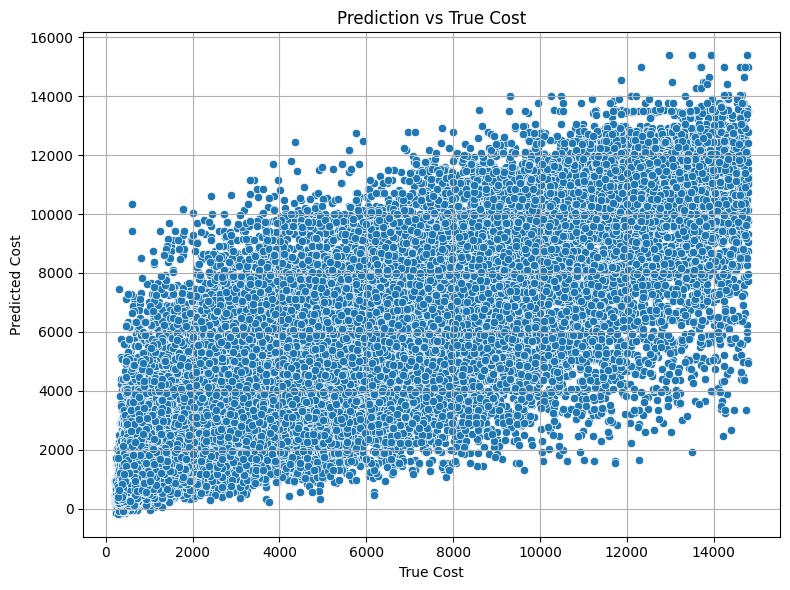

Correlation between True Cost and Predicted Cost: 0.87


In [36]:
# Correlation between true cost and predicted cost, quite high allready, 0.88. Most of deviations are for high costs. Original scale

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, best_preds)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")

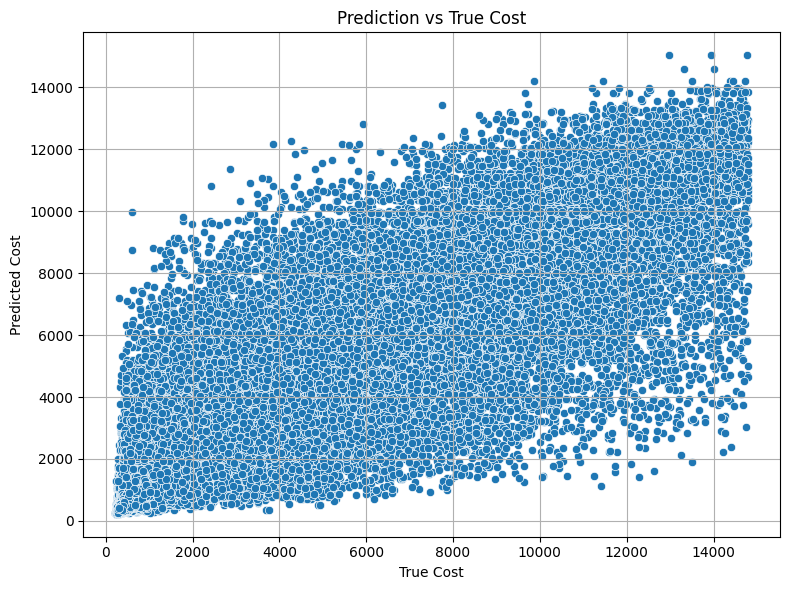

Correlation between True Cost and Predicted Cost: 0.87


In [37]:
# Correlation between true cost and predicted cost, quite high allready, 0.88. Most of deviations are for high costs. Sqrt scale

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds_original_scale)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, best_preds)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor
)
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
# Uncomment if you want to use LightGBM
import lightgbm as lgb

# Load your data
df = pd.read_excel("./combined_randomconfig100,100,2.xlsx")

# -------- FEATURE ENGINEERING -------- #
# Make a copy so we don't overwrite the original
df_fe = df.copy()

# Sum of base stock levels (proxy for inventory volume)
df_fe["total_stock"] = df_fe[[f"C{i}" for i in range(1, 15)]].sum(axis=1)

# Average base stock level
df_fe["avg_stock"] = df_fe["total_stock"] / 14

# Min and max stock level
df_fe["min_stock"] = df_fe[[f"C{i}" for i in range(1, 15)]].min(axis=1)
df_fe["max_stock"] = df_fe[[f"C{i}" for i in range(1, 15)]].max(axis=1)

# Range between max and min
df_fe["stock_range"] = df_fe["max_stock"] - df_fe["min_stock"]

# Standard deviation of stock levels
df_fe["stock_std"] = df_fe[[f"C{i}" for i in range(1, 15)]].std(axis=1)

# Optional: interaction between demand pattern and total stock
df_fe["demand_x_total"] = df_fe["demand_pattern"] * df_fe["total_stock"]

# Now use this version for training
X = df_fe.drop(columns=["policy_id", "cost"], errors="ignore")

y = df_fe["cost"]


X = df.drop(columns=["cost", "policy_id"], errors="ignore")
y = df["cost"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for models that need it
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "MLP": MLPRegressor(random_state=42, max_iter=500)
}

# Train and evaluate
results = {}

for name, model in models.items():
    if name in ["SVR", "MLP"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    results[name] = {"MAE": mae, "MSE": mse}
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}")


Ridge - MAE: 4174.36, MSE: 181348767.42


KeyboardInterrupt: 

Ridge - CV MAE: 22.81, CV MSE: 745.42
Random Forest - CV MAE: 23.51, CV MSE: 902.89
Gradient Boosting - CV MAE: 22.02, CV MSE: 789.01
XGBoost - CV MAE: 21.43, CV MSE: 746.22
SVR - CV MAE: 20.80, CV MSE: 648.27
MLP - CV MAE: 20.76, CV MSE: 656.95


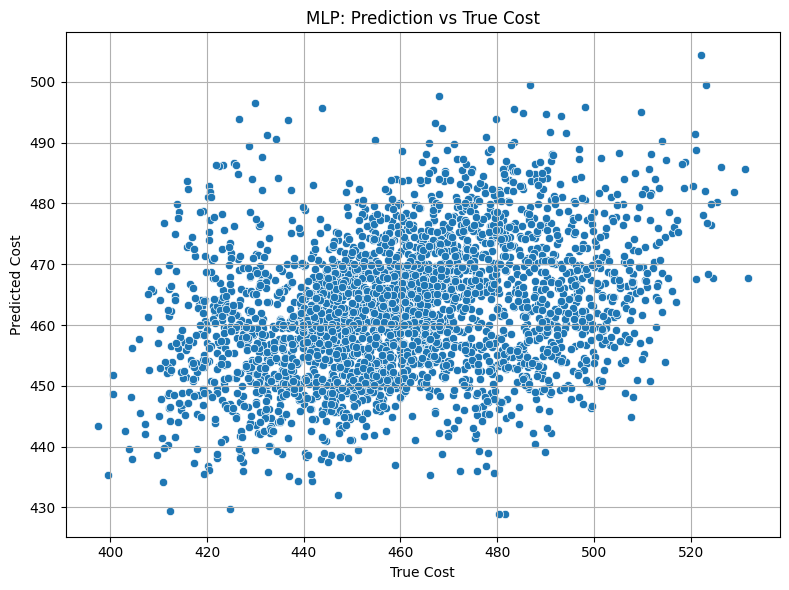

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data/generated_data.csv")

# Drop duplicates and constant columns
df = df.drop_duplicates()
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=constant_cols, inplace=True)

# Define features and target
X = df.drop(columns=["cost"])
y = df["cost"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split for plotting diagnostics
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models with regularization
models = {
    "Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, reg_alpha=1, reg_lambda=1, random_state=42),
    "SVR": SVR(C=1.0, epsilon=0.2),
    "MLP": MLPRegressor(hidden_layer_sizes=(100, 50), alpha=0.001, max_iter=500, random_state=42)
}

# Evaluate with cross-validation and store predictions for the best model
results = {}
best_model_name = None
lowest_mae = float('inf')
best_preds = None

for name, model in models.items():
    mae_scores = cross_val_score(model, X_scaled, y, cv=5, scoring=make_scorer(mean_absolute_error))
    mse_scores = cross_val_score(model, X_scaled, y, cv=5, scoring=make_scorer(mean_squared_error))
    avg_mae = mae_scores.mean()
    avg_mse = mse_scores.mean()
    results[name] = {"MAE": avg_mae, "MSE": avg_mse}
    if avg_mae < lowest_mae:
        best_model_name = name
        best_model = model
        best_model.fit(X_train, y_train)
        best_preds = best_model.predict(X_test)
    print(f"{name} - CV MAE: {avg_mae:.2f}, CV MSE: {avg_mse:.2f}")

# Diagnostic plot for the best model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"{best_model_name}: Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()


# Models

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    ExtraTreesRegressor
)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import time

# --- 1. Load your dataset ---
df = pd.read_excel("./combined_randomconfig100,100,2.xlsx") 
# --- 2. Feature setup ---
component_cols = sorted([col for col in df.columns if col.startswith("C")])
features = component_cols + ["demand_pattern"]

# Drop constant columns
nunique = df[features].nunique()
constant_cols = nunique[nunique == 1].index.tolist()
features = [col for col in features if col not in constant_cols]

# --- 3. Prepare data ---
X = df[features]
y = df["cost"]

# --- 4. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #default 75 - 25 train-test 

# --- 5. Define models ---
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
    # "SVR": SVR(),
    # "MLP": MLPRegressor(random_state=42, max_iter=500)
}

# --- 6. Cross-validation setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    print(f"⏳ Starting {name}...")
    start_time = time.time()

    mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    duration = time.time() - start_time
    print(f"✅ Finished {name} in {duration:.2f} seconds")

    results.append((name, mae_scores.mean(), mse_scores.mean(), duration))

# --- 7. Show CV results ---
results_df = pd.DataFrame(results, columns=["Model", "CV MAE", "CV MSE", "Time (s)"]).sort_values("CV MAE")
print("\n📊 Model Performance:")
print(results_df)


⏳ Starting Ridge...
✅ Finished Ridge in 0.48 seconds
⏳ Starting Random Forest...
✅ Finished Random Forest in 1329.09 seconds
⏳ Starting Gradient Boosting...
✅ Finished Gradient Boosting in 360.22 seconds
⏳ Starting HistGradientBoosting...
✅ Finished HistGradientBoosting in 22.63 seconds
⏳ Starting Extra Trees...
✅ Finished Extra Trees in 539.43 seconds
⏳ Starting XGBoost...
✅ Finished XGBoost in 5.49 seconds

📊 Model Performance:
                  Model       CV MAE        CV MSE     Time (s)
4           Extra Trees  1180.115232  7.719971e+07   539.432247
1         Random Forest  1318.739066  8.881809e+07  1329.093117
5               XGBoost  1608.275631  7.836944e+07     5.486242
3  HistGradientBoosting  1831.873016  9.731729e+07    22.634484
2     Gradient Boosting  2286.973820  1.247966e+08   360.222375
0                 Ridge  3874.877185  2.492206e+08     0.475557


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from scipy.stats import randint

# Prepare the data
df_cleaned = df_no_outliers.dropna(subset=['cost']).copy()
df_encoded = pd.get_dummies(df_cleaned, columns=['policy_id'], prefix='policy', dtype=int)

X = df_encoded.drop(columns=["cost"])
y = df_encoded["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize the Extra Trees model
et_model = ExtraTreesRegressor(random_state=42, n_jobs=-1)

# Optional hyperparameter tuning
param_dist_et = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

random_search_et = RandomizedSearchCV(
    estimator=et_model,
    param_distributions=param_dist_et,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Fit
random_search_et.fit(X_train, y_train)

# Evaluate
best_et_model = random_search_et.best_estimator_
et_preds = best_et_model.predict(X_test)

et_mae = mean_absolute_error(y_test, et_preds)
et_mse = mean_squared_error(y_test, et_preds)
et_rmse = np.sqrt(et_mse)

print("\nExtra Trees Best Parameters:", random_search_et.best_params_)
print("Extra Trees Test MAE:", et_mae)
print("Extra Trees Test MSE:", et_mse)
print("Extra Trees Test RMSE:", et_rmse)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time= 4.4min
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time= 4.4min
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time= 4.4min
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time= 4.2min
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time= 4.3min
[CV] END max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=187; total time= 5.0min
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=370; total time= 9.7min
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=370; total time= 9.8min
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=370; total time= 9.8min
[CV] END max_depth=11, min_sa

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import randint
import numpy as np

# Use smaller search space and fewer iterations
param_dist_fast = {
    'n_estimators': randint(50, 150),           # fewer trees → faster
    'max_depth': randint(5, 15),                # shallower trees
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 4)
}

# Setup model
et_model_fast = ExtraTreesRegressor(random_state=42, n_jobs=-1)

# Setup RandomizedSearch
random_search_fast = RandomizedSearchCV(
    estimator=et_model_fast,
    param_distributions=param_dist_fast,
    n_iter=10,                        # 10 configs × 5 folds = 50 fits
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit it
random_search_fast.fit(X_train, y_train)

# Evaluate
best_et_model = random_search_fast.best_estimator_
et_preds = best_et_model.predict(X_test)

et_mae = mean_absolute_error(y_test, et_preds)
et_mse = mean_squared_error(y_test, et_preds)
et_rmse = np.sqrt(et_mse)

print("\n🚀 Extra Trees Fast Results:")
print("Best Params:", random_search_fast.best_params_)
print("MAE:", et_mae)
print("MSE:", et_mse)
print("RMSE:", et_rmse)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=132; total time= 3.6min
[CV] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=132; total time= 3.6min
[CV] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=132; total time= 3.6min
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=121; total time= 4.1min
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=121; total time= 4.1min
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=121; total time= 4.1min
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=121; total time= 4.1min
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=121; total time= 4.1min
[CV] END max_depth=9, min_samples_leaf=3, min_samples_split=3, n_estimators=102; total time= 2.5min
[CV] END max_depth=9, min_samples_

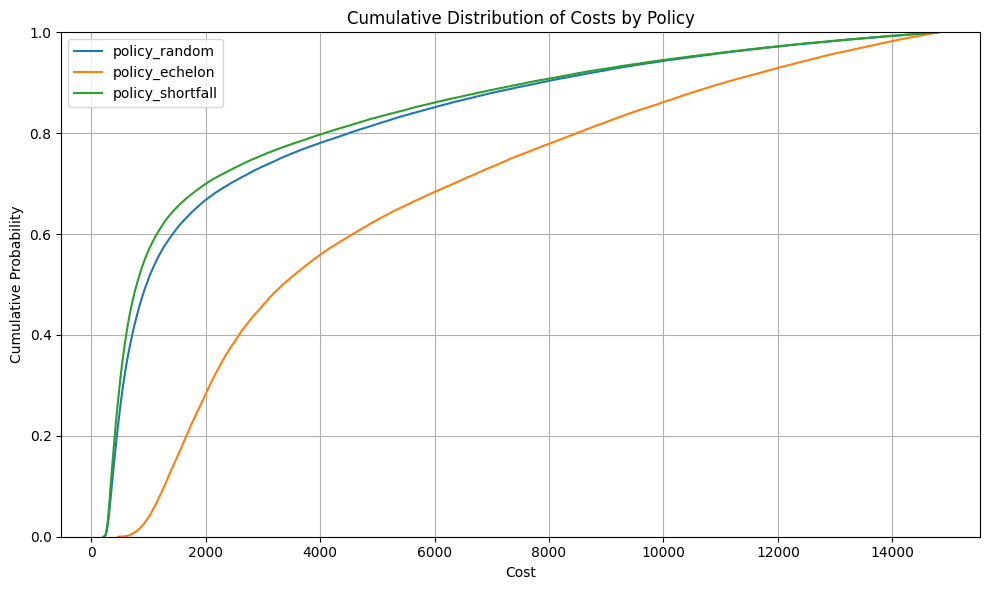

In [47]:
# how likely each policy is to result in a low cost
plt.figure(figsize=(10, 6))
for policy in df_no_outliers["policy_id"].unique():
    subset = df_no_outliers[df_no_outliers["policy_id"] == policy]
    sns.ecdfplot(subset["cost"], label=policy)

plt.title("Cumulative Distribution of Costs by Policy")
plt.xlabel("Cost")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

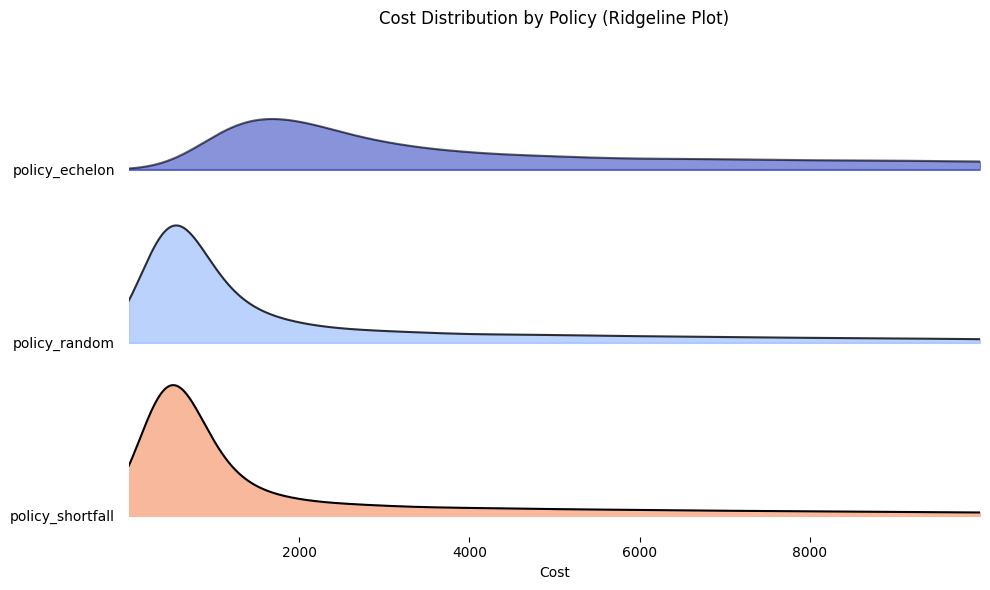

In [52]:
import joypy
from matplotlib import cm

plt.figure(figsize=(10, 6))
joypy.joyplot(
    df_no_outliers, 
    by="policy_id", 
    column="cost", 
    figsize=(10, 6), 
    colormap=cm.coolwarm,
    fade=True,
    kind="kde",
    x_range=[0, 10000],  # optional: zoom in
    bins=100
)
plt.title("Cost Distribution by Policy (Ridgeline Plot)")
plt.xlabel("Cost")
plt.tight_layout()
plt.show()

